In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files

In [3]:
!cp /content/drive/MyDrive/thesis.py /content

In [4]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CAD_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222650, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  1.29842  1.29845  1.29842  1.29849
2020-01-01 17:05:00  1.29846  1.29857  1.29777  1.29858
2020-01-01 17:10:00  1.29857  1.29803  1.29802  1.29863
2020-01-01 17:15:00  1.29845  1.29800  1.29799  1.29845
2020-01-01 17:20:00  1.29799  1.29816  1.29798  1.29817

In [7]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


(222649, 12)


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.29842  1.29845  1.29842  1.29849         1.29857    17   
2020-01-01 17:05:00  1.29846  1.29857  1.29777  1.29858         1.29803    17   
2020-01-01 17:10:00  1.29857  1.29803  1.29802  1.29863         1.29800    17   
2020-01-01 17:15:00  1.29845  1.29800  1.29799  1.29845         1.29816    17   
2020-01-01 17:20:00  1.29799  1.29816  1.29798  1.29817         1.29816    17   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1  -0.00003   1.298455  0.00007    1.298445  
2020-01-01 17:05:00    2     1  -0.00011   1.298175  0.00081    1.298345  
2020-01-01 17:10:00    2     1   0.00054   1.298325  0.00061    1.298312  
2020-01-01 17:15:00    2     1   0.00045   1.298220  0.00046    1.298223  
2020-01-01 17:20:00    2     1  -0.00017   1.298075  0.00019    1.298075

In [8]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.29842  1.29845  1.29842  1.29849         1.29857    17   
2020-01-01 17:05:00  1.29846  1.29857  1.29777  1.29858         1.29803    17   
2020-01-01 17:10:00  1.29857  1.29803  1.29802  1.29863         1.29800    17   
2020-01-01 17:15:00  1.29845  1.29800  1.29799  1.29845         1.29816    17   
2020-01-01 17:20:00  1.29799  1.29816  1.29798  1.29817         1.29816    17   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1  -0.00003   1.298455  0.00007    1.298445   
2020-01-01 17:05:00    2     1  -0.00011   1.298175  0.00081    1.298345   
2020-01-01 17:10:00    2     1   0.00054   1.298325  0.00061    1.298312   
2020-01-01 17:15:00    2     1   0.00045   1.298220  0.00046    1.298223   
2020-01-01 17:20:00    2     1  -0.00017   1.298075  0.00019    1.298075   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.512661  
2020-01-01 17:05:00 -25.512392  
2020-01-01 17:10:00 -25.512392  
2020-01-01 17:15:00 -25.512474  
2020-01-01 17:20:00 -25.512392

In [9]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.29842  1.29842  1.29849         1.29857    17    2   
2020-01-01 17:05:00  1.29846  1.29777  1.29858         1.29803    17    2   
2020-01-01 17:10:00  1.29857  1.29802  1.29863         1.29800    17    2   
2020-01-01 17:15:00  1.29845  1.29799  1.29845         1.29816    17    2   
2020-01-01 17:20:00  1.29799  1.29798  1.29817         1.29816    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00003   1.298455  0.00007    1.298445 -25.512661  
2020-01-01 17:05:00     1  -0.00011   1.298175  0.00081    1.298345 -25.512392  
2020-01-01 17:10:00     1   0.00054   1.298325  0.00061    1.298312 -25.512392  
2020-01-01 17:15:00     1   0.00045   1.298220  0.00046

In [10]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_60_40(X,y)

133589
133589
44529
44529
44531
44531


In [11]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(133589, 12)

In [12]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [13]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [14]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(133564, 24, 12)
(44504, 24, 12)
(44506, 24, 12)


In [15]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(133564, 1)
(44504, 1)
(44506, 1)


array([[0.3637457 ],
       [0.36404705],
       [0.36449957],
       ...,
       [0.14668894],
       [0.14510679],
       [0.14601088]], dtype=float32)

In [16]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.3637457 , 0.36404705, 0.36449957, ..., 0.14668894, 0.14510679,
       0.14601088], dtype=float32)

**GRU_BiLSTM_MODEL**

In [17]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [18]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/347 [==============================] - ETA: 0s - loss: 292.0317 - mae: 2.3010 - mse: 292.0317 - root_mean_squared_error: 17.0889 - mape: 2063.8572
Epoch 1: val_mse improved from inf to 0.18078, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 50s 110ms/step - loss: 292.0317 - mae: 2.3010 - mse: 292.0317 - root_mean_squared_error: 17.0889 - mape: 2063.8572 - val_loss: 0.1808 - val_mae: 0.3785 - val_mse: 0.1808 - val_root_mean_squared_error: 0.4252 - val_mape: 2441.8003
Epoch 2/60
347/347 [==============================] - ETA: 0s - loss: 0.0967 - mae: 0.2456 - mse: 0.0967 - root_mean_squared_error: 0.3109 - mape: 1742.1367
Epoch 2: val_mse improved from 0.18078 to 0.10942, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0967 - mae: 0.2456 - mse: 0.0967 - root_mean_squared_error: 0.3109 - mape: 1742.1367 - val_loss: 0.1094 - val_mae: 0.2843 - val_mse: 0.1094 - val_root_mean_squared_error: 0.3308 - val_mape: 4981.3418
Epoch 3/60
347/347 [==============================] - ETA: 0s - loss: 0.0517 - mae: 0.1788 - mse: 0.0517 - root_mean_squared_error: 0.2274 - mape: 2163.1870
Epoch 3: val_mse improved from 0.10942 to 0.05449, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0517 - mae: 0.1788 - mse: 0.0517 - root_mean_squared_error: 0.2274 - mape: 2163.1870 - val_loss: 0.0545 - val_mae: 0.1964 - val_mse: 0.0545 - val_root_mean_squared_error: 0.2334 - val_mape: 8106.2666
Epoch 4/60
347/347 [==============================] - ETA: 0s - loss: 0.0400 - mae: 0.1639 - mse: 0.0400 - root_mean_squared_error: 0.1999 - mape: 2808.1150
Epoch 4: val_mse improved from 0.05449 to 0.04377, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 38s 109ms/step - loss: 0.0400 - mae: 0.1639 - mse: 0.0400 - root_mean_squared_error: 0.1999 - mape: 2808.1150 - val_loss: 0.0438 - val_mae: 0.1751 - val_mse: 0.0438 - val_root_mean_squared_error: 0.2092 - val_mape: 8779.4209
Epoch 5/60
347/347 [==============================] - ETA: 0s - loss: 0.0366 - mae: 0.1571 - mse: 0.0366 - root_mean_squared_error: 0.1914 - mape: 2566.2493
Epoch 5: val_mse improved from 0.04377 to 0.03926, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0366 - mae: 0.1571 - mse: 0.0366 - root_mean_squared_error: 0.1914 - mape: 2566.2493 - val_loss: 0.0393 - val_mae: 0.1650 - val_mse: 0.0393 - val_root_mean_squared_error: 0.1981 - val_mape: 8897.8057
Epoch 6/60
347/347 [==============================] - ETA: 0s - loss: 0.0336 - mae: 0.1504 - mse: 0.0336 - root_mean_squared_error: 0.1833 - mape: 2414.8962
Epoch 6: val_mse improved from 0.03926 to 0.03477, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0336 - mae: 0.1504 - mse: 0.0336 - root_mean_squared_error: 0.1833 - mape: 2414.8962 - val_loss: 0.0348 - val_mae: 0.1547 - val_mse: 0.0348 - val_root_mean_squared_error: 0.1865 - val_mape: 8709.3760
Epoch 7/60
347/347 [==============================] - ETA: 0s - loss: 0.0284 - mae: 0.1381 - mse: 0.0284 - root_mean_squared_error: 0.1685 - mape: 2404.3015
Epoch 7: val_mse improved from 0.03477 to 0.02301, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0284 - mae: 0.1381 - mse: 0.0284 - root_mean_squared_error: 0.1685 - mape: 2404.3015 - val_loss: 0.0230 - val_mae: 0.1233 - val_mse: 0.0230 - val_root_mean_squared_error: 0.1517 - val_mape: 7965.8926
Epoch 8/60
347/347 [==============================] - ETA: 0s - loss: 0.0171 - mae: 0.1054 - mse: 0.0171 - root_mean_squared_error: 0.1306 - mape: 2064.6436
Epoch 8: val_mse improved from 0.02301 to 0.01031, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0171 - mae: 0.1054 - mse: 0.0171 - root_mean_squared_error: 0.1306 - mape: 2064.6436 - val_loss: 0.0103 - val_mae: 0.0763 - val_mse: 0.0103 - val_root_mean_squared_error: 0.1015 - val_mape: 6242.0825
Epoch 9/60
346/347 [============================>.] - ETA: 0s - loss: 0.0093 - mae: 0.0756 - mse: 0.0093 - root_mean_squared_error: 0.0965 - mape: 1954.3014
Epoch 9: val_mse improved from 0.01031 to 0.00589, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 38s 109ms/step - loss: 0.0093 - mae: 0.0756 - mse: 0.0093 - root_mean_squared_error: 0.0965 - mape: 1949.2872 - val_loss: 0.0059 - val_mae: 0.0561 - val_mse: 0.0059 - val_root_mean_squared_error: 0.0767 - val_mape: 5444.9917
Epoch 10/60
347/347 [==============================] - ETA: 0s - loss: 0.0062 - mae: 0.0600 - mse: 0.0062 - root_mean_squared_error: 0.0789 - mape: 1507.1155
Epoch 10: val_mse improved from 0.00589 to 0.00402, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0062 - mae: 0.0600 - mse: 0.0062 - root_mean_squared_error: 0.0789 - mape: 1507.1155 - val_loss: 0.0040 - val_mae: 0.0460 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0634 - val_mape: 4959.9136
Epoch 11/60
347/347 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0498 - mse: 0.0045 - root_mean_squared_error: 0.0673 - mape: 1437.0543
Epoch 11: val_mse improved from 0.00402 to 0.00309, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0045 - mae: 0.0498 - mse: 0.0045 - root_mean_squared_error: 0.0673 - mape: 1437.0543 - val_loss: 0.0031 - val_mae: 0.0407 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0556 - val_mape: 4540.3706
Epoch 12/60
347/347 [==============================] - ETA: 0s - loss: 0.0037 - mae: 0.0443 - mse: 0.0037 - root_mean_squared_error: 0.0605 - mape: 1501.3621
Epoch 12: val_mse improved from 0.00309 to 0.00298, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0037 - mae: 0.0443 - mse: 0.0037 - root_mean_squared_error: 0.0605 - mape: 1501.3621 - val_loss: 0.0030 - val_mae: 0.0422 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0546 - val_mape: 4220.1709
Epoch 13/60
347/347 [==============================] - ETA: 0s - loss: 0.0032 - mae: 0.0414 - mse: 0.0032 - root_mean_squared_error: 0.0564 - mape: 1259.5598
Epoch 13: val_mse improved from 0.00298 to 0.00286, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0032 - mae: 0.0414 - mse: 0.0032 - root_mean_squared_error: 0.0564 - mape: 1259.5598 - val_loss: 0.0029 - val_mae: 0.0397 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0535 - val_mape: 3948.2700
Epoch 14/60
347/347 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0396 - mse: 0.0029 - root_mean_squared_error: 0.0536 - mape: 1158.2913
Epoch 14: val_mse did not improve from 0.00286
347/347 [==============================] - 12s 33ms/step - loss: 0.0029 - mae: 0.0396 - mse: 0.0029 - root_mean_squared_error: 0.0536 - mape: 1158.2913 - val_loss: 0.0029 - val_mae: 0.0435 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0542 - val_mape: 3794.2615
Epoch 15/60
347/347 [==============================] - ETA: 0s - loss: 0.0026 - mae: 0.0379 - mse: 0.0026 - root_mean_squared_error: 0.0509 - mape: 1131.4082
Epoch 15: val_mse improved from 0.00286 to 0.00268, saving model to /content/drive/MyDrive/modelweight

347/347 [==============================] - 37s 106ms/step - loss: 0.0026 - mae: 0.0379 - mse: 0.0026 - root_mean_squared_error: 0.0509 - mape: 1131.4082 - val_loss: 0.0027 - val_mae: 0.0413 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0517 - val_mape: 3570.0281
Epoch 16/60
347/347 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0355 - mse: 0.0023 - root_mean_squared_error: 0.0477 - mape: 940.4305
Epoch 16: val_mse improved from 0.00268 to 0.00247, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0023 - mae: 0.0355 - mse: 0.0023 - root_mean_squared_error: 0.0477 - mape: 940.4305 - val_loss: 0.0025 - val_mae: 0.0420 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0497 - val_mape: 3336.8899
Epoch 17/60
347/347 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0330 - mse: 0.0020 - root_mean_squared_error: 0.0444 - mape: 829.9924
Epoch 17: val_mse improved from 0.00247 to 0.00231, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0020 - mae: 0.0330 - mse: 0.0020 - root_mean_squared_error: 0.0444 - mape: 829.9924 - val_loss: 0.0023 - val_mae: 0.0332 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0481 - val_mape: 3101.1746
Epoch 18/60
347/347 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0310 - mse: 0.0017 - root_mean_squared_error: 0.0414 - mape: 841.7476
Epoch 18: val_mse improved from 0.00231 to 0.00192, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0017 - mae: 0.0310 - mse: 0.0017 - root_mean_squared_error: 0.0414 - mape: 841.7476 - val_loss: 0.0019 - val_mae: 0.0308 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0438 - val_mape: 2911.7622
Epoch 19/60
347/347 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0286 - mse: 0.0015 - root_mean_squared_error: 0.0382 - mape: 855.5620
Epoch 19: val_mse did not improve from 0.00192
347/347 [==============================] - 12s 33ms/step - loss: 0.0015 - mae: 0.0286 - mse: 0.0015 - root_mean_squared_error: 0.0382 - mape: 855.5620 - val_loss: 0.0021 - val_mae: 0.0314 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0454 - val_mape: 2734.1106
Epoch 20/60
347/347 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0281 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 870.0638
Epoch 20: val_mse improved from 0.00192 to 0.00176, saving model to /content/drive/MyDrive/modelweights/CA

347/347 [==============================] - 37s 108ms/step - loss: 0.0014 - mae: 0.0281 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 870.0638 - val_loss: 0.0018 - val_mae: 0.0284 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0419 - val_mape: 2486.3621
Epoch 21/60
347/347 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0266 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 694.6296
Epoch 21: val_mse did not improve from 0.00176
347/347 [==============================] - 12s 34ms/step - loss: 0.0012 - mae: 0.0266 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 694.6296 - val_loss: 0.0022 - val_mae: 0.0327 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0466 - val_mape: 2334.1497
Epoch 22/60
347/347 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0255 - mse: 0.0011 - root_mean_squared_error: 0.0335 - mape: 690.6868
Epoch 22: val_mse did not improve from 0.00176
347/347 [==============================] - 12s 34ms/step - 

347/347 [==============================] - 37s 106ms/step - loss: 9.4372e-04 - mae: 0.0235 - mse: 9.4372e-04 - root_mean_squared_error: 0.0307 - mape: 600.3318 - val_loss: 0.0017 - val_mae: 0.0278 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0411 - val_mape: 2027.8384
Epoch 25/60
347/347 [==============================] - ETA: 0s - loss: 8.3451e-04 - mae: 0.0222 - mse: 8.3451e-04 - root_mean_squared_error: 0.0289 - mape: 565.8246
Epoch 25: val_mse improved from 0.00169 to 0.00118, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 8.3451e-04 - mae: 0.0222 - mse: 8.3451e-04 - root_mean_squared_error: 0.0289 - mape: 565.8246 - val_loss: 0.0012 - val_mae: 0.0243 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 1958.4340
Epoch 26/60
346/347 [============================>.] - ETA: 0s - loss: 8.1355e-04 - mae: 0.0221 - mse: 8.1355e-04 - root_mean_squared_error: 0.0285 - mape: 559.3684
Epoch 26: val_mse did not improve from 0.00118
347/347 [==============================] - 12s 34ms/step - loss: 8.1444e-04 - mae: 0.0221 - mse: 8.1444e-04 - root_mean_squared_error: 0.0285 - mape: 557.9293 - val_loss: 0.0030 - val_mae: 0.0420 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0551 - val_mape: 1840.4674
Epoch 27/60
347/347 [==============================] - ETA: 0s - loss: 7.2632e-04 - mae: 0.0207 - mse: 7.2632e-04 - root_mean_squared_error: 0.0270 - mape: 581.9793
Epoch 27: val_mse did not improve from 0.00118
347/347 [==================

347/347 [==============================] - 37s 106ms/step - loss: 6.4911e-04 - mae: 0.0198 - mse: 6.4911e-04 - root_mean_squared_error: 0.0255 - mape: 515.5132 - val_loss: 8.4238e-04 - val_mae: 0.0202 - val_mse: 8.4238e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 1685.6588
Epoch 29/60
347/347 [==============================] - ETA: 0s - loss: 5.8750e-04 - mae: 0.0189 - mse: 5.8750e-04 - root_mean_squared_error: 0.0242 - mape: 483.7069
Epoch 29: val_mse did not improve from 0.00084
347/347 [==============================] - 12s 35ms/step - loss: 5.8750e-04 - mae: 0.0189 - mse: 5.8750e-04 - root_mean_squared_error: 0.0242 - mape: 483.7069 - val_loss: 0.0014 - val_mae: 0.0270 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0376 - val_mape: 1584.2258
Epoch 30/60
347/347 [==============================] - ETA: 0s - loss: 5.4788e-04 - mae: 0.0183 - mse: 5.4788e-04 - root_mean_squared_error: 0.0234 - mape: 539.8665
Epoch 30: val_mse improved from 0.00084 to 0.00070, saving model t

347/347 [==============================] - 36s 105ms/step - loss: 5.4788e-04 - mae: 0.0183 - mse: 5.4788e-04 - root_mean_squared_error: 0.0234 - mape: 539.8665 - val_loss: 7.0142e-04 - val_mae: 0.0187 - val_mse: 7.0142e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 1524.6226
Epoch 31/60
347/347 [==============================] - ETA: 0s - loss: 4.5654e-04 - mae: 0.0166 - mse: 4.5654e-04 - root_mean_squared_error: 0.0214 - mape: 442.3736
Epoch 31: val_mse did not improve from 0.00070
347/347 [==============================] - 12s 34ms/step - loss: 4.5654e-04 - mae: 0.0166 - mse: 4.5654e-04 - root_mean_squared_error: 0.0214 - mape: 442.3736 - val_loss: 0.0018 - val_mae: 0.0338 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0426 - val_mape: 1383.8020
Epoch 32/60
347/347 [==============================] - ETA: 0s - loss: 4.2571e-04 - mae: 0.0160 - mse: 4.2571e-04 - root_mean_squared_error: 0.0206 - mape: 399.7714
Epoch 32: val_mse did not improve from 0.00070
347/347 [==========

347/347 [==============================] - 37s 107ms/step - loss: 3.1971e-04 - mae: 0.0139 - mse: 3.1971e-04 - root_mean_squared_error: 0.0179 - mape: 370.9910 - val_loss: 5.8915e-04 - val_mae: 0.0177 - val_mse: 5.8915e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 1248.1382
Epoch 35/60
347/347 [==============================] - ETA: 0s - loss: 3.2291e-04 - mae: 0.0140 - mse: 3.2291e-04 - root_mean_squared_error: 0.0180 - mape: 348.5580
Epoch 35: val_mse improved from 0.00059 to 0.00048, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 3.2291e-04 - mae: 0.0140 - mse: 3.2291e-04 - root_mean_squared_error: 0.0180 - mape: 348.5580 - val_loss: 4.7532e-04 - val_mae: 0.0159 - val_mse: 4.7532e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 1152.6954
Epoch 36/60
347/347 [==============================] - ETA: 0s - loss: 2.4262e-04 - mae: 0.0121 - mse: 2.4262e-04 - root_mean_squared_error: 0.0156 - mape: 360.4812
Epoch 36: val_mse improved from 0.00048 to 0.00045, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 38s 110ms/step - loss: 2.4262e-04 - mae: 0.0121 - mse: 2.4262e-04 - root_mean_squared_error: 0.0156 - mape: 360.4812 - val_loss: 4.4692e-04 - val_mae: 0.0154 - val_mse: 4.4692e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 1099.1747
Epoch 37/60
347/347 [==============================] - ETA: 0s - loss: 2.2257e-04 - mae: 0.0116 - mse: 2.2257e-04 - root_mean_squared_error: 0.0149 - mape: 328.8584
Epoch 37: val_mse did not improve from 0.00045
347/347 [==============================] - 13s 37ms/step - loss: 2.2257e-04 - mae: 0.0116 - mse: 2.2257e-04 - root_mean_squared_error: 0.0149 - mape: 328.8584 - val_loss: 5.5239e-04 - val_mae: 0.0179 - val_mse: 5.5239e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 1097.0752
Epoch 38/60
347/347 [==============================] - ETA: 0s - loss: 2.0902e-04 - mae: 0.0113 - mse: 2.0902e-04 - root_mean_squared_error: 0.0145 - mape: 300.2943
Epoch 38: val_mse did not improve from 0.00045
347/347 [==

347/347 [==============================] - 37s 106ms/step - loss: 1.7846e-04 - mae: 0.0104 - mse: 1.7846e-04 - root_mean_squared_error: 0.0134 - mape: 346.7572 - val_loss: 4.2756e-04 - val_mae: 0.0154 - val_mse: 4.2756e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 984.8568
Epoch 41/60
347/347 [==============================] - ETA: 0s - loss: 1.5783e-04 - mae: 0.0098 - mse: 1.5783e-04 - root_mean_squared_error: 0.0126 - mape: 272.7781
Epoch 41: val_mse improved from 0.00043 to 0.00036, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 1.5783e-04 - mae: 0.0098 - mse: 1.5783e-04 - root_mean_squared_error: 0.0126 - mape: 272.7781 - val_loss: 3.5786e-04 - val_mae: 0.0140 - val_mse: 3.5786e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 899.8804
Epoch 42/60
347/347 [==============================] - ETA: 0s - loss: 1.5160e-04 - mae: 0.0096 - mse: 1.5160e-04 - root_mean_squared_error: 0.0123 - mape: 292.9324
Epoch 42: val_mse did not improve from 0.00036
347/347 [==============================] - 12s 35ms/step - loss: 1.5160e-04 - mae: 0.0096 - mse: 1.5160e-04 - root_mean_squared_error: 0.0123 - mape: 292.9324 - val_loss: 4.9677e-04 - val_mae: 0.0166 - val_mse: 4.9677e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 953.6518
Epoch 43/60
347/347 [==============================] - ETA: 0s - loss: 1.5098e-04 - mae: 0.0095 - mse: 1.5098e-04 - root_mean_squared_error: 0.0123 - mape: 267.2542
Epoch 43: val_mse improved from 0.00036 to 0.00032, saving m

347/347 [==============================] - 37s 106ms/step - loss: 1.5098e-04 - mae: 0.0095 - mse: 1.5098e-04 - root_mean_squared_error: 0.0123 - mape: 267.2542 - val_loss: 3.2142e-04 - val_mae: 0.0133 - val_mse: 3.2142e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 855.4313
Epoch 44/60
347/347 [==============================] - ETA: 0s - loss: 1.4567e-04 - mae: 0.0093 - mse: 1.4567e-04 - root_mean_squared_error: 0.0121 - mape: 258.8434
Epoch 44: val_mse did not improve from 0.00032
347/347 [==============================] - 12s 34ms/step - loss: 1.4567e-04 - mae: 0.0093 - mse: 1.4567e-04 - root_mean_squared_error: 0.0121 - mape: 258.8434 - val_loss: 4.3340e-04 - val_mae: 0.0154 - val_mse: 4.3340e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 835.8180
Epoch 45/60
347/347 [==============================] - ETA: 0s - loss: 1.2349e-04 - mae: 0.0086 - mse: 1.2349e-04 - root_mean_squared_error: 0.0111 - mape: 252.0198
Epoch 45: val_mse improved from 0.00032 to 0.00032, saving m

347/347 [==============================] - 37s 107ms/step - loss: 1.2349e-04 - mae: 0.0086 - mse: 1.2349e-04 - root_mean_squared_error: 0.0111 - mape: 252.0198 - val_loss: 3.1567e-04 - val_mae: 0.0134 - val_mse: 3.1567e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 1400.0044
Epoch 46/60
347/347 [==============================] - ETA: 0s - loss: 1.2451e-04 - mae: 0.0087 - mse: 1.2451e-04 - root_mean_squared_error: 0.0112 - mape: 249.1643
Epoch 46: val_mse did not improve from 0.00032
347/347 [==============================] - 12s 34ms/step - loss: 1.2451e-04 - mae: 0.0087 - mse: 1.2451e-04 - root_mean_squared_error: 0.0112 - mape: 249.1643 - val_loss: 3.8178e-04 - val_mae: 0.0143 - val_mse: 3.8178e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 792.2405
Epoch 47/60
347/347 [==============================] - ETA: 0s - loss: 1.1338e-04 - mae: 0.0082 - mse: 1.1338e-04 - root_mean_squared_error: 0.0106 - mape: 244.0331
Epoch 47: val_mse did not improve from 0.00032
347/347 [===

347/347 [==============================] - 37s 106ms/step - loss: 1.0138e-04 - mae: 0.0079 - mse: 1.0138e-04 - root_mean_squared_error: 0.0101 - mape: 233.6335 - val_loss: 2.7700e-04 - val_mae: 0.0123 - val_mse: 2.7700e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 909.9777
Epoch 49/60
347/347 [==============================] - ETA: 0s - loss: 1.0449e-04 - mae: 0.0079 - mse: 1.0449e-04 - root_mean_squared_error: 0.0102 - mape: 215.6134
Epoch 49: val_mse improved from 0.00028 to 0.00024, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 1.0449e-04 - mae: 0.0079 - mse: 1.0449e-04 - root_mean_squared_error: 0.0102 - mape: 215.6134 - val_loss: 2.4313e-04 - val_mae: 0.0118 - val_mse: 2.4313e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 1453.7095
Epoch 50/60
347/347 [==============================] - ETA: 0s - loss: 1.0934e-04 - mae: 0.0078 - mse: 1.0934e-04 - root_mean_squared_error: 0.0105 - mape: 225.6752
Epoch 50: val_mse did not improve from 0.00024
347/347 [==============================] - 12s 35ms/step - loss: 1.0934e-04 - mae: 0.0078 - mse: 1.0934e-04 - root_mean_squared_error: 0.0105 - mape: 225.6752 - val_loss: 3.3960e-04 - val_mae: 0.0135 - val_mse: 3.3960e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 834.1656
Epoch 51/60
347/347 [==============================] - ETA: 0s - loss: 9.2563e-05 - mae: 0.0075 - mse: 9.2563e-05 - root_mean_squared_error: 0.0096 - mape: 207.4565
Epoch 51: val_mse did not improve from 0.00024
347/347 [===

347/347 [==============================] - 38s 110ms/step - loss: 8.7283e-05 - mae: 0.0072 - mse: 8.7283e-05 - root_mean_squared_error: 0.0093 - mape: 217.8112 - val_loss: 2.2238e-04 - val_mae: 0.0114 - val_mse: 2.2238e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 1391.2609
Epoch 55/60
347/347 [==============================] - ETA: 0s - loss: 8.2075e-05 - mae: 0.0069 - mse: 8.2075e-05 - root_mean_squared_error: 0.0091 - mape: 195.9907
Epoch 55: val_mse did not improve from 0.00022
347/347 [==============================] - 12s 34ms/step - loss: 8.2075e-05 - mae: 0.0069 - mse: 8.2075e-05 - root_mean_squared_error: 0.0091 - mape: 195.9907 - val_loss: 2.3533e-04 - val_mae: 0.0111 - val_mse: 2.3533e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 1234.3223
Epoch 56/60
347/347 [==============================] - ETA: 0s - loss: 7.4899e-05 - mae: 0.0066 - mse: 7.4899e-05 - root_mean_squared_error: 0.0087 - mape: 188.0607
Epoch 56: val_mse improved from 0.00022 to 0.00021, saving

347/347 [==============================] - 37s 106ms/step - loss: 7.4899e-05 - mae: 0.0066 - mse: 7.4899e-05 - root_mean_squared_error: 0.0087 - mape: 188.0607 - val_loss: 2.1210e-04 - val_mae: 0.0106 - val_mse: 2.1210e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 1110.2510
Epoch 57/60
347/347 [==============================] - ETA: 0s - loss: 8.2753e-05 - mae: 0.0070 - mse: 8.2753e-05 - root_mean_squared_error: 0.0091 - mape: 177.6276
Epoch 57: val_mse did not improve from 0.00021
347/347 [==============================] - 12s 34ms/step - loss: 8.2753e-05 - mae: 0.0070 - mse: 8.2753e-05 - root_mean_squared_error: 0.0091 - mape: 177.6276 - val_loss: 2.3138e-04 - val_mae: 0.0111 - val_mse: 2.3138e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 1104.6200
Epoch 58/60
347/347 [==============================] - ETA: 0s - loss: 8.3787e-05 - mae: 0.0071 - mse: 8.3787e-05 - root_mean_squared_error: 0.0092 - mape: 184.2918
Epoch 58: val_mse improved from 0.00021 to 0.00020, saving

347/347 [==============================] - 37s 106ms/step - loss: 8.3787e-05 - mae: 0.0071 - mse: 8.3787e-05 - root_mean_squared_error: 0.0092 - mape: 184.2918 - val_loss: 1.9515e-04 - val_mae: 0.0104 - val_mse: 1.9515e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 1332.9641
Epoch 59/60
347/347 [==============================] - ETA: 0s - loss: 6.8972e-05 - mae: 0.0064 - mse: 6.8972e-05 - root_mean_squared_error: 0.0083 - mape: 189.6707
Epoch 59: val_mse improved from 0.00020 to 0.00017, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 6.8972e-05 - mae: 0.0064 - mse: 6.8972e-05 - root_mean_squared_error: 0.0083 - mape: 189.6707 - val_loss: 1.6803e-04 - val_mae: 0.0097 - val_mse: 1.6803e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 1084.0616
Epoch 60/60
347/347 [==============================] - ETA: 0s - loss: 8.6261e-05 - mae: 0.0070 - mse: 8.6261e-05 - root_mean_squared_error: 0.0093 - mape: 166.1086
Epoch 60: val_mse did not improve from 0.00017
347/347 [==============================] - 12s 34ms/step - loss: 8.6261e-05 - mae: 0.0070 - mse: 8.6261e-05 - root_mean_squared_error: 0.0093 - mape: 166.1086 - val_loss: 1.8558e-04 - val_mae: 0.0098 - val_mse: 1.8558e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 1143.5663


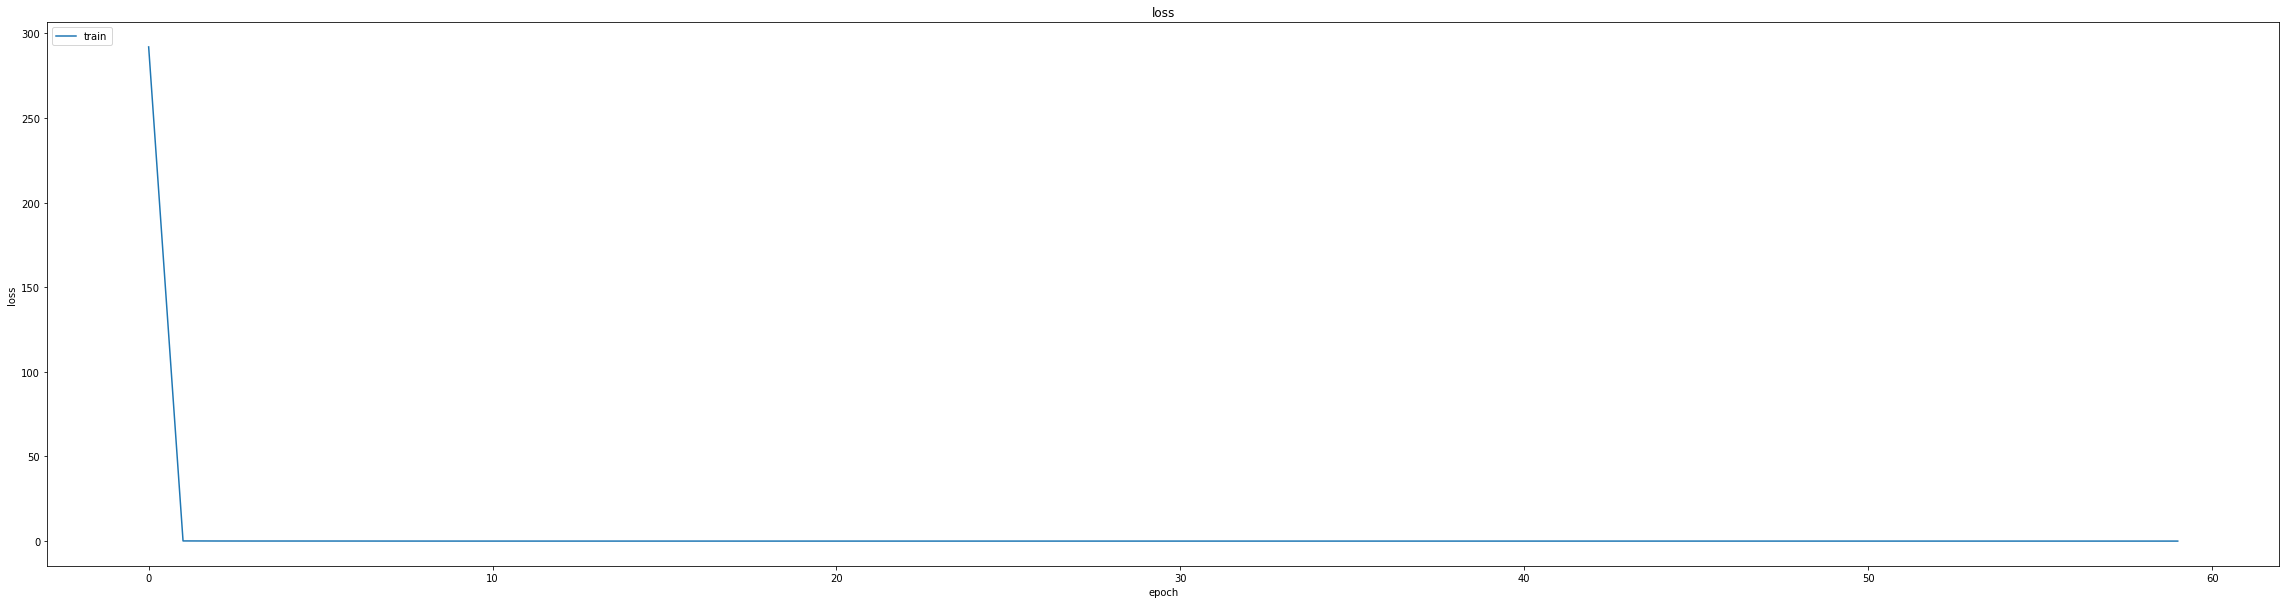

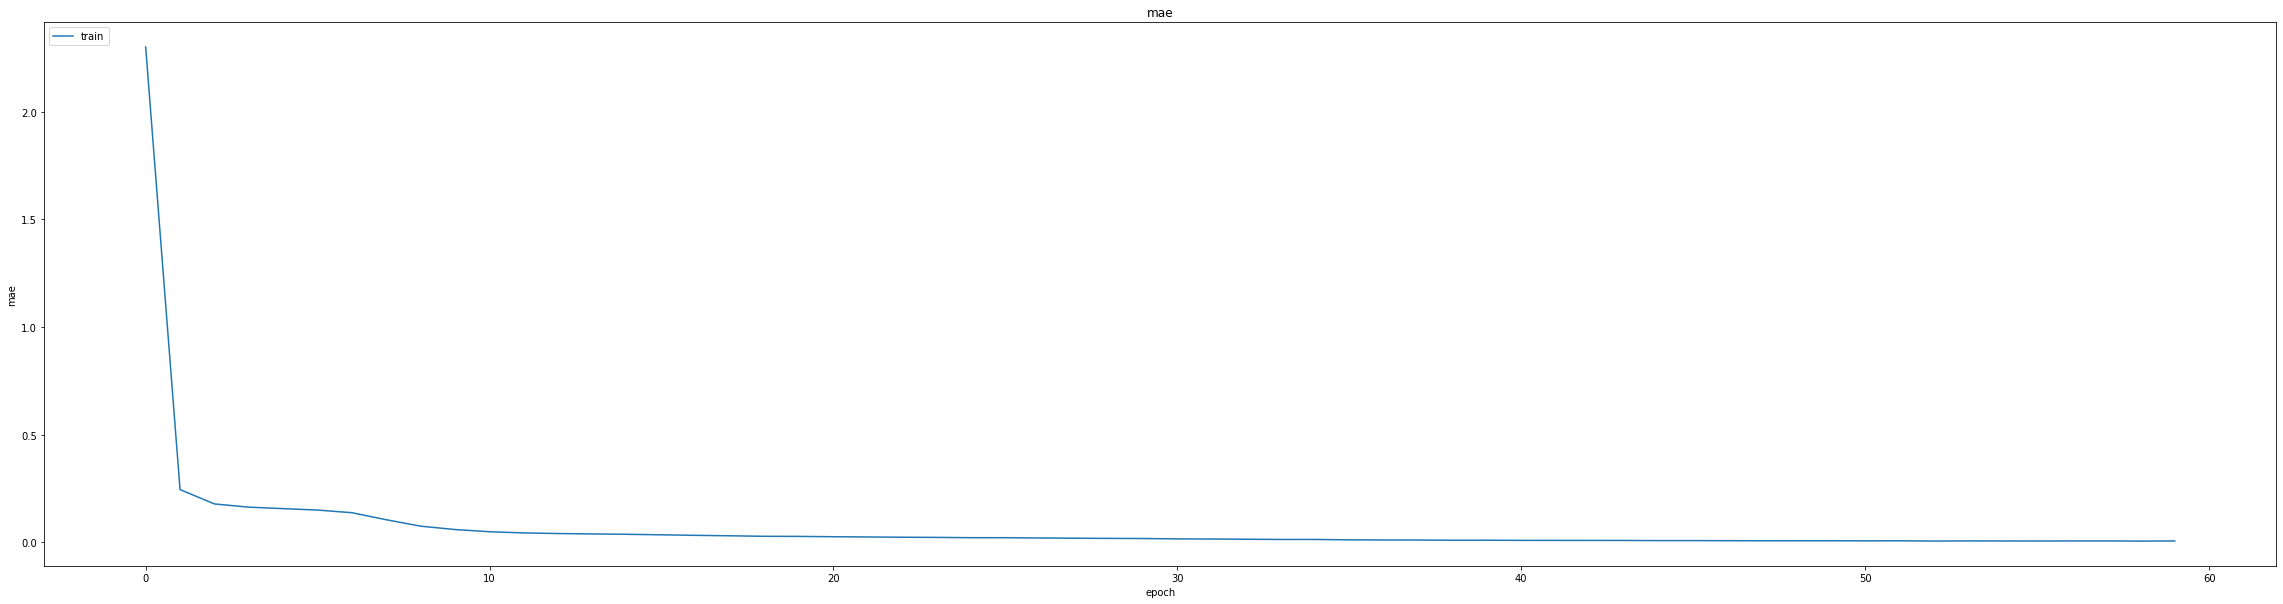

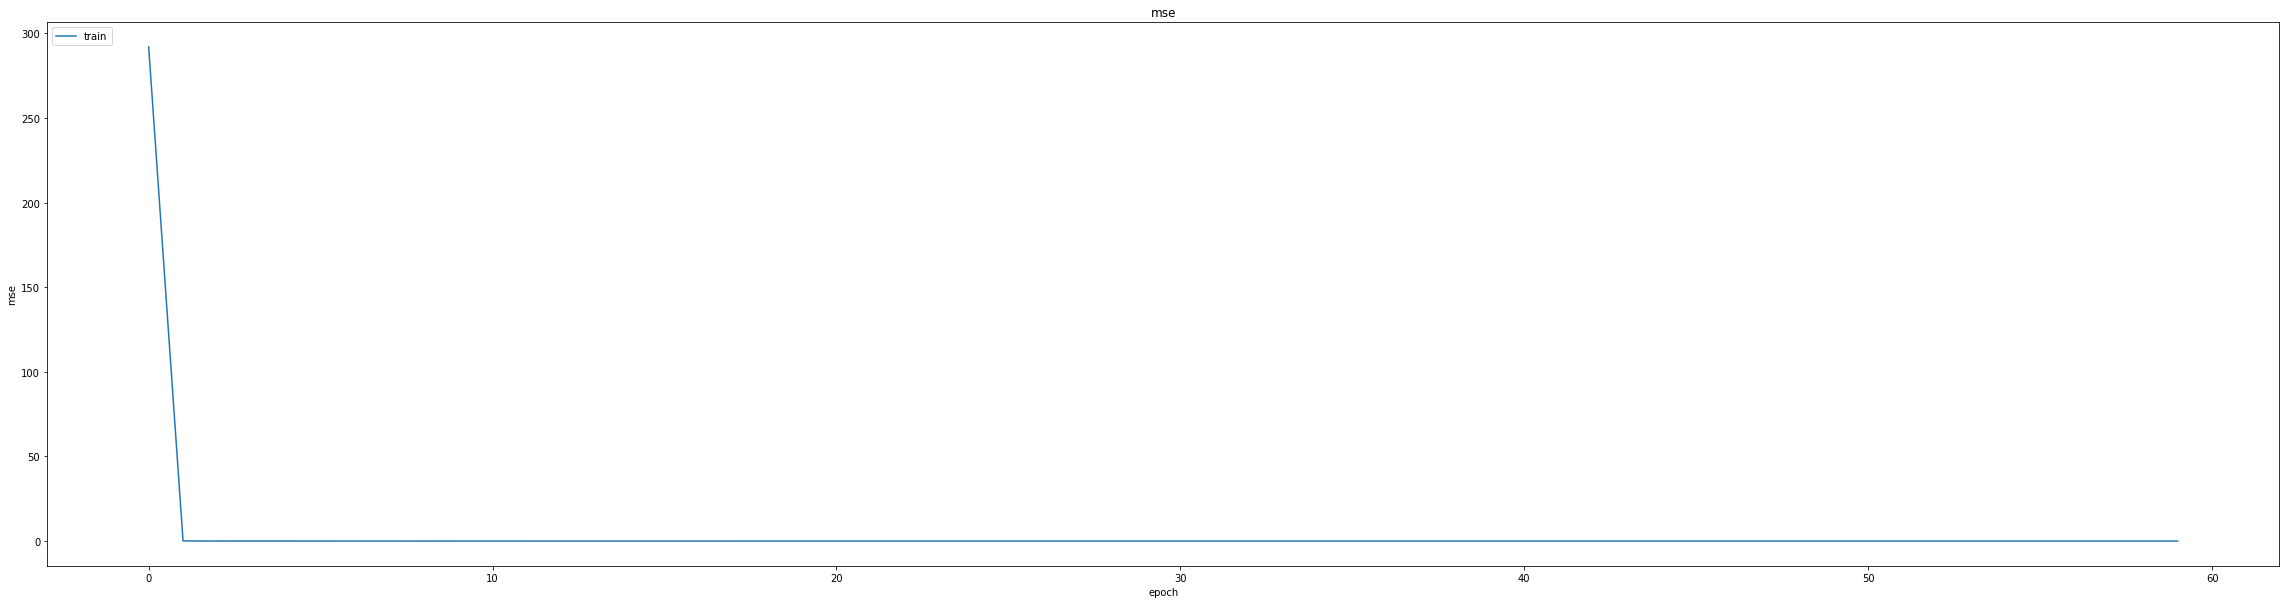

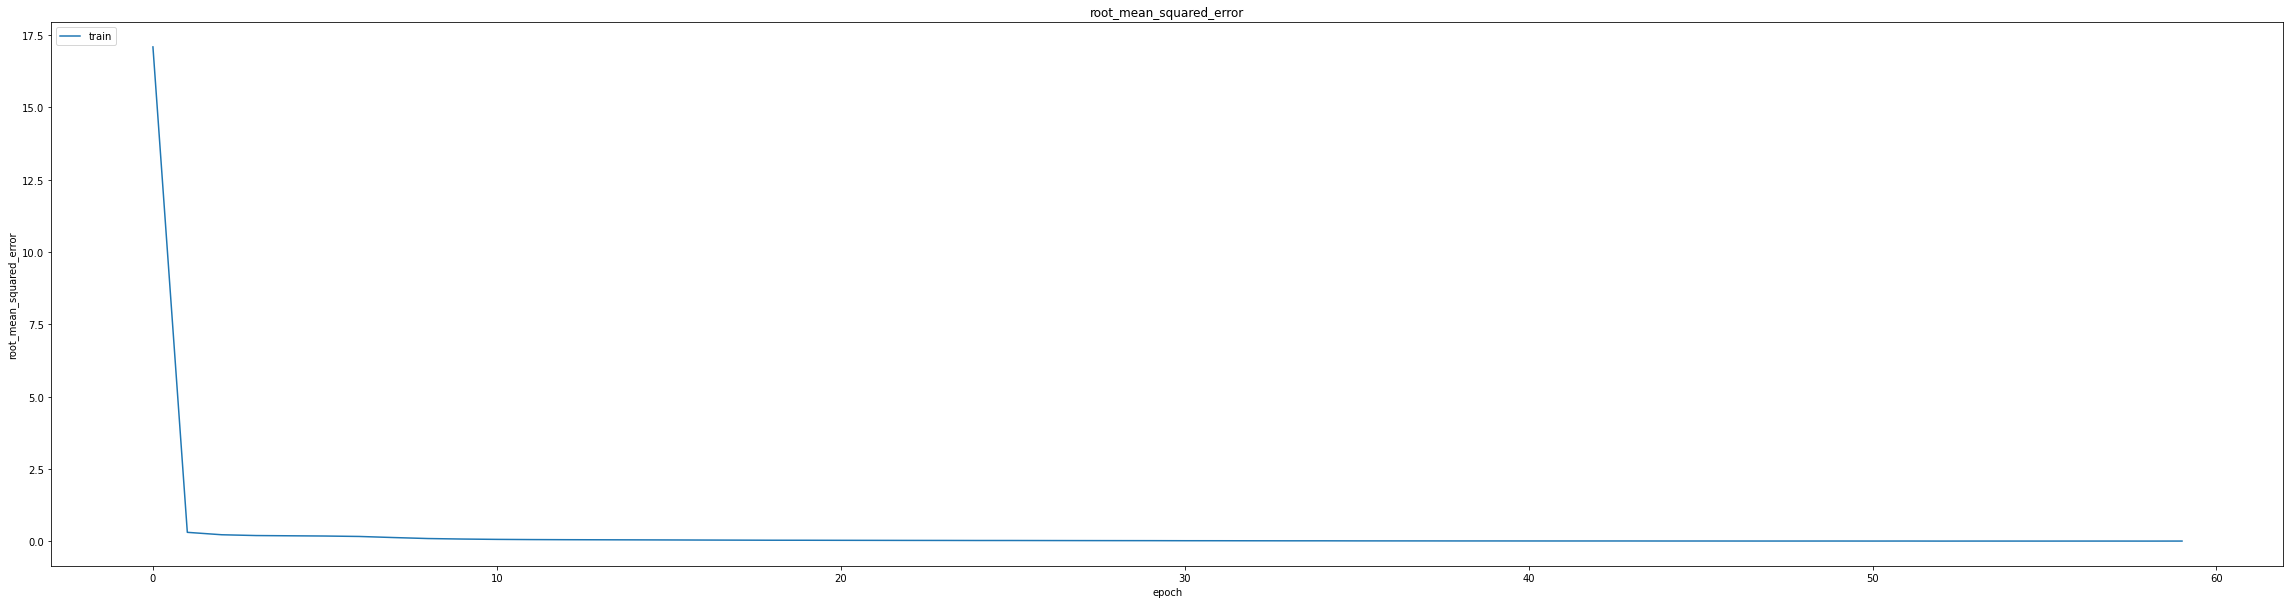

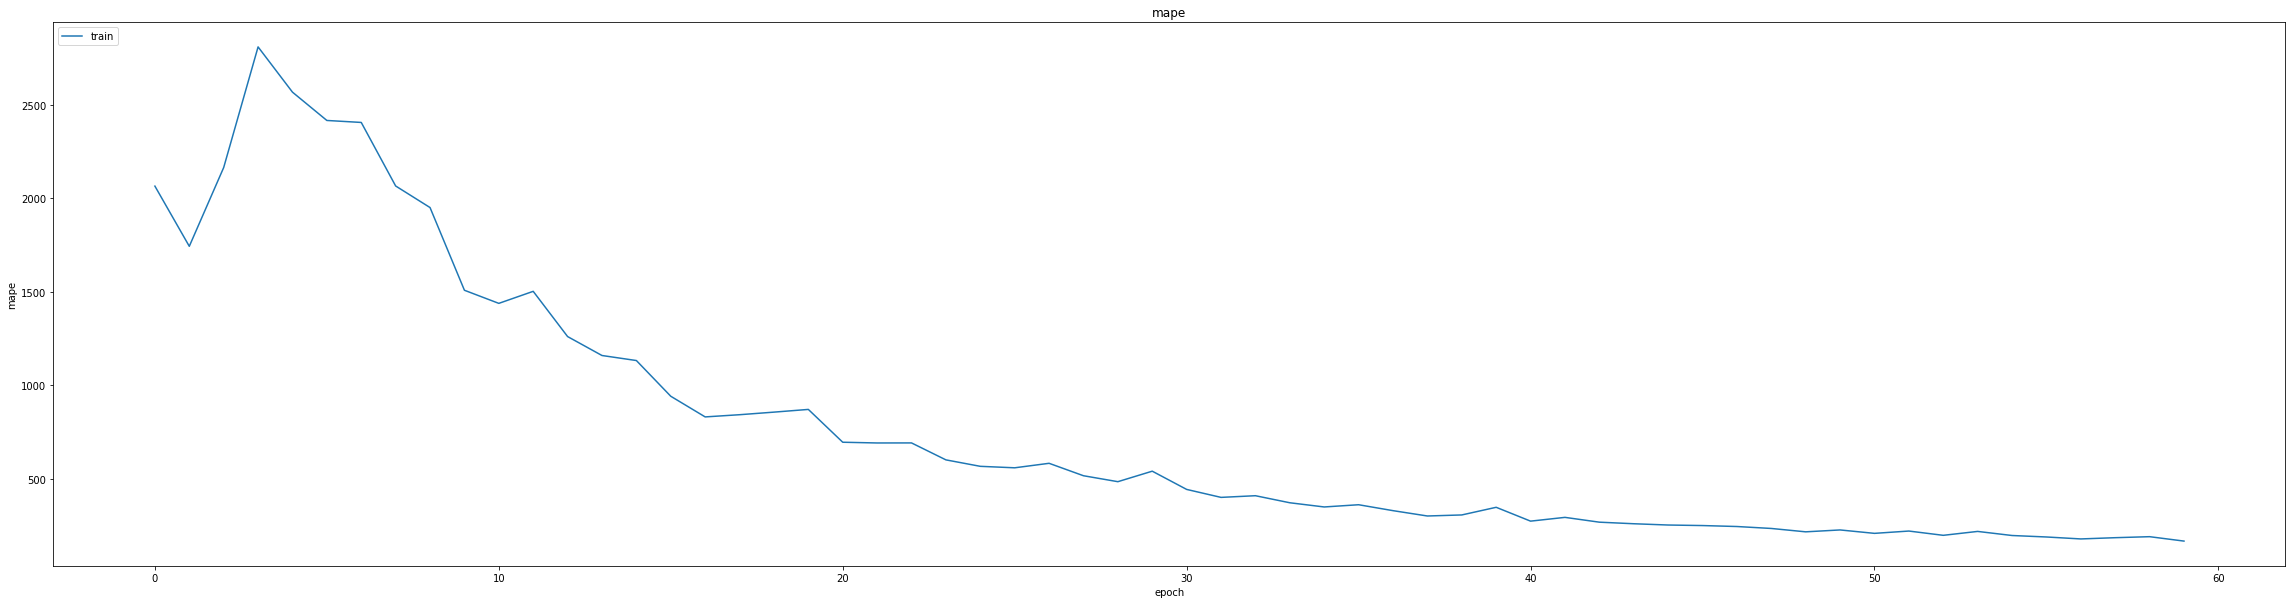

In [19]:
thesis.SummarizeHistory(history)

In [20]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00974265020340681
0.012962590903043747
1391/1391 [==============================] - 13s 8ms/step
0.99532816450118


In [21]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [22]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
347/347 [==============================] - ETA: 0s - loss: 9.7770e-04 - mae: 0.0123 - mse: 9.7770e-04 - root_mean_squared_error: 0.0313 - mape: 308.3604
Epoch 1: val_mse improved from 0.00017 to 0.00016, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 48s 113ms/step - loss: 9.7770e-04 - mae: 0.0123 - mse: 9.7770e-04 - root_mean_squared_error: 0.0313 - mape: 308.3604 - val_loss: 1.6471e-04 - val_mae: 0.0093 - val_mse: 1.6471e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 1048.4375 - lr: 0.0010
Epoch 2/20
347/347 [==============================] - ETA: 0s - loss: 3.7525e-05 - mae: 0.0047 - mse: 3.7525e-05 - root_mean_squared_error: 0.0061 - mape: 144.5106
Epoch 2: val_mse improved from 0.00016 to 0.00015, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 104ms/step - loss: 3.7525e-05 - mae: 0.0047 - mse: 3.7525e-05 - root_mean_squared_error: 0.0061 - mape: 144.5106 - val_loss: 1.4614e-04 - val_mae: 0.0089 - val_mse: 1.4614e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 1151.2571 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
347/347 [==============================] - ETA: 0s - loss: 3.3796e-05 - mae: 0.0045 - mse: 3.3796e-05 - root_mean_squared_error: 0.0058 - mape: 140.8318
Epoch 3: val_mse improved from 0.00015 to 0.00013, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 108ms/step - loss: 3.3796e-05 - mae: 0.0045 - mse: 3.3796e-05 - root_mean_squared_error: 0.0058 - mape: 140.8318 - val_loss: 1.3347e-04 - val_mae: 0.0085 - val_mse: 1.3347e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 1031.7531 - lr: 9.0000e-04
Epoch 4/20
347/347 [==============================] - ETA: 0s - loss: 3.7600e-05 - mae: 0.0047 - mse: 3.7600e-05 - root_mean_squared_error: 0.0061 - mape: 115.1324
Epoch 4: val_mse did not improve from 0.00013
347/347 [==============================] - 11s 33ms/step - loss: 3.7600e-05 - mae: 0.0047 - mse: 3.7600e-05 - root_mean_squared_error: 0.0061 - mape: 115.1324 - val_loss: 1.3353e-04 - val_mae: 0.0083 - val_mse: 1.3353e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 1096.3458 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
347/347 [==============================] - ETA: 0s - loss: 3.8391e-05 - mae: 0.0047 - mse: 3.8391e-05 - root_mean_squared_error: 0.0062 - mape: 

347/347 [==============================] - 37s 106ms/step - loss: 3.4497e-05 - mae: 0.0045 - mse: 3.4497e-05 - root_mean_squared_error: 0.0059 - mape: 115.5440 - val_loss: 9.8434e-05 - val_mae: 0.0072 - val_mse: 9.8434e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 752.3112 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
347/347 [==============================] - ETA: 0s - loss: 3.7044e-05 - mae: 0.0044 - mse: 3.7044e-05 - root_mean_squared_error: 0.0061 - mape: 119.7050
Epoch 11: val_mse did not improve from 0.00010
347/347 [==============================] - 12s 34ms/step - loss: 3.7044e-05 - mae: 0.0044 - mse: 3.7044e-05 - root_mean_squared_error: 0.0061 - mape: 119.7050 - val_loss: 1.1943e-04 - val_mae: 0.0078 - val_mse: 1.1943e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 803.9893 - lr: 5.9049e-04
Epoch 12/20
347/347 [==============================] - ETA: 0s - loss: 2.5853e-05 - mae: 0.0039 - mse: 2.5853e-05 - root_mean_squared_error: 0.0051 - mape:

347/347 [==============================] - 38s 110ms/step - loss: 2.5853e-05 - mae: 0.0039 - mse: 2.5853e-05 - root_mean_squared_error: 0.0051 - mape: 101.6595 - val_loss: 9.6484e-05 - val_mae: 0.0071 - val_mse: 9.6484e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 830.1470 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
347/347 [==============================] - ETA: 0s - loss: 1.8896e-05 - mae: 0.0033 - mse: 1.8896e-05 - root_mean_squared_error: 0.0043 - mape: 97.4916
Epoch 13: val_mse did not improve from 0.00010
347/347 [==============================] - 12s 34ms/step - loss: 1.8896e-05 - mae: 0.0033 - mse: 1.8896e-05 - root_mean_squared_error: 0.0043 - mape: 97.4916 - val_loss: 1.7384e-04 - val_mae: 0.0102 - val_mse: 1.7384e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 749.8632 - lr: 5.3144e-04
Epoch 14/20
347/347 [==============================] - ETA: 0s - loss: 3.1707e-05 - mae: 0.0042 - mse: 3.1707e-05 - root_mean_squared_error: 0.0056 - mape: 8

347/347 [==============================] - 37s 106ms/step - loss: 3.1707e-05 - mae: 0.0042 - mse: 3.1707e-05 - root_mean_squared_error: 0.0056 - mape: 86.4577 - val_loss: 8.7116e-05 - val_mae: 0.0069 - val_mse: 8.7116e-05 - val_root_mean_squared_error: 0.0093 - val_mape: 788.0167 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
347/347 [==============================] - ETA: 0s - loss: 1.5566e-05 - mae: 0.0030 - mse: 1.5566e-05 - root_mean_squared_error: 0.0039 - mape: 83.3434
Epoch 15: val_mse did not improve from 0.00009
347/347 [==============================] - 12s 34ms/step - loss: 1.5566e-05 - mae: 0.0030 - mse: 1.5566e-05 - root_mean_squared_error: 0.0039 - mape: 83.3434 - val_loss: 9.0821e-05 - val_mae: 0.0069 - val_mse: 9.0821e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 791.6084 - lr: 4.7830e-04
Epoch 16/20
347/347 [==============================] - ETA: 0s - loss: 2.1708e-05 - mae: 0.0035 - mse: 2.1708e-05 - root_mean_squared_error: 0.0047 - mape: 8

347/347 [==============================] - 37s 106ms/step - loss: 2.1708e-05 - mae: 0.0035 - mse: 2.1708e-05 - root_mean_squared_error: 0.0047 - mape: 80.4298 - val_loss: 8.1676e-05 - val_mae: 0.0065 - val_mse: 8.1676e-05 - val_root_mean_squared_error: 0.0090 - val_mape: 806.5097 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
347/347 [==============================] - ETA: 0s - loss: 1.5601e-05 - mae: 0.0030 - mse: 1.5601e-05 - root_mean_squared_error: 0.0039 - mape: 78.3122
Epoch 17: val_mse did not improve from 0.00008
347/347 [==============================] - 12s 34ms/step - loss: 1.5601e-05 - mae: 0.0030 - mse: 1.5601e-05 - root_mean_squared_error: 0.0039 - mape: 78.3122 - val_loss: 9.9380e-05 - val_mae: 0.0072 - val_mse: 9.9380e-05 - val_root_mean_squared_error: 0.0100 - val_mape: 784.9135 - lr: 4.3047e-04
Epoch 18/20
347/347 [==============================] - ETA: 0s - loss: 1.8288e-05 - mae: 0.0032 - mse: 1.8288e-05 - root_mean_squared_error: 0.0043 - mape: 91

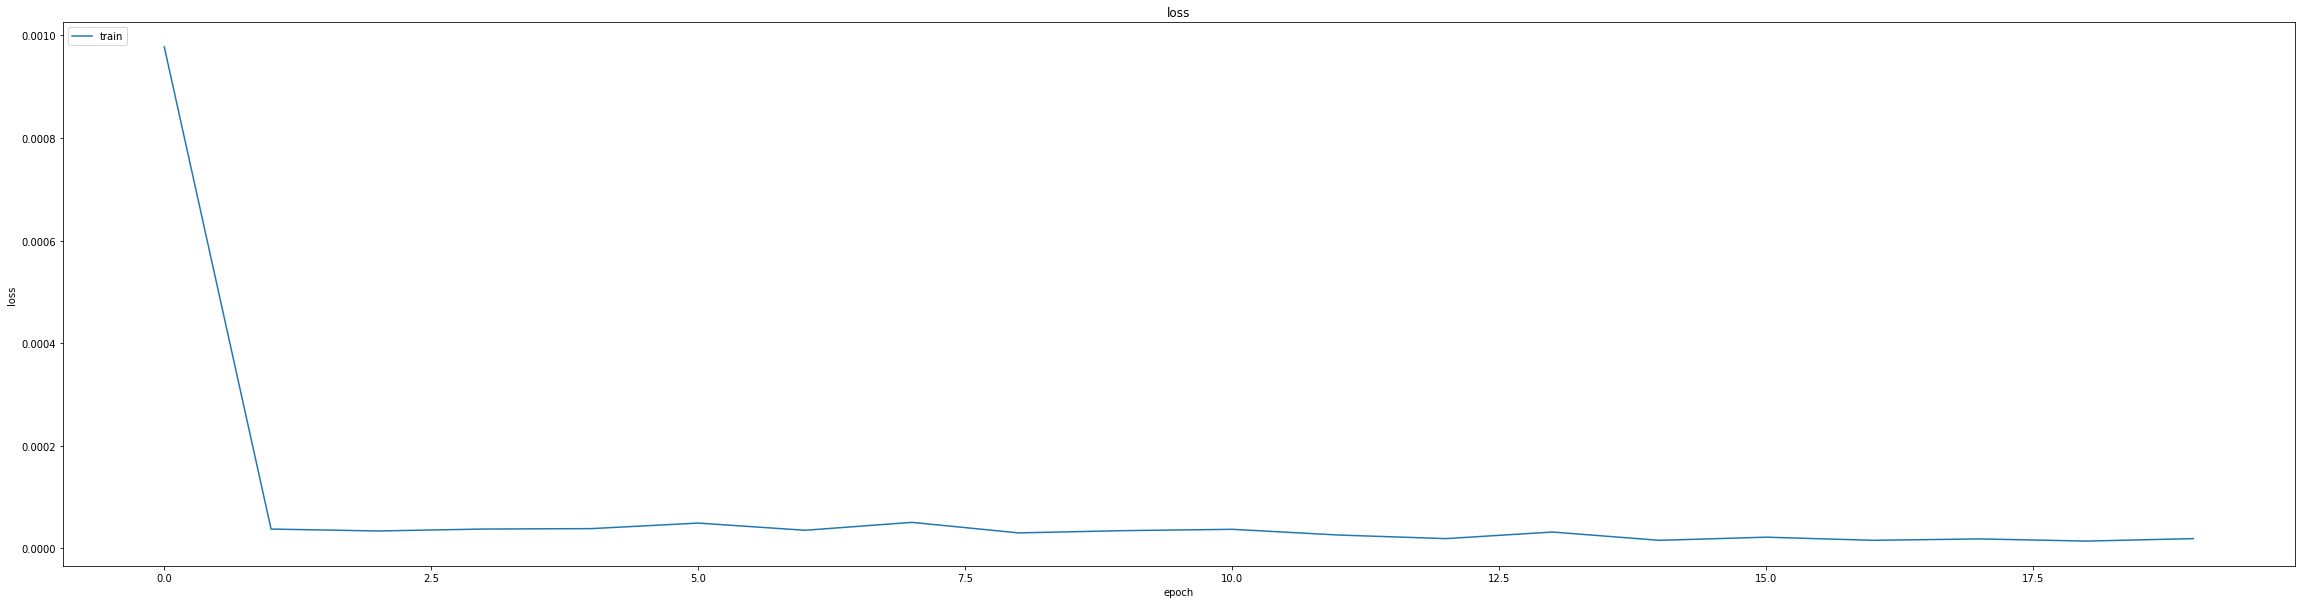

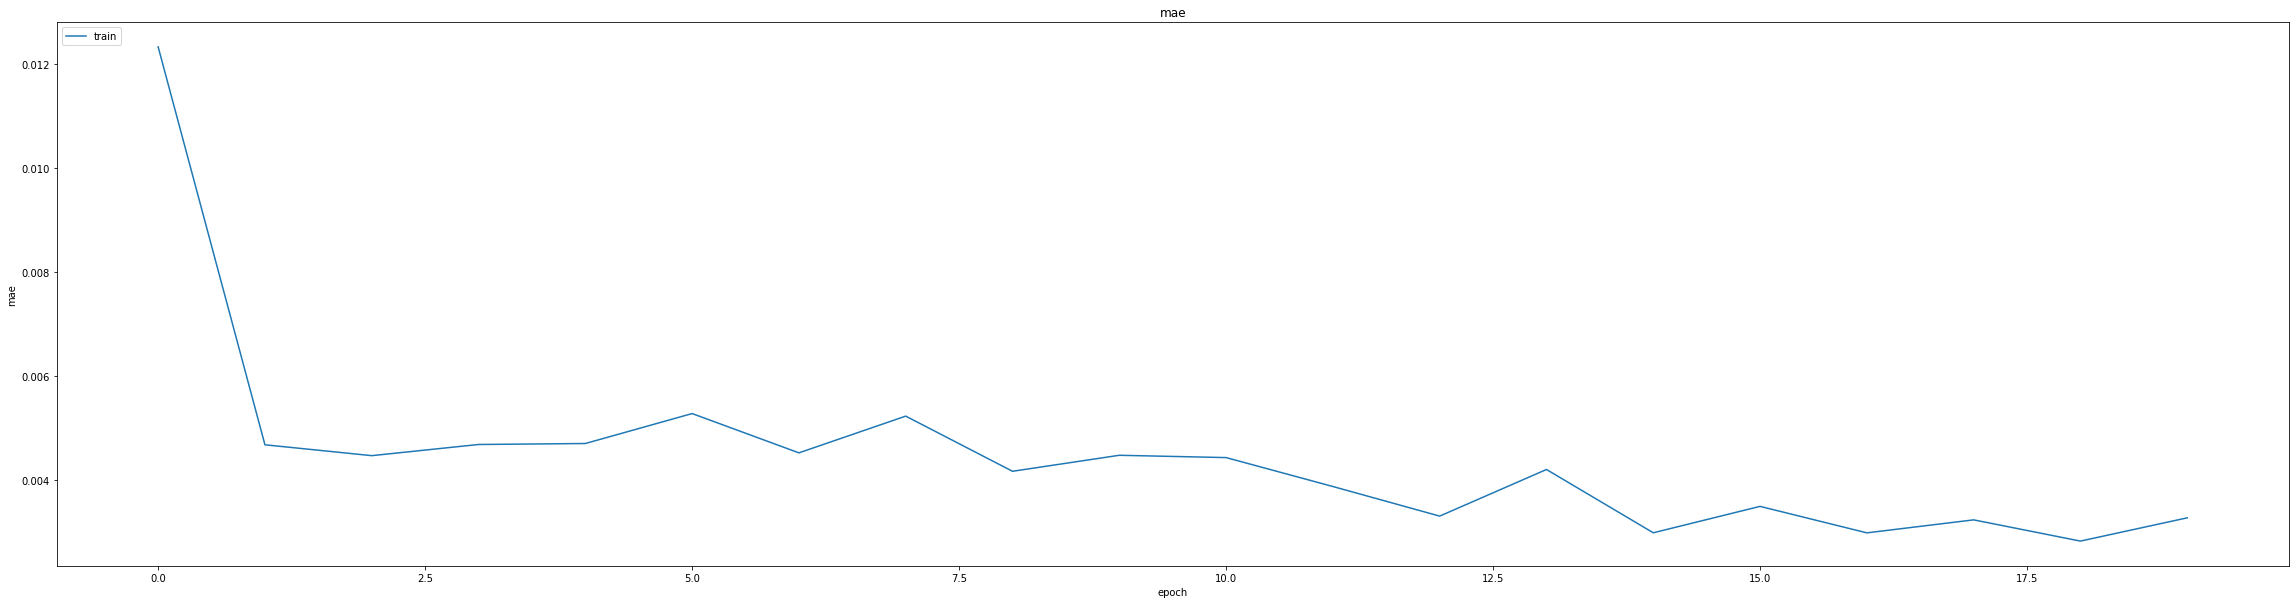

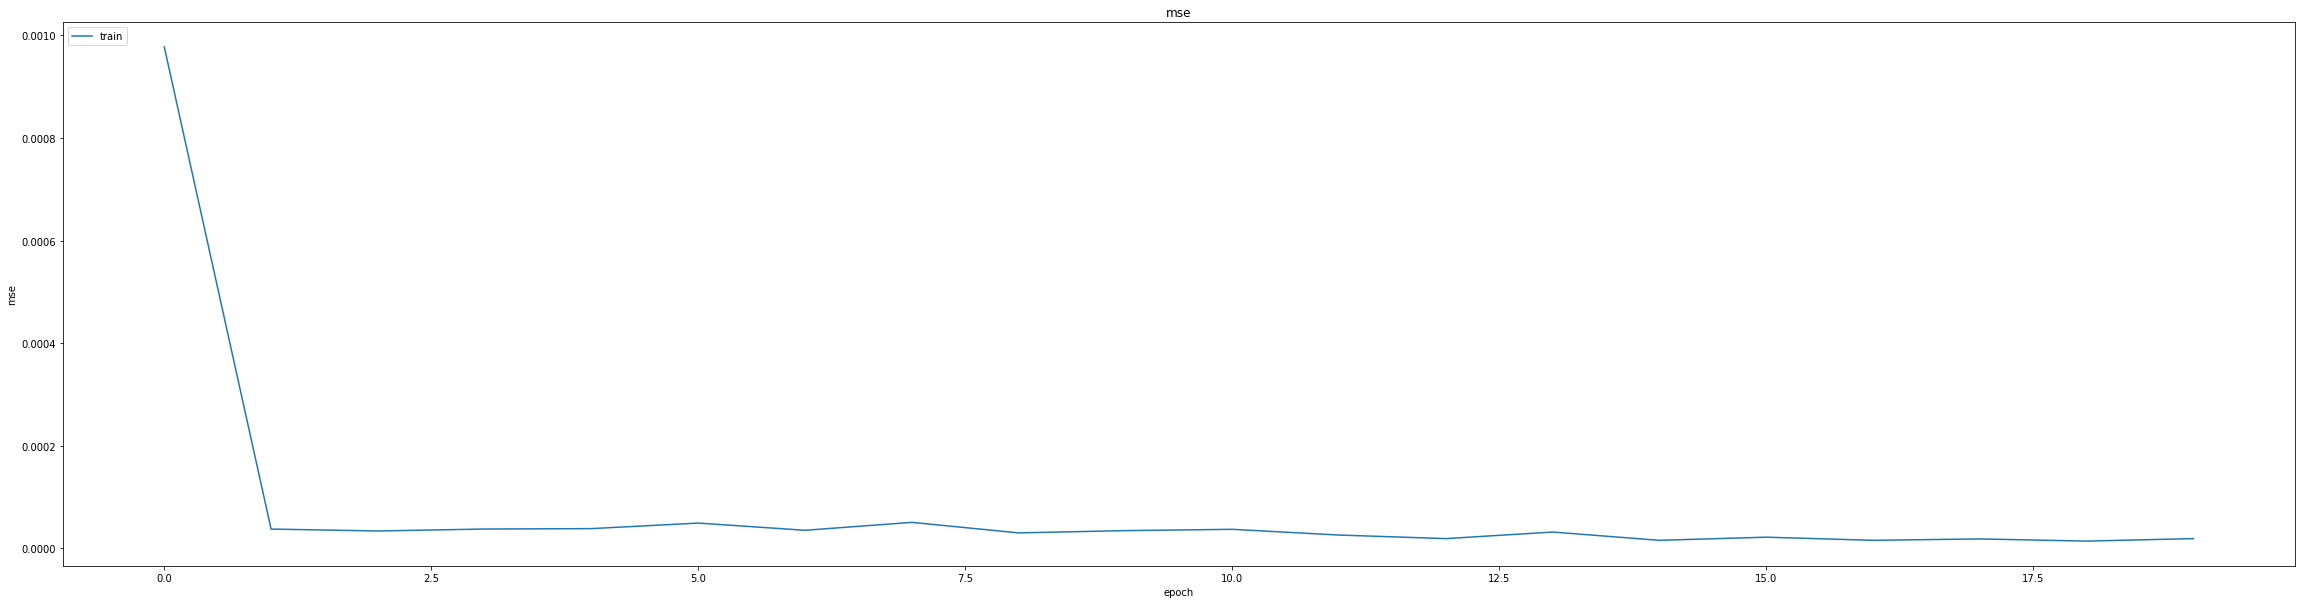

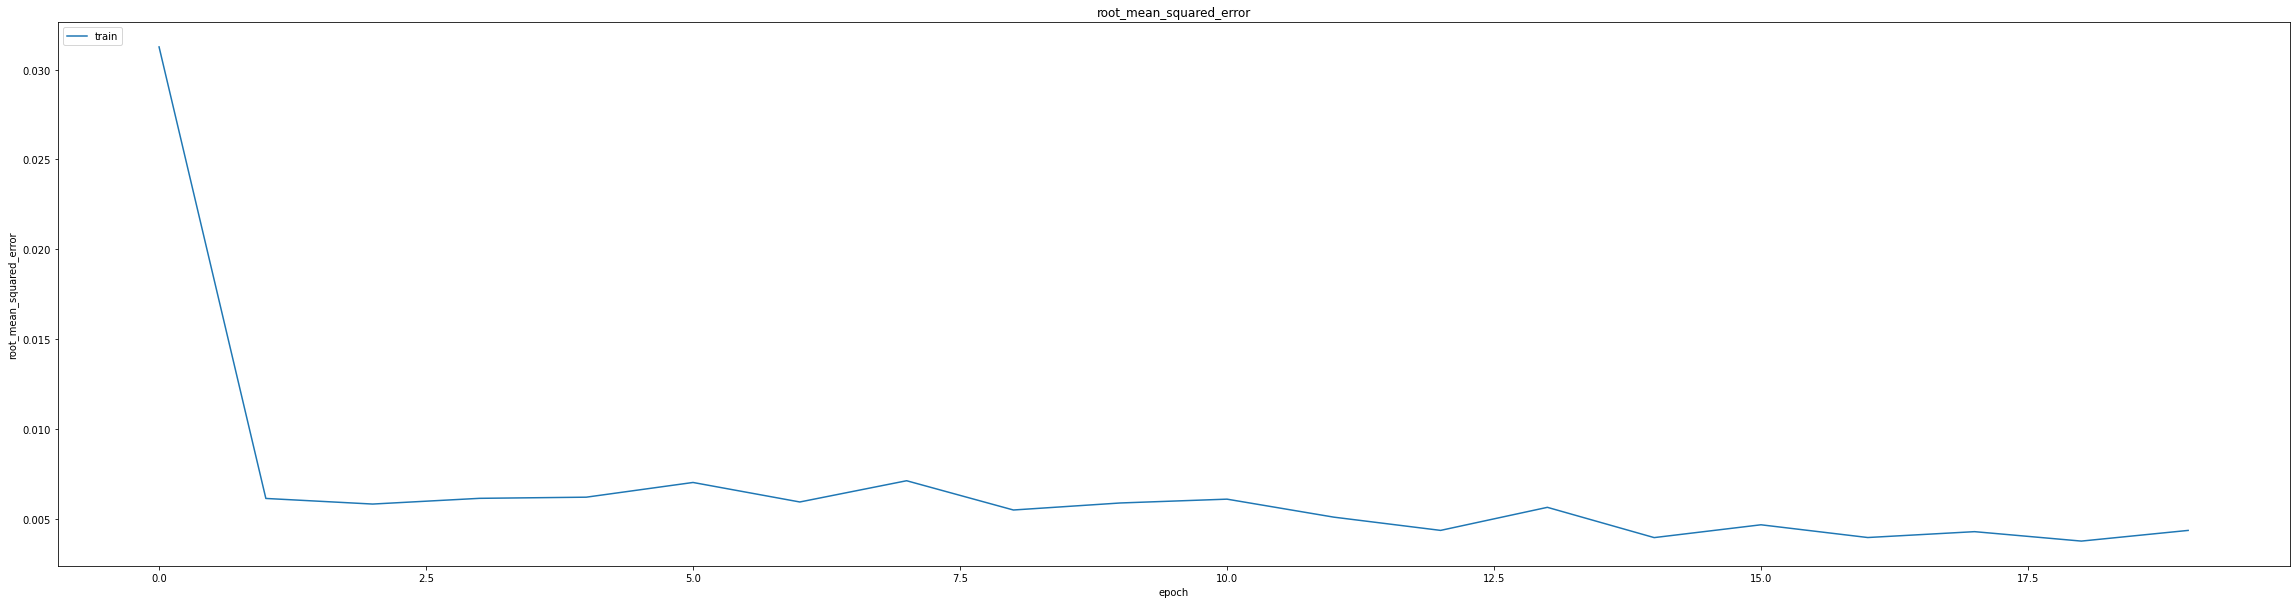

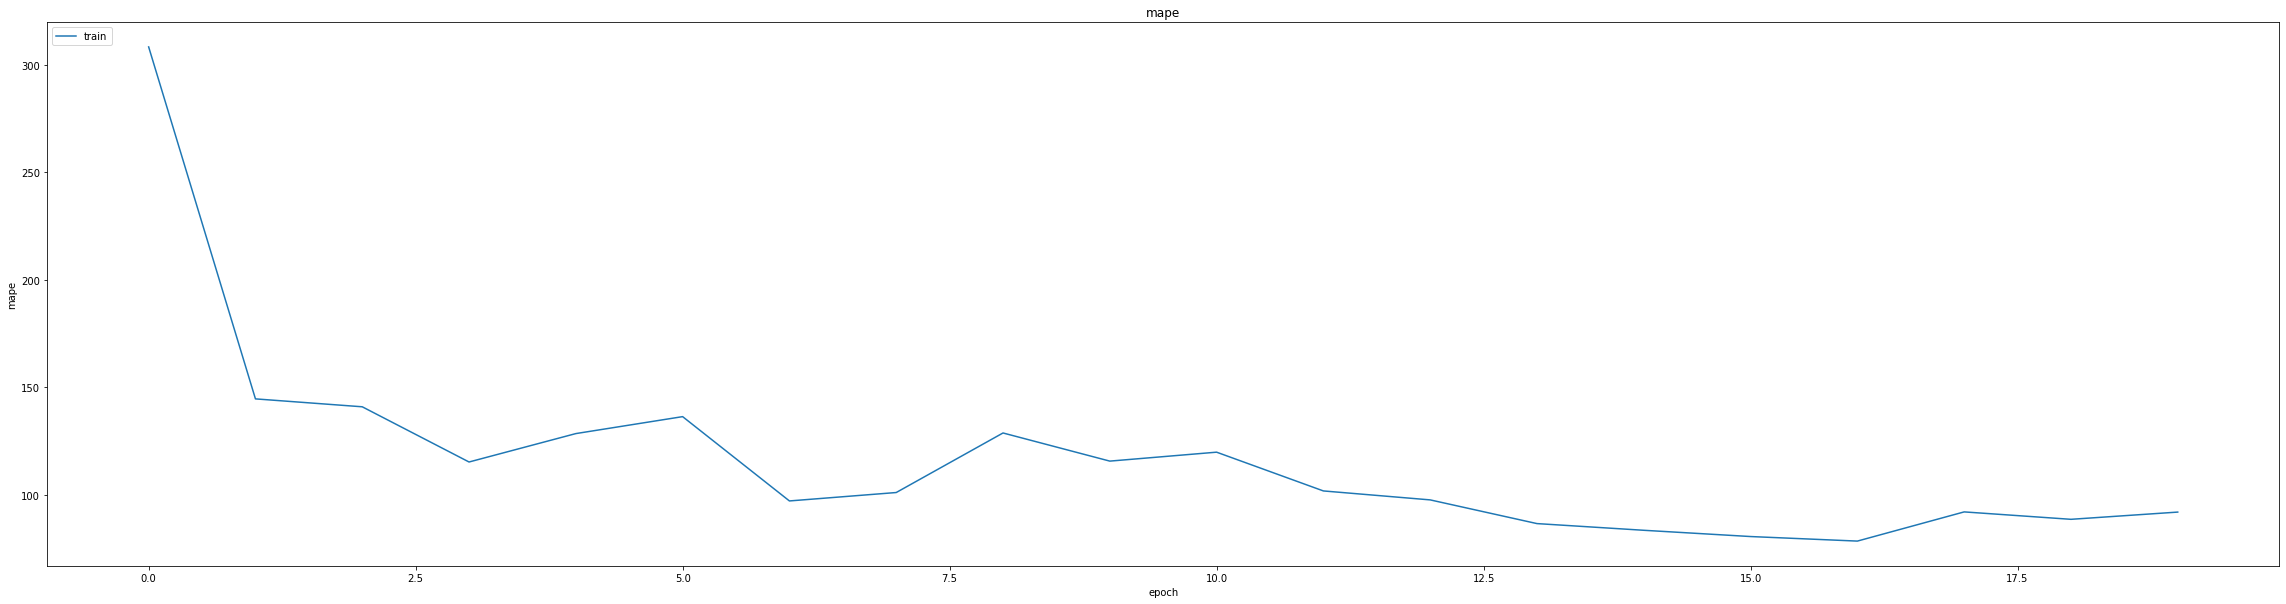

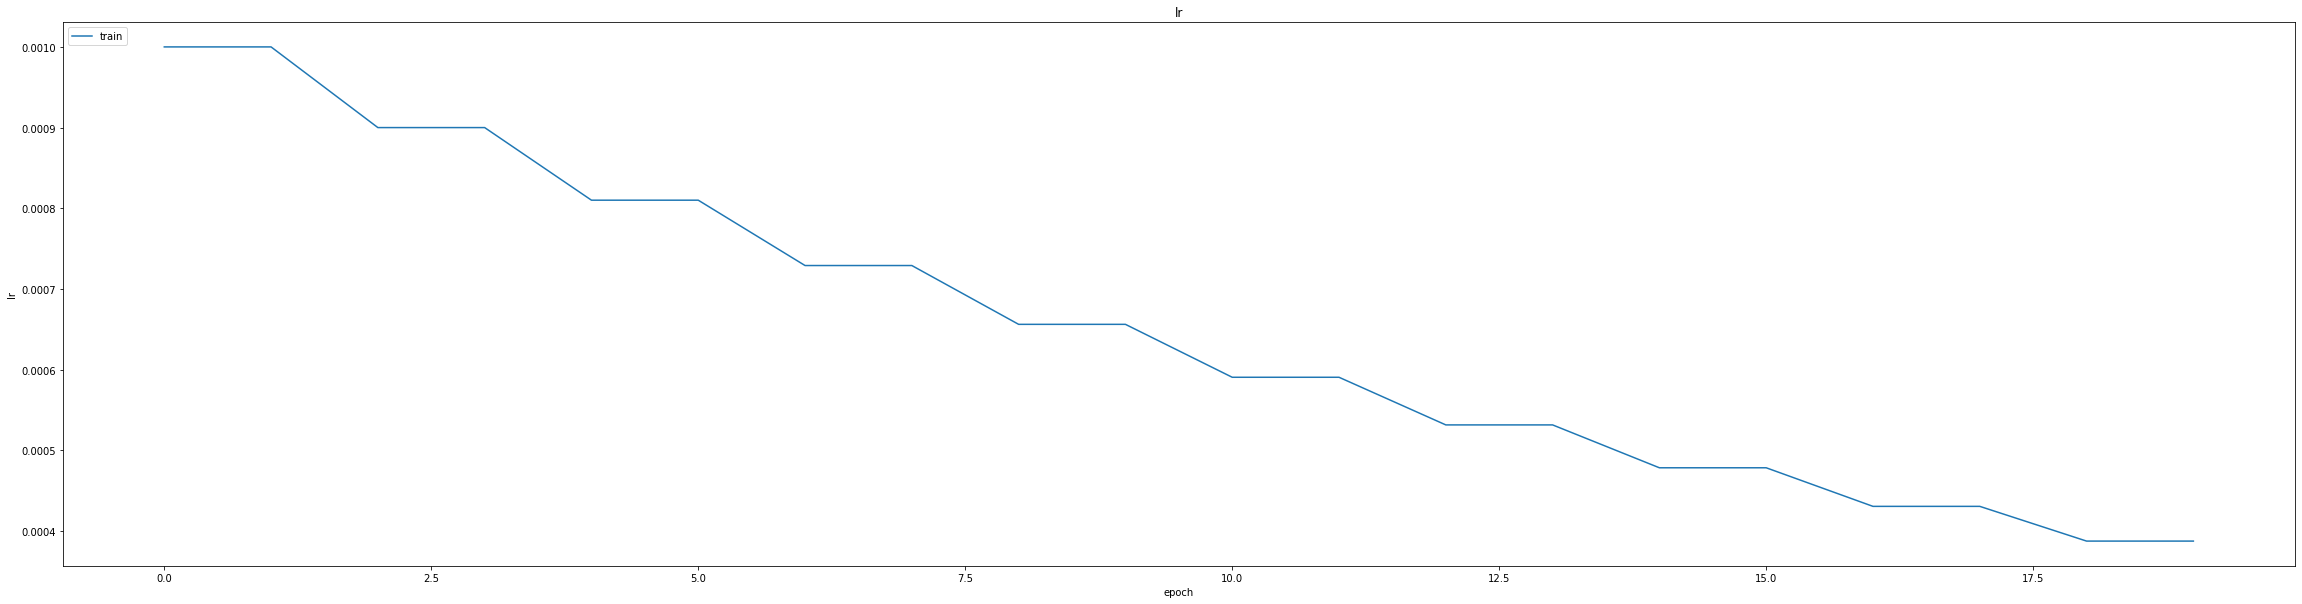

In [23]:
thesis.SummarizeHistory(history)

In [24]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006499431096017361
0.009037495590746403
1391/1391 [==============================] - 9s 6ms/step
0.9973711583862687


1391/1391 [==============================] - 8s 6ms/step


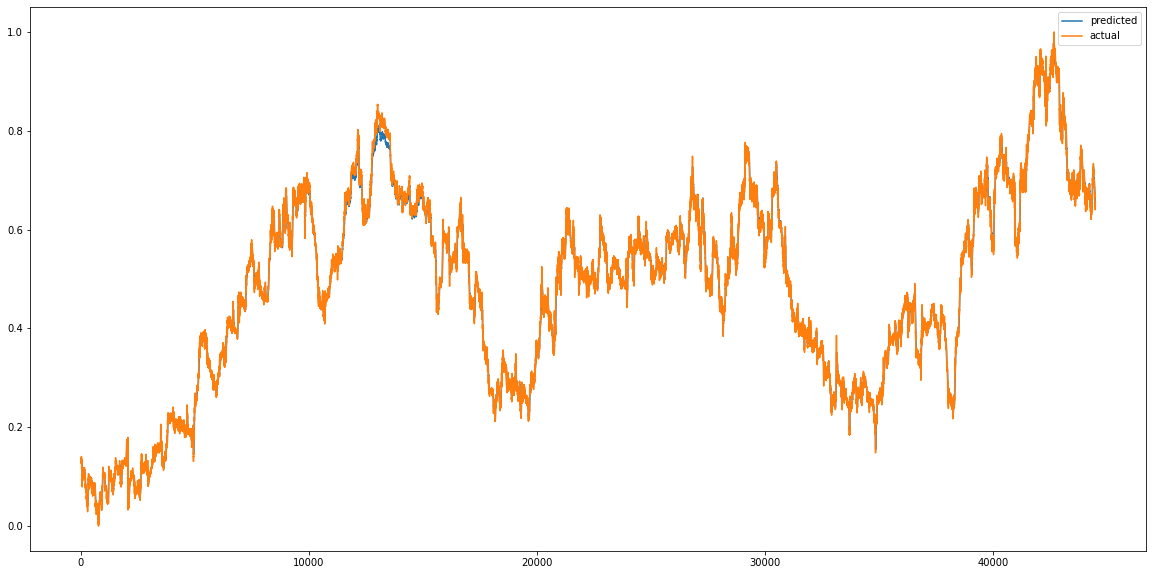

In [25]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


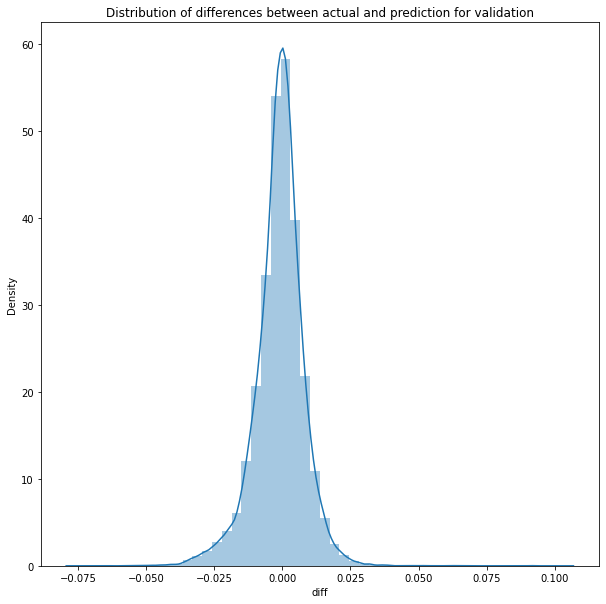

In [26]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 8s 6ms/step


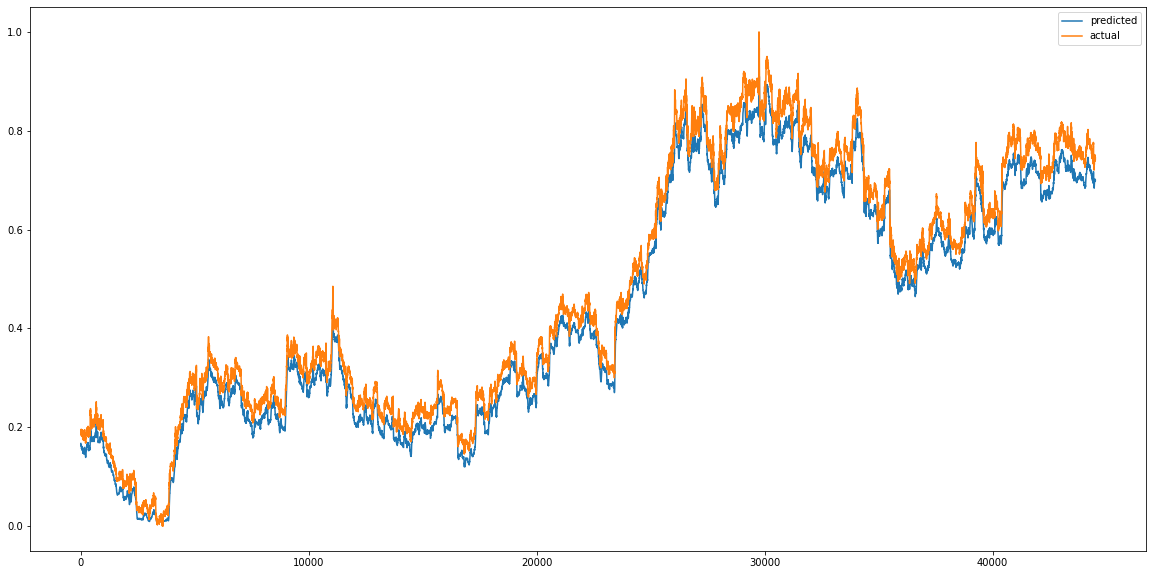

In [27]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


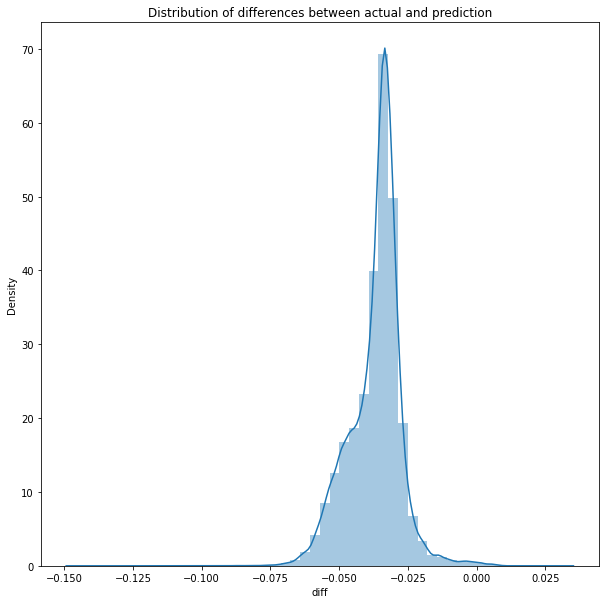

In [28]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0014396008959698346
RMSE :  0.03794207290027569
MAE :  0.03675665816685404
1391/1391 [==============================] - 8s 6ms/step
R2_Score  : 0.9770996484647083


count    44506.000000
mean        -0.036738
std          0.009483
min         -0.145979
25%         -0.041733
50%         -0.034895
75%         -0.031339
max          0.031890
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [30]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [31]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
344/347 [============================>.] - ETA: 0s - loss: 298.9809 - mae: 2.3276 - mse: 298.9809 - root_mean_squared_error: 17.2911 - mape: 3385.3828
Epoch 1: val_mse improved from inf to 0.09479, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 22s 54ms/step - loss: 296.4653 - mae: 2.3095 - mse: 296.4653 - root_mean_squared_error: 17.2182 - mape: 3357.6309 - val_loss: 0.0948 - val_mae: 0.2622 - val_mse: 0.0948 - val_root_mean_squared_error: 0.3079 - val_mape: 5620.8462
Epoch 2/60
344/347 [============================>.] - ETA: 0s - loss: 0.0502 - mae: 0.1782 - mse: 0.0502 - root_mean_squared_error: 0.2240 - mape: 2762.5508
Epoch 2: val_mse improved from 0.09479 to 0.05884, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0502 - mae: 0.1782 - mse: 0.0502 - root_mean_squared_error: 0.2240 - mape: 2740.2974 - val_loss: 0.0588 - val_mae: 0.2049 - val_mse: 0.0588 - val_root_mean_squared_error: 0.2426 - val_mape: 7792.8296
Epoch 3/60
344/347 [============================>.] - ETA: 0s - loss: 0.0449 - mae: 0.1754 - mse: 0.0449 - root_mean_squared_error: 0.2118 - mape: 2762.6948
Epoch 3: val_mse improved from 0.05884 to 0.05332, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0449 - mae: 0.1753 - mse: 0.0449 - root_mean_squared_error: 0.2118 - mape: 2740.3784 - val_loss: 0.0533 - val_mae: 0.1948 - val_mse: 0.0533 - val_root_mean_squared_error: 0.2309 - val_mape: 8258.8516
Epoch 4/60
346/347 [============================>.] - ETA: 0s - loss: 0.0443 - mae: 0.1747 - mse: 0.0443 - root_mean_squared_error: 0.2106 - mape: 3327.6917
Epoch 4: val_mse improved from 0.05332 to 0.05190, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 16s 46ms/step - loss: 0.0443 - mae: 0.1747 - mse: 0.0443 - root_mean_squared_error: 0.2106 - mape: 3319.1953 - val_loss: 0.0519 - val_mae: 0.1921 - val_mse: 0.0519 - val_root_mean_squared_error: 0.2278 - val_mape: 8272.7529
Epoch 5/60
346/347 [============================>.] - ETA: 0s - loss: 0.0429 - mae: 0.1715 - mse: 0.0429 - root_mean_squared_error: 0.2072 - mape: 3038.5525
Epoch 5: val_mse improved from 0.05190 to 0.04808, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0429 - mae: 0.1715 - mse: 0.0429 - root_mean_squared_error: 0.2072 - mape: 3030.8647 - val_loss: 0.0481 - val_mae: 0.1839 - val_mse: 0.0481 - val_root_mean_squared_error: 0.2193 - val_mape: 8181.7388
Epoch 6/60
345/347 [============================>.] - ETA: 0s - loss: 0.0390 - mae: 0.1619 - mse: 0.0390 - root_mean_squared_error: 0.1975 - mape: 2655.7534
Epoch 6: val_mse improved from 0.04808 to 0.03958, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0390 - mae: 0.1619 - mse: 0.0390 - root_mean_squared_error: 0.1975 - mape: 2641.7124 - val_loss: 0.0396 - val_mae: 0.1642 - val_mse: 0.0396 - val_root_mean_squared_error: 0.1989 - val_mape: 7978.7681
Epoch 7/60
347/347 [==============================] - ETA: 0s - loss: 0.0327 - mae: 0.1452 - mse: 0.0327 - root_mean_squared_error: 0.1808 - mape: 2532.1155
Epoch 7: val_mse improved from 0.03958 to 0.02875, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0327 - mae: 0.1452 - mse: 0.0327 - root_mean_squared_error: 0.1808 - mape: 2532.1155 - val_loss: 0.0287 - val_mae: 0.1349 - val_mse: 0.0287 - val_root_mean_squared_error: 0.1696 - val_mape: 7290.2305
Epoch 8/60
347/347 [==============================] - ETA: 0s - loss: 0.0209 - mae: 0.1118 - mse: 0.0209 - root_mean_squared_error: 0.1447 - mape: 2594.3970
Epoch 8: val_mse improved from 0.02875 to 0.01076, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 52ms/step - loss: 0.0209 - mae: 0.1118 - mse: 0.0209 - root_mean_squared_error: 0.1447 - mape: 2594.3970 - val_loss: 0.0108 - val_mae: 0.0753 - val_mse: 0.0108 - val_root_mean_squared_error: 0.1037 - val_mape: 5998.2393
Epoch 9/60
345/347 [============================>.] - ETA: 0s - loss: 0.0122 - mae: 0.0854 - mse: 0.0122 - root_mean_squared_error: 0.1106 - mape: 2156.2134
Epoch 9: val_mse improved from 0.01076 to 0.00846, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 16s 46ms/step - loss: 0.0122 - mae: 0.0853 - mse: 0.0122 - root_mean_squared_error: 0.1105 - mape: 2144.6025 - val_loss: 0.0085 - val_mae: 0.0700 - val_mse: 0.0085 - val_root_mean_squared_error: 0.0920 - val_mape: 5252.8120
Epoch 10/60
347/347 [==============================] - ETA: 0s - loss: 0.0094 - mae: 0.0737 - mse: 0.0094 - root_mean_squared_error: 0.0967 - mape: 2073.0981
Epoch 10: val_mse improved from 0.00846 to 0.00520, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0094 - mae: 0.0737 - mse: 0.0094 - root_mean_squared_error: 0.0967 - mape: 2073.0981 - val_loss: 0.0052 - val_mae: 0.0527 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0721 - val_mape: 4771.8809
Epoch 11/60
346/347 [============================>.] - ETA: 0s - loss: 0.0071 - mae: 0.0632 - mse: 0.0071 - root_mean_squared_error: 0.0845 - mape: 1448.9060
Epoch 11: val_mse improved from 0.00520 to 0.00335, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0071 - mae: 0.0631 - mse: 0.0071 - root_mean_squared_error: 0.0845 - mape: 1445.2218 - val_loss: 0.0033 - val_mae: 0.0383 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0579 - val_mape: 4387.6289
Epoch 12/60
347/347 [==============================] - ETA: 0s - loss: 0.0056 - mae: 0.0554 - mse: 0.0056 - root_mean_squared_error: 0.0745 - mape: 1469.6123
Epoch 12: val_mse improved from 0.00335 to 0.00277, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0056 - mae: 0.0554 - mse: 0.0056 - root_mean_squared_error: 0.0745 - mape: 1469.6123 - val_loss: 0.0028 - val_mae: 0.0366 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0526 - val_mape: 4088.8599
Epoch 13/60
344/347 [============================>.] - ETA: 0s - loss: 0.0048 - mae: 0.0516 - mse: 0.0048 - root_mean_squared_error: 0.0690 - mape: 1418.5787
Epoch 13: val_mse improved from 0.00277 to 0.00243, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0048 - mae: 0.0516 - mse: 0.0048 - root_mean_squared_error: 0.0690 - mape: 1407.0903 - val_loss: 0.0024 - val_mae: 0.0358 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0493 - val_mape: 3863.8044
Epoch 14/60
346/347 [============================>.] - ETA: 0s - loss: 0.0042 - mae: 0.0483 - mse: 0.0042 - root_mean_squared_error: 0.0646 - mape: 1259.1940
Epoch 14: val_mse improved from 0.00243 to 0.00196, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 0.0042 - mae: 0.0483 - mse: 0.0042 - root_mean_squared_error: 0.0646 - mape: 1255.9614 - val_loss: 0.0020 - val_mae: 0.0316 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0443 - val_mape: 3645.4531
Epoch 15/60
346/347 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0452 - mse: 0.0037 - root_mean_squared_error: 0.0605 - mape: 1564.0363
Epoch 15: val_mse improved from 0.00196 to 0.00142, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0037 - mae: 0.0452 - mse: 0.0037 - root_mean_squared_error: 0.0605 - mape: 1560.0032 - val_loss: 0.0014 - val_mae: 0.0256 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0377 - val_mape: 3421.7537
Epoch 16/60
345/347 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0422 - mse: 0.0032 - root_mean_squared_error: 0.0565 - mape: 1102.8368
Epoch 16: val_mse improved from 0.00142 to 0.00118, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0032 - mae: 0.0422 - mse: 0.0032 - root_mean_squared_error: 0.0565 - mape: 1096.9346 - val_loss: 0.0012 - val_mae: 0.0248 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0343 - val_mape: 3235.5239
Epoch 17/60
345/347 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0402 - mse: 0.0029 - root_mean_squared_error: 0.0535 - mape: 1047.0892
Epoch 17: val_mse improved from 0.00118 to 0.00101, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0029 - mae: 0.0402 - mse: 0.0029 - root_mean_squared_error: 0.0535 - mape: 1041.5417 - val_loss: 0.0010 - val_mae: 0.0214 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0318 - val_mape: 3060.4824
Epoch 18/60
346/347 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0380 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 993.0705 
Epoch 18: val_mse did not improve from 0.00101
347/347 [==============================] - 6s 17ms/step - loss: 0.0026 - mae: 0.0380 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 990.5159 - val_loss: 0.0019 - val_mae: 0.0375 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0438 - val_mape: 2928.5159
Epoch 19/60
345/347 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0355 - mse: 0.0023 - root_mean_squared_error: 0.0474 - mape: 1004.2653
Epoch 19: val_mse improved from 0.00101 to 0.00068, saving model to /content/drive/MyDrive/modelweights/C

347/347 [==============================] - 17s 48ms/step - loss: 0.0022 - mae: 0.0355 - mse: 0.0022 - root_mean_squared_error: 0.0474 - mape: 998.8669 - val_loss: 6.8381e-04 - val_mae: 0.0175 - val_mse: 6.8381e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 2773.0273
Epoch 20/60
346/347 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0342 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 952.7603
Epoch 20: val_mse did not improve from 0.00068
347/347 [==============================] - 6s 19ms/step - loss: 0.0021 - mae: 0.0342 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 950.3419 - val_loss: 7.2182e-04 - val_mae: 0.0191 - val_mse: 7.2182e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 2642.7979
Epoch 21/60
347/347 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0321 - mse: 0.0018 - root_mean_squared_error: 0.0427 - mape: 981.9984
Epoch 21: val_mse improved from 0.00068 to 0.00061, saving model to /content/drive/MyDrive/m

347/347 [==============================] - 16s 46ms/step - loss: 0.0018 - mae: 0.0321 - mse: 0.0018 - root_mean_squared_error: 0.0427 - mape: 981.9984 - val_loss: 6.0518e-04 - val_mae: 0.0172 - val_mse: 6.0518e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 2499.1826
Epoch 22/60
344/347 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0300 - mse: 0.0016 - root_mean_squared_error: 0.0397 - mape: 890.1077
Epoch 22: val_mse did not improve from 0.00061
347/347 [==============================] - 7s 19ms/step - loss: 0.0016 - mae: 0.0300 - mse: 0.0016 - root_mean_squared_error: 0.0398 - mape: 882.8630 - val_loss: 0.0013 - val_mae: 0.0304 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0354 - val_mape: 2356.2961
Epoch 23/60
347/347 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0274 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 795.3012
Epoch 23: val_mse improved from 0.00061 to 0.00036, saving model to /content/drive/MyDrive/modelweig

347/347 [==============================] - 17s 49ms/step - loss: 0.0013 - mae: 0.0274 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 795.3012 - val_loss: 3.6295e-04 - val_mae: 0.0130 - val_mse: 3.6295e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 2236.6826
Epoch 24/60
347/347 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0257 - mse: 0.0012 - root_mean_squared_error: 0.0339 - mape: 746.3957
Epoch 24: val_mse improved from 0.00036 to 0.00032, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0012 - mae: 0.0257 - mse: 0.0012 - root_mean_squared_error: 0.0339 - mape: 746.3957 - val_loss: 3.1715e-04 - val_mae: 0.0123 - val_mse: 3.1715e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 2093.5032
Epoch 25/60
347/347 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0242 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 672.9478
Epoch 25: val_mse did not improve from 0.00032
347/347 [==============================] - 6s 17ms/step - loss: 0.0010 - mae: 0.0242 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 672.9478 - val_loss: 5.5468e-04 - val_mae: 0.0187 - val_mse: 5.5468e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 1976.1183
Epoch 26/60
347/347 [==============================] - ETA: 0s - loss: 8.6863e-04 - mae: 0.0224 - mse: 8.6863e-04 - root_mean_squared_error: 0.0295 - mape: 644.6448
Epoch 26: val_mse improved from 0.00032 to 0.00029, saving model to /content/drive/M

347/347 [==============================] - 17s 48ms/step - loss: 8.6863e-04 - mae: 0.0224 - mse: 8.6863e-04 - root_mean_squared_error: 0.0295 - mape: 644.6448 - val_loss: 2.8615e-04 - val_mae: 0.0122 - val_mse: 2.8615e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 1876.6151
Epoch 27/60
346/347 [============================>.] - ETA: 0s - loss: 8.0310e-04 - mae: 0.0217 - mse: 8.0310e-04 - root_mean_squared_error: 0.0283 - mape: 640.9199
Epoch 27: val_mse improved from 0.00029 to 0.00025, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 8.0284e-04 - mae: 0.0217 - mse: 8.0284e-04 - root_mean_squared_error: 0.0283 - mape: 639.2632 - val_loss: 2.5378e-04 - val_mae: 0.0115 - val_mse: 2.5378e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 1781.9742
Epoch 28/60
346/347 [============================>.] - ETA: 0s - loss: 7.4528e-04 - mae: 0.0210 - mse: 7.4528e-04 - root_mean_squared_error: 0.0273 - mape: 594.8566
Epoch 28: val_mse did not improve from 0.00025
347/347 [==============================] - 6s 17ms/step - loss: 7.4482e-04 - mae: 0.0210 - mse: 7.4482e-04 - root_mean_squared_error: 0.0273 - mape: 593.3127 - val_loss: 6.2183e-04 - val_mae: 0.0210 - val_mse: 6.2183e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 1678.4282
Epoch 29/60
347/347 [==============================] - ETA: 0s - loss: 5.6183e-04 - mae: 0.0181 - mse: 5.6183e-04 - root_mean_squared_error: 0.0237 - mape: 637.0472
Epoch 29: val_mse improved from 0.00025 to 0.00022, saving m

347/347 [==============================] - 17s 49ms/step - loss: 5.6183e-04 - mae: 0.0181 - mse: 5.6183e-04 - root_mean_squared_error: 0.0237 - mape: 637.0472 - val_loss: 2.2264e-04 - val_mae: 0.0110 - val_mse: 2.2264e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 1580.7582
Epoch 30/60
347/347 [==============================] - ETA: 0s - loss: 5.6788e-04 - mae: 0.0184 - mse: 5.6788e-04 - root_mean_squared_error: 0.0238 - mape: 503.4352
Epoch 30: val_mse improved from 0.00022 to 0.00021, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 5.6788e-04 - mae: 0.0184 - mse: 5.6788e-04 - root_mean_squared_error: 0.0238 - mape: 503.4352 - val_loss: 2.1155e-04 - val_mae: 0.0109 - val_mse: 2.1155e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 1492.4779
Epoch 31/60
347/347 [==============================] - ETA: 0s - loss: 4.7196e-04 - mae: 0.0168 - mse: 4.7196e-04 - root_mean_squared_error: 0.0217 - mape: 501.8299
Epoch 31: val_mse did not improve from 0.00021
347/347 [==============================] - 6s 18ms/step - loss: 4.7196e-04 - mae: 0.0168 - mse: 4.7196e-04 - root_mean_squared_error: 0.0217 - mape: 501.8299 - val_loss: 3.8502e-04 - val_mae: 0.0155 - val_mse: 3.8502e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 1406.3258
Epoch 32/60
345/347 [============================>.] - ETA: 0s - loss: 3.6154e-04 - mae: 0.0146 - mse: 3.6154e-04 - root_mean_squared_error: 0.0190 - mape: 450.9097
Epoch 32: val_mse did not improve from 0.00021
347/347 [====

347/347 [==============================] - 17s 49ms/step - loss: 2.4910e-04 - mae: 0.0123 - mse: 2.4910e-04 - root_mean_squared_error: 0.0158 - mape: 360.3086 - val_loss: 1.9783e-04 - val_mae: 0.0108 - val_mse: 1.9783e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 1000.6899
Epoch 38/60
346/347 [============================>.] - ETA: 0s - loss: 2.3163e-04 - mae: 0.0118 - mse: 2.3163e-04 - root_mean_squared_error: 0.0152 - mape: 307.5341
Epoch 38: val_mse did not improve from 0.00020
347/347 [==============================] - 6s 18ms/step - loss: 2.3154e-04 - mae: 0.0118 - mse: 2.3154e-04 - root_mean_squared_error: 0.0152 - mape: 306.7474 - val_loss: 2.1990e-04 - val_mae: 0.0112 - val_mse: 2.1990e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 951.6168
Epoch 39/60
345/347 [============================>.] - ETA: 0s - loss: 2.0057e-04 - mae: 0.0110 - mse: 2.0057e-04 - root_mean_squared_error: 0.0142 - mape: 301.0663
Epoch 39: val_mse improved from 0.00020 to 0.00020, saving mo

347/347 [==============================] - 17s 48ms/step - loss: 2.0043e-04 - mae: 0.0109 - mse: 2.0043e-04 - root_mean_squared_error: 0.0142 - mape: 299.4284 - val_loss: 1.9593e-04 - val_mae: 0.0106 - val_mse: 1.9593e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 907.8801
Epoch 40/60
346/347 [============================>.] - ETA: 0s - loss: 1.9133e-04 - mae: 0.0107 - mse: 1.9133e-04 - root_mean_squared_error: 0.0138 - mape: 290.2872
Epoch 40: val_mse improved from 0.00020 to 0.00019, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 1.9153e-04 - mae: 0.0107 - mse: 1.9153e-04 - root_mean_squared_error: 0.0138 - mape: 289.5365 - val_loss: 1.8981e-04 - val_mae: 0.0104 - val_mse: 1.8981e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 872.5076
Epoch 41/60
345/347 [============================>.] - ETA: 0s - loss: 1.9417e-04 - mae: 0.0108 - mse: 1.9417e-04 - root_mean_squared_error: 0.0139 - mape: 297.1388
Epoch 41: val_mse did not improve from 0.00019
347/347 [==============================] - 6s 18ms/step - loss: 1.9376e-04 - mae: 0.0107 - mse: 1.9376e-04 - root_mean_squared_error: 0.0139 - mape: 295.5220 - val_loss: 2.1507e-04 - val_mae: 0.0112 - val_mse: 2.1507e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 857.0898
Epoch 42/60
345/347 [============================>.] - ETA: 0s - loss: 1.8554e-04 - mae: 0.0105 - mse: 1.8554e-04 - root_mean_squared_error: 0.0136 - mape: 273.3828
Epoch 42: val_mse did not improve from 0.00019
347/347 [======

347/347 [==============================] - 16s 46ms/step - loss: 1.4692e-04 - mae: 0.0094 - mse: 1.4692e-04 - root_mean_squared_error: 0.0121 - mape: 289.3845 - val_loss: 1.5120e-04 - val_mae: 0.0091 - val_mse: 1.5120e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 719.5040
Epoch 48/60
346/347 [============================>.] - ETA: 0s - loss: 1.1393e-04 - mae: 0.0082 - mse: 1.1393e-04 - root_mean_squared_error: 0.0107 - mape: 229.6130
Epoch 48: val_mse did not improve from 0.00015
347/347 [==============================] - 6s 17ms/step - loss: 1.1400e-04 - mae: 0.0082 - mse: 1.1400e-04 - root_mean_squared_error: 0.0107 - mape: 229.0174 - val_loss: 3.5124e-04 - val_mae: 0.0151 - val_mse: 3.5124e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 685.3619
Epoch 49/60
346/347 [============================>.] - ETA: 0s - loss: 1.1279e-04 - mae: 0.0082 - mse: 1.1279e-04 - root_mean_squared_error: 0.0106 - mape: 245.9995
Epoch 49: val_mse did not improve from 0.00015
347/347 [======

347/347 [==============================] - 17s 49ms/step - loss: 9.4371e-05 - mae: 0.0075 - mse: 9.4371e-05 - root_mean_squared_error: 0.0097 - mape: 193.3631 - val_loss: 1.1809e-04 - val_mae: 0.0079 - val_mse: 1.1809e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 849.3960
Epoch 55/60
346/347 [============================>.] - ETA: 0s - loss: 9.2299e-05 - mae: 0.0073 - mse: 9.2299e-05 - root_mean_squared_error: 0.0096 - mape: 212.0772
Epoch 55: val_mse did not improve from 0.00012
347/347 [==============================] - 6s 17ms/step - loss: 9.2211e-05 - mae: 0.0073 - mse: 9.2211e-05 - root_mean_squared_error: 0.0096 - mape: 211.5219 - val_loss: 1.2124e-04 - val_mae: 0.0080 - val_mse: 1.2124e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 601.7313
Epoch 56/60
344/347 [============================>.] - ETA: 0s - loss: 8.5447e-05 - mae: 0.0070 - mse: 8.5447e-05 - root_mean_squared_error: 0.0092 - mape: 199.0610
Epoch 56: val_mse did not improve from 0.00012
347/347 [======

347/347 [==============================] - 18s 51ms/step - loss: 8.2166e-05 - mae: 0.0069 - mse: 8.2166e-05 - root_mean_squared_error: 0.0091 - mape: 195.4557 - val_loss: 1.1485e-04 - val_mae: 0.0078 - val_mse: 1.1485e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 646.7079
Epoch 58/60
346/347 [============================>.] - ETA: 0s - loss: 8.9803e-05 - mae: 0.0072 - mse: 8.9803e-05 - root_mean_squared_error: 0.0095 - mape: 219.9130
Epoch 58: val_mse did not improve from 0.00011
347/347 [==============================] - 6s 18ms/step - loss: 8.9976e-05 - mae: 0.0073 - mse: 8.9976e-05 - root_mean_squared_error: 0.0095 - mape: 219.3392 - val_loss: 3.4452e-04 - val_mae: 0.0158 - val_mse: 3.4452e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 775.1533
Epoch 59/60
347/347 [==============================] - ETA: 0s - loss: 8.8684e-05 - mae: 0.0071 - mse: 8.8684e-05 - root_mean_squared_error: 0.0094 - mape: 206.0912
Epoch 59: val_mse improved from 0.00011 to 0.00011, saving mod

347/347 [==============================] - 17s 48ms/step - loss: 8.8684e-05 - mae: 0.0071 - mse: 8.8684e-05 - root_mean_squared_error: 0.0094 - mape: 206.0912 - val_loss: 1.0795e-04 - val_mae: 0.0075 - val_mse: 1.0795e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 657.6403
Epoch 60/60
344/347 [============================>.] - ETA: 0s - loss: 7.3352e-05 - mae: 0.0065 - mse: 7.3352e-05 - root_mean_squared_error: 0.0086 - mape: 189.9016
Epoch 60: val_mse did not improve from 0.00011
347/347 [==============================] - 6s 18ms/step - loss: 7.3129e-05 - mae: 0.0065 - mse: 7.3129e-05 - root_mean_squared_error: 0.0086 - mape: 188.3278 - val_loss: 2.0559e-04 - val_mae: 0.0116 - val_mse: 2.0559e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 698.5781


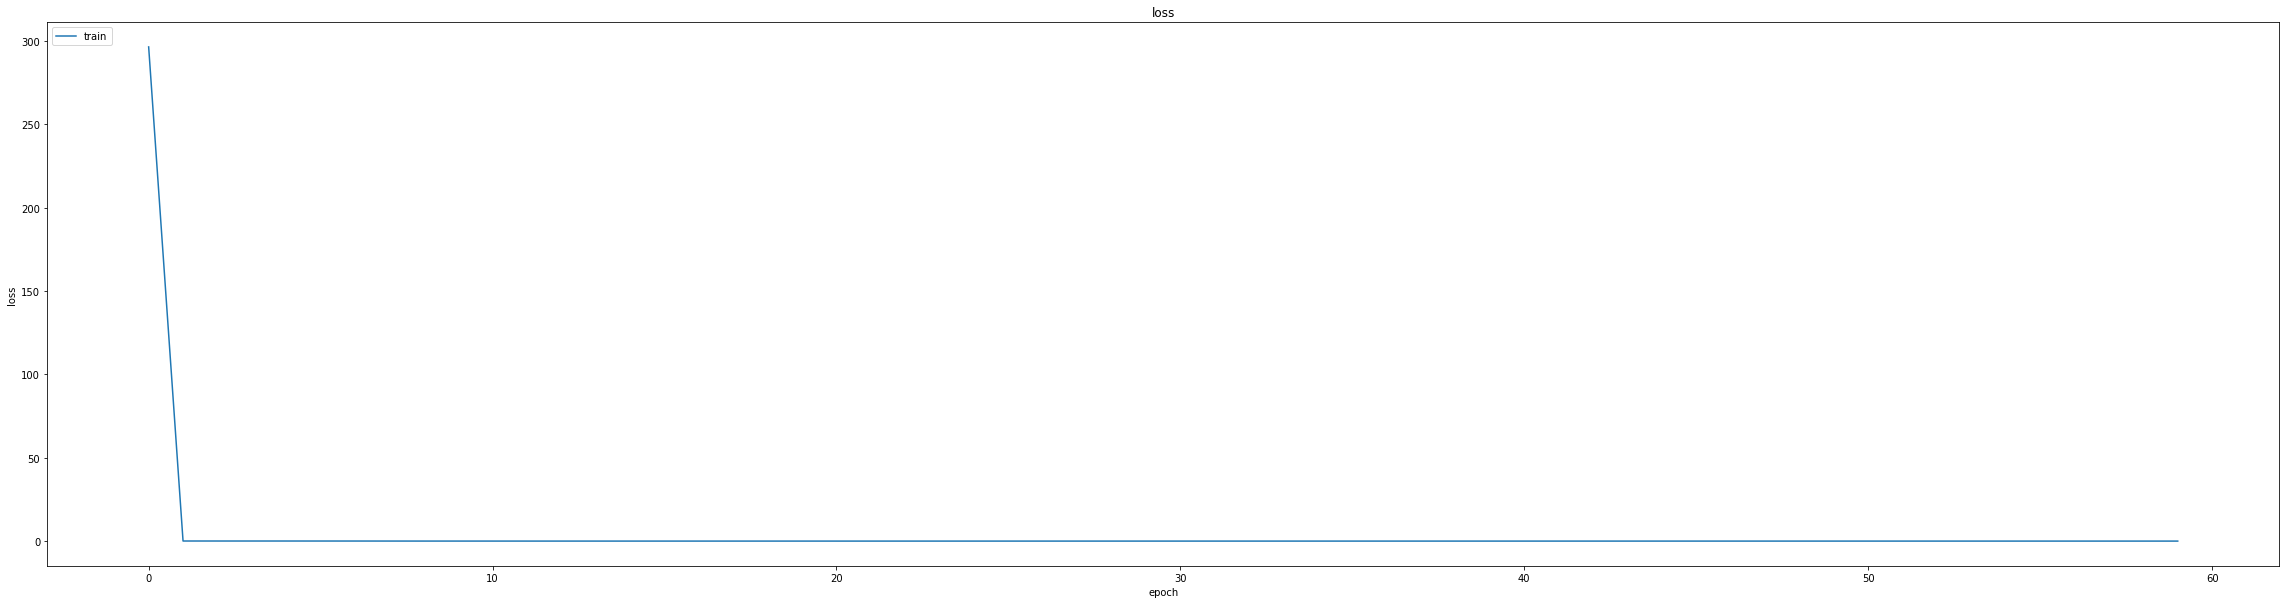

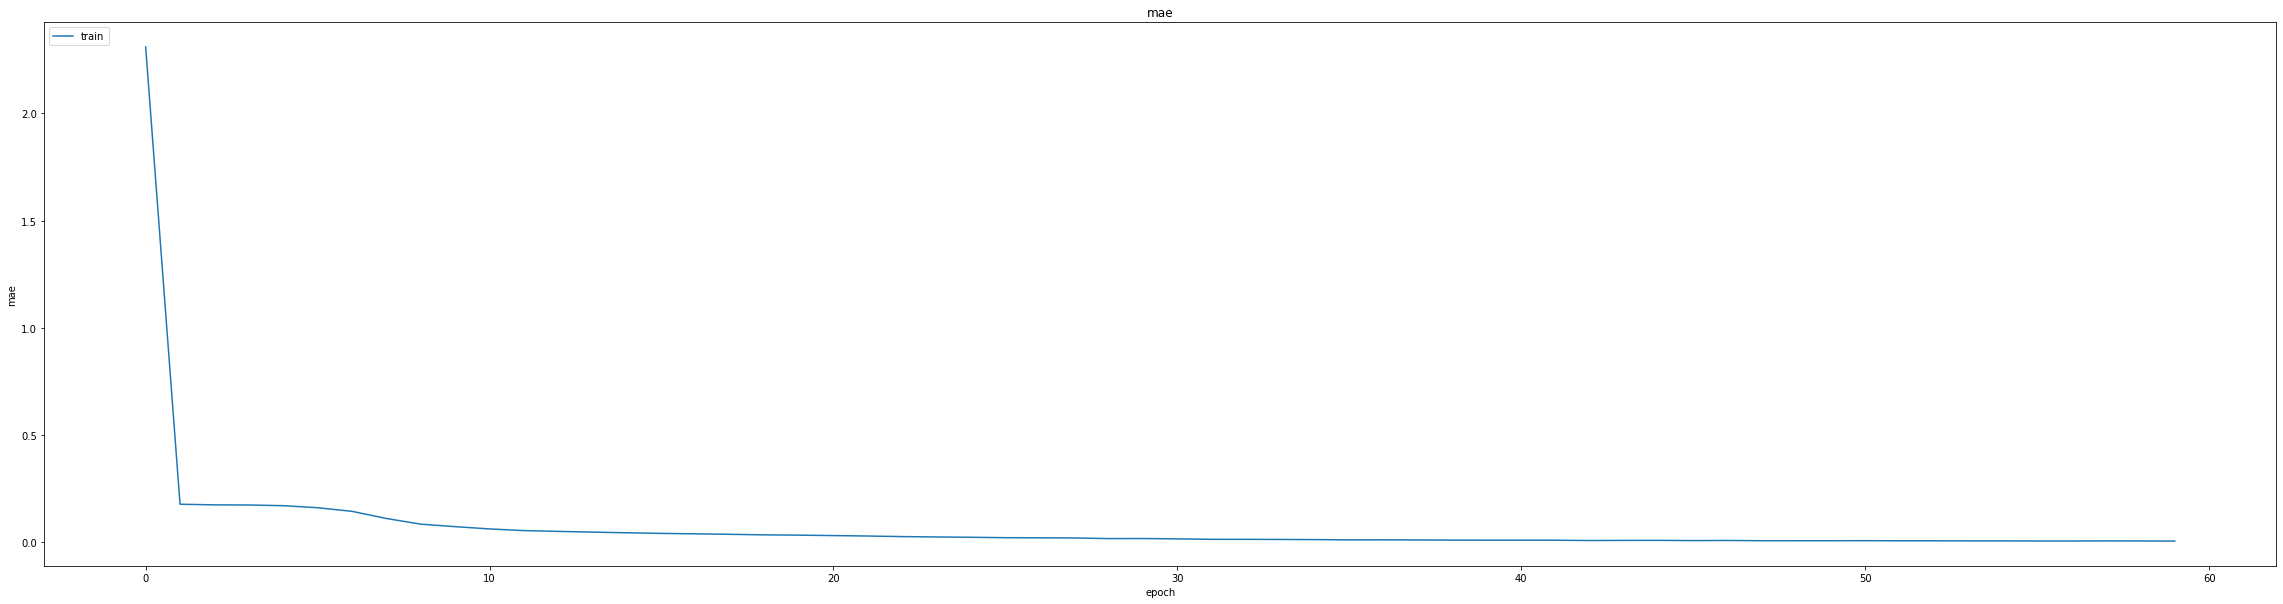

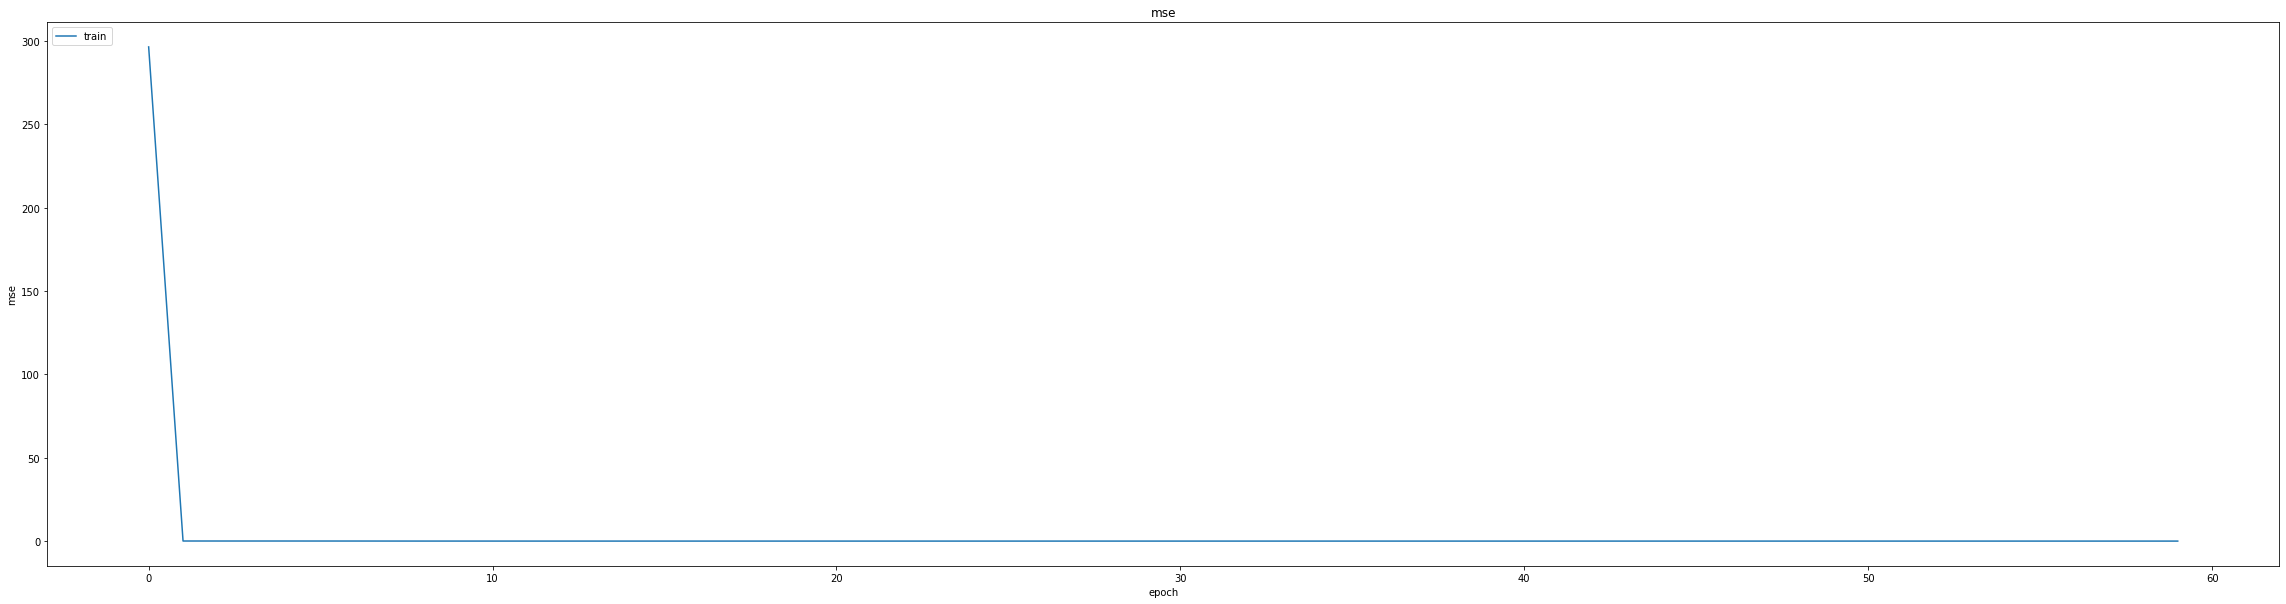

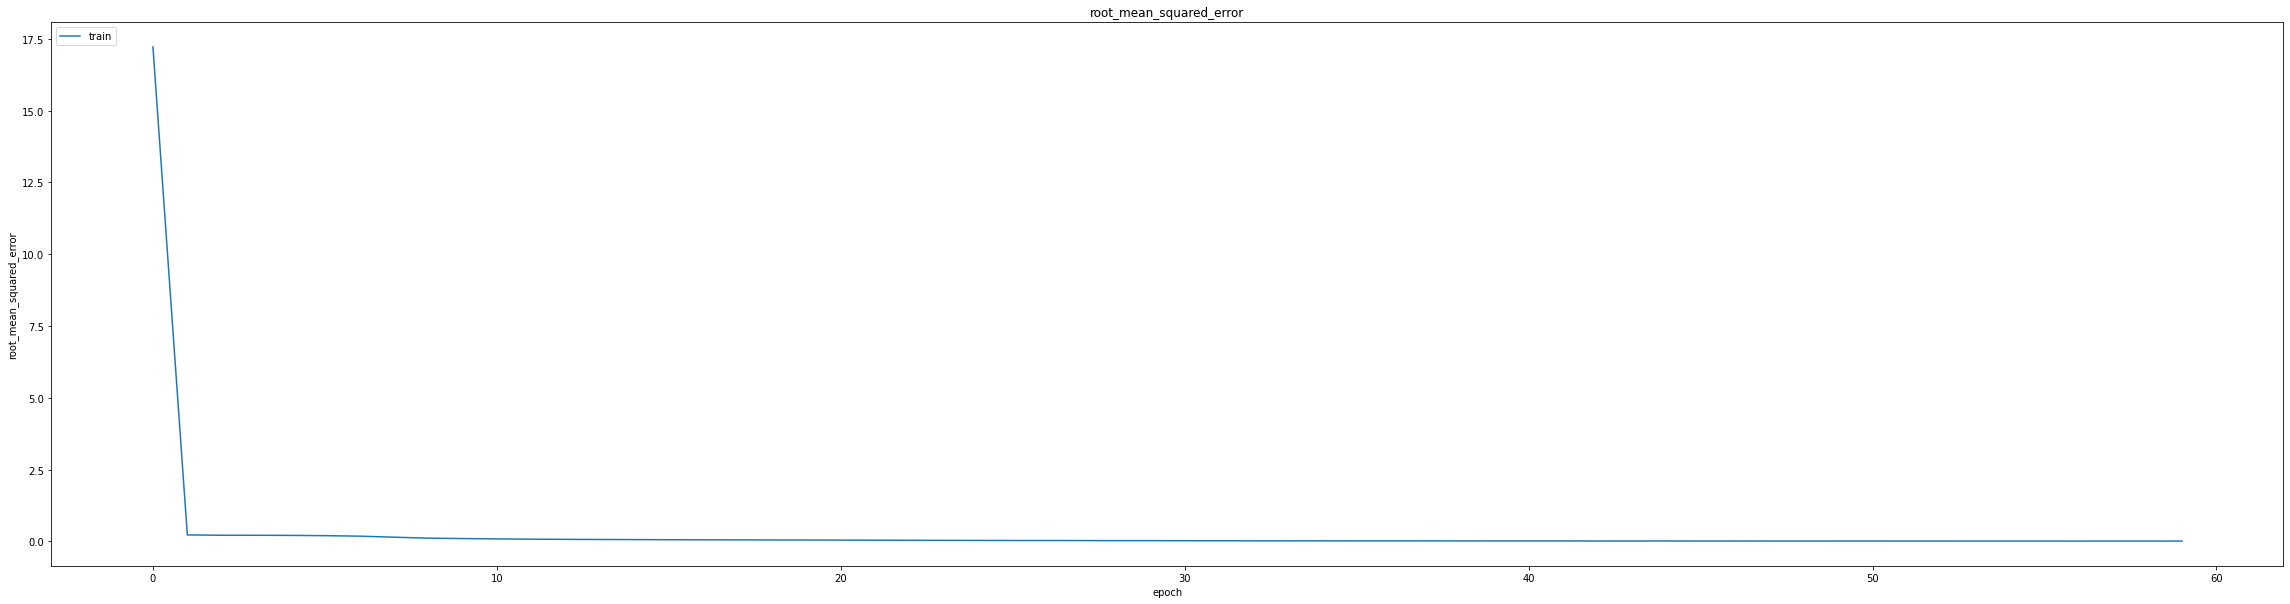

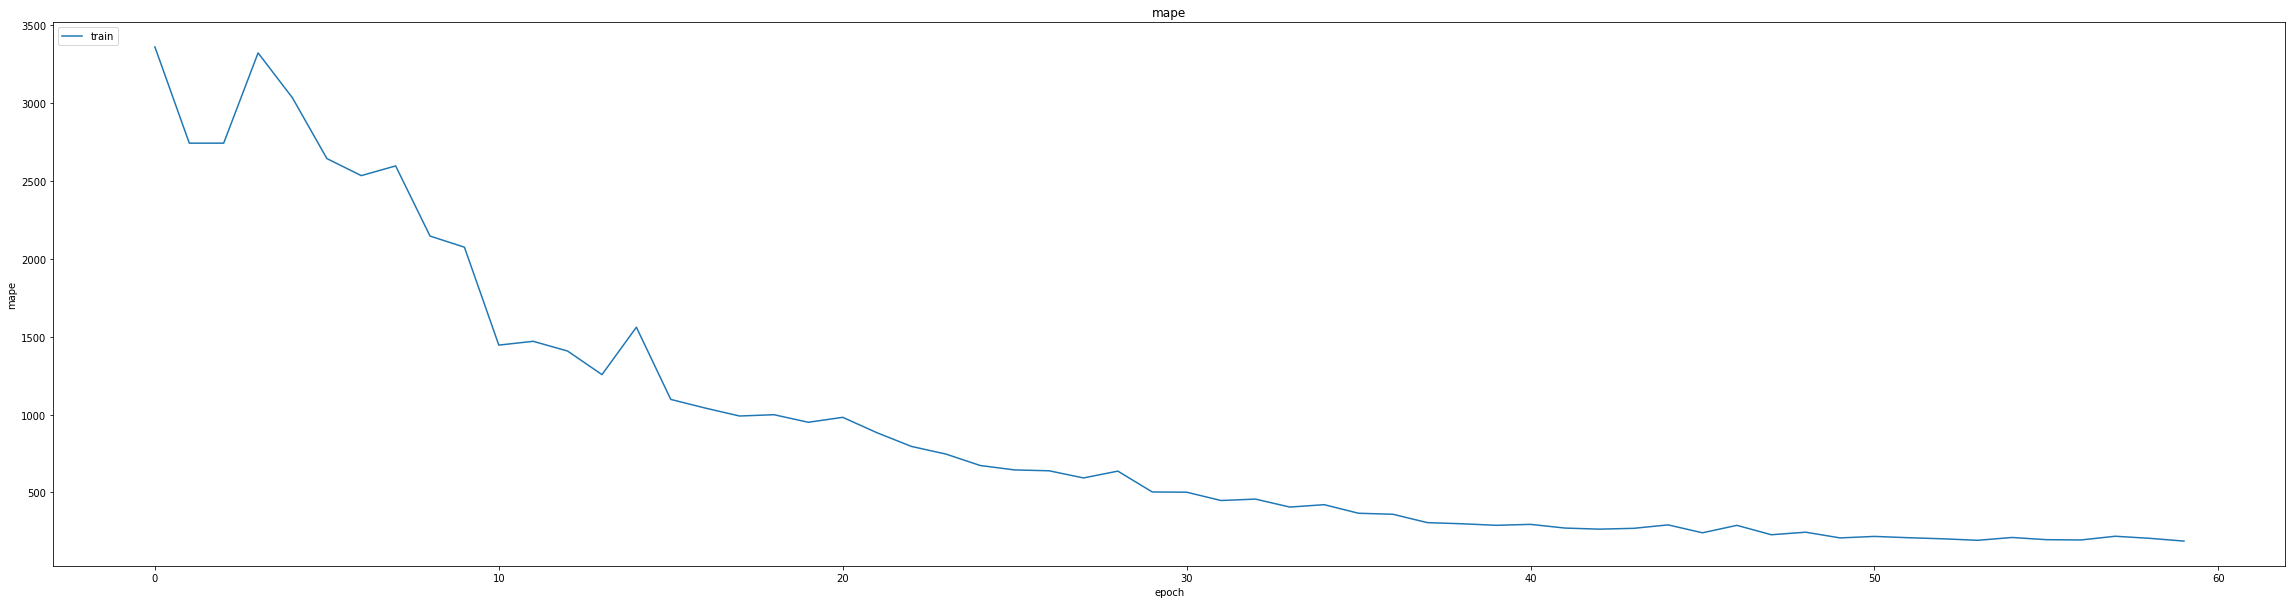

In [32]:
thesis.SummarizeHistory(history)

In [33]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0075204456225037575
0.010389686562120914
1391/1391 [==============================] - 6s 4ms/step
0.994824450424637


In [34]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [35]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
344/347 [============================>.] - ETA: 0s - loss: 7.9348e-04 - mae: 0.0115 - mse: 7.9348e-04 - root_mean_squared_error: 0.0282 - mape: 249.0857
Epoch 1: val_mse did not improve from 0.00011
347/347 [==============================] - 12s 20ms/step - loss: 7.8718e-04 - mae: 0.0114 - mse: 7.8718e-04 - root_mean_squared_error: 0.0281 - mape: 247.0202 - val_loss: 1.0978e-04 - val_mae: 0.0077 - val_mse: 1.0978e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 753.9362 - lr: 0.0010
Epoch 2/20
346/347 [============================>.] - ETA: 0s - loss: 3.5976e-05 - mae: 0.0046 - mse: 3.5976e-05 - root_mean_squared_error: 0.0060 - mape: 175.5193
Epoch 2: val_mse improved from 0.00011 to 0.00010, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 52ms/step - loss: 3.5955e-05 - mae: 0.0046 - mse: 3.5955e-05 - root_mean_squared_error: 0.0060 - mape: 175.0602 - val_loss: 1.0422e-04 - val_mae: 0.0075 - val_mse: 1.0422e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 807.6498 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
344/347 [============================>.] - ETA: 0s - loss: 3.3039e-05 - mae: 0.0044 - mse: 3.3039e-05 - root_mean_squared_error: 0.0057 - mape: 177.3786
Epoch 3: val_mse did not improve from 0.00010
347/347 [==============================] - 6s 18ms/step - loss: 3.3026e-05 - mae: 0.0044 - mse: 3.3026e-05 - root_mean_squared_error: 0.0057 - mape: 175.9084 - val_loss: 1.0982e-04 - val_mae: 0.0078 - val_mse: 1.0982e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 762.2339 - lr: 9.0000e-04
Epoch 4/20
346/347 [============================>.] - ETA: 0s - loss: 3.7462e-05 - mae: 0.0047 - mse: 3.7462e-05 - root_mean_squared_error: 0.0061 - mape: 140.5032

347/347 [==============================] - 20s 57ms/step - loss: 4.2207e-05 - mae: 0.0049 - mse: 4.2207e-05 - root_mean_squared_error: 0.0065 - mape: 130.2152 - val_loss: 9.7010e-05 - val_mae: 0.0071 - val_mse: 9.7010e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 841.6459 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
346/347 [============================>.] - ETA: 0s - loss: 3.8982e-05 - mae: 0.0047 - mse: 3.8982e-05 - root_mean_squared_error: 0.0062 - mape: 140.1987
Epoch 7: val_mse did not improve from 0.00010
347/347 [==============================] - 8s 22ms/step - loss: 3.8959e-05 - mae: 0.0047 - mse: 3.8959e-05 - root_mean_squared_error: 0.0062 - mape: 139.8341 - val_loss: 1.1038e-04 - val_mae: 0.0078 - val_mse: 1.1038e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 830.1412 - lr: 7.2900e-04
Epoch 8/20
345/347 [============================>.] - ETA: 0s - loss: 4.4888e-05 - mae: 0.0051 - mse: 4.4888e-05 - root_mean_squared_error: 0.0067 - mape: 115.

347/347 [==============================] - 18s 51ms/step - loss: 3.6195e-05 - mae: 0.0046 - mse: 3.6195e-05 - root_mean_squared_error: 0.0060 - mape: 111.3588 - val_loss: 9.1069e-05 - val_mae: 0.0070 - val_mse: 9.1069e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 835.4218 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
344/347 [============================>.] - ETA: 0s - loss: 2.7409e-05 - mae: 0.0039 - mse: 2.7409e-05 - root_mean_squared_error: 0.0052 - mape: 109.5066
Epoch 13: val_mse did not improve from 0.00009
347/347 [==============================] - 7s 19ms/step - loss: 2.7566e-05 - mae: 0.0040 - mse: 2.7566e-05 - root_mean_squared_error: 0.0053 - mape: 108.6065 - val_loss: 1.2192e-04 - val_mae: 0.0085 - val_mse: 1.2192e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 836.6359 - lr: 5.3144e-04
Epoch 14/20
347/347 [==============================] - ETA: 0s - loss: 2.3370e-05 - mae: 0.0037 - mse: 2.3370e-05 - root_mean_squared_error: 0.0048 - mape: 1

347/347 [==============================] - 18s 53ms/step - loss: 2.1632e-05 - mae: 0.0035 - mse: 2.1632e-05 - root_mean_squared_error: 0.0047 - mape: 111.9785 - val_loss: 8.8537e-05 - val_mae: 0.0070 - val_mse: 8.8537e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 765.1516 - lr: 4.7830e-04
Epoch 16/20
345/347 [============================>.] - ETA: 0s - loss: 2.3652e-05 - mae: 0.0037 - mse: 2.3652e-05 - root_mean_squared_error: 0.0049 - mape: 97.9992
Epoch 16: val_mse did not improve from 0.00009
347/347 [==============================] - 6s 18ms/step - loss: 2.3629e-05 - mae: 0.0037 - mse: 2.3629e-05 - root_mean_squared_error: 0.0049 - mape: 97.4683 - val_loss: 1.3783e-04 - val_mae: 0.0093 - val_mse: 1.3783e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 777.4297 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
345/347 [============================>.] - ETA: 0s - loss: 2.1232e-05 - mae: 0.0035 - mse: 2.1232e-05 - root_mean_squared_error: 0.0046 - mape: 105

347/347 [==============================] - 17s 48ms/step - loss: 2.1524e-05 - mae: 0.0035 - mse: 2.1524e-05 - root_mean_squared_error: 0.0046 - mape: 96.5572 - val_loss: 8.2660e-05 - val_mae: 0.0067 - val_mse: 8.2660e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 757.5044 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/20
344/347 [============================>.] - ETA: 0s - loss: 1.6449e-05 - mae: 0.0031 - mse: 1.6449e-05 - root_mean_squared_error: 0.0041 - mape: 99.7080 
Epoch 19: val_mse did not improve from 0.00008
347/347 [==============================] - 6s 18ms/step - loss: 1.6407e-05 - mae: 0.0031 - mse: 1.6407e-05 - root_mean_squared_error: 0.0041 - mape: 98.8798 - val_loss: 9.5258e-05 - val_mae: 0.0075 - val_mse: 9.5258e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 743.9791 - lr: 3.8742e-04
Epoch 20/20
345/347 [============================>.] - ETA: 0s - loss: 2.0264e-05 - mae: 0.0034 - mse: 2.0264e-05 - root_mean_squared_error: 0.0045 - mape: 10

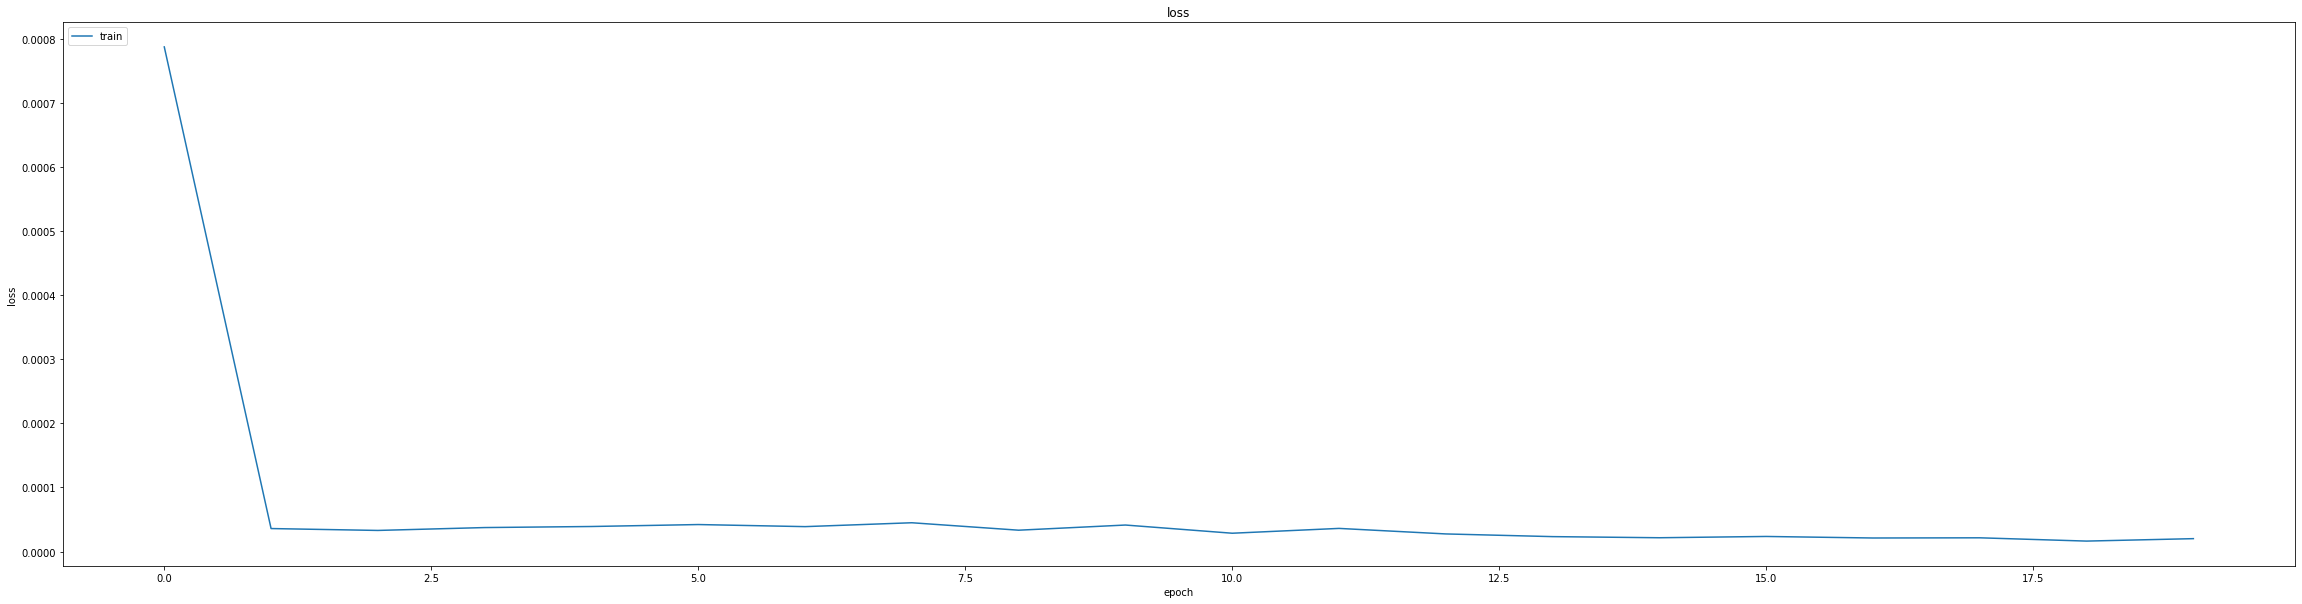

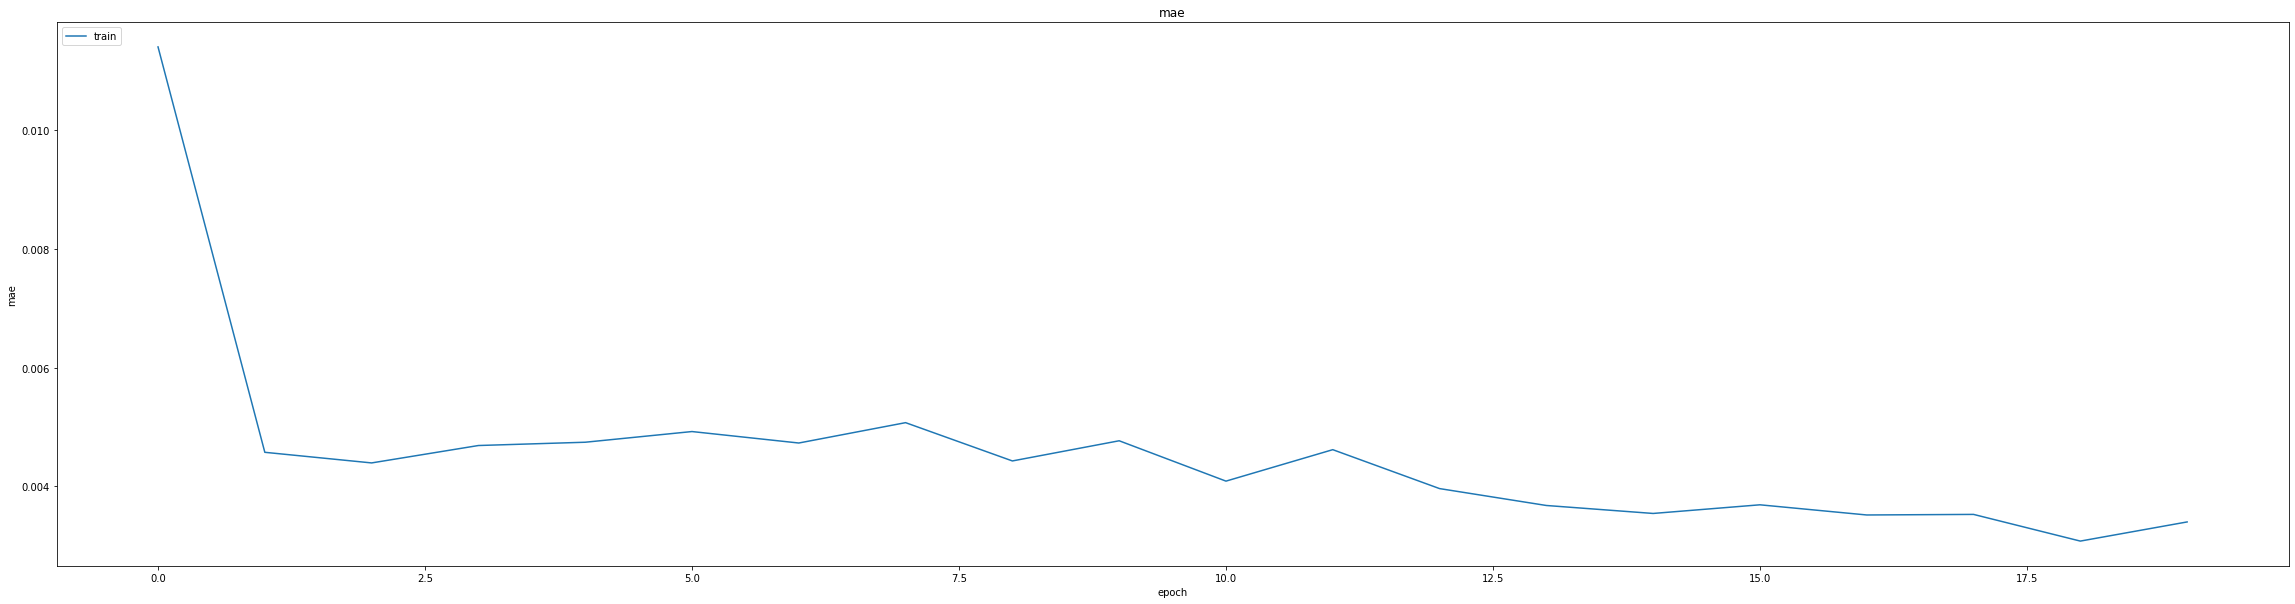

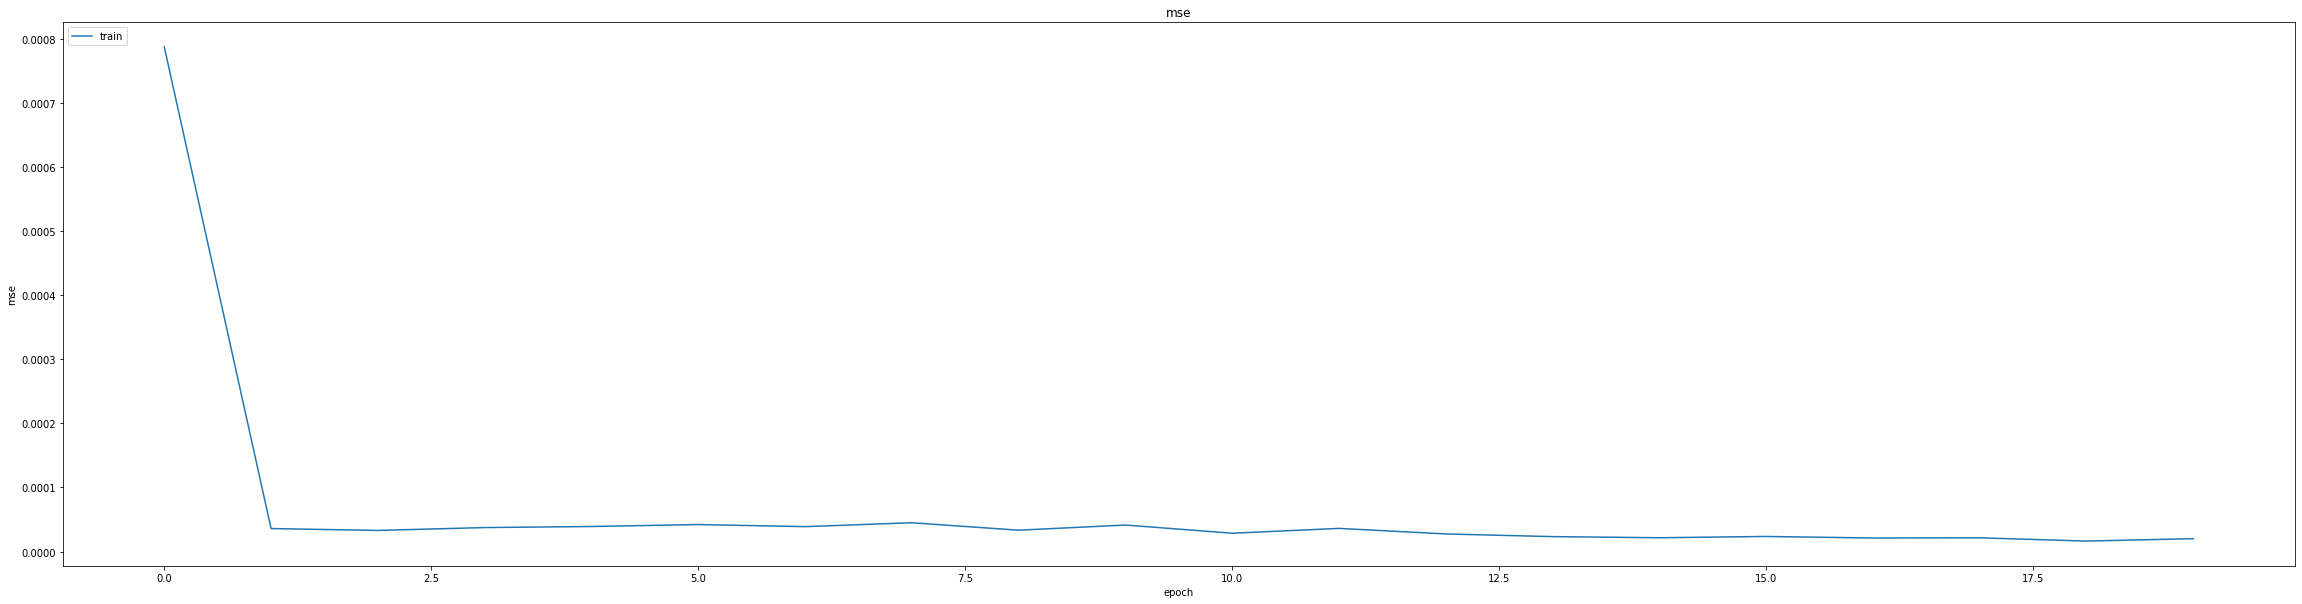

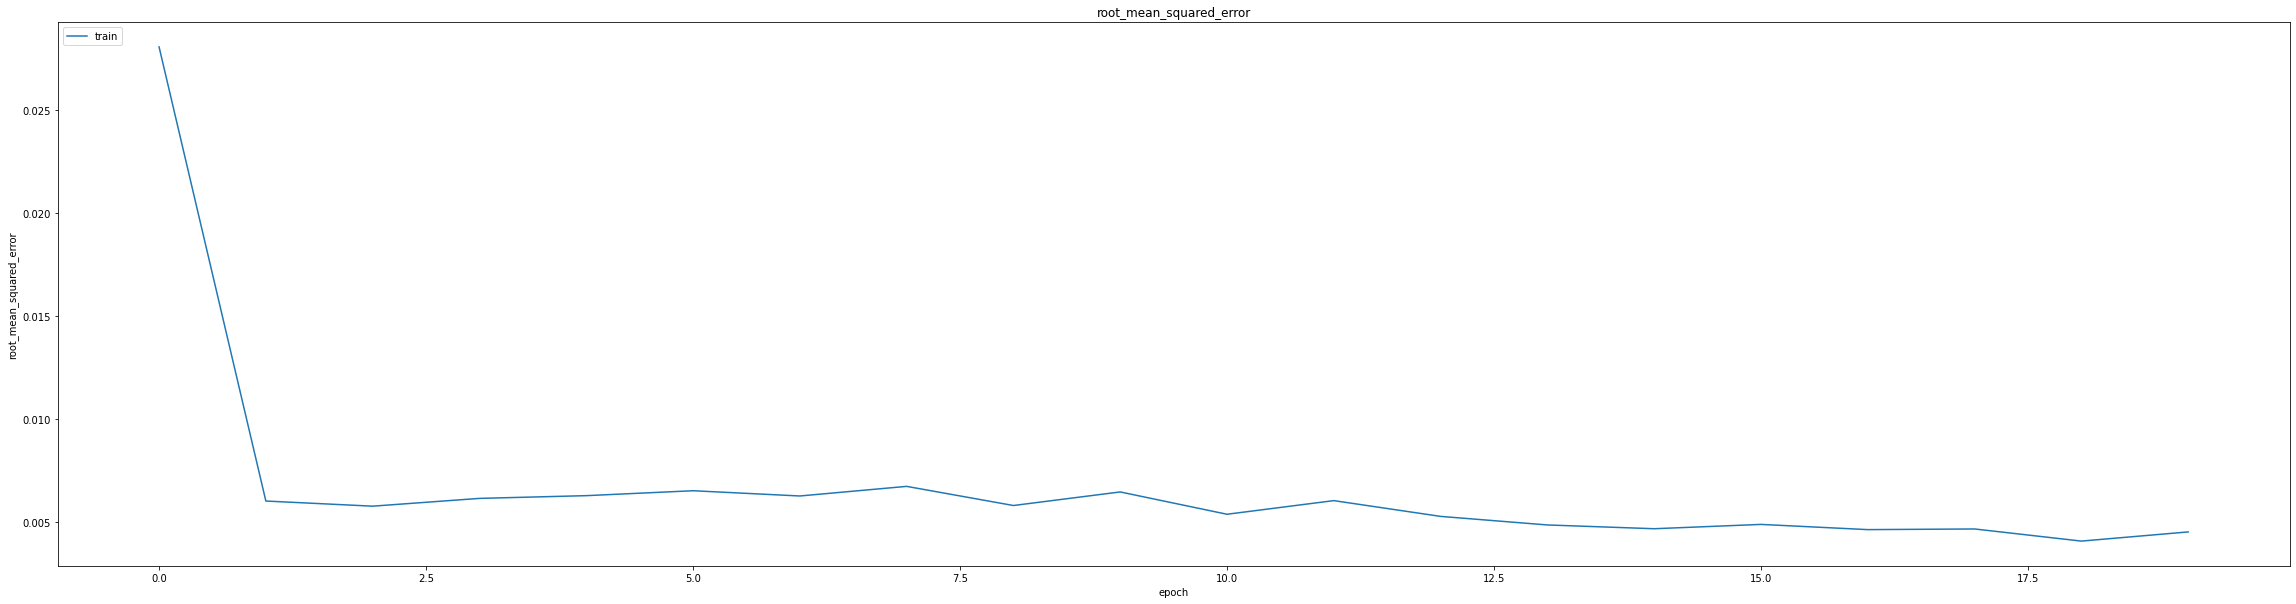

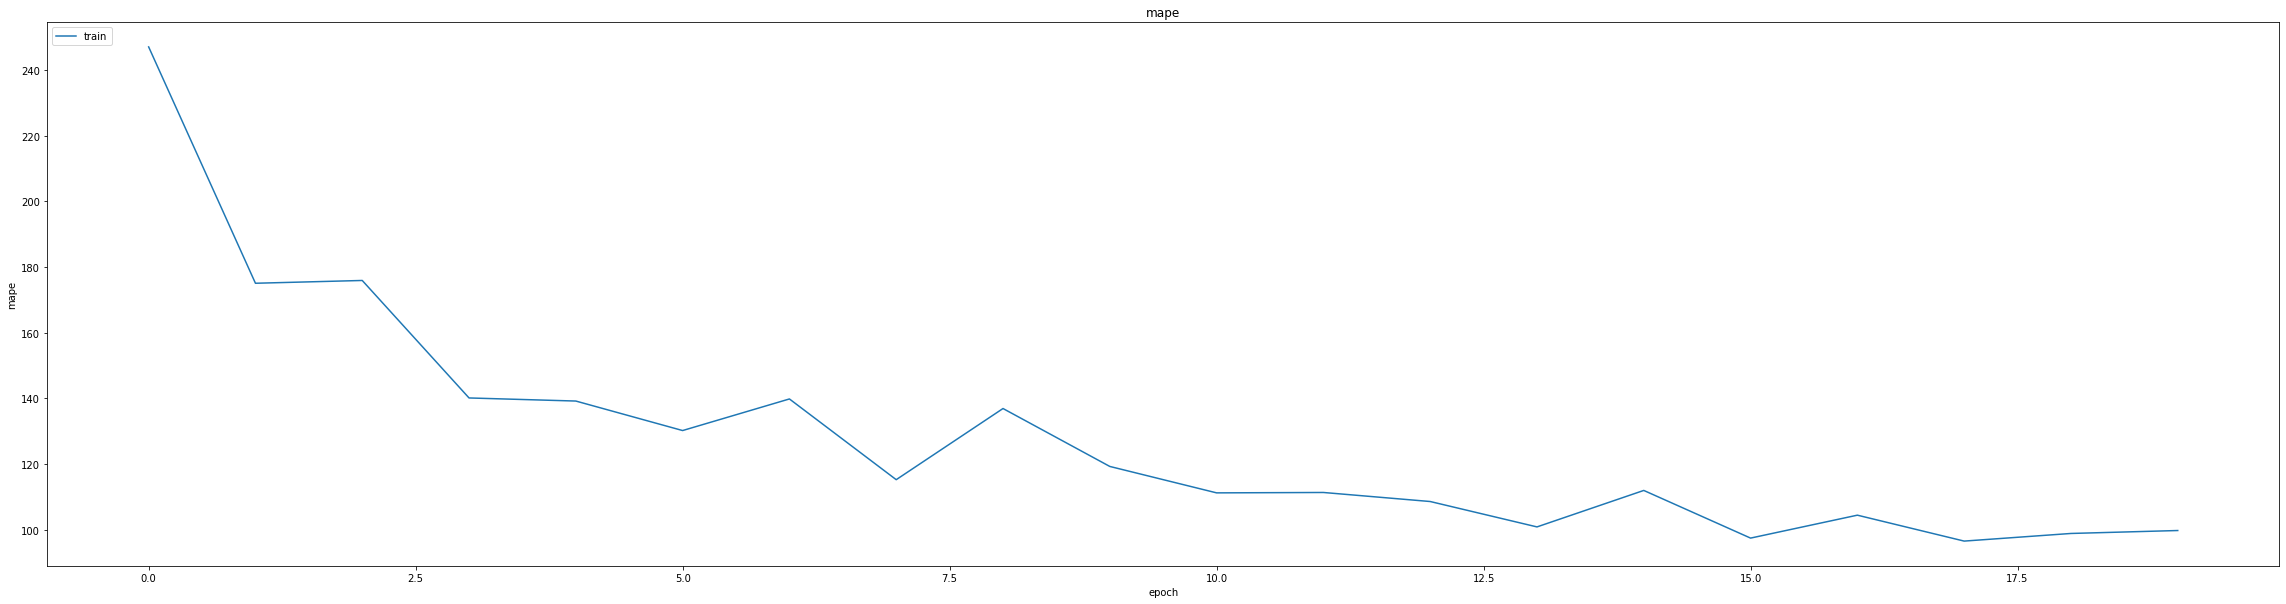

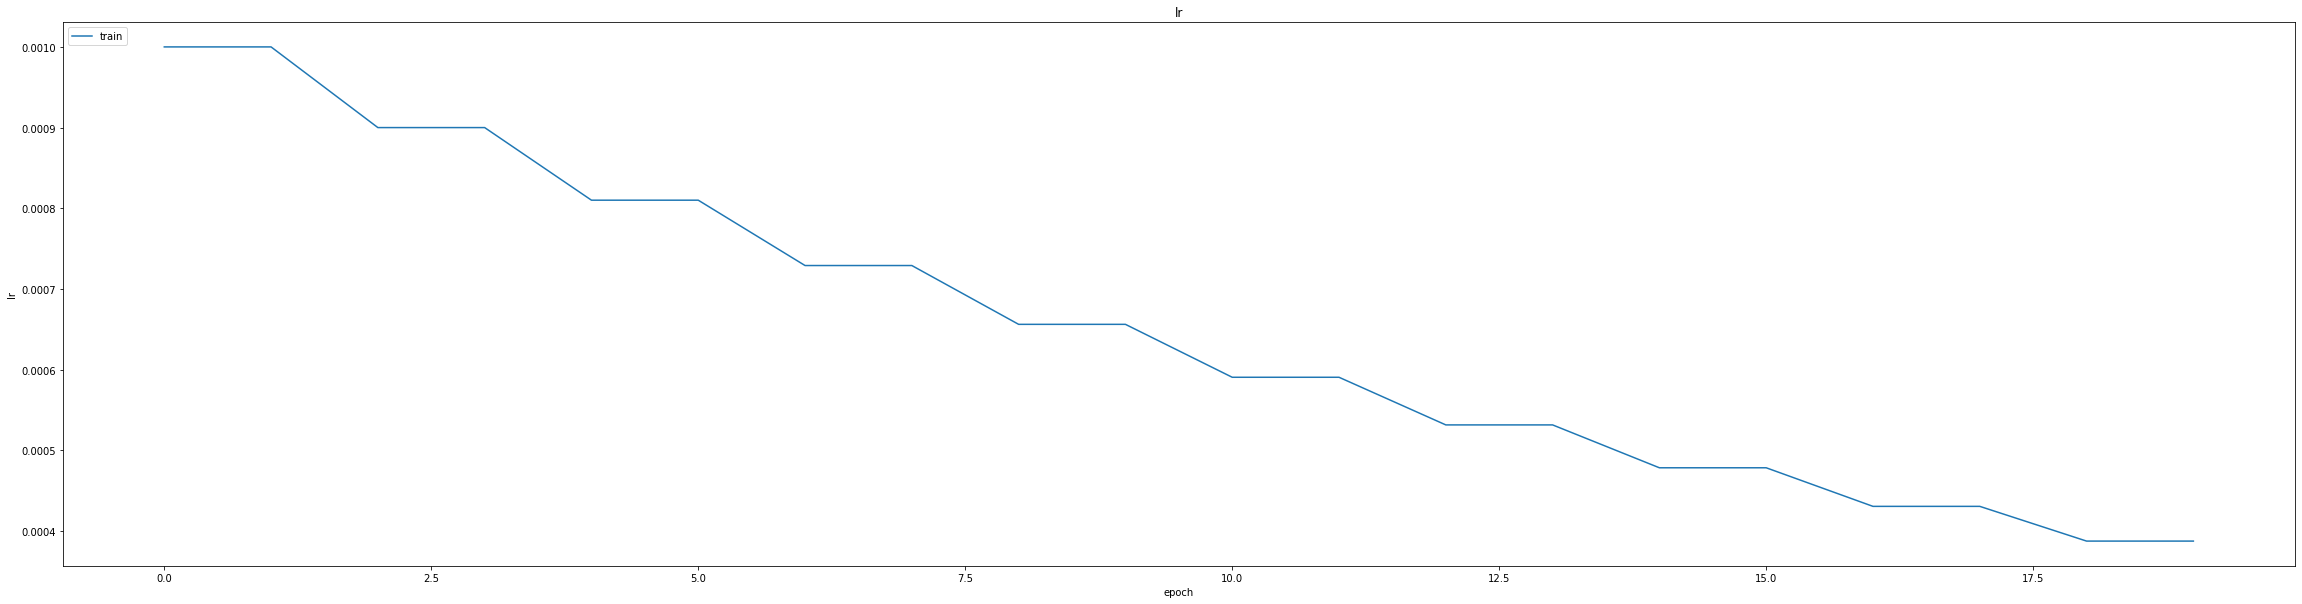

In [36]:
thesis.SummarizeHistory(history)

In [37]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006708512548357248
0.00909174233675003
1391/1391 [==============================] - 7s 4ms/step
0.9978423438453206


1391/1391 [==============================] - 5s 4ms/step


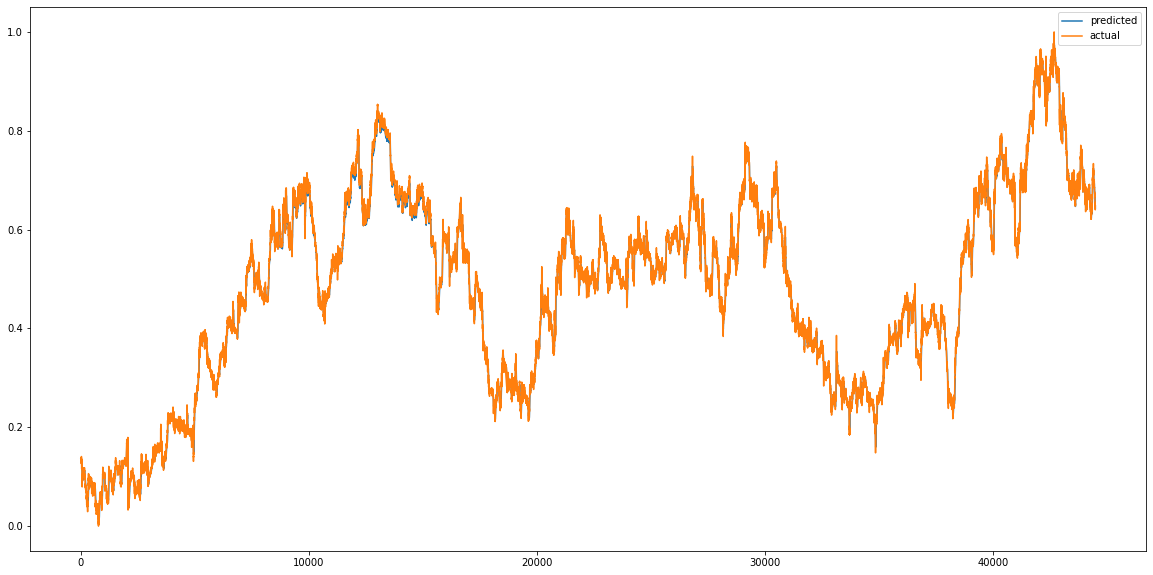

In [38]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


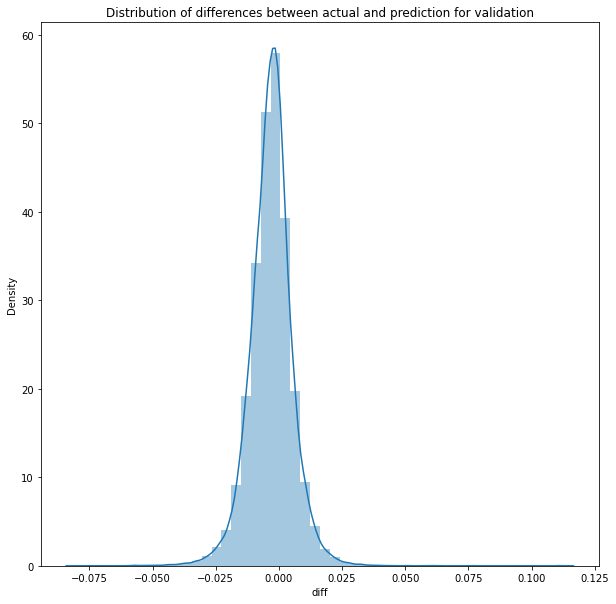

In [39]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 5s 4ms/step


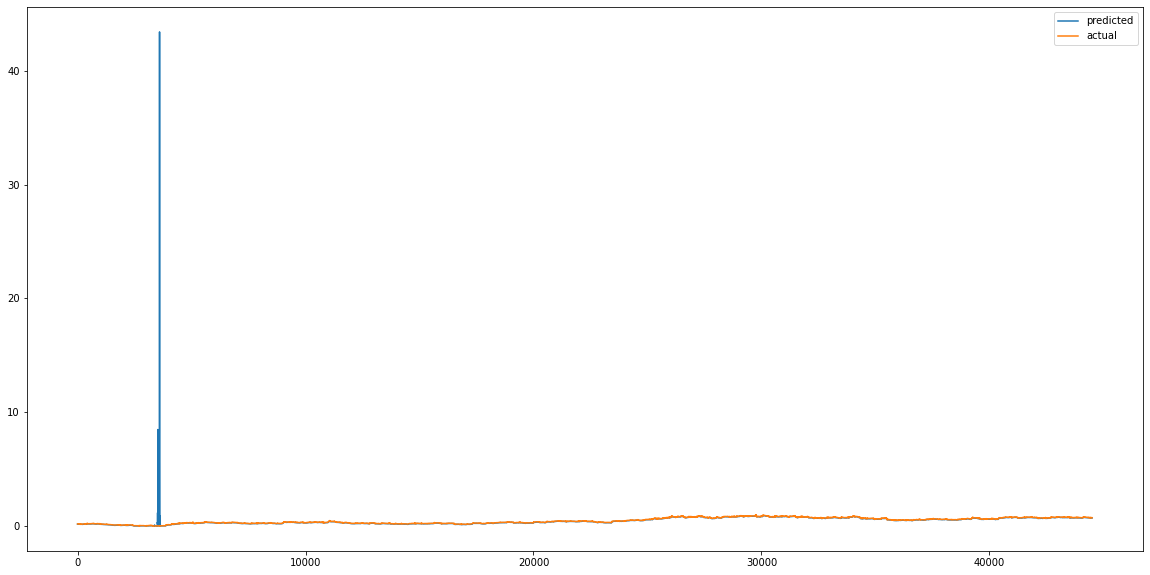

In [40]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


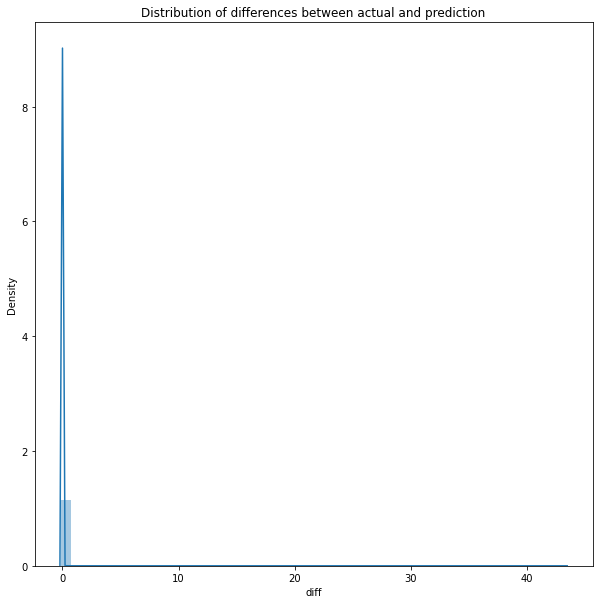

In [41]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.07403672697237158
RMSE :  0.27209690731864555
MAE :  0.028994459607132643
1391/1391 [==============================] - 5s 4ms/step
R2_Score  : -0.17773415177657426


count    44506.000000
mean        -0.023038
std          0.271123
min         -0.124720
25%         -0.029780
50%         -0.025917
75%         -0.022580
max         43.405616
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [43]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [44]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/347 [==============================] - ETA: 0s - loss: 403.3417 - mae: 3.0977 - mse: 403.3417 - root_mean_squared_error: 20.0834 - mape: 11577.7783
Epoch 1: val_mse improved from inf to 0.07232, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 39s 87ms/step - loss: 403.3417 - mae: 3.0977 - mse: 403.3417 - root_mean_squared_error: 20.0834 - mape: 11577.7783 - val_loss: 0.0723 - val_mae: 0.2269 - val_mse: 0.0723 - val_root_mean_squared_error: 0.2689 - val_mape: 6972.0703
Epoch 2/60
347/347 [==============================] - ETA: 0s - loss: 0.0399 - mae: 0.1478 - mse: 0.0399 - root_mean_squared_error: 0.1998 - mape: 2009.8163
Epoch 2: val_mse improved from 0.07232 to 0.05118, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 85ms/step - loss: 0.0399 - mae: 0.1478 - mse: 0.0399 - root_mean_squared_error: 0.1998 - mape: 2009.8163 - val_loss: 0.0512 - val_mae: 0.1775 - val_mse: 0.0512 - val_root_mean_squared_error: 0.2262 - val_mape: 3495.3650
Epoch 3/60
346/347 [============================>.] - ETA: 0s - loss: 0.0244 - mae: 0.0999 - mse: 0.0244 - root_mean_squared_error: 0.1562 - mape: 1221.0837
Epoch 3: val_mse improved from 0.05118 to 0.02887, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 85ms/step - loss: 0.0244 - mae: 0.0998 - mse: 0.0244 - root_mean_squared_error: 0.1561 - mape: 1217.9601 - val_loss: 0.0289 - val_mae: 0.1215 - val_mse: 0.0289 - val_root_mean_squared_error: 0.1699 - val_mape: 3258.5974
Epoch 4/60
345/347 [============================>.] - ETA: 0s - loss: 0.0133 - mae: 0.0668 - mse: 0.0133 - root_mean_squared_error: 0.1155 - mape: 1113.3049
Epoch 4: val_mse improved from 0.02887 to 0.01341, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 0.0133 - mae: 0.0667 - mse: 0.0133 - root_mean_squared_error: 0.1154 - mape: 1107.3389 - val_loss: 0.0134 - val_mae: 0.0752 - val_mse: 0.0134 - val_root_mean_squared_error: 0.1158 - val_mape: 3232.8423
Epoch 5/60
346/347 [============================>.] - ETA: 0s - loss: 0.0067 - mae: 0.0469 - mse: 0.0067 - root_mean_squared_error: 0.0821 - mape: 1134.3425
Epoch 5: val_mse improved from 0.01341 to 0.00562, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 0.0067 - mae: 0.0468 - mse: 0.0067 - root_mean_squared_error: 0.0820 - mape: 1131.4049 - val_loss: 0.0056 - val_mae: 0.0450 - val_mse: 0.0056 - val_root_mean_squared_error: 0.0750 - val_mape: 3232.8291
Epoch 6/60
345/347 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0350 - mse: 0.0034 - root_mean_squared_error: 0.0584 - mape: 1219.1234
Epoch 6: val_mse improved from 0.00562 to 0.00280, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 0.0034 - mae: 0.0350 - mse: 0.0034 - root_mean_squared_error: 0.0583 - mape: 1212.5471 - val_loss: 0.0028 - val_mae: 0.0318 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0529 - val_mape: 3179.6699
Epoch 7/60
346/347 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0284 - mse: 0.0021 - root_mean_squared_error: 0.0457 - mape: 1124.6234
Epoch 7: val_mse improved from 0.00280 to 0.00197, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 85ms/step - loss: 0.0021 - mae: 0.0284 - mse: 0.0021 - root_mean_squared_error: 0.0457 - mape: 1121.7185 - val_loss: 0.0020 - val_mae: 0.0295 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0444 - val_mape: 3065.5996
Epoch 8/60
346/347 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0256 - mse: 0.0016 - root_mean_squared_error: 0.0403 - mape: 1055.6912
Epoch 8: val_mse improved from 0.00197 to 0.00152, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 0.0016 - mae: 0.0256 - mse: 0.0016 - root_mean_squared_error: 0.0403 - mape: 1052.9596 - val_loss: 0.0015 - val_mae: 0.0261 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0390 - val_mape: 2933.1741
Epoch 9/60
347/347 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0243 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 1047.5481
Epoch 9: val_mse improved from 0.00152 to 0.00132, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 82ms/step - loss: 0.0014 - mae: 0.0243 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 1047.5481 - val_loss: 0.0013 - val_mae: 0.0252 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0363 - val_mape: 2822.8418
Epoch 10/60
346/347 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0235 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 1035.7759
Epoch 10: val_mse improved from 0.00132 to 0.00115, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 0.0013 - mae: 0.0235 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 1033.0909 - val_loss: 0.0011 - val_mae: 0.0238 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0339 - val_mape: 2707.6868
Epoch 11/60
346/347 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0228 - mse: 0.0012 - root_mean_squared_error: 0.0343 - mape: 985.8024
Epoch 11: val_mse improved from 0.00115 to 0.00098, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 28s 82ms/step - loss: 0.0012 - mae: 0.0228 - mse: 0.0012 - root_mean_squared_error: 0.0343 - mape: 983.2368 - val_loss: 9.8228e-04 - val_mae: 0.0229 - val_mse: 9.8228e-04 - val_root_mean_squared_error: 0.0313 - val_mape: 2606.4158
Epoch 12/60
346/347 [============================>.] - ETA: 0s - loss: 9.9144e-04 - mae: 0.0213 - mse: 9.9144e-04 - root_mean_squared_error: 0.0315 - mape: 902.2508
Epoch 12: val_mse improved from 0.00098 to 0.00059, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 9.9114e-04 - mae: 0.0213 - mse: 9.9114e-04 - root_mean_squared_error: 0.0315 - mape: 899.9232 - val_loss: 5.9091e-04 - val_mae: 0.0182 - val_mse: 5.9091e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 2464.3518
Epoch 13/60
346/347 [============================>.] - ETA: 0s - loss: 8.3646e-04 - mae: 0.0196 - mse: 8.3646e-04 - root_mean_squared_error: 0.0289 - mape: 822.5890
Epoch 13: val_mse improved from 0.00059 to 0.00050, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 86ms/step - loss: 8.3609e-04 - mae: 0.0196 - mse: 8.3609e-04 - root_mean_squared_error: 0.0289 - mape: 820.4734 - val_loss: 5.0243e-04 - val_mae: 0.0168 - val_mse: 5.0243e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 2338.5259
Epoch 14/60
347/347 [==============================] - ETA: 0s - loss: 7.3482e-04 - mae: 0.0183 - mse: 7.3482e-04 - root_mean_squared_error: 0.0271 - mape: 817.8442
Epoch 14: val_mse improved from 0.00050 to 0.00048, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 28s 82ms/step - loss: 7.3482e-04 - mae: 0.0183 - mse: 7.3482e-04 - root_mean_squared_error: 0.0271 - mape: 817.8442 - val_loss: 4.7580e-04 - val_mae: 0.0167 - val_mse: 4.7580e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 2225.5803
Epoch 15/60
346/347 [============================>.] - ETA: 0s - loss: 6.5259e-04 - mae: 0.0173 - mse: 6.5259e-04 - root_mean_squared_error: 0.0255 - mape: 741.3403
Epoch 15: val_mse improved from 0.00048 to 0.00046, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 6.5244e-04 - mae: 0.0173 - mse: 6.5244e-04 - root_mean_squared_error: 0.0255 - mape: 739.4248 - val_loss: 4.5505e-04 - val_mae: 0.0162 - val_mse: 4.5505e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 2125.7009
Epoch 16/60
346/347 [============================>.] - ETA: 0s - loss: 5.8564e-04 - mae: 0.0165 - mse: 5.8564e-04 - root_mean_squared_error: 0.0242 - mape: 728.7888
Epoch 16: val_mse did not improve from 0.00046
347/347 [==============================] - 7s 20ms/step - loss: 5.8555e-04 - mae: 0.0165 - mse: 5.8555e-04 - root_mean_squared_error: 0.0242 - mape: 726.9170 - val_loss: 4.6765e-04 - val_mae: 0.0168 - val_mse: 4.6765e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 2028.3651
Epoch 17/60
345/347 [============================>.] - ETA: 0s - loss: 5.2795e-04 - mae: 0.0158 - mse: 5.2795e-04 - root_mean_squared_error: 0.0230 - mape: 717.7947
Epoch 17: val_mse improved from 0.00046 to 0.00039, saving m

347/347 [==============================] - 28s 82ms/step - loss: 5.2766e-04 - mae: 0.0158 - mse: 5.2766e-04 - root_mean_squared_error: 0.0230 - mape: 713.9349 - val_loss: 3.9421e-04 - val_mae: 0.0153 - val_mse: 3.9421e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 1938.4420
Epoch 18/60
347/347 [==============================] - ETA: 0s - loss: 4.7620e-04 - mae: 0.0151 - mse: 4.7620e-04 - root_mean_squared_error: 0.0218 - mape: 723.1545
Epoch 18: val_mse improved from 0.00039 to 0.00037, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 4.7620e-04 - mae: 0.0151 - mse: 4.7620e-04 - root_mean_squared_error: 0.0218 - mape: 723.1545 - val_loss: 3.7454e-04 - val_mae: 0.0147 - val_mse: 3.7454e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 1852.5902
Epoch 19/60
345/347 [============================>.] - ETA: 0s - loss: 4.3422e-04 - mae: 0.0146 - mse: 4.3422e-04 - root_mean_squared_error: 0.0208 - mape: 659.0828
Epoch 19: val_mse improved from 0.00037 to 0.00031, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 4.3400e-04 - mae: 0.0146 - mse: 4.3400e-04 - root_mean_squared_error: 0.0208 - mape: 655.5124 - val_loss: 3.1250e-04 - val_mae: 0.0132 - val_mse: 3.1250e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 1772.3354
Epoch 20/60
346/347 [============================>.] - ETA: 0s - loss: 3.9911e-04 - mae: 0.0141 - mse: 3.9911e-04 - root_mean_squared_error: 0.0200 - mape: 615.5939
Epoch 20: val_mse did not improve from 0.00031
347/347 [==============================] - 7s 20ms/step - loss: 3.9906e-04 - mae: 0.0141 - mse: 3.9906e-04 - root_mean_squared_error: 0.0200 - mape: 614.0045 - val_loss: 3.5777e-04 - val_mae: 0.0143 - val_mse: 3.5777e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 1702.0697
Epoch 21/60
346/347 [============================>.] - ETA: 0s - loss: 3.6768e-04 - mae: 0.0136 - mse: 3.6768e-04 - root_mean_squared_error: 0.0192 - mape: 603.2204
Epoch 21: val_mse did not improve from 0.00031
347/347 [====

347/347 [==============================] - 29s 84ms/step - loss: 1.6633e-04 - mae: 0.0095 - mse: 1.6633e-04 - root_mean_squared_error: 0.0129 - mape: 375.7164 - val_loss: 3.0681e-04 - val_mae: 0.0130 - val_mse: 3.0681e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 1105.3099
Epoch 32/60
346/347 [============================>.] - ETA: 0s - loss: 1.5249e-04 - mae: 0.0091 - mse: 1.5249e-04 - root_mean_squared_error: 0.0123 - mape: 353.8942
Epoch 32: val_mse improved from 0.00031 to 0.00029, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 1.5247e-04 - mae: 0.0091 - mse: 1.5247e-04 - root_mean_squared_error: 0.0123 - mape: 352.9698 - val_loss: 2.9475e-04 - val_mae: 0.0127 - val_mse: 2.9475e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 1063.3768
Epoch 33/60
346/347 [============================>.] - ETA: 0s - loss: 1.4016e-04 - mae: 0.0088 - mse: 1.4016e-04 - root_mean_squared_error: 0.0118 - mape: 351.7137
Epoch 33: val_mse did not improve from 0.00029
347/347 [==============================] - 7s 20ms/step - loss: 1.4009e-04 - mae: 0.0088 - mse: 1.4009e-04 - root_mean_squared_error: 0.0118 - mape: 350.7969 - val_loss: 3.6151e-04 - val_mae: 0.0143 - val_mse: 3.6151e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 1012.8505
Epoch 34/60
347/347 [==============================] - ETA: 0s - loss: 1.2714e-04 - mae: 0.0084 - mse: 1.2714e-04 - root_mean_squared_error: 0.0113 - mape: 353.1997
Epoch 34: val_mse did not improve from 0.00029
347/347 [====

347/347 [==============================] - 29s 84ms/step - loss: 1.1648e-04 - mae: 0.0080 - mse: 1.1648e-04 - root_mean_squared_error: 0.0108 - mape: 339.3580 - val_loss: 2.7496e-04 - val_mae: 0.0122 - val_mse: 2.7496e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 963.0189
Epoch 36/60
346/347 [============================>.] - ETA: 0s - loss: 1.0655e-04 - mae: 0.0077 - mse: 1.0655e-04 - root_mean_squared_error: 0.0103 - mape: 325.6256
Epoch 36: val_mse did not improve from 0.00027
347/347 [==============================] - 7s 20ms/step - loss: 1.0654e-04 - mae: 0.0077 - mse: 1.0654e-04 - root_mean_squared_error: 0.0103 - mape: 324.7761 - val_loss: 3.3300e-04 - val_mae: 0.0136 - val_mse: 3.3300e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 921.1797
Epoch 37/60
346/347 [============================>.] - ETA: 0s - loss: 9.7843e-05 - mae: 0.0074 - mse: 9.7843e-05 - root_mean_squared_error: 0.0099 - mape: 290.7655
Epoch 37: val_mse did not improve from 0.00027
347/347 [======

347/347 [==============================] - 29s 83ms/step - loss: 8.2844e-05 - mae: 0.0068 - mse: 8.2844e-05 - root_mean_squared_error: 0.0091 - mape: 287.6777 - val_loss: 2.7312e-04 - val_mae: 0.0123 - val_mse: 2.7312e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 824.5060
Epoch 40/60
347/347 [==============================] - ETA: 0s - loss: 7.7818e-05 - mae: 0.0066 - mse: 7.7818e-05 - root_mean_squared_error: 0.0088 - mape: 297.1828
Epoch 40: val_mse did not improve from 0.00027
347/347 [==============================] - 7s 20ms/step - loss: 7.7818e-05 - mae: 0.0066 - mse: 7.7818e-05 - root_mean_squared_error: 0.0088 - mape: 297.1828 - val_loss: 2.7500e-04 - val_mae: 0.0124 - val_mse: 2.7500e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 803.7643
Epoch 41/60
346/347 [============================>.] - ETA: 0s - loss: 7.1866e-05 - mae: 0.0063 - mse: 7.1866e-05 - root_mean_squared_error: 0.0085 - mape: 270.0356
Epoch 41: val_mse did not improve from 0.00027
347/347 [======

347/347 [==============================] - 29s 84ms/step - loss: 5.8801e-05 - mae: 0.0057 - mse: 5.8801e-05 - root_mean_squared_error: 0.0077 - mape: 243.2836 - val_loss: 2.5816e-04 - val_mae: 0.0121 - val_mse: 2.5816e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 726.4319
Epoch 45/60
345/347 [============================>.] - ETA: 0s - loss: 5.6346e-05 - mae: 0.0056 - mse: 5.6346e-05 - root_mean_squared_error: 0.0075 - mape: 231.1592
Epoch 45: val_mse improved from 0.00026 to 0.00022, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 28s 82ms/step - loss: 5.6450e-05 - mae: 0.0056 - mse: 5.6450e-05 - root_mean_squared_error: 0.0075 - mape: 229.9052 - val_loss: 2.2357e-04 - val_mae: 0.0110 - val_mse: 2.2357e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 804.1577
Epoch 46/60
346/347 [============================>.] - ETA: 0s - loss: 5.2289e-05 - mae: 0.0054 - mse: 5.2289e-05 - root_mean_squared_error: 0.0072 - mape: 210.8786
Epoch 46: val_mse did not improve from 0.00022
347/347 [==============================] - 7s 20ms/step - loss: 5.2282e-05 - mae: 0.0054 - mse: 5.2282e-05 - root_mean_squared_error: 0.0072 - mape: 210.3279 - val_loss: 2.7637e-04 - val_mae: 0.0127 - val_mse: 2.7637e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 683.0755
Epoch 47/60
345/347 [============================>.] - ETA: 0s - loss: 4.8936e-05 - mae: 0.0052 - mse: 4.8936e-05 - root_mean_squared_error: 0.0070 - mape: 223.3706
Epoch 47: val_mse improved from 0.00022 to 0.00020, saving mod

347/347 [==============================] - 29s 85ms/step - loss: 4.8927e-05 - mae: 0.0052 - mse: 4.8927e-05 - root_mean_squared_error: 0.0070 - mape: 222.1500 - val_loss: 2.0147e-04 - val_mae: 0.0106 - val_mse: 2.0147e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 656.2484
Epoch 48/60
346/347 [============================>.] - ETA: 0s - loss: 4.4655e-05 - mae: 0.0050 - mse: 4.4655e-05 - root_mean_squared_error: 0.0067 - mape: 195.0891
Epoch 48: val_mse improved from 0.00020 to 0.00018, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 4.4641e-05 - mae: 0.0050 - mse: 4.4641e-05 - root_mean_squared_error: 0.0067 - mape: 194.5772 - val_loss: 1.8172e-04 - val_mae: 0.0095 - val_mse: 1.8172e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 648.1517
Epoch 49/60
346/347 [============================>.] - ETA: 0s - loss: 4.6295e-05 - mae: 0.0051 - mse: 4.6295e-05 - root_mean_squared_error: 0.0068 - mape: 191.5049
Epoch 49: val_mse did not improve from 0.00018
347/347 [==============================] - 7s 21ms/step - loss: 4.6291e-05 - mae: 0.0051 - mse: 4.6291e-05 - root_mean_squared_error: 0.0068 - mape: 191.0091 - val_loss: 2.3262e-04 - val_mae: 0.0115 - val_mse: 2.3262e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 616.3564
Epoch 50/60
346/347 [============================>.] - ETA: 0s - loss: 4.3364e-05 - mae: 0.0049 - mse: 4.3364e-05 - root_mean_squared_error: 0.0066 - mape: 184.1368
Epoch 50: val_mse did not improve from 0.00018
347/347 [======

347/347 [==============================] - 29s 84ms/step - loss: 3.8517e-05 - mae: 0.0046 - mse: 3.8517e-05 - root_mean_squared_error: 0.0062 - mape: 184.1990 - val_loss: 1.6346e-04 - val_mae: 0.0094 - val_mse: 1.6346e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 583.2473
Epoch 52/60
345/347 [============================>.] - ETA: 0s - loss: 3.9094e-05 - mae: 0.0047 - mse: 3.9094e-05 - root_mean_squared_error: 0.0063 - mape: 192.8615
Epoch 52: val_mse improved from 0.00016 to 0.00016, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 3.9065e-05 - mae: 0.0047 - mse: 3.9065e-05 - root_mean_squared_error: 0.0063 - mape: 191.8061 - val_loss: 1.6130e-04 - val_mae: 0.0093 - val_mse: 1.6130e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 589.3878
Epoch 53/60
347/347 [==============================] - ETA: 0s - loss: 3.9061e-05 - mae: 0.0047 - mse: 3.9061e-05 - root_mean_squared_error: 0.0062 - mape: 155.8951
Epoch 53: val_mse did not improve from 0.00016
347/347 [==============================] - 7s 20ms/step - loss: 3.9061e-05 - mae: 0.0047 - mse: 3.9061e-05 - root_mean_squared_error: 0.0062 - mape: 155.8951 - val_loss: 2.0673e-04 - val_mae: 0.0110 - val_mse: 2.0673e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 620.4390
Epoch 54/60
345/347 [============================>.] - ETA: 0s - loss: 4.0454e-05 - mae: 0.0047 - mse: 4.0454e-05 - root_mean_squared_error: 0.0064 - mape: 179.3244
Epoch 54: val_mse improved from 0.00016 to 0.00014, saving mod

347/347 [==============================] - 29s 83ms/step - loss: 4.0393e-05 - mae: 0.0047 - mse: 4.0393e-05 - root_mean_squared_error: 0.0064 - mape: 178.3469 - val_loss: 1.4047e-04 - val_mae: 0.0085 - val_mse: 1.4047e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 634.6675
Epoch 55/60
345/347 [============================>.] - ETA: 0s - loss: 3.6796e-05 - mae: 0.0045 - mse: 3.6796e-05 - root_mean_squared_error: 0.0061 - mape: 153.9976
Epoch 55: val_mse did not improve from 0.00014
347/347 [==============================] - 7s 20ms/step - loss: 3.6725e-05 - mae: 0.0045 - mse: 3.6725e-05 - root_mean_squared_error: 0.0061 - mape: 153.1547 - val_loss: 1.7842e-04 - val_mae: 0.0099 - val_mse: 1.7842e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 551.9252
Epoch 56/60
347/347 [==============================] - ETA: 0s - loss: 4.0865e-05 - mae: 0.0047 - mse: 4.0865e-05 - root_mean_squared_error: 0.0064 - mape: 171.6032
Epoch 56: val_mse did not improve from 0.00014
347/347 [======

347/347 [==============================] - 29s 83ms/step - loss: 3.7491e-05 - mae: 0.0045 - mse: 3.7491e-05 - root_mean_squared_error: 0.0061 - mape: 156.1248 - val_loss: 1.1071e-04 - val_mae: 0.0076 - val_mse: 1.1071e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 528.5751


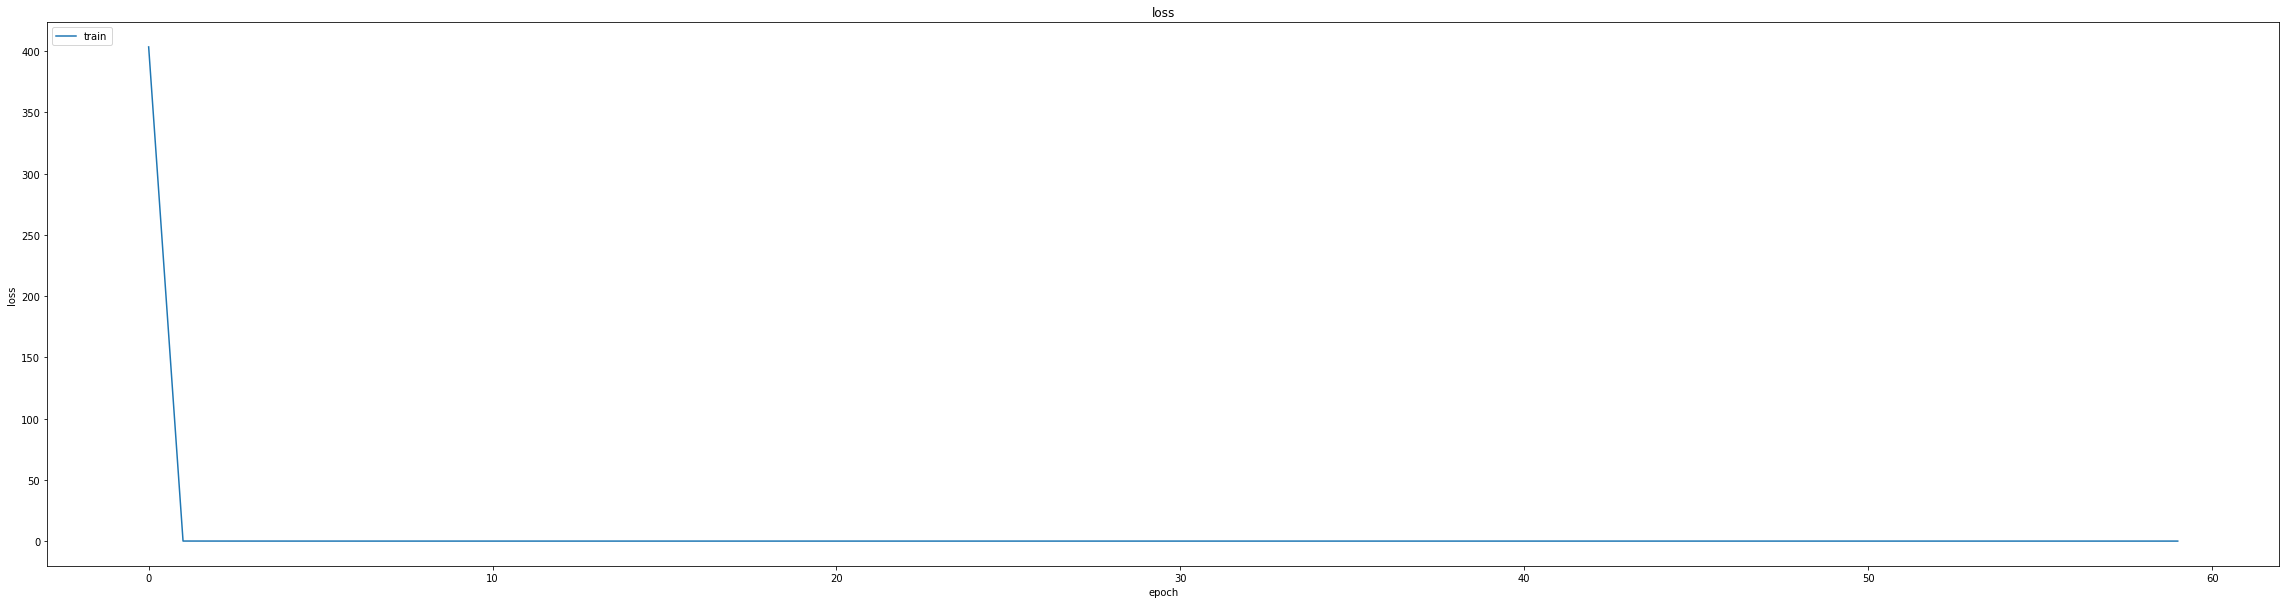

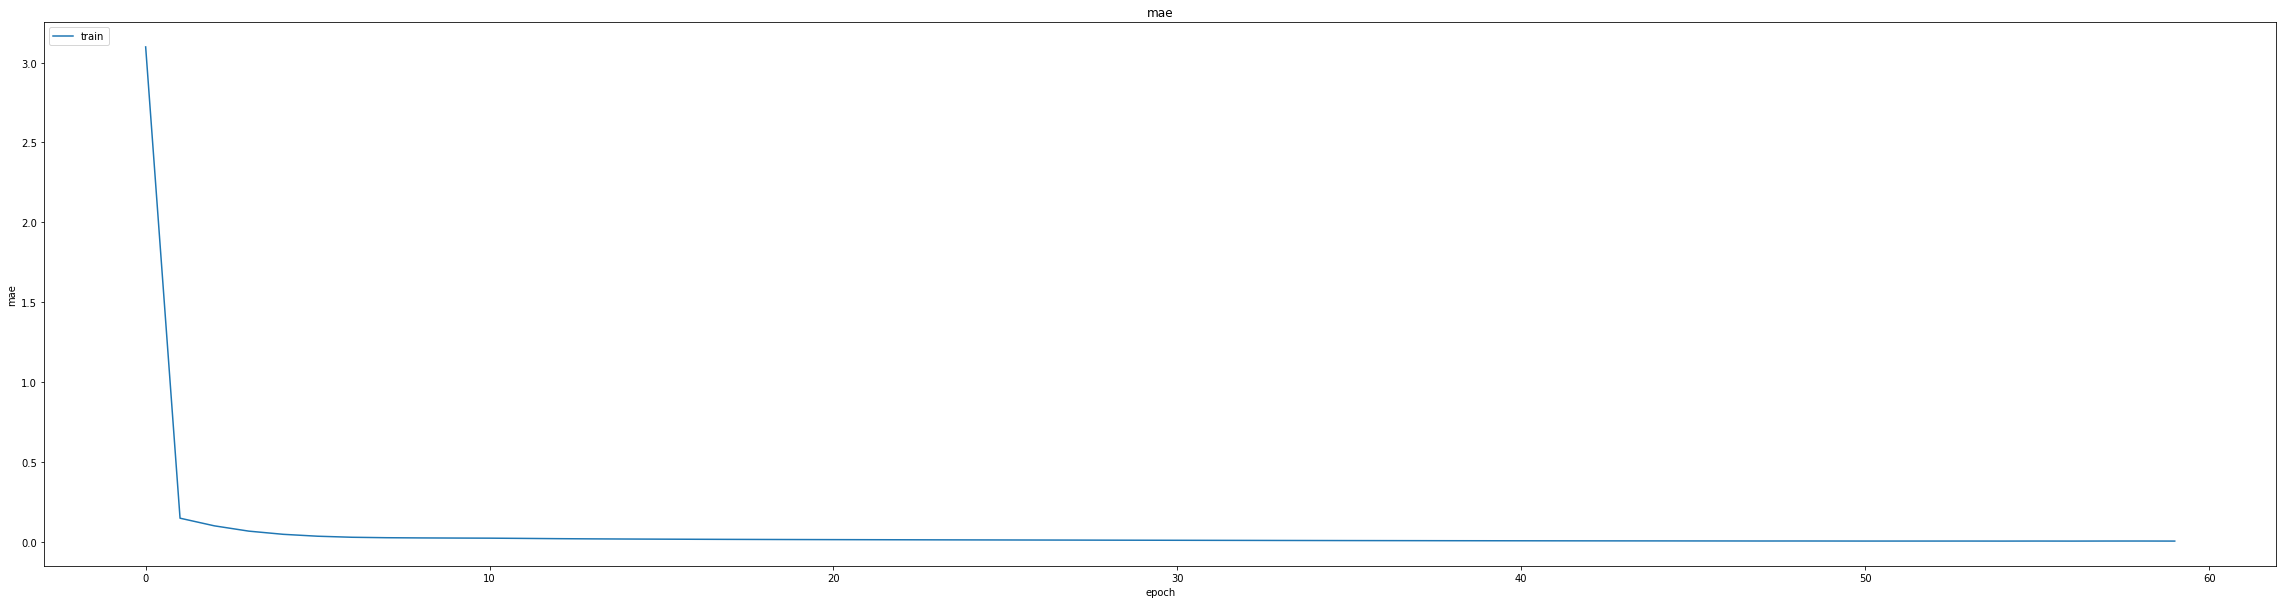

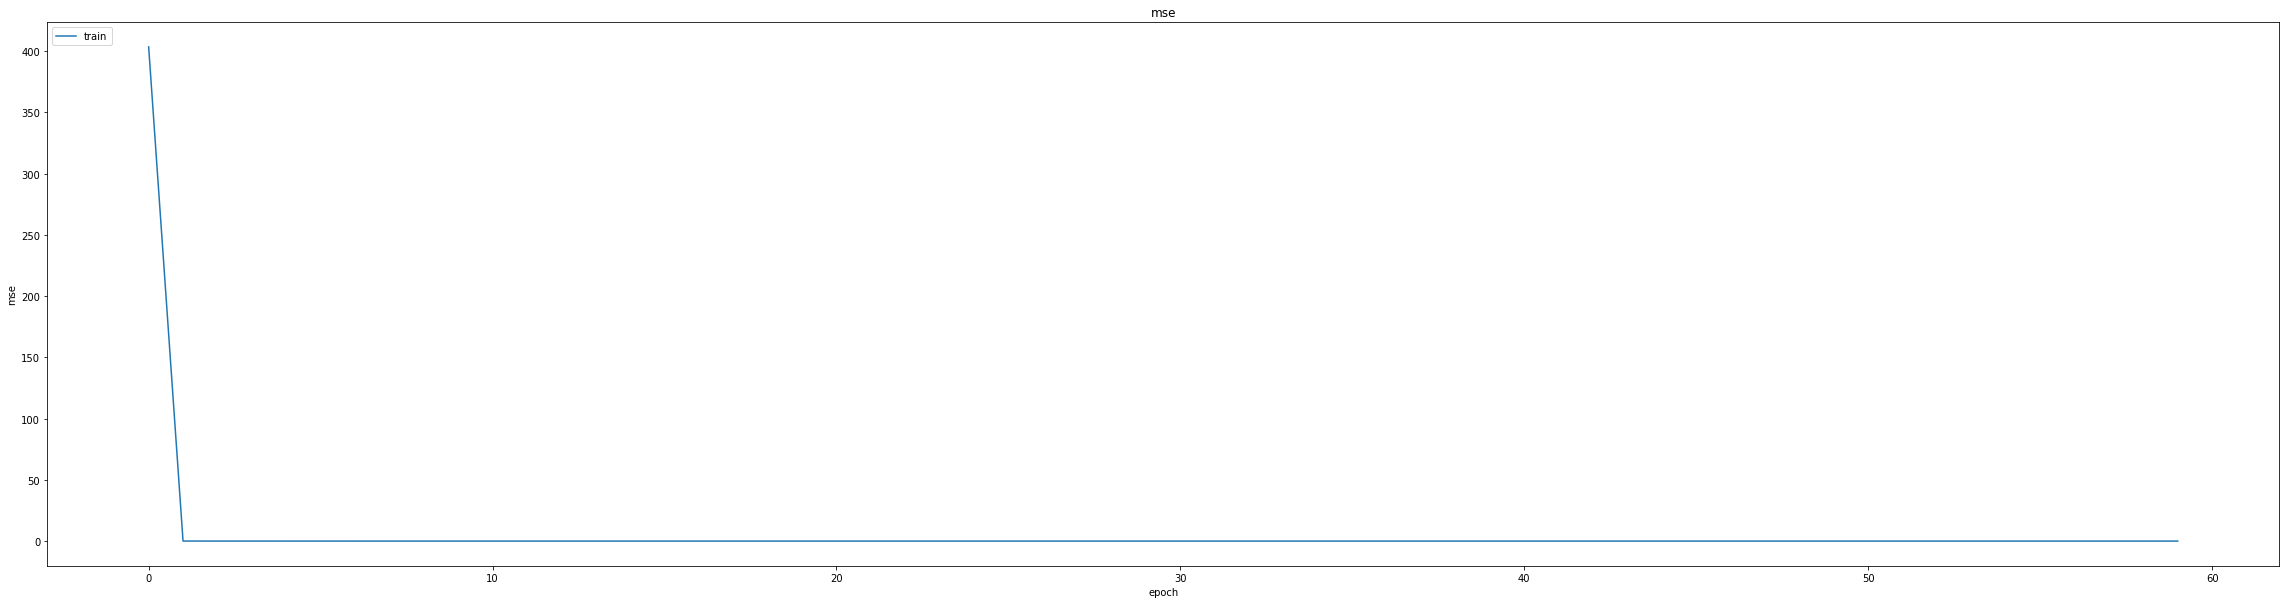

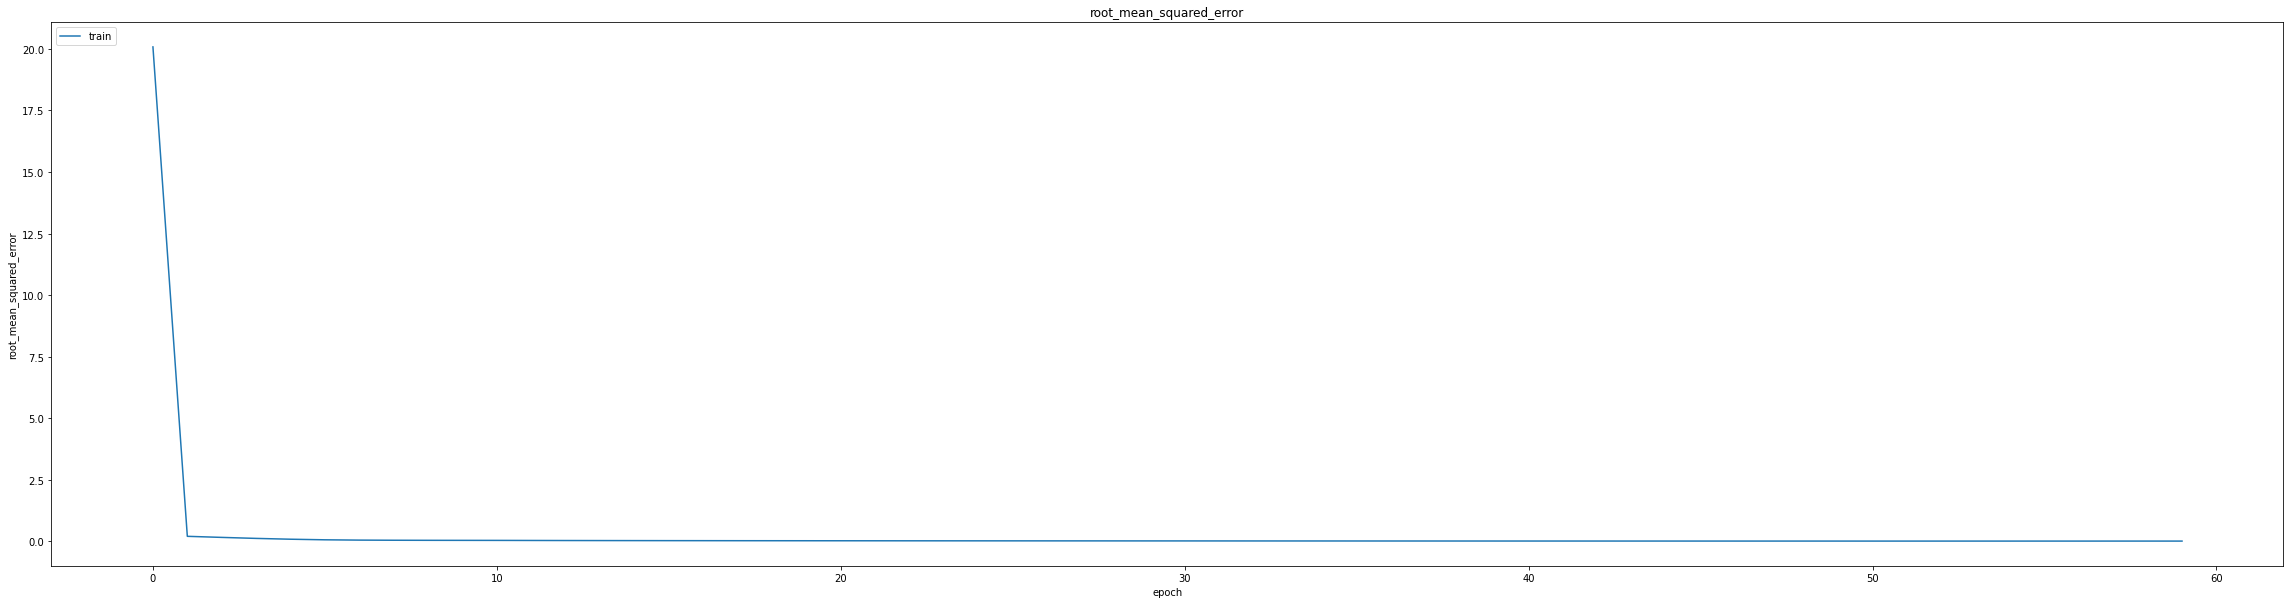

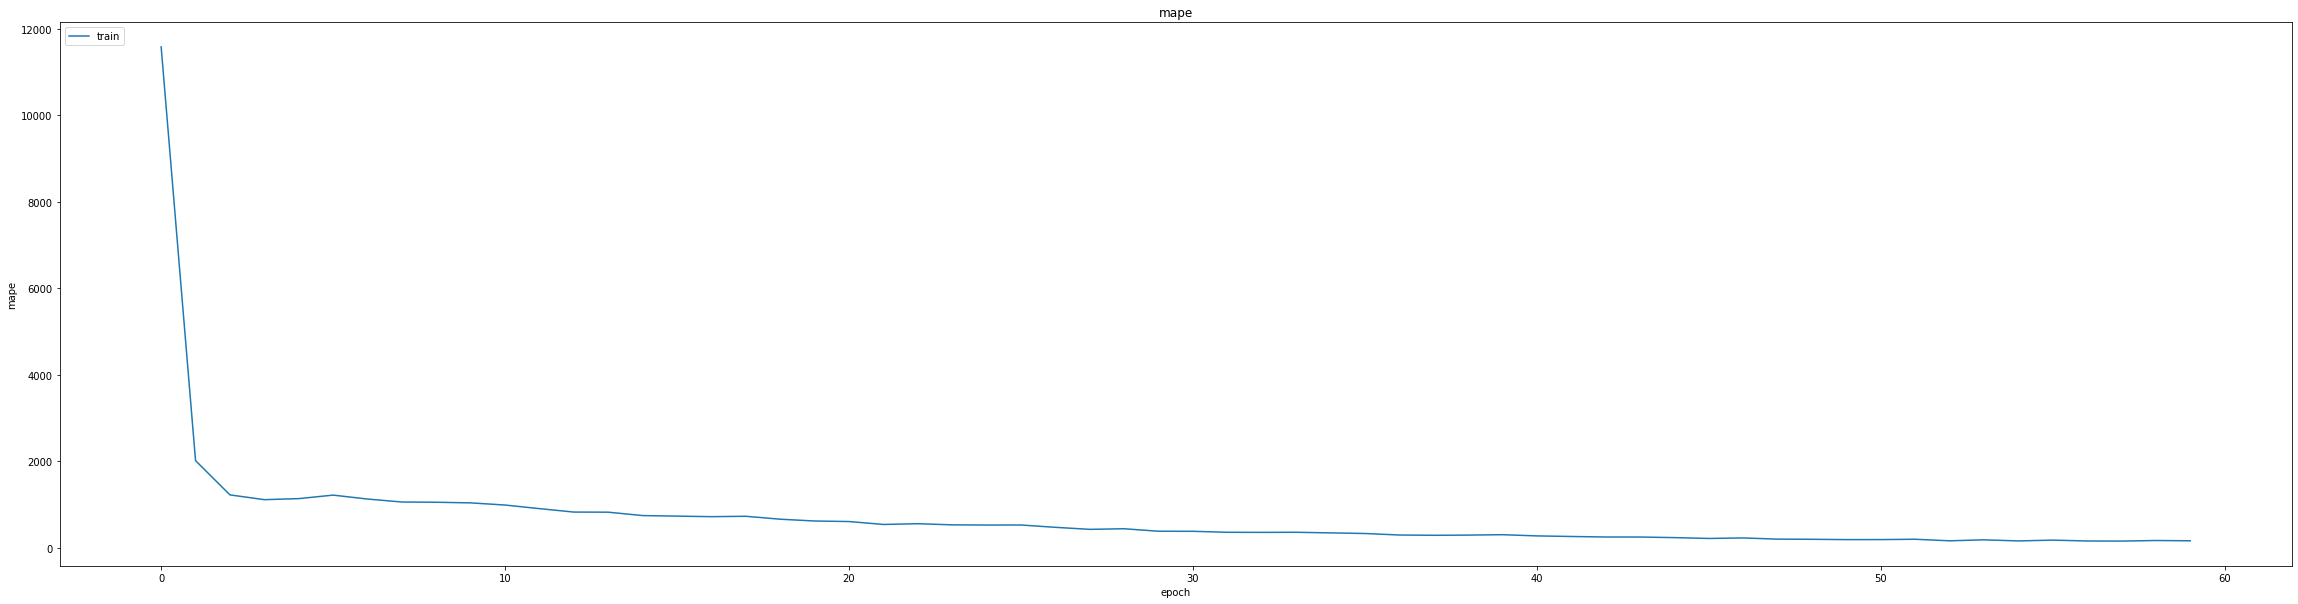

In [45]:
thesis.SummarizeHistory(history)

In [46]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007573059294372797
0.010521992109715939
1391/1391 [==============================] - 8s 5ms/step
0.9972129728207881


In [47]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [48]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
344/347 [============================>.] - ETA: 0s - loss: 3.8365e-04 - mae: 0.0079 - mse: 3.8365e-04 - root_mean_squared_error: 0.0196 - mape: 129.1405
Epoch 1: val_mse did not improve from 0.00011
347/347 [==============================] - 13s 23ms/step - loss: 3.8066e-04 - mae: 0.0079 - mse: 3.8066e-04 - root_mean_squared_error: 0.0195 - mape: 128.0707 - val_loss: 1.5071e-04 - val_mae: 0.0090 - val_mse: 1.5071e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 773.6717 - lr: 0.0010
Epoch 2/20
345/347 [============================>.] - ETA: 0s - loss: 2.3895e-05 - mae: 0.0036 - mse: 2.3895e-05 - root_mean_squared_error: 0.0049 - mape: 118.7174
Epoch 2: val_mse did not improve from 0.00011
347/347 [==============================] - 7s 19ms/step - loss: 2.3872e-05 - mae: 0.0036 - mse: 2.3872e-05 - root_mean_squared_error: 0.0049 - mape: 118.0687 - val_loss: 1.5540e-04 - val_mae: 0.0096 - val_mse: 1.5540e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 656.1967 - lr: 

347/347 [==============================] - 29s 83ms/step - loss: 2.2363e-05 - mae: 0.0035 - mse: 2.2363e-05 - root_mean_squared_error: 0.0047 - mape: 102.7721 - val_loss: 1.0355e-04 - val_mae: 0.0073 - val_mse: 1.0355e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 641.1199 - lr: 9.0000e-04
Epoch 4/20
346/347 [============================>.] - ETA: 0s - loss: 3.1460e-05 - mae: 0.0041 - mse: 3.1460e-05 - root_mean_squared_error: 0.0056 - mape: 103.7793
Epoch 4: val_mse did not improve from 0.00010
347/347 [==============================] - 7s 19ms/step - loss: 3.1851e-05 - mae: 0.0041 - mse: 3.1851e-05 - root_mean_squared_error: 0.0056 - mape: 103.5164 - val_loss: 1.3745e-04 - val_mae: 0.0088 - val_mse: 1.3745e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 693.6587 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
345/347 [============================>.] - ETA: 0s - loss: 2.2657e-05 - mae: 0.0035 - mse: 2.2657e-05 - root_mean_squared_error: 0.0048 - mape: 101.

347/347 [==============================] - 28s 82ms/step - loss: 2.2710e-05 - mae: 0.0035 - mse: 2.2710e-05 - root_mean_squared_error: 0.0048 - mape: 101.2520 - val_loss: 7.5331e-05 - val_mae: 0.0060 - val_mse: 7.5331e-05 - val_root_mean_squared_error: 0.0087 - val_mape: 594.0471 - lr: 8.1000e-04
Epoch 6/20
346/347 [============================>.] - ETA: 0s - loss: 2.6307e-05 - mae: 0.0038 - mse: 2.6307e-05 - root_mean_squared_error: 0.0051 - mape: 104.6077
Epoch 6: val_mse did not improve from 0.00008
347/347 [==============================] - 7s 20ms/step - loss: 2.6290e-05 - mae: 0.0038 - mse: 2.6290e-05 - root_mean_squared_error: 0.0051 - mape: 104.3359 - val_loss: 1.1622e-04 - val_mae: 0.0083 - val_mse: 1.1622e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 548.9105 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
346/347 [============================>.] - ETA: 0s - loss: 2.6670e-05 - mae: 0.0037 - mse: 2.6670e-05 - root_mean_squared_error: 0.0052 - mape: 91.0

347/347 [==============================] - 30s 86ms/step - loss: 1.9432e-05 - mae: 0.0032 - mse: 1.9432e-05 - root_mean_squared_error: 0.0044 - mape: 88.1965 - val_loss: 6.7281e-05 - val_mae: 0.0059 - val_mse: 6.7281e-05 - val_root_mean_squared_error: 0.0082 - val_mape: 572.5266 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
347/347 [==============================] - ETA: 0s - loss: 1.7665e-05 - mae: 0.0031 - mse: 1.7665e-05 - root_mean_squared_error: 0.0042 - mape: 85.5503
Epoch 13: val_mse did not improve from 0.00007
347/347 [==============================] - 7s 20ms/step - loss: 1.7665e-05 - mae: 0.0031 - mse: 1.7665e-05 - root_mean_squared_error: 0.0042 - mape: 85.5503 - val_loss: 8.9018e-05 - val_mae: 0.0070 - val_mse: 8.9018e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 640.7087 - lr: 5.3144e-04
Epoch 14/20
345/347 [============================>.] - ETA: 0s - loss: 1.9188e-05 - mae: 0.0032 - mse: 1.9188e-05 - root_mean_squared_error: 0.0044 - mape: 87.1

347/347 [==============================] - 29s 83ms/step - loss: 1.5190e-05 - mae: 0.0029 - mse: 1.5190e-05 - root_mean_squared_error: 0.0039 - mape: 83.8826 - val_loss: 5.7150e-05 - val_mae: 0.0053 - val_mse: 5.7150e-05 - val_root_mean_squared_error: 0.0076 - val_mape: 583.5966 - lr: 4.7830e-04
Epoch 16/20
347/347 [==============================] - ETA: 0s - loss: 1.8763e-05 - mae: 0.0032 - mse: 1.8763e-05 - root_mean_squared_error: 0.0043 - mape: 82.9024
Epoch 16: val_mse did not improve from 0.00006
347/347 [==============================] - 7s 20ms/step - loss: 1.8763e-05 - mae: 0.0032 - mse: 1.8763e-05 - root_mean_squared_error: 0.0043 - mape: 82.9024 - val_loss: 8.7585e-05 - val_mae: 0.0070 - val_mse: 8.7585e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 600.6035 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
346/347 [============================>.] - ETA: 0s - loss: 1.1938e-05 - mae: 0.0026 - mse: 1.1938e-05 - root_mean_squared_error: 0.0035 - mape: 90.0

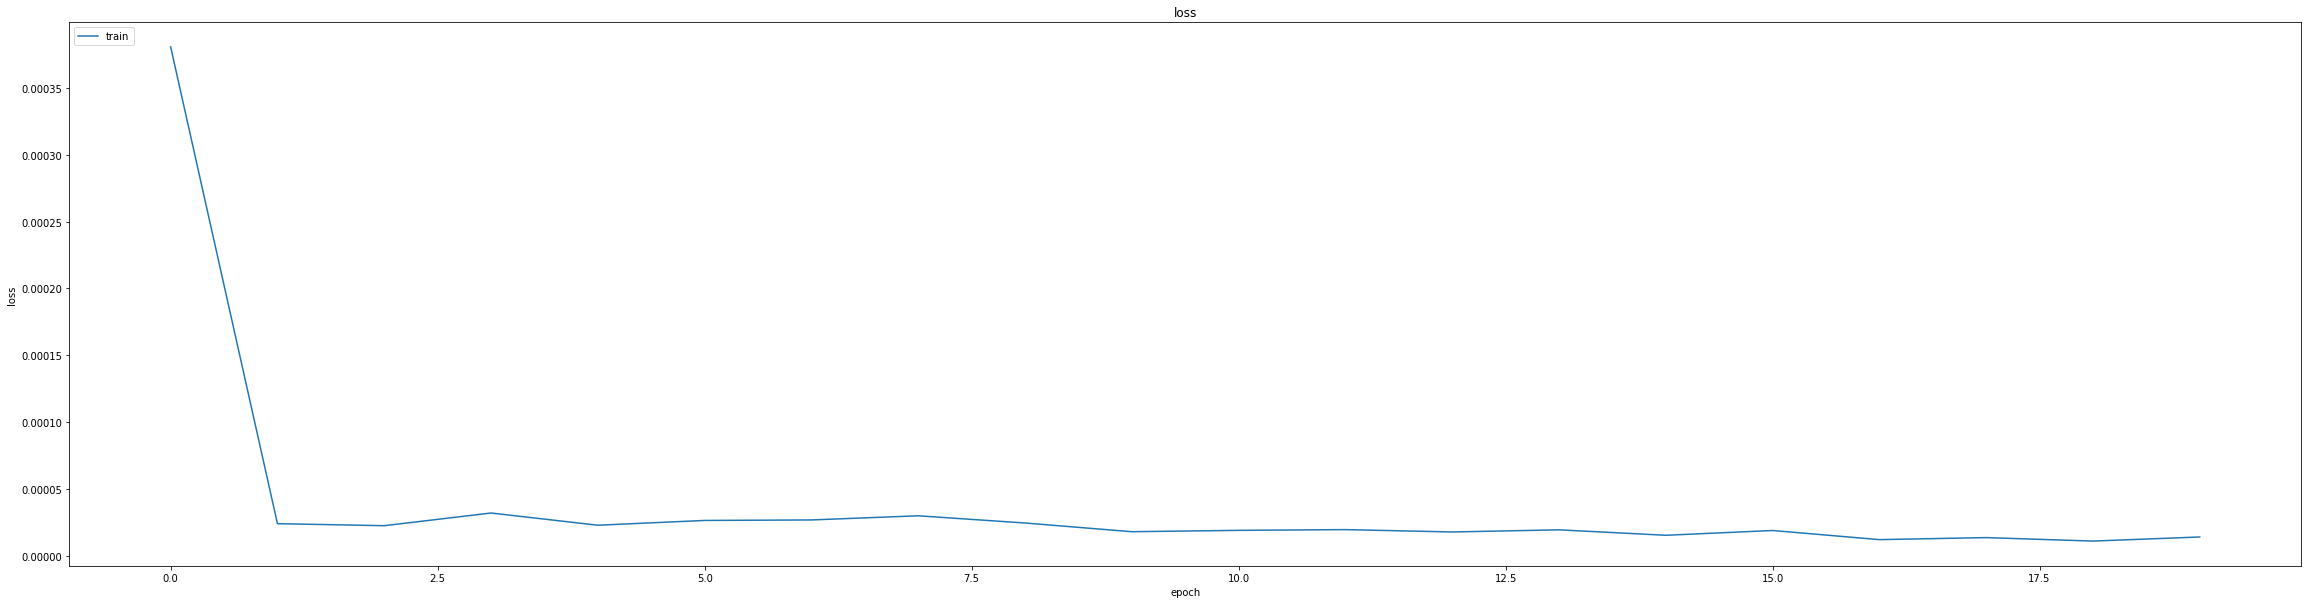

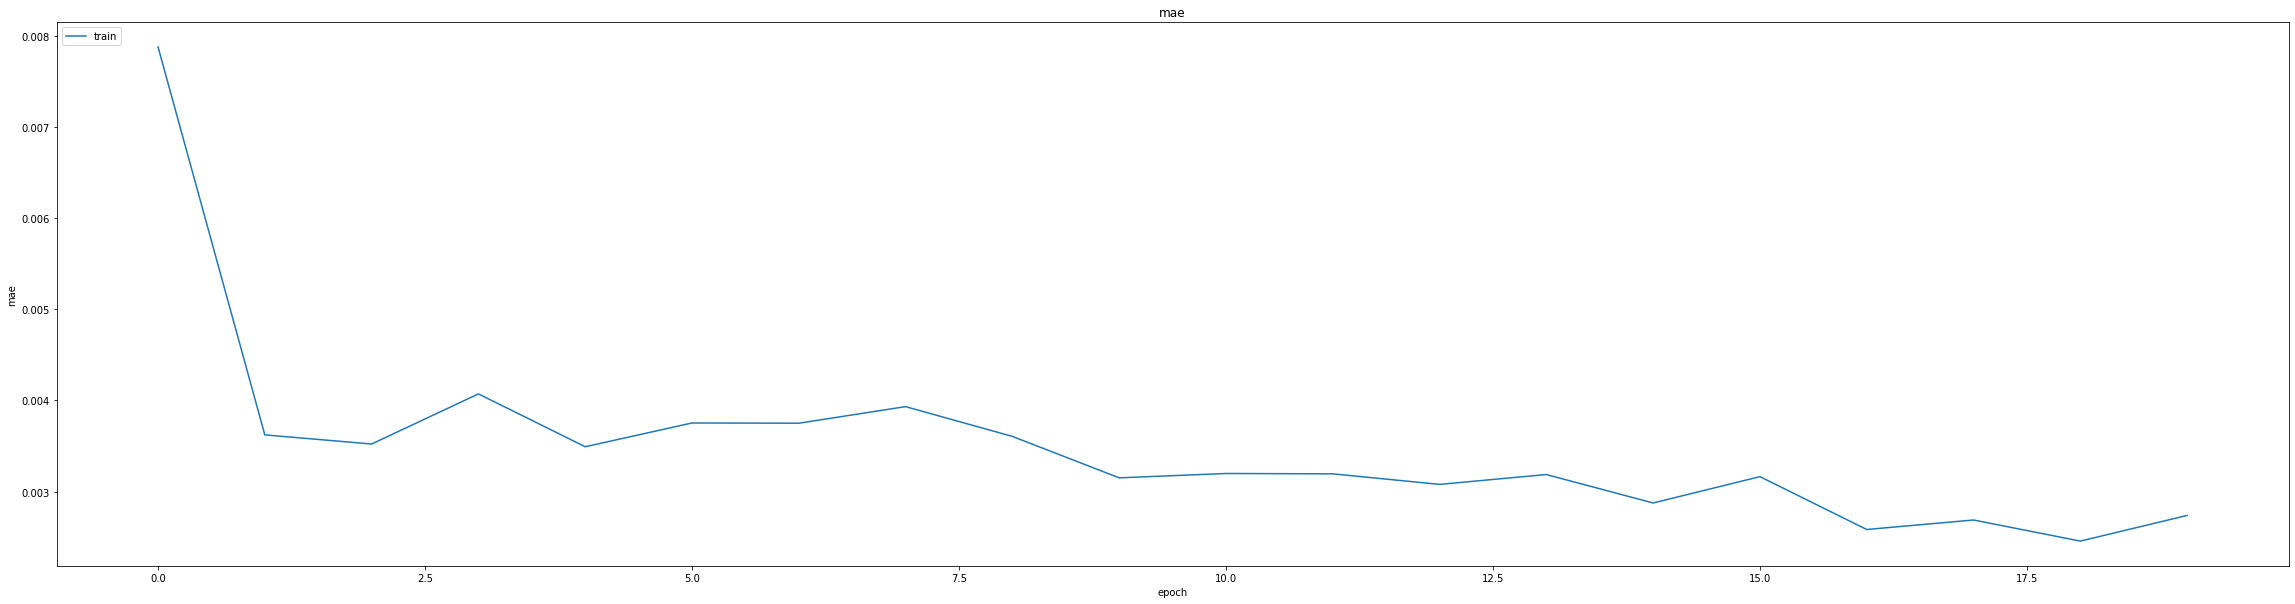

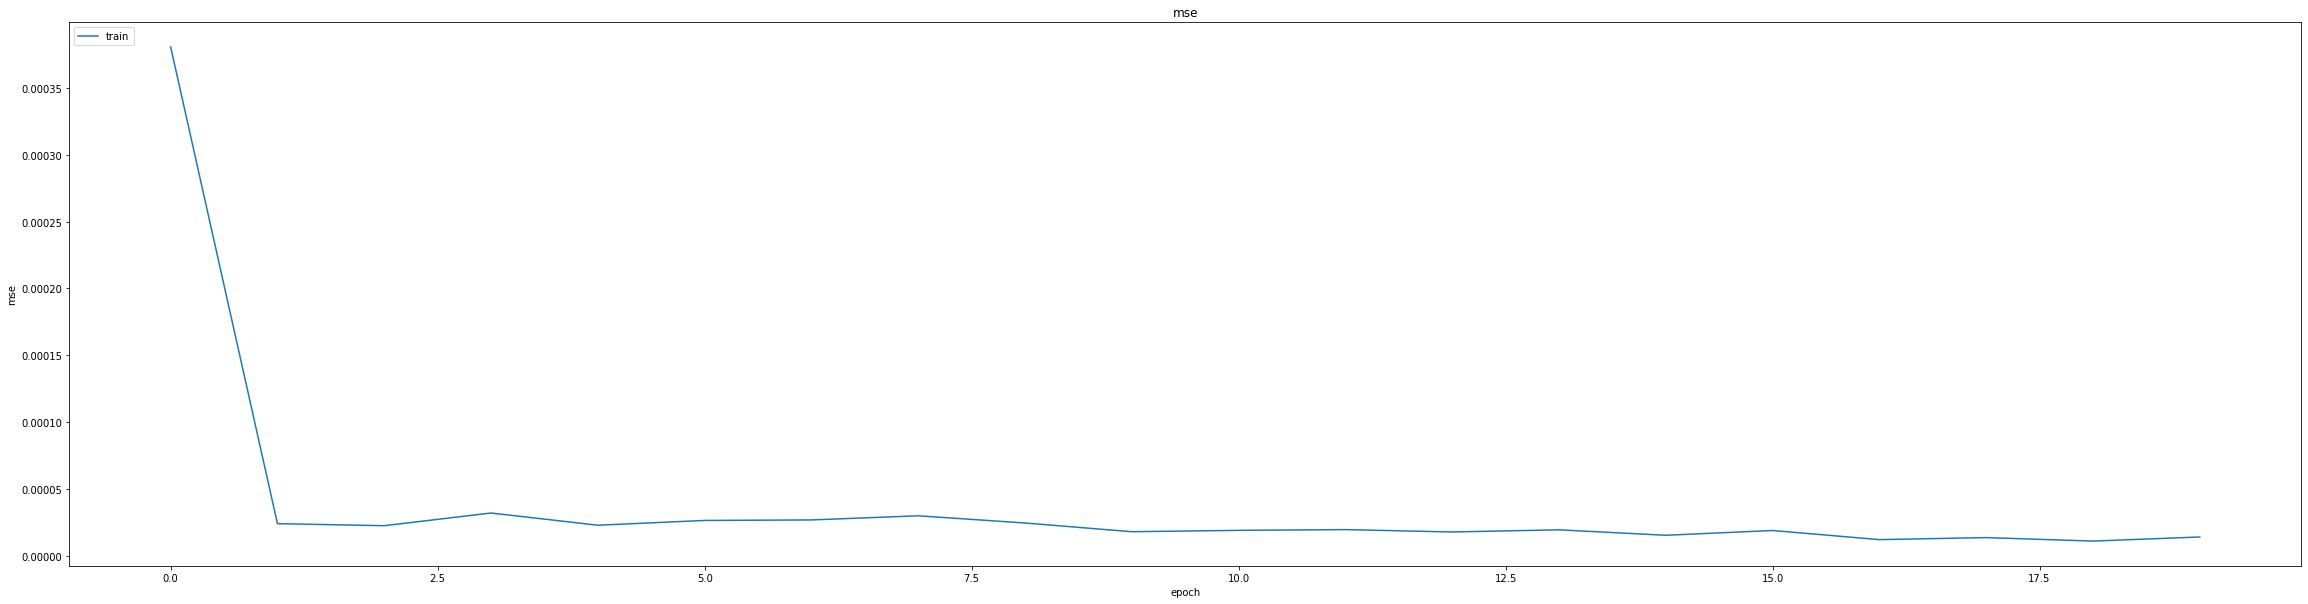

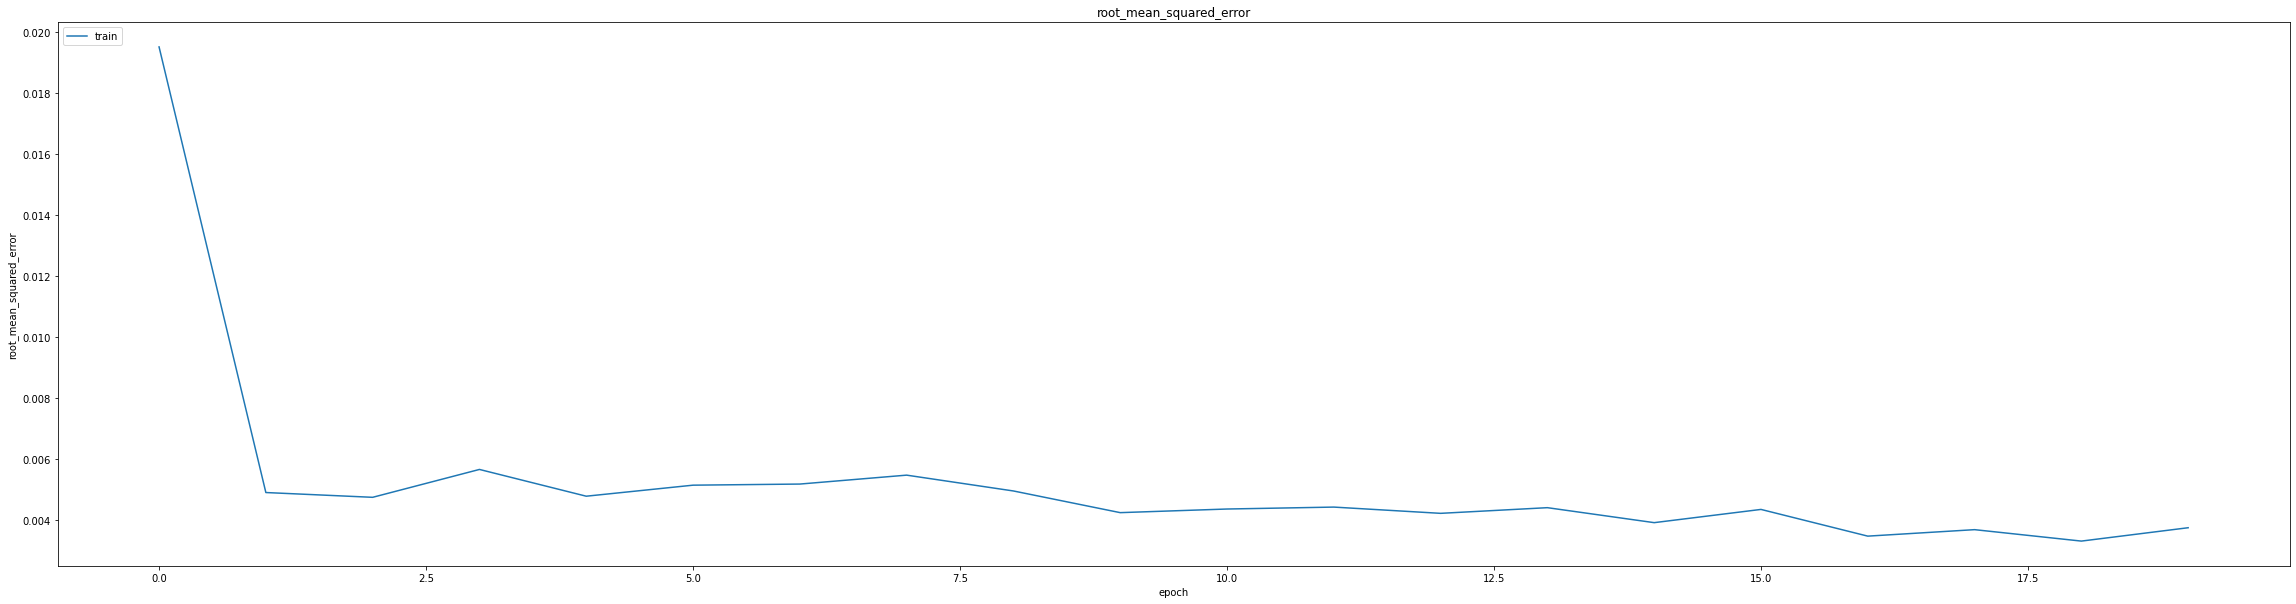

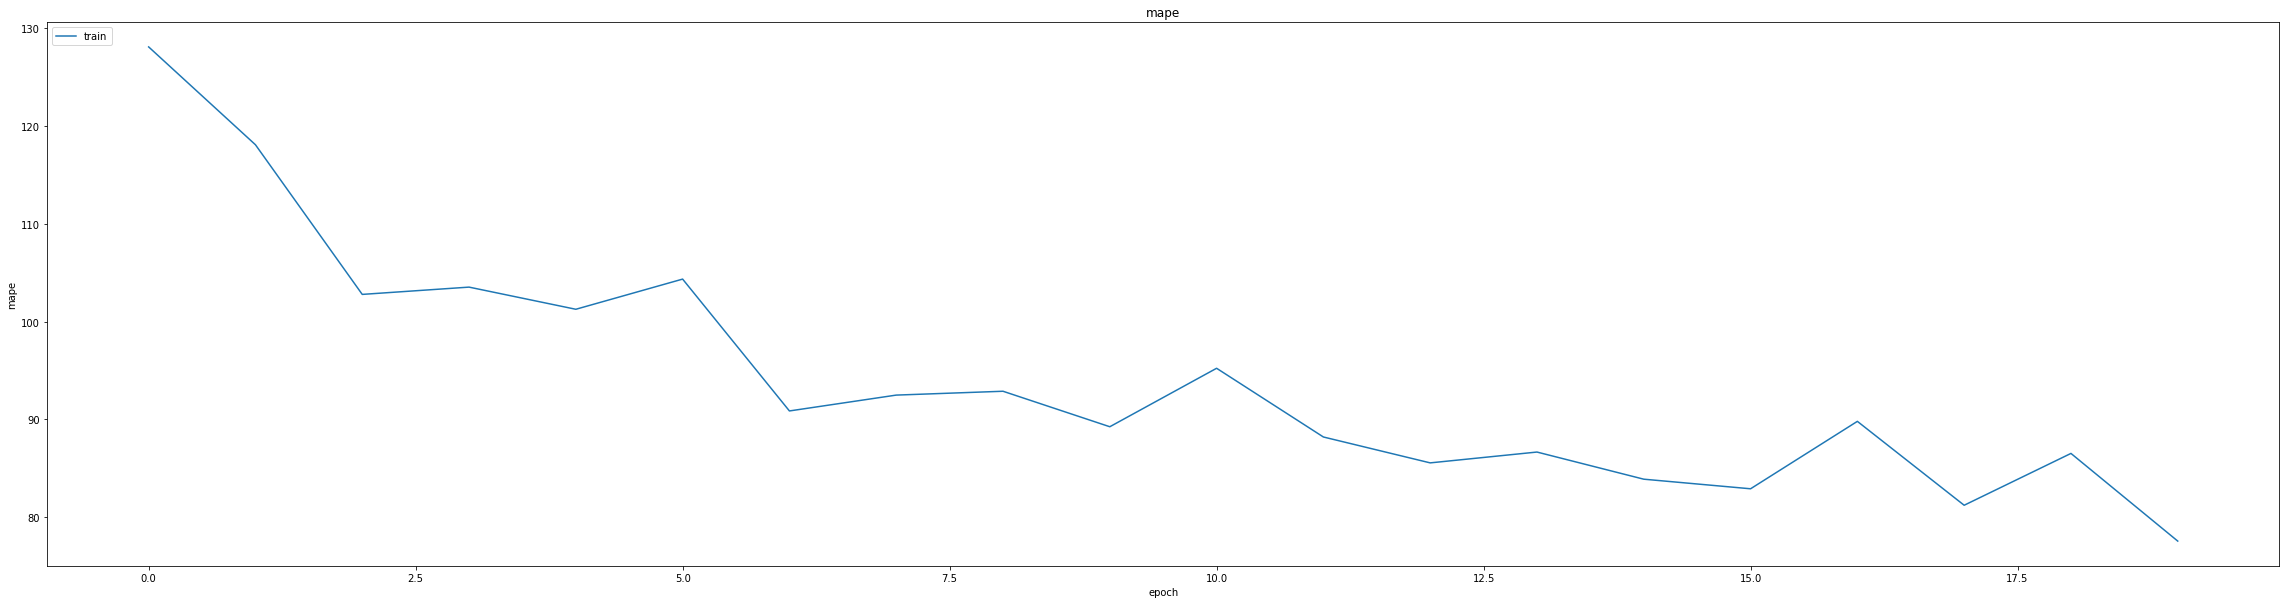

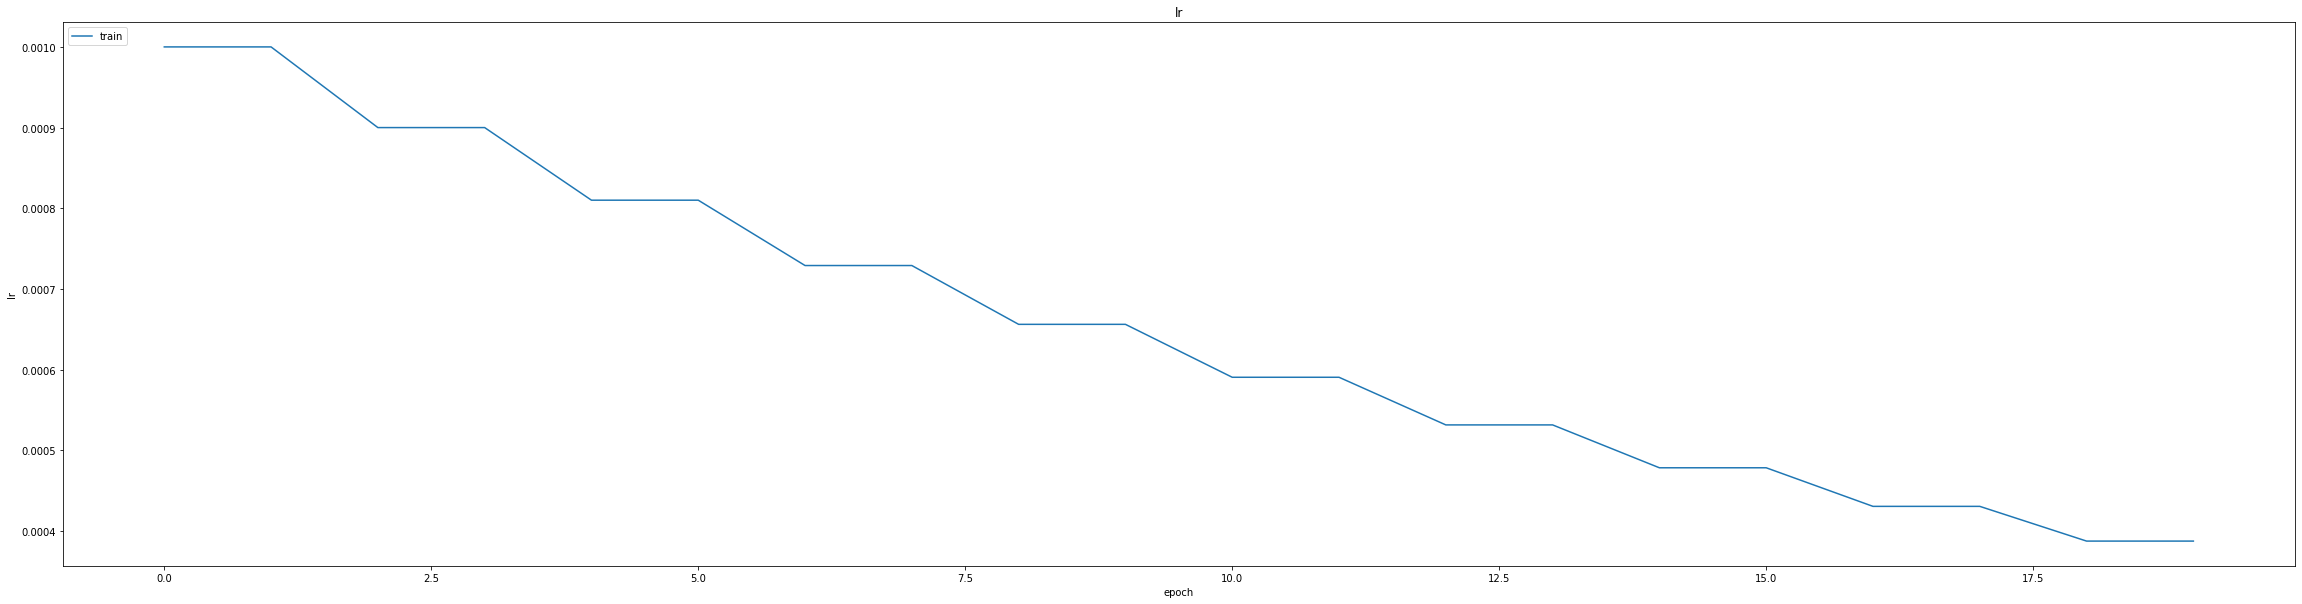

In [49]:
thesis.SummarizeHistory(history)

In [50]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005339111667126417
0.007559788413345814
1391/1391 [==============================] - 8s 5ms/step
0.9980832748684394


1391/1391 [==============================] - 7s 5ms/step


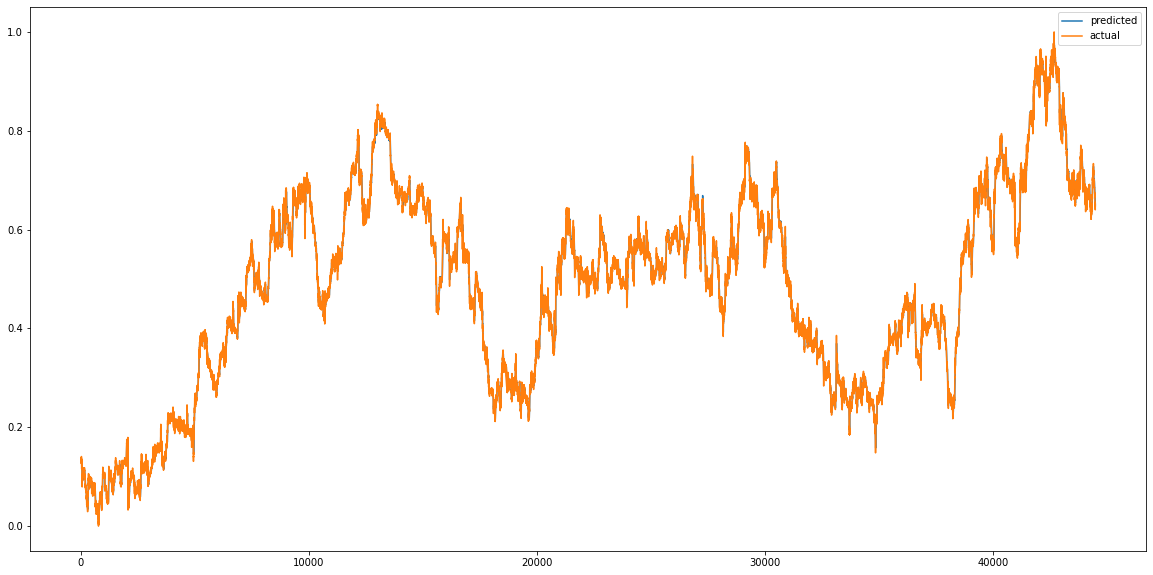

In [51]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


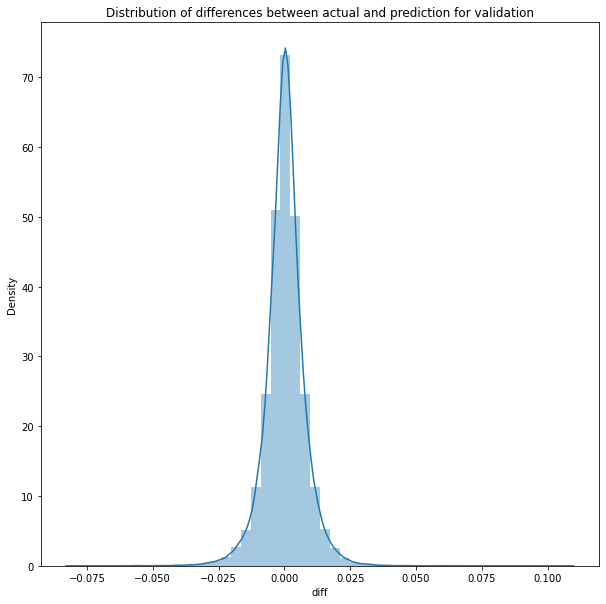

In [52]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 7s 5ms/step


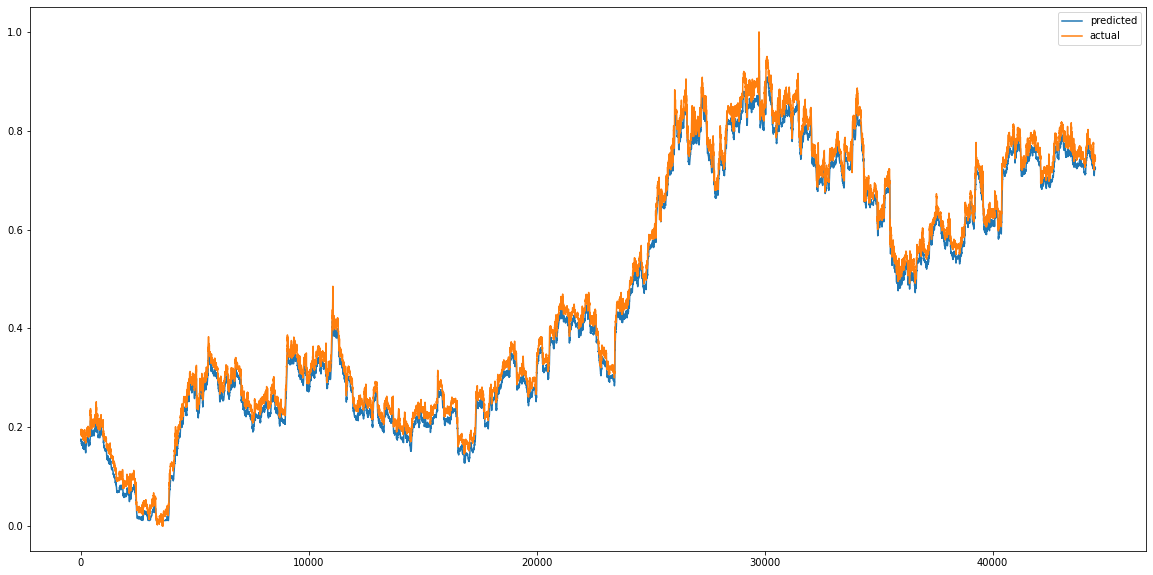

In [53]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


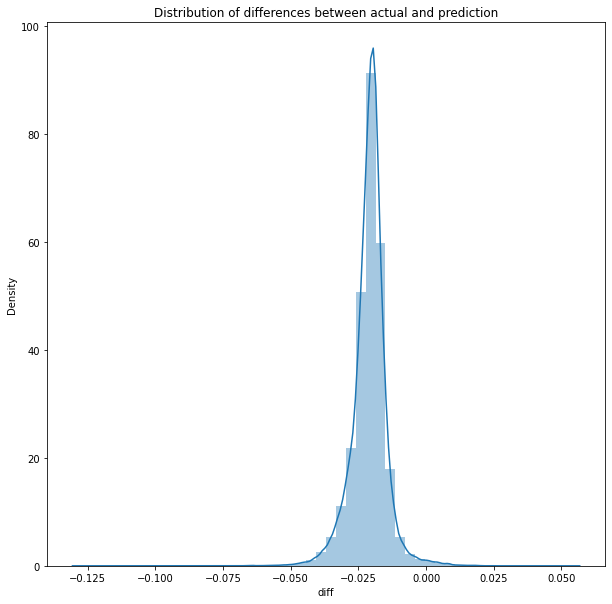

In [54]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0004804935371438301
RMSE :  0.02192016279920909
MAE :  0.02103649948991506
1391/1391 [==============================] - 8s 5ms/step
R2_Score  : 0.992356582341331


count    44506.000000
mean        -0.020952
std          0.006442
min         -0.128339
25%         -0.023751
50%         -0.020446
75%         -0.017797
max          0.054503
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [56]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [57]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
346/347 [============================>.] - ETA: 0s - loss: 835.5958 - mae: 8.6794 - mse: 835.5958 - root_mean_squared_error: 28.9067 - mape: 38753.6953
Epoch 1: val_mse improved from inf to 1.61492, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 18s 41ms/step - loss: 833.3862 - mae: 8.6600 - mse: 833.3862 - root_mean_squared_error: 28.8684 - mape: 38653.0273 - val_loss: 1.6149 - val_mae: 1.2547 - val_mse: 1.6149 - val_root_mean_squared_error: 1.2708 - val_mape: 39546.7266
Epoch 2/60
346/347 [============================>.] - ETA: 0s - loss: 0.7096 - mae: 0.7619 - mse: 0.7096 - root_mean_squared_error: 0.8424 - mape: 9063.2529
Epoch 2: val_mse improved from 1.61492 to 0.10425, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.7081 - mae: 0.7608 - mse: 0.7081 - root_mean_squared_error: 0.8415 - mape: 9040.1357 - val_loss: 0.1043 - val_mae: 0.2676 - val_mse: 0.1043 - val_root_mean_squared_error: 0.3229 - val_mape: 16690.2539
Epoch 3/60
347/347 [==============================] - ETA: 0s - loss: 0.0936 - mae: 0.2608 - mse: 0.0936 - root_mean_squared_error: 0.3060 - mape: 4641.6909
Epoch 3: val_mse improved from 0.10425 to 0.04012, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.0936 - mae: 0.2608 - mse: 0.0936 - root_mean_squared_error: 0.3060 - mape: 4641.6909 - val_loss: 0.0401 - val_mae: 0.1632 - val_mse: 0.0401 - val_root_mean_squared_error: 0.2003 - val_mape: 11083.8838
Epoch 4/60
346/347 [============================>.] - ETA: 0s - loss: 0.0495 - mae: 0.1855 - mse: 0.0495 - root_mean_squared_error: 0.2226 - mape: 3843.3865
Epoch 4: val_mse did not improve from 0.04012
347/347 [==============================] - 6s 17ms/step - loss: 0.0495 - mae: 0.1855 - mse: 0.0495 - root_mean_squared_error: 0.2226 - mape: 3833.5784 - val_loss: 0.0444 - val_mae: 0.1771 - val_mse: 0.0444 - val_root_mean_squared_error: 0.2108 - val_mape: 9363.8311
Epoch 5/60
344/347 [============================>.] - ETA: 0s - loss: 0.0448 - mae: 0.1761 - mse: 0.0448 - root_mean_squared_error: 0.2116 - mape: 3281.0295
Epoch 5: val_mse did not improve from 0.04012
347/347 [==============================] - 6s 18ms/step - lo

347/347 [==============================] - 13s 39ms/step - loss: 0.0379 - mae: 0.1591 - mse: 0.0379 - root_mean_squared_error: 0.1946 - mape: 2907.7161 - val_loss: 0.0349 - val_mae: 0.1523 - val_mse: 0.0349 - val_root_mean_squared_error: 0.1869 - val_mape: 8071.8208
Epoch 15/60
345/347 [============================>.] - ETA: 0s - loss: 0.0139 - mae: 0.0846 - mse: 0.0139 - root_mean_squared_error: 0.1178 - mape: 1924.5867
Epoch 15: val_mse improved from 0.03494 to 0.00303, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 15s 42ms/step - loss: 0.0138 - mae: 0.0844 - mse: 0.0138 - root_mean_squared_error: 0.1175 - mape: 1914.2148 - val_loss: 0.0030 - val_mae: 0.0372 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0550 - val_mape: 5295.2646
Epoch 16/60
345/347 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0385 - mse: 0.0034 - root_mean_squared_error: 0.0582 - mape: 1491.4941
Epoch 16: val_mse improved from 0.00303 to 0.00193, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 42ms/step - loss: 0.0034 - mae: 0.0385 - mse: 0.0034 - root_mean_squared_error: 0.0582 - mape: 1483.5099 - val_loss: 0.0019 - val_mae: 0.0336 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0439 - val_mape: 4242.9346
Epoch 17/60
345/347 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0335 - mse: 0.0024 - root_mean_squared_error: 0.0486 - mape: 1298.5806
Epoch 17: val_mse improved from 0.00193 to 0.00121, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.0024 - mae: 0.0334 - mse: 0.0024 - root_mean_squared_error: 0.0485 - mape: 1291.6066 - val_loss: 0.0012 - val_mae: 0.0279 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0348 - val_mape: 3586.7031
Epoch 18/60
346/347 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0295 - mse: 0.0018 - root_mean_squared_error: 0.0423 - mape: 1089.7013
Epoch 18: val_mse improved from 0.00121 to 0.00080, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 0.0018 - mae: 0.0295 - mse: 0.0018 - root_mean_squared_error: 0.0423 - mape: 1086.8954 - val_loss: 8.0318e-04 - val_mae: 0.0229 - val_mse: 8.0318e-04 - val_root_mean_squared_error: 0.0283 - val_mape: 3132.3318
Epoch 19/60
346/347 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0267 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 991.2769 
Epoch 19: val_mse improved from 0.00080 to 0.00079, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.0015 - mae: 0.0267 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 988.7267 - val_loss: 7.8558e-04 - val_mae: 0.0222 - val_mse: 7.8558e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 2830.9626
Epoch 20/60
344/347 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0248 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 926.3737
Epoch 20: val_mse improved from 0.00079 to 0.00060, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 0.0013 - mae: 0.0248 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 918.7485 - val_loss: 5.9831e-04 - val_mae: 0.0193 - val_mse: 5.9831e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 2606.8152
Epoch 21/60
345/347 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0232 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 885.1047
Epoch 21: val_mse improved from 0.00060 to 0.00051, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 0.0011 - mae: 0.0232 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 880.3124 - val_loss: 5.1064e-04 - val_mae: 0.0172 - val_mse: 5.1064e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 2425.8494
Epoch 22/60
344/347 [============================>.] - ETA: 0s - loss: 9.6963e-04 - mae: 0.0216 - mse: 9.6963e-04 - root_mean_squared_error: 0.0311 - mape: 820.3371
Epoch 22: val_mse did not improve from 0.00051
347/347 [==============================] - 6s 17ms/step - loss: 9.6896e-04 - mae: 0.0216 - mse: 9.6896e-04 - root_mean_squared_error: 0.0311 - mape: 813.6022 - val_loss: 5.2766e-04 - val_mae: 0.0180 - val_mse: 5.2766e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 2263.8240
Epoch 23/60
347/347 [==============================] - ETA: 0s - loss: 8.3831e-04 - mae: 0.0202 - mse: 8.3831e-04 - root_mean_squared_error: 0.0290 - mape: 778.3953
Epoch 23: val_mse improved from 0.00051 to 0.00040, saving model to 

347/347 [==============================] - 14s 40ms/step - loss: 8.3831e-04 - mae: 0.0202 - mse: 8.3831e-04 - root_mean_squared_error: 0.0290 - mape: 778.3953 - val_loss: 3.9751e-04 - val_mae: 0.0150 - val_mse: 3.9751e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 2131.5901
Epoch 24/60
345/347 [============================>.] - ETA: 0s - loss: 7.4696e-04 - mae: 0.0192 - mse: 7.4696e-04 - root_mean_squared_error: 0.0273 - mape: 701.4374
Epoch 24: val_mse improved from 0.00040 to 0.00031, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 7.4719e-04 - mae: 0.0192 - mse: 7.4719e-04 - root_mean_squared_error: 0.0273 - mape: 697.6557 - val_loss: 3.1006e-04 - val_mae: 0.0130 - val_mse: 3.1006e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 2017.0054
Epoch 25/60
344/347 [============================>.] - ETA: 0s - loss: 6.7346e-04 - mae: 0.0184 - mse: 6.7346e-04 - root_mean_squared_error: 0.0260 - mape: 685.3894
Epoch 25: val_mse improved from 0.00031 to 0.00022, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 6.7323e-04 - mae: 0.0184 - mse: 6.7323e-04 - root_mean_squared_error: 0.0259 - mape: 679.7614 - val_loss: 2.2410e-04 - val_mae: 0.0110 - val_mse: 2.2410e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 1919.6918
Epoch 26/60
347/347 [==============================] - ETA: 0s - loss: 6.1415e-04 - mae: 0.0177 - mse: 6.1415e-04 - root_mean_squared_error: 0.0248 - mape: 632.9644
Epoch 26: val_mse did not improve from 0.00022
347/347 [==============================] - 6s 17ms/step - loss: 6.1415e-04 - mae: 0.0177 - mse: 6.1415e-04 - root_mean_squared_error: 0.0248 - mape: 632.9644 - val_loss: 2.4767e-04 - val_mae: 0.0119 - val_mse: 2.4767e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 1828.6897
Epoch 27/60
344/347 [============================>.] - ETA: 0s - loss: 5.5529e-04 - mae: 0.0169 - mse: 5.5529e-04 - root_mean_squared_error: 0.0236 - mape: 623.4298
Epoch 27: val_mse did not improve from 0.00022
347/347 [====

347/347 [==============================] - 14s 41ms/step - loss: 4.3331e-04 - mae: 0.0152 - mse: 4.3331e-04 - root_mean_squared_error: 0.0208 - mape: 564.6273 - val_loss: 1.7296e-04 - val_mae: 0.0094 - val_mse: 1.7296e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 1557.3401
Epoch 30/60
345/347 [============================>.] - ETA: 0s - loss: 3.8544e-04 - mae: 0.0145 - mse: 3.8544e-04 - root_mean_squared_error: 0.0196 - mape: 501.6753
Epoch 30: val_mse did not improve from 0.00017
347/347 [==============================] - 6s 19ms/step - loss: 3.8561e-04 - mae: 0.0145 - mse: 3.8561e-04 - root_mean_squared_error: 0.0196 - mape: 498.9771 - val_loss: 2.3789e-04 - val_mae: 0.0112 - val_mse: 2.3789e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 1455.1908
Epoch 31/60
346/347 [============================>.] - ETA: 0s - loss: 3.4017e-04 - mae: 0.0137 - mse: 3.4017e-04 - root_mean_squared_error: 0.0184 - mape: 504.7560
Epoch 31: val_mse did not improve from 0.00017
347/347 [====

347/347 [==============================] - 13s 38ms/step - loss: 2.4567e-04 - mae: 0.0118 - mse: 2.4567e-04 - root_mean_squared_error: 0.0157 - mape: 418.9842 - val_loss: 1.5374e-04 - val_mae: 0.0091 - val_mse: 1.5374e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 1141.2118
Epoch 35/60
346/347 [============================>.] - ETA: 0s - loss: 2.2208e-04 - mae: 0.0113 - mse: 2.2208e-04 - root_mean_squared_error: 0.0149 - mape: 387.0949
Epoch 35: val_mse did not improve from 0.00015
347/347 [==============================] - 6s 17ms/step - loss: 2.2203e-04 - mae: 0.0113 - mse: 2.2203e-04 - root_mean_squared_error: 0.0149 - mape: 386.1017 - val_loss: 2.0523e-04 - val_mae: 0.0102 - val_mse: 2.0523e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 1086.1091
Epoch 36/60
344/347 [============================>.] - ETA: 0s - loss: 2.0183e-04 - mae: 0.0108 - mse: 2.0183e-04 - root_mean_squared_error: 0.0142 - mape: 369.5077
Epoch 36: val_mse improved from 0.00015 to 0.00014, saving m

347/347 [==============================] - 14s 41ms/step - loss: 2.0178e-04 - mae: 0.0108 - mse: 2.0178e-04 - root_mean_squared_error: 0.0142 - mape: 366.4681 - val_loss: 1.3581e-04 - val_mae: 0.0085 - val_mse: 1.3581e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 1035.7112
Epoch 37/60
345/347 [============================>.] - ETA: 0s - loss: 1.8185e-04 - mae: 0.0102 - mse: 1.8185e-04 - root_mean_squared_error: 0.0135 - mape: 345.1882
Epoch 37: val_mse did not improve from 0.00014
347/347 [==============================] - 6s 17ms/step - loss: 1.8189e-04 - mae: 0.0102 - mse: 1.8189e-04 - root_mean_squared_error: 0.0135 - mape: 343.3297 - val_loss: 1.7174e-04 - val_mae: 0.0092 - val_mse: 1.7174e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 992.2120
Epoch 38/60
344/347 [============================>.] - ETA: 0s - loss: 1.6278e-04 - mae: 0.0097 - mse: 1.6278e-04 - root_mean_squared_error: 0.0128 - mape: 319.2531
Epoch 38: val_mse did not improve from 0.00014
347/347 [=====

347/347 [==============================] - 14s 41ms/step - loss: 1.3129e-04 - mae: 0.0087 - mse: 1.3129e-04 - root_mean_squared_error: 0.0115 - mape: 302.4830 - val_loss: 1.2563e-04 - val_mae: 0.0082 - val_mse: 1.2563e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 892.4045
Epoch 41/60
344/347 [============================>.] - ETA: 0s - loss: 1.1739e-04 - mae: 0.0082 - mse: 1.1739e-04 - root_mean_squared_error: 0.0108 - mape: 296.4062
Epoch 41: val_mse did not improve from 0.00013
347/347 [==============================] - 6s 17ms/step - loss: 1.1743e-04 - mae: 0.0082 - mse: 1.1743e-04 - root_mean_squared_error: 0.0108 - mape: 293.9603 - val_loss: 1.9885e-04 - val_mae: 0.0105 - val_mse: 1.9885e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 863.2528
Epoch 42/60
345/347 [============================>.] - ETA: 0s - loss: 1.0906e-04 - mae: 0.0079 - mse: 1.0906e-04 - root_mean_squared_error: 0.0104 - mape: 288.3379
Epoch 42: val_mse did not improve from 0.00013
347/347 [======

347/347 [==============================] - 13s 38ms/step - loss: 8.7721e-05 - mae: 0.0071 - mse: 8.7721e-05 - root_mean_squared_error: 0.0094 - mape: 253.2400 - val_loss: 1.1563e-04 - val_mae: 0.0078 - val_mse: 1.1563e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 793.9950
Epoch 45/60
344/347 [============================>.] - ETA: 0s - loss: 7.8762e-05 - mae: 0.0068 - mse: 7.8762e-05 - root_mean_squared_error: 0.0089 - mape: 238.5537
Epoch 45: val_mse did not improve from 0.00012
347/347 [==============================] - 6s 17ms/step - loss: 7.8733e-05 - mae: 0.0068 - mse: 7.8733e-05 - root_mean_squared_error: 0.0089 - mape: 236.5829 - val_loss: 1.3618e-04 - val_mae: 0.0084 - val_mse: 1.3618e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 775.8123
Epoch 46/60
347/347 [==============================] - ETA: 0s - loss: 7.1572e-05 - mae: 0.0064 - mse: 7.1572e-05 - root_mean_squared_error: 0.0085 - mape: 246.7857
Epoch 46: val_mse did not improve from 0.00012
347/347 [======

347/347 [==============================] - 14s 40ms/step - loss: 6.2372e-05 - mae: 0.0060 - mse: 6.2372e-05 - root_mean_squared_error: 0.0079 - mape: 226.0886 - val_loss: 1.1175e-04 - val_mae: 0.0076 - val_mse: 1.1175e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 790.1261
Epoch 49/60
347/347 [==============================] - ETA: 0s - loss: 5.7470e-05 - mae: 0.0057 - mse: 5.7470e-05 - root_mean_squared_error: 0.0076 - mape: 216.1458
Epoch 49: val_mse did not improve from 0.00011
347/347 [==============================] - 6s 19ms/step - loss: 5.7470e-05 - mae: 0.0057 - mse: 5.7470e-05 - root_mean_squared_error: 0.0076 - mape: 216.1458 - val_loss: 1.9598e-04 - val_mae: 0.0106 - val_mse: 1.9598e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 761.1554
Epoch 50/60
345/347 [============================>.] - ETA: 0s - loss: 5.2815e-05 - mae: 0.0055 - mse: 5.2815e-05 - root_mean_squared_error: 0.0073 - mape: 205.6930
Epoch 50: val_mse did not improve from 0.00011
347/347 [======

347/347 [==============================] - 14s 40ms/step - loss: 3.8881e-05 - mae: 0.0047 - mse: 3.8881e-05 - root_mean_squared_error: 0.0062 - mape: 182.8642 - val_loss: 1.0847e-04 - val_mae: 0.0075 - val_mse: 1.0847e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 772.5139
Epoch 60/60
344/347 [============================>.] - ETA: 0s - loss: 3.9321e-05 - mae: 0.0047 - mse: 3.9321e-05 - root_mean_squared_error: 0.0063 - mape: 177.7294
Epoch 60: val_mse did not improve from 0.00011
347/347 [==============================] - 6s 17ms/step - loss: 3.9313e-05 - mae: 0.0047 - mse: 3.9313e-05 - root_mean_squared_error: 0.0063 - mape: 176.2572 - val_loss: 2.1480e-04 - val_mae: 0.0113 - val_mse: 2.1480e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 749.3869


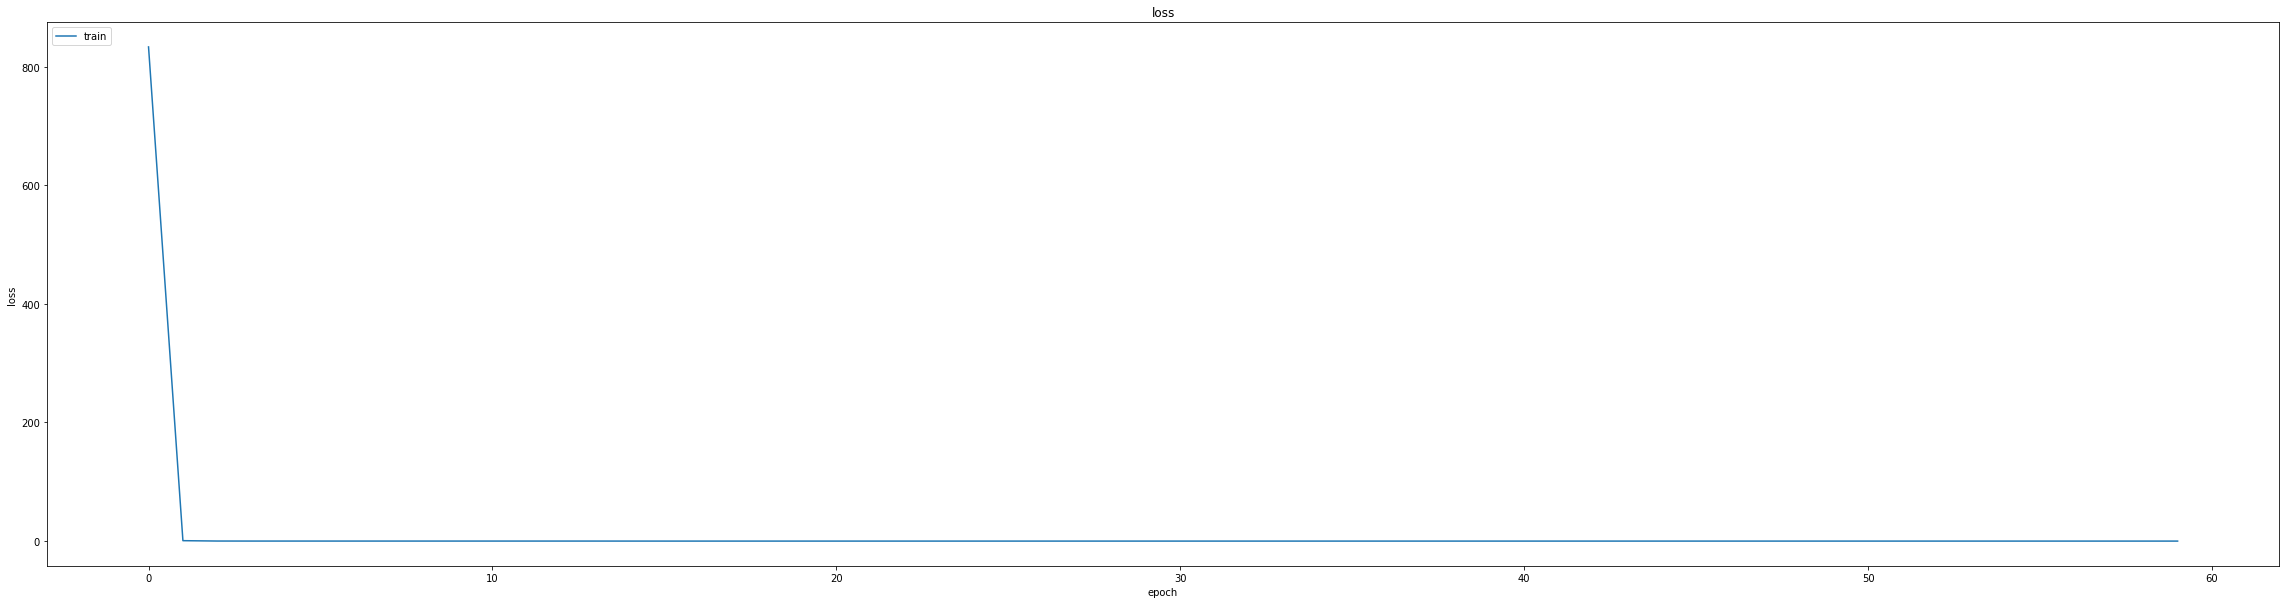

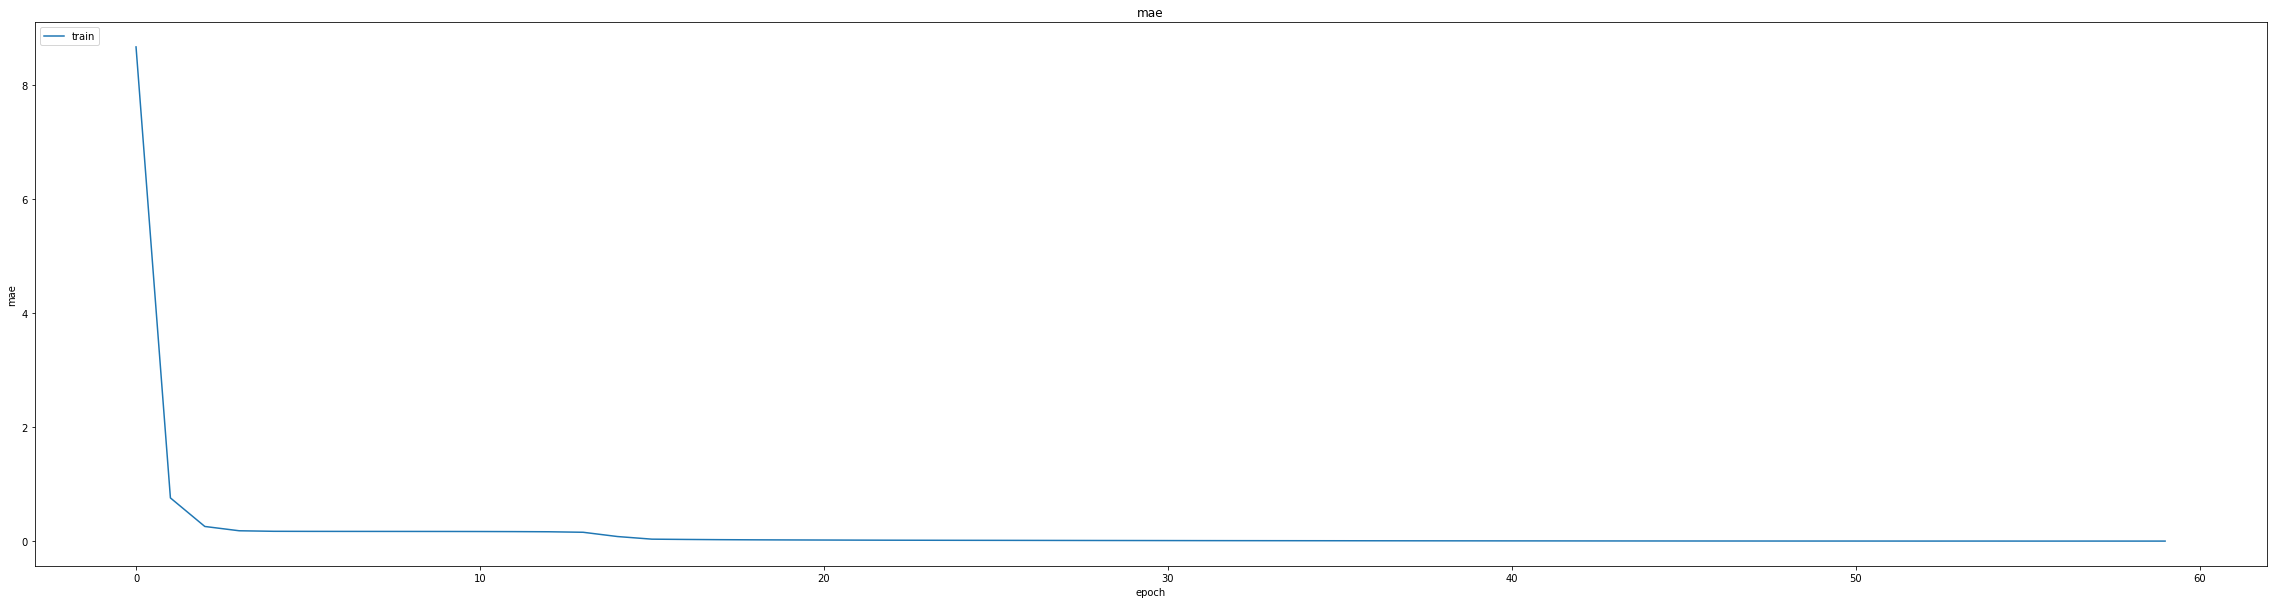

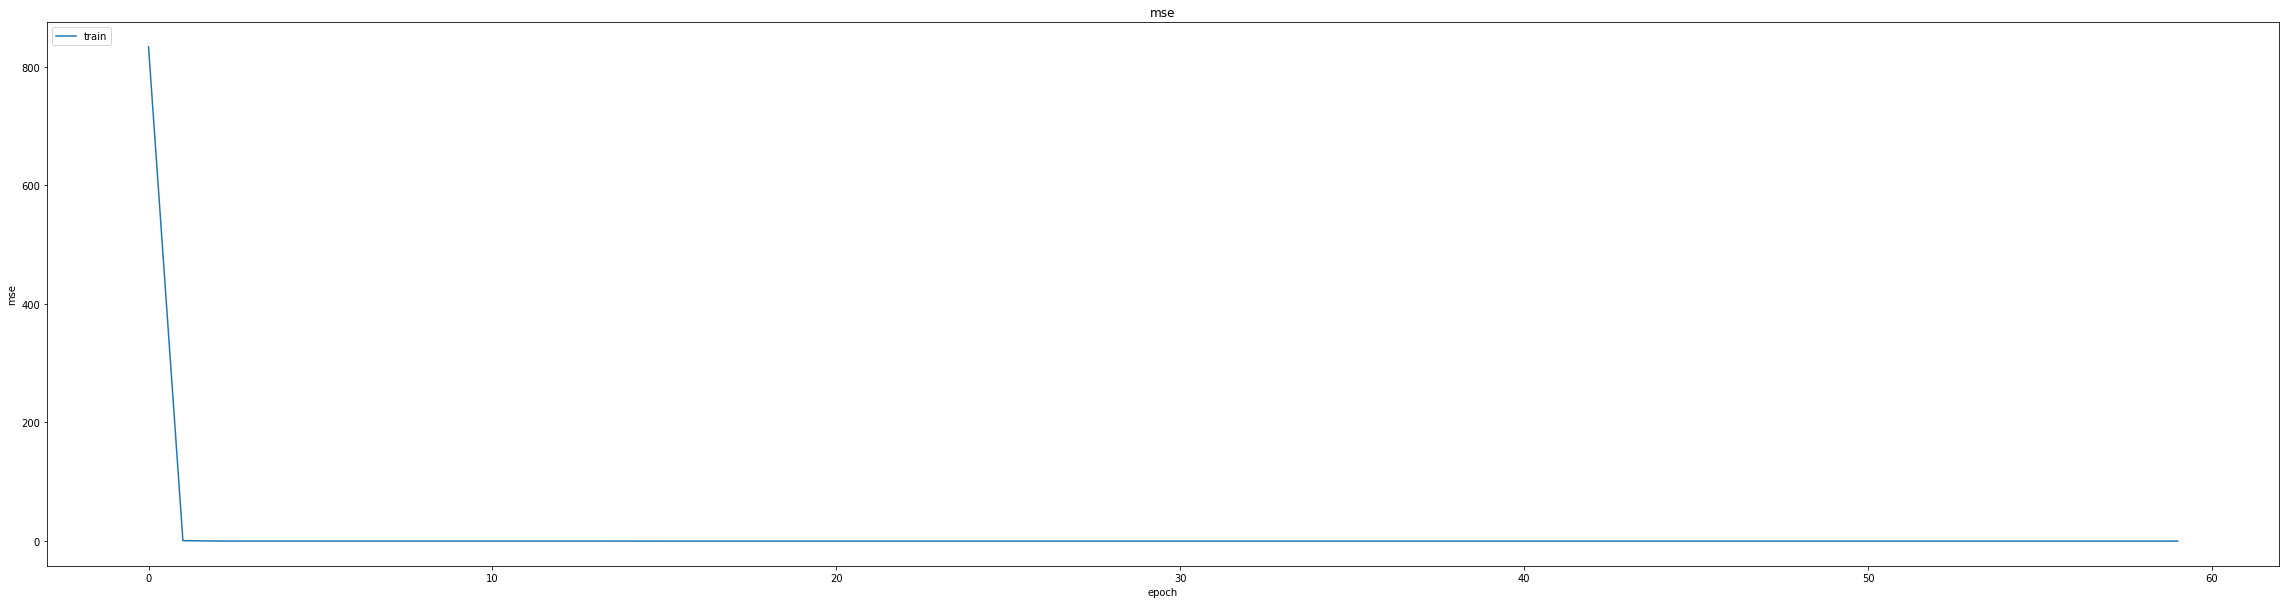

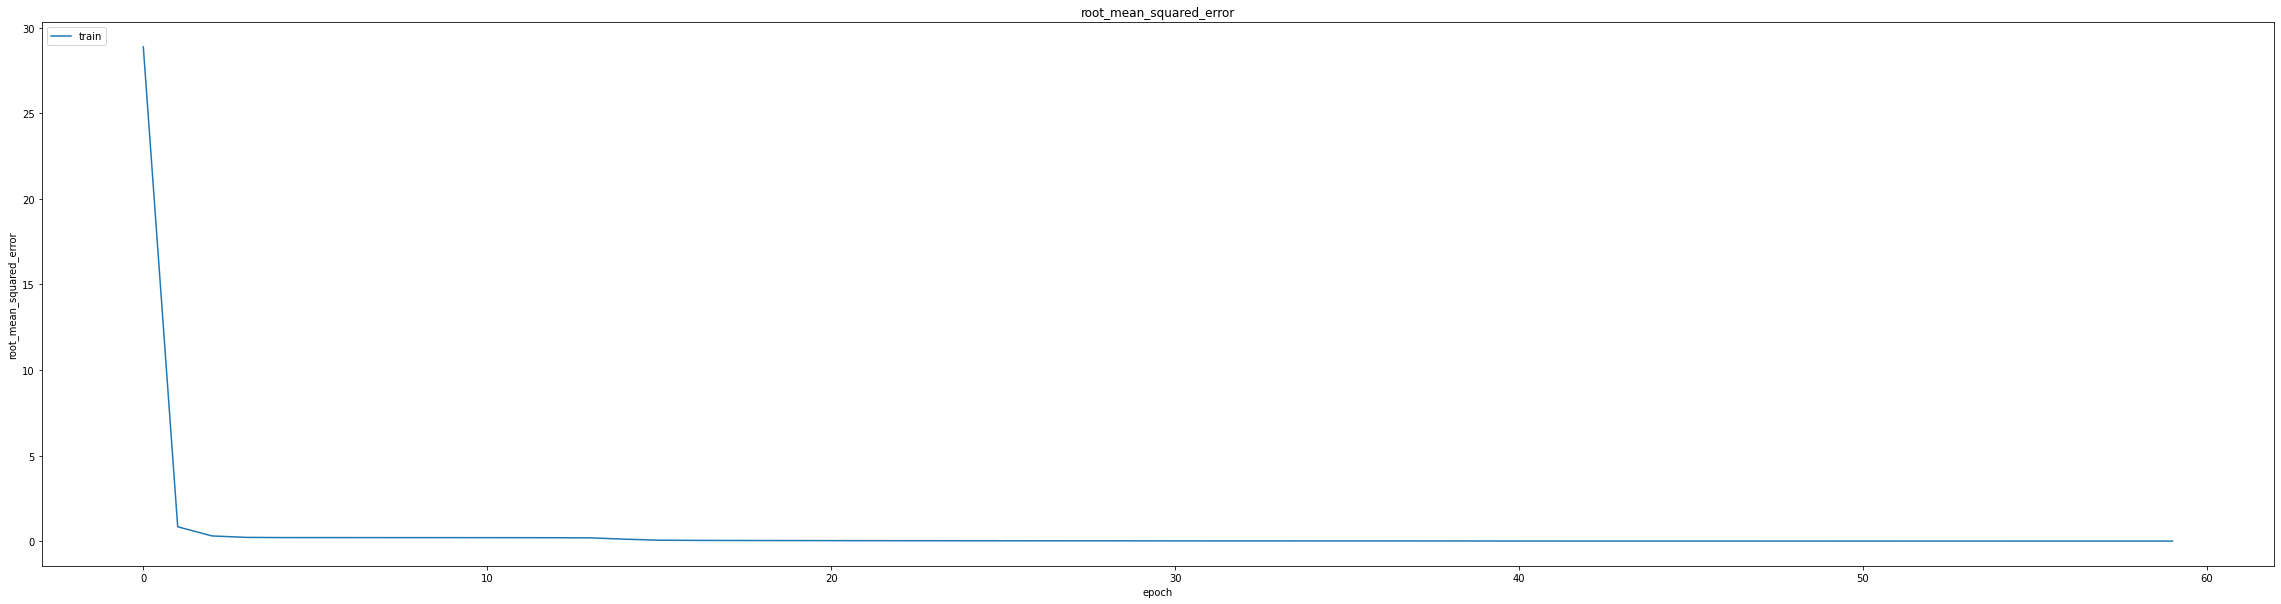

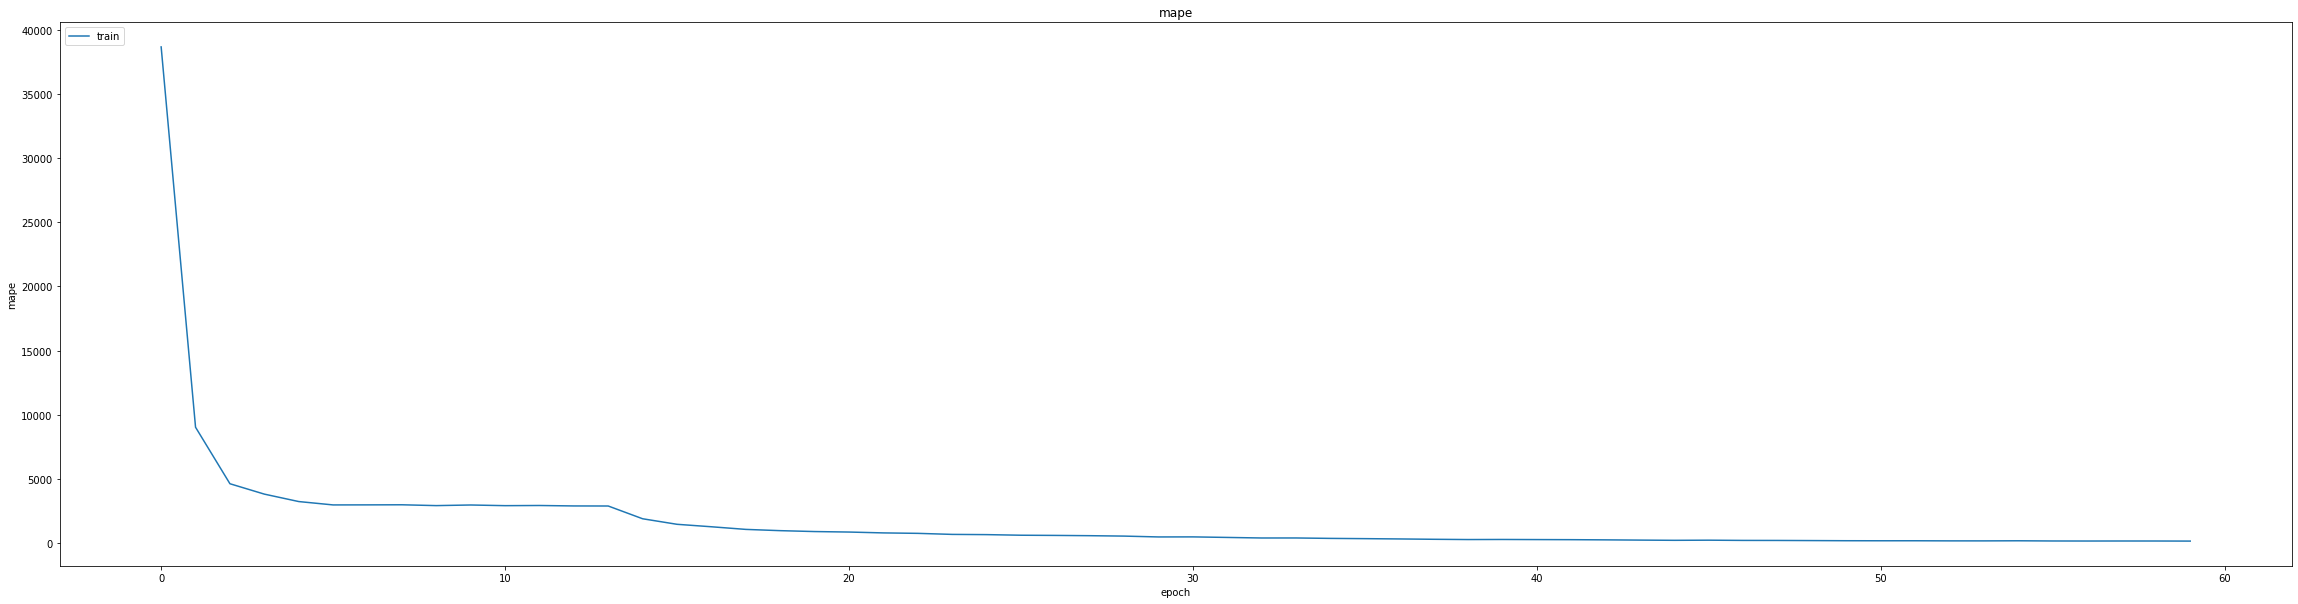

In [58]:
thesis.SummarizeHistory(history)

In [59]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007542399689555168
0.010415120050311089
1391/1391 [==============================] - 5s 3ms/step
0.9945927668534507


In [60]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [61]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
347/347 [==============================] - ETA: 0s - loss: 2.7018e-04 - mae: 0.0074 - mse: 2.7018e-04 - root_mean_squared_error: 0.0164 - mape: 199.9394
Epoch 1: val_mse did not improve from 0.00011
347/347 [==============================] - 9s 19ms/step - loss: 2.7018e-04 - mae: 0.0074 - mse: 2.7018e-04 - root_mean_squared_error: 0.0164 - mape: 199.9394 - val_loss: 1.3622e-04 - val_mae: 0.0086 - val_mse: 1.3622e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 938.7426 - lr: 0.0010
Epoch 2/20
345/347 [============================>.] - ETA: 0s - loss: 2.9106e-05 - mae: 0.0041 - mse: 2.9106e-05 - root_mean_squared_error: 0.0054 - mape: 172.1237
Epoch 2: val_mse did not improve from 0.00011
347/347 [==============================] - 6s 17ms/step - loss: 2.9090e-05 - mae: 0.0041 - mse: 2.9090e-05 - root_mean_squared_error: 0.0054 - mape: 171.1830 - val_loss: 1.2884e-04 - val_mae: 0.0084 - val_mse: 1.2884e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 716.5833 - lr: 0

347/347 [==============================] - 14s 42ms/step - loss: 2.8317e-05 - mae: 0.0040 - mse: 2.8317e-05 - root_mean_squared_error: 0.0053 - mape: 140.8296 - val_loss: 9.7442e-05 - val_mae: 0.0071 - val_mse: 9.7442e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 821.7991 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
345/347 [============================>.] - ETA: 0s - loss: 2.7340e-05 - mae: 0.0039 - mse: 2.7340e-05 - root_mean_squared_error: 0.0052 - mape: 130.4055
Epoch 5: val_mse did not improve from 0.00010
347/347 [==============================] - 6s 17ms/step - loss: 2.7365e-05 - mae: 0.0039 - mse: 2.7365e-05 - root_mean_squared_error: 0.0052 - mape: 129.6945 - val_loss: 2.3647e-04 - val_mae: 0.0120 - val_mse: 2.3647e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 813.4429 - lr: 8.1000e-04
Epoch 6/20
345/347 [============================>.] - ETA: 0s - loss: 3.7718e-05 - mae: 0.0045 - mse: 3.7718e-05 - root_mean_squared_error: 0.0061 - mape: 131.

347/347 [==============================] - 13s 38ms/step - loss: 2.3075e-05 - mae: 0.0036 - mse: 2.3075e-05 - root_mean_squared_error: 0.0048 - mape: 117.2574 - val_loss: 8.9712e-05 - val_mae: 0.0069 - val_mse: 8.9712e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 810.9867 - lr: 6.5610e-04
Epoch 10/20
346/347 [============================>.] - ETA: 0s - loss: 2.3623e-05 - mae: 0.0037 - mse: 2.3623e-05 - root_mean_squared_error: 0.0049 - mape: 112.8721
Epoch 10: val_mse did not improve from 0.00009
347/347 [==============================] - 6s 17ms/step - loss: 2.3603e-05 - mae: 0.0037 - mse: 2.3603e-05 - root_mean_squared_error: 0.0049 - mape: 112.5764 - val_loss: 1.2111e-04 - val_mae: 0.0083 - val_mse: 1.2111e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 794.2928 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
347/347 [==============================] - ETA: 0s - loss: 2.1083e-05 - mae: 0.0035 - mse: 2.1083e-05 - root_mean_squared_error: 0.0046 - mape: 1

347/347 [==============================] - 15s 43ms/step - loss: 2.1083e-05 - mae: 0.0035 - mse: 2.1083e-05 - root_mean_squared_error: 0.0046 - mape: 111.3683 - val_loss: 8.3082e-05 - val_mae: 0.0066 - val_mse: 8.3082e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 782.6974 - lr: 5.9049e-04
Epoch 12/20
347/347 [==============================] - ETA: 0s - loss: 2.3396e-05 - mae: 0.0036 - mse: 2.3396e-05 - root_mean_squared_error: 0.0048 - mape: 109.4671
Epoch 12: val_mse did not improve from 0.00008
347/347 [==============================] - 6s 17ms/step - loss: 2.3396e-05 - mae: 0.0036 - mse: 2.3396e-05 - root_mean_squared_error: 0.0048 - mape: 109.4671 - val_loss: 1.0587e-04 - val_mae: 0.0077 - val_mse: 1.0587e-04 - val_root_mean_squared_error: 0.0103 - val_mape: 779.9258 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
345/347 [============================>.] - ETA: 0s - loss: 1.9561e-05 - mae: 0.0033 - mse: 1.9561e-05 - root_mean_squared_error: 0.0044 - mape: 1

347/347 [==============================] - 14s 39ms/step - loss: 1.6445e-05 - mae: 0.0030 - mse: 1.6445e-05 - root_mean_squared_error: 0.0041 - mape: 102.7280 - val_loss: 8.1175e-05 - val_mae: 0.0066 - val_mse: 8.1175e-05 - val_root_mean_squared_error: 0.0090 - val_mape: 686.7799 - lr: 3.8742e-04
Epoch 20/20
344/347 [============================>.] - ETA: 0s - loss: 1.4145e-05 - mae: 0.0028 - mse: 1.4145e-05 - root_mean_squared_error: 0.0038 - mape: 101.2966
Epoch 20: val_mse improved from 0.00008 to 0.00007, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 1.4144e-05 - mae: 0.0028 - mse: 1.4144e-05 - root_mean_squared_error: 0.0038 - mape: 100.4557 - val_loss: 7.1028e-05 - val_mae: 0.0060 - val_mse: 7.1028e-05 - val_root_mean_squared_error: 0.0084 - val_mape: 696.9172 - lr: 3.8742e-04


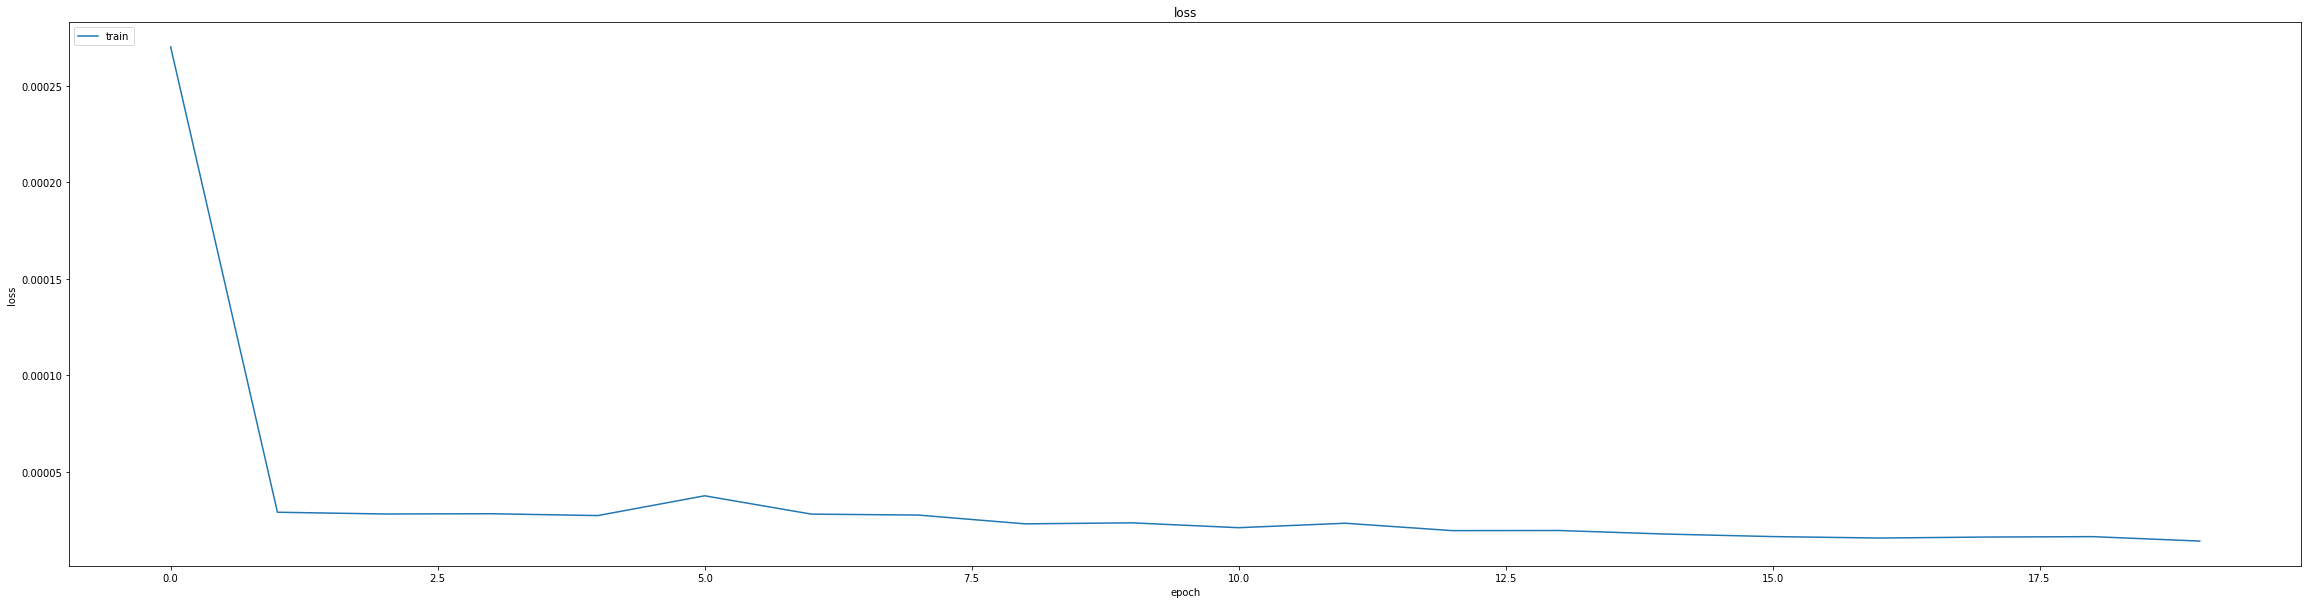

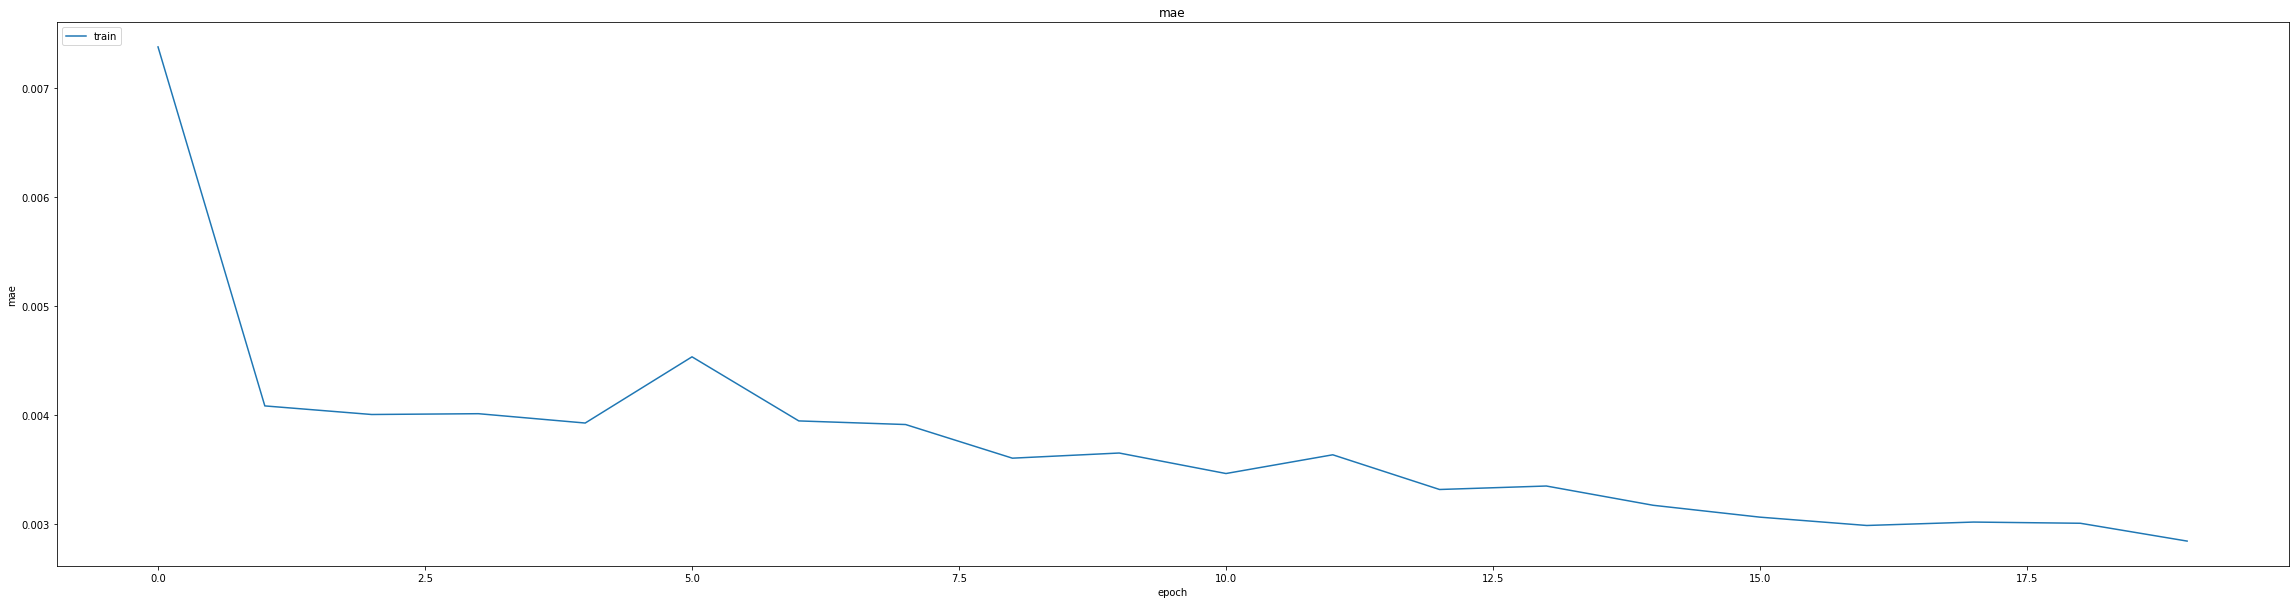

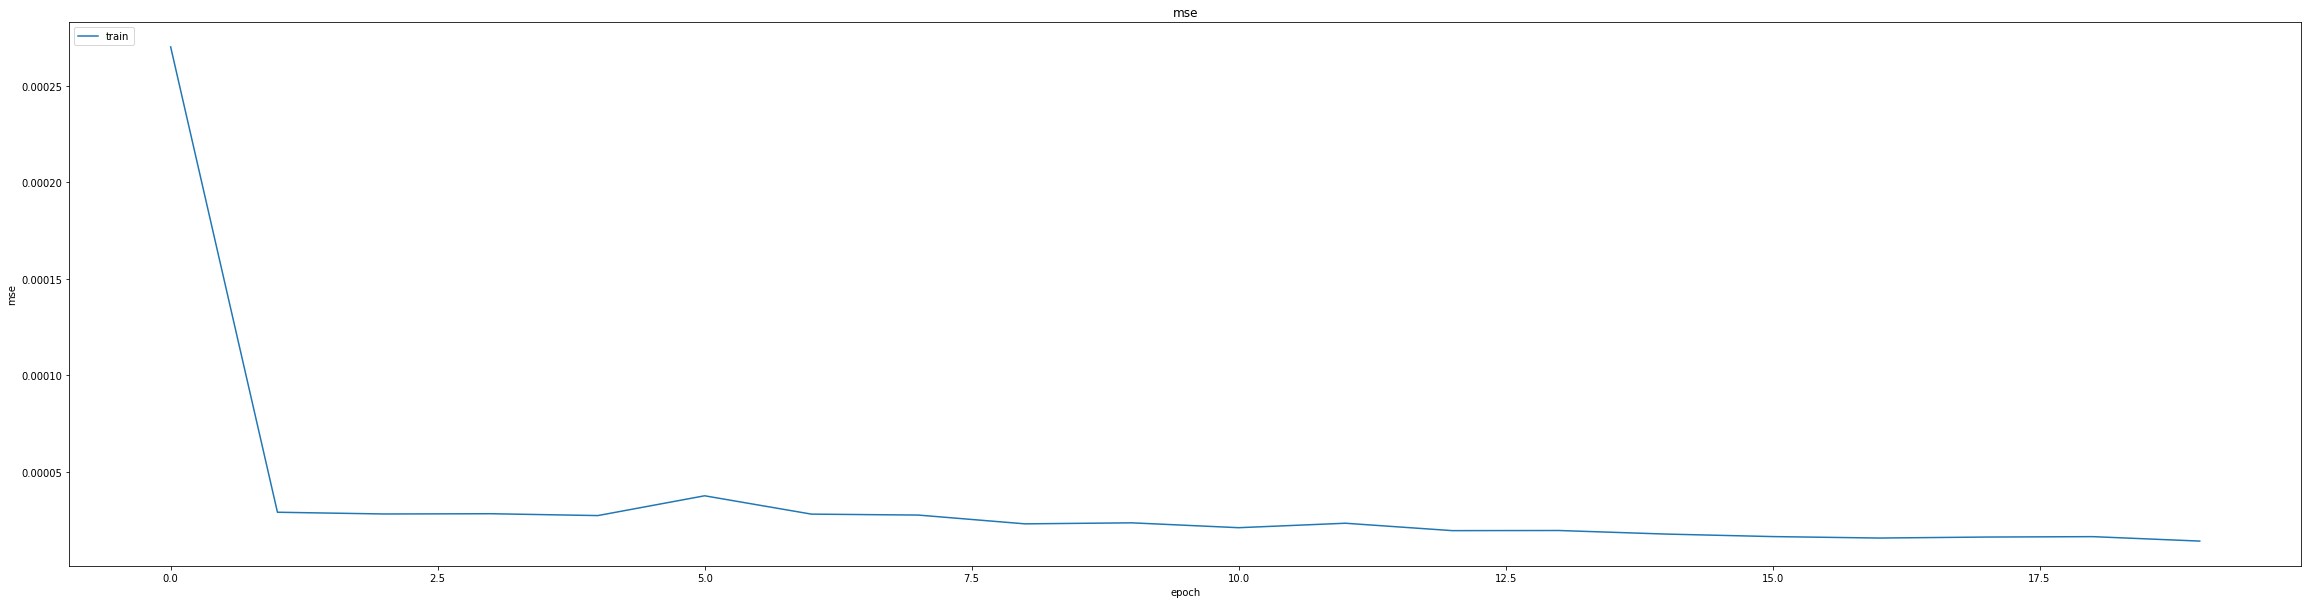

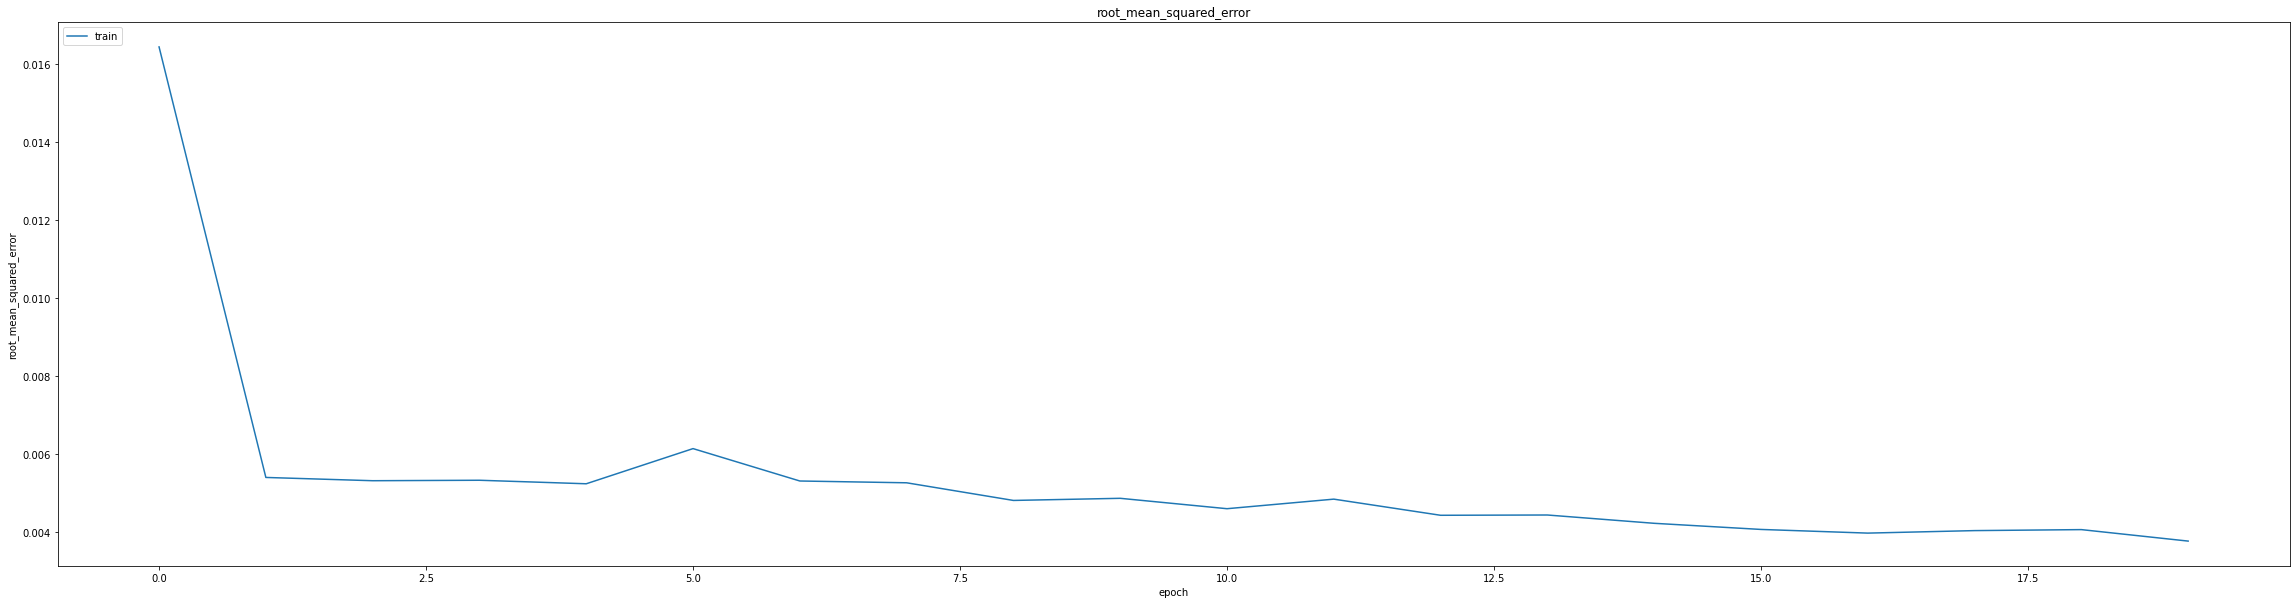

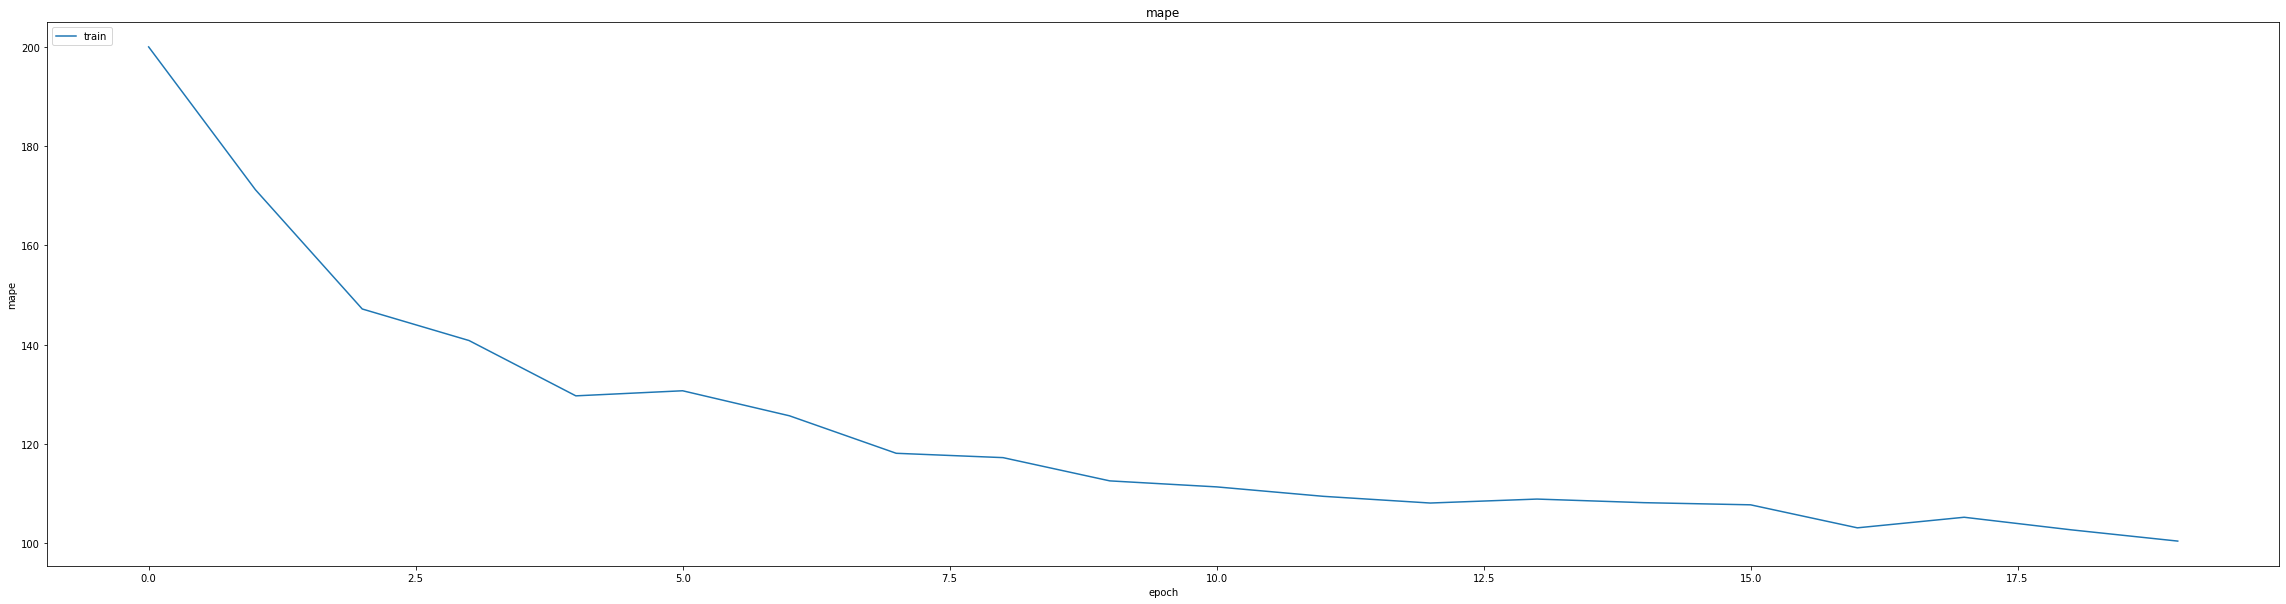

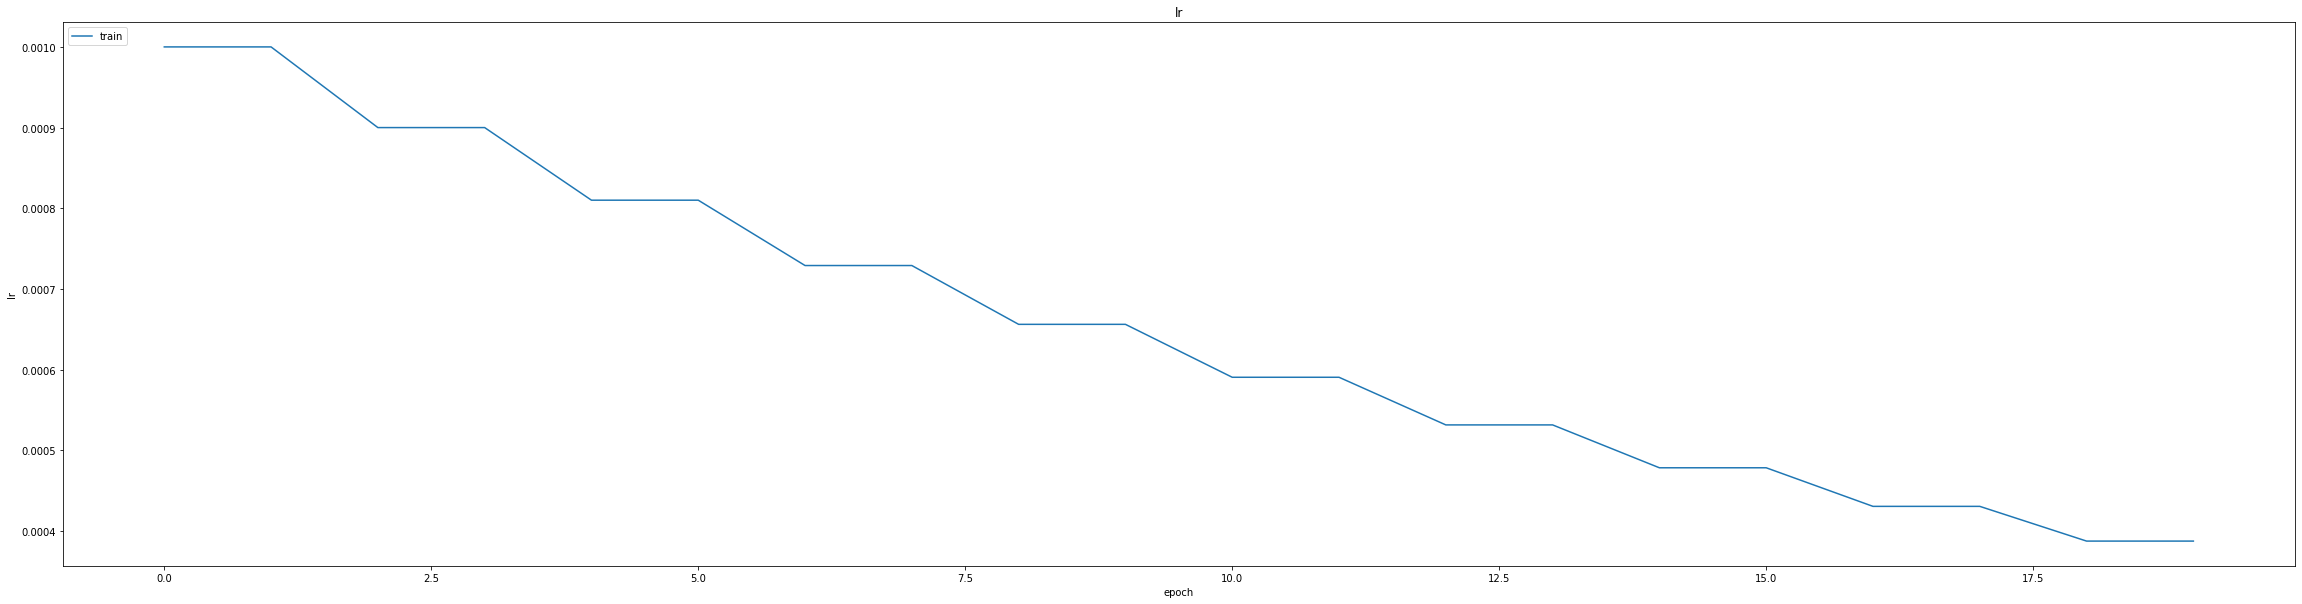

In [62]:
thesis.SummarizeHistory(history)

In [63]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006032814271748066
0.008427782915532589
1391/1391 [==============================] - 6s 4ms/step
0.9982119797012982


1391/1391 [==============================] - 5s 3ms/step


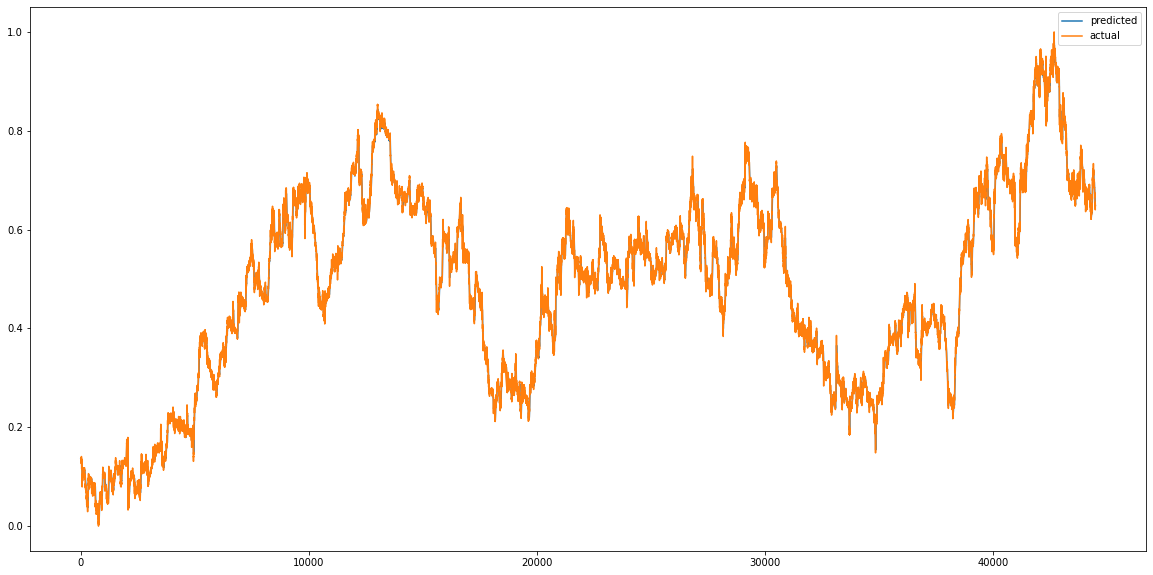

In [64]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


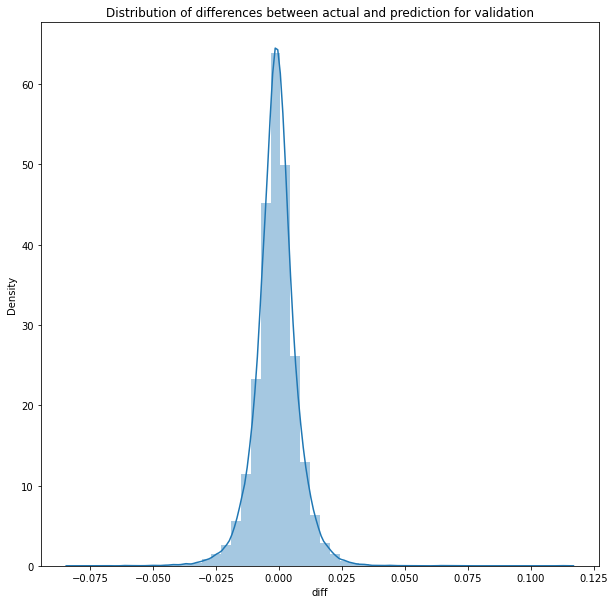

In [65]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 5s 3ms/step


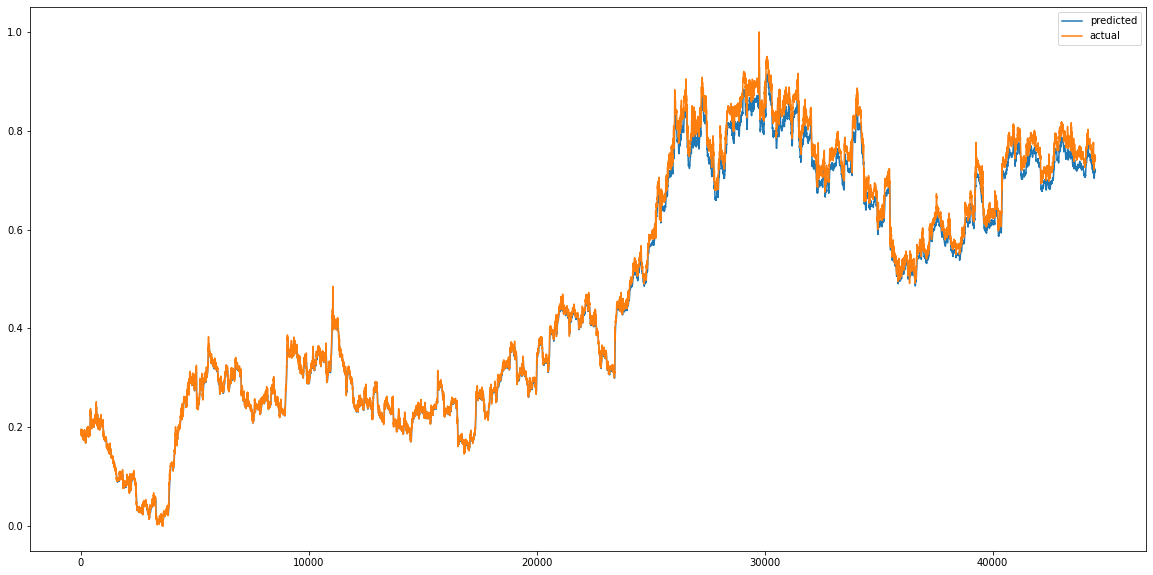

In [66]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


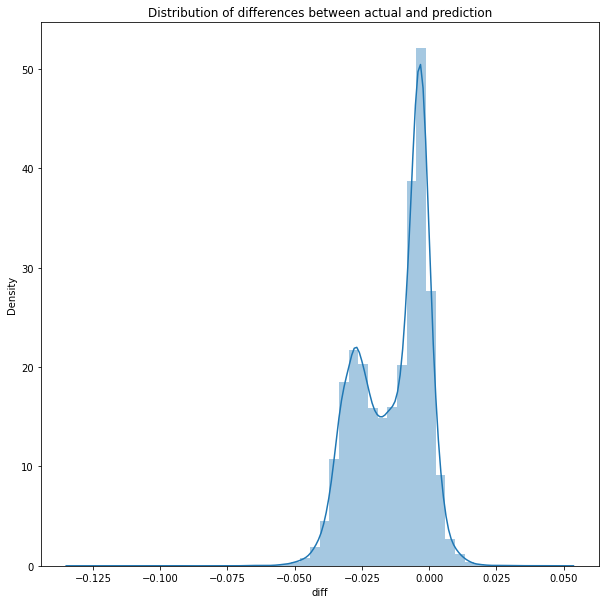

In [67]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00033854921718119653
RMSE :  0.018399706986286398
MAE :  0.014046717629752176
1391/1391 [==============================] - 5s 3ms/step
R2_Score  : 0.9946145517787399


count    44506.000000
mean        -0.013319
std          0.012695
min         -0.130467
25%         -0.024436
50%         -0.009326
75%         -0.003105
max          0.049195
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [69]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [70]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
345/347 [============================>.] - ETA: 0s - loss: 807.6878 - mae: 6.8000 - mse: 807.6878 - root_mean_squared_error: 28.4198 - mape: 10535.1631
Epoch 1: val_mse improved from inf to 0.13706, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 16s 37ms/step - loss: 803.2199 - mae: 6.7644 - mse: 803.2199 - root_mean_squared_error: 28.3411 - mape: 10478.4619 - val_loss: 0.1371 - val_mae: 0.2876 - val_mse: 0.1371 - val_root_mean_squared_error: 0.3702 - val_mape: 16390.9551
Epoch 2/60
345/347 [============================>.] - ETA: 0s - loss: 0.1377 - mae: 0.2707 - mse: 0.1377 - root_mean_squared_error: 0.3711 - mape: 5029.4927
Epoch 2: val_mse improved from 0.13706 to 0.04145, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 0.1373 - mae: 0.2704 - mse: 0.1373 - root_mean_squared_error: 0.3705 - mape: 5002.7280 - val_loss: 0.0414 - val_mae: 0.1651 - val_mse: 0.0414 - val_root_mean_squared_error: 0.2036 - val_mape: 11342.8330
Epoch 3/60
346/347 [============================>.] - ETA: 0s - loss: 0.0529 - mae: 0.1916 - mse: 0.0529 - root_mean_squared_error: 0.2301 - mape: 3602.0625
Epoch 3: val_mse did not improve from 0.04145
347/347 [==============================] - 5s 15ms/step - loss: 0.0529 - mae: 0.1916 - mse: 0.0529 - root_mean_squared_error: 0.2300 - mape: 3592.7888 - val_loss: 0.0449 - val_mae: 0.1780 - val_mse: 0.0449 - val_root_mean_squared_error: 0.2119 - val_mape: 9516.0391
Epoch 4/60
346/347 [============================>.] - ETA: 0s - loss: 0.0465 - mae: 0.1797 - mse: 0.0465 - root_mean_squared_error: 0.2157 - mape: 3254.2922
Epoch 4: val_mse did not improve from 0.04145
347/347 [==============================] - 5s 15ms/step - lo

347/347 [==============================] - 12s 36ms/step - loss: 0.0392 - mae: 0.1641 - mse: 0.0392 - root_mean_squared_error: 0.1980 - mape: 2810.2258 - val_loss: 0.0397 - val_mae: 0.1674 - val_mse: 0.0397 - val_root_mean_squared_error: 0.1992 - val_mape: 8197.2236
Epoch 12/60
344/347 [============================>.] - ETA: 0s - loss: 0.0323 - mae: 0.1476 - mse: 0.0323 - root_mean_squared_error: 0.1797 - mape: 2764.6252
Epoch 12: val_mse improved from 0.03969 to 0.02844, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 36ms/step - loss: 0.0322 - mae: 0.1474 - mse: 0.0322 - root_mean_squared_error: 0.1795 - mape: 2742.2358 - val_loss: 0.0284 - val_mae: 0.1393 - val_mse: 0.0284 - val_root_mean_squared_error: 0.1687 - val_mape: 7571.2988
Epoch 13/60
347/347 [==============================] - ETA: 0s - loss: 0.0256 - mae: 0.1294 - mse: 0.0256 - root_mean_squared_error: 0.1600 - mape: 2573.8550
Epoch 13: val_mse improved from 0.02844 to 0.02386, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 0.0256 - mae: 0.1294 - mse: 0.0256 - root_mean_squared_error: 0.1600 - mape: 2573.8550 - val_loss: 0.0239 - val_mae: 0.1245 - val_mse: 0.0239 - val_root_mean_squared_error: 0.1545 - val_mape: 7263.7246
Epoch 14/60
345/347 [============================>.] - ETA: 0s - loss: 0.0224 - mae: 0.1185 - mse: 0.0224 - root_mean_squared_error: 0.1497 - mape: 2559.7087
Epoch 14: val_mse improved from 0.02386 to 0.02050, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 36ms/step - loss: 0.0224 - mae: 0.1185 - mse: 0.0224 - root_mean_squared_error: 0.1497 - mape: 2546.0864 - val_loss: 0.0205 - val_mae: 0.1110 - val_mse: 0.0205 - val_root_mean_squared_error: 0.1432 - val_mape: 7107.3047
Epoch 15/60
344/347 [============================>.] - ETA: 0s - loss: 0.0196 - mae: 0.1071 - mse: 0.0196 - root_mean_squared_error: 0.1401 - mape: 2489.2212
Epoch 15: val_mse improved from 0.02050 to 0.01733, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0196 - mae: 0.1070 - mse: 0.0196 - root_mean_squared_error: 0.1401 - mape: 2469.0913 - val_loss: 0.0173 - val_mae: 0.0968 - val_mse: 0.0173 - val_root_mean_squared_error: 0.1316 - val_mape: 6934.4453
Epoch 16/60
345/347 [============================>.] - ETA: 0s - loss: 0.0164 - mae: 0.0940 - mse: 0.0164 - root_mean_squared_error: 0.1280 - mape: 2365.3928
Epoch 16: val_mse improved from 0.01733 to 0.01258, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0164 - mae: 0.0940 - mse: 0.0164 - root_mean_squared_error: 0.1280 - mape: 2352.8284 - val_loss: 0.0126 - val_mae: 0.0778 - val_mse: 0.0126 - val_root_mean_squared_error: 0.1122 - val_mape: 6586.4219
Epoch 17/60
344/347 [============================>.] - ETA: 0s - loss: 0.0107 - mae: 0.0728 - mse: 0.0107 - root_mean_squared_error: 0.1035 - mape: 1991.7438
Epoch 17: val_mse improved from 0.01258 to 0.00566, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 36ms/step - loss: 0.0107 - mae: 0.0727 - mse: 0.0107 - root_mean_squared_error: 0.1034 - mape: 1975.5684 - val_loss: 0.0057 - val_mae: 0.0499 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0752 - val_mape: 5679.4565
Epoch 18/60
347/347 [==============================] - ETA: 0s - loss: 0.0056 - mae: 0.0493 - mse: 0.0056 - root_mean_squared_error: 0.0750 - mape: 1852.3339
Epoch 18: val_mse improved from 0.00566 to 0.00371, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0056 - mae: 0.0493 - mse: 0.0056 - root_mean_squared_error: 0.0750 - mape: 1852.3339 - val_loss: 0.0037 - val_mae: 0.0396 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0609 - val_mape: 5131.9673
Epoch 19/60
347/347 [==============================] - ETA: 0s - loss: 0.0033 - mae: 0.0346 - mse: 0.0033 - root_mean_squared_error: 0.0577 - mape: 1721.3947
Epoch 19: val_mse improved from 0.00371 to 0.00229, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0033 - mae: 0.0346 - mse: 0.0033 - root_mean_squared_error: 0.0577 - mape: 1721.3947 - val_loss: 0.0023 - val_mae: 0.0341 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0479 - val_mape: 4300.4507
Epoch 20/60
346/347 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0264 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 1446.4363
Epoch 20: val_mse improved from 0.00229 to 0.00182, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 36ms/step - loss: 0.0021 - mae: 0.0264 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 1442.7008 - val_loss: 0.0018 - val_mae: 0.0311 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0426 - val_mape: 3907.5466
Epoch 21/60
346/347 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0220 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 1206.4219
Epoch 21: val_mse improved from 0.00182 to 0.00148, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0015 - mae: 0.0220 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 1203.3237 - val_loss: 0.0015 - val_mae: 0.0275 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0384 - val_mape: 3449.9553
Epoch 22/60
346/347 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0198 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 1119.3845
Epoch 22: val_mse improved from 0.00148 to 0.00133, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0012 - mae: 0.0198 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 1116.4899 - val_loss: 0.0013 - val_mae: 0.0261 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0365 - val_mape: 3255.7847
Epoch 23/60
347/347 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0183 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 1056.6680
Epoch 23: val_mse improved from 0.00133 to 0.00130, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 36ms/step - loss: 0.0011 - mae: 0.0183 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 1056.6680 - val_loss: 0.0013 - val_mae: 0.0260 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0361 - val_mape: 3123.5935
Epoch 24/60
346/347 [============================>.] - ETA: 0s - loss: 9.1390e-04 - mae: 0.0171 - mse: 9.1390e-04 - root_mean_squared_error: 0.0302 - mape: 1025.7380
Epoch 24: val_mse improved from 0.00130 to 0.00119, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 9.1408e-04 - mae: 0.0172 - mse: 9.1408e-04 - root_mean_squared_error: 0.0302 - mape: 1023.0996 - val_loss: 0.0012 - val_mae: 0.0248 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 2993.9895
Epoch 25/60
346/347 [============================>.] - ETA: 0s - loss: 7.7468e-04 - mae: 0.0158 - mse: 7.7468e-04 - root_mean_squared_error: 0.0278 - mape: 989.9521 
Epoch 25: val_mse improved from 0.00119 to 0.00104, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 36ms/step - loss: 7.7434e-04 - mae: 0.0158 - mse: 7.7434e-04 - root_mean_squared_error: 0.0278 - mape: 987.3832 - val_loss: 0.0010 - val_mae: 0.0227 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0323 - val_mape: 2826.5510
Epoch 26/60
345/347 [============================>.] - ETA: 0s - loss: 6.2097e-04 - mae: 0.0143 - mse: 6.2097e-04 - root_mean_squared_error: 0.0249 - mape: 917.6249
Epoch 26: val_mse improved from 0.00104 to 0.00096, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 6.2081e-04 - mae: 0.0143 - mse: 6.2081e-04 - root_mean_squared_error: 0.0249 - mape: 912.6971 - val_loss: 9.6009e-04 - val_mae: 0.0214 - val_mse: 9.6009e-04 - val_root_mean_squared_error: 0.0310 - val_mape: 2777.9451
Epoch 27/60
344/347 [============================>.] - ETA: 0s - loss: 5.0502e-04 - mae: 0.0131 - mse: 5.0502e-04 - root_mean_squared_error: 0.0225 - mape: 842.2084
Epoch 27: val_mse improved from 0.00096 to 0.00091, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 36ms/step - loss: 5.0467e-04 - mae: 0.0131 - mse: 5.0467e-04 - root_mean_squared_error: 0.0225 - mape: 835.2916 - val_loss: 9.0763e-04 - val_mae: 0.0206 - val_mse: 9.0763e-04 - val_root_mean_squared_error: 0.0301 - val_mape: 2623.5029
Epoch 28/60
347/347 [==============================] - ETA: 0s - loss: 4.1704e-04 - mae: 0.0121 - mse: 4.1704e-04 - root_mean_squared_error: 0.0204 - mape: 758.0658
Epoch 28: val_mse improved from 0.00091 to 0.00089, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 36ms/step - loss: 4.1704e-04 - mae: 0.0121 - mse: 4.1704e-04 - root_mean_squared_error: 0.0204 - mape: 758.0658 - val_loss: 8.8609e-04 - val_mae: 0.0202 - val_mse: 8.8609e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 2561.5679
Epoch 29/60
344/347 [============================>.] - ETA: 0s - loss: 3.1066e-04 - mae: 0.0110 - mse: 3.1066e-04 - root_mean_squared_error: 0.0176 - mape: 677.2695
Epoch 29: val_mse improved from 0.00089 to 0.00080, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 3.1011e-04 - mae: 0.0110 - mse: 3.1011e-04 - root_mean_squared_error: 0.0176 - mape: 671.6660 - val_loss: 7.9689e-04 - val_mae: 0.0191 - val_mse: 7.9689e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 2317.1946
Epoch 30/60
347/347 [==============================] - ETA: 0s - loss: 2.5022e-04 - mae: 0.0102 - mse: 2.5022e-04 - root_mean_squared_error: 0.0158 - mape: 607.1432
Epoch 30: val_mse improved from 0.00080 to 0.00074, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 36ms/step - loss: 2.5022e-04 - mae: 0.0102 - mse: 2.5022e-04 - root_mean_squared_error: 0.0158 - mape: 607.1432 - val_loss: 7.4120e-04 - val_mae: 0.0183 - val_mse: 7.4120e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 2085.0107
Epoch 31/60
346/347 [============================>.] - ETA: 0s - loss: 2.1232e-04 - mae: 0.0095 - mse: 2.1232e-04 - root_mean_squared_error: 0.0146 - mape: 576.1673
Epoch 31: val_mse did not improve from 0.00074
347/347 [==============================] - 5s 15ms/step - loss: 2.1232e-04 - mae: 0.0095 - mse: 2.1232e-04 - root_mean_squared_error: 0.0146 - mape: 574.6743 - val_loss: 7.6465e-04 - val_mae: 0.0184 - val_mse: 7.6465e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 1933.7239
Epoch 32/60
347/347 [==============================] - ETA: 0s - loss: 1.8055e-04 - mae: 0.0089 - mse: 1.8055e-04 - root_mean_squared_error: 0.0134 - mape: 530.1016
Epoch 32: val_mse improved from 0.00074 to 0.00049, saving m

347/347 [==============================] - 12s 35ms/step - loss: 1.8055e-04 - mae: 0.0089 - mse: 1.8055e-04 - root_mean_squared_error: 0.0134 - mape: 530.1016 - val_loss: 4.8787e-04 - val_mae: 0.0152 - val_mse: 4.8787e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 1797.3529
Epoch 33/60
345/347 [============================>.] - ETA: 0s - loss: 1.4593e-04 - mae: 0.0083 - mse: 1.4593e-04 - root_mean_squared_error: 0.0121 - mape: 486.6111
Epoch 33: val_mse did not improve from 0.00049
347/347 [==============================] - 5s 15ms/step - loss: 1.4585e-04 - mae: 0.0083 - mse: 1.4585e-04 - root_mean_squared_error: 0.0121 - mape: 483.9682 - val_loss: 6.0868e-04 - val_mae: 0.0171 - val_mse: 6.0868e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 1592.0823
Epoch 34/60
347/347 [==============================] - ETA: 0s - loss: 1.2081e-04 - mae: 0.0077 - mse: 1.2081e-04 - root_mean_squared_error: 0.0110 - mape: 438.9595
Epoch 34: val_mse improved from 0.00049 to 0.00034, saving m

347/347 [==============================] - 12s 34ms/step - loss: 1.2081e-04 - mae: 0.0077 - mse: 1.2081e-04 - root_mean_squared_error: 0.0110 - mape: 438.9595 - val_loss: 3.3840e-04 - val_mae: 0.0132 - val_mse: 3.3840e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 1448.0619
Epoch 35/60
346/347 [============================>.] - ETA: 0s - loss: 1.0220e-04 - mae: 0.0072 - mse: 1.0220e-04 - root_mean_squared_error: 0.0101 - mape: 377.7299
Epoch 35: val_mse improved from 0.00034 to 0.00031, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 36ms/step - loss: 1.0220e-04 - mae: 0.0072 - mse: 1.0220e-04 - root_mean_squared_error: 0.0101 - mape: 376.7509 - val_loss: 3.1467e-04 - val_mae: 0.0129 - val_mse: 3.1467e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 1369.6075
Epoch 36/60
347/347 [==============================] - ETA: 0s - loss: 8.8400e-05 - mae: 0.0068 - mse: 8.8400e-05 - root_mean_squared_error: 0.0094 - mape: 373.4516
Epoch 36: val_mse improved from 0.00031 to 0.00027, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 36ms/step - loss: 8.8400e-05 - mae: 0.0068 - mse: 8.8400e-05 - root_mean_squared_error: 0.0094 - mape: 373.4516 - val_loss: 2.6764e-04 - val_mae: 0.0119 - val_mse: 2.6764e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 1312.9547
Epoch 37/60
347/347 [==============================] - ETA: 0s - loss: 8.1596e-05 - mae: 0.0065 - mse: 8.1596e-05 - root_mean_squared_error: 0.0090 - mape: 343.0886
Epoch 37: val_mse did not improve from 0.00027
347/347 [==============================] - 5s 15ms/step - loss: 8.1596e-05 - mae: 0.0065 - mse: 8.1596e-05 - root_mean_squared_error: 0.0090 - mape: 343.0886 - val_loss: 2.8360e-04 - val_mae: 0.0123 - val_mse: 2.8360e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 1289.0548
Epoch 38/60
345/347 [============================>.] - ETA: 0s - loss: 7.3358e-05 - mae: 0.0062 - mse: 7.3358e-05 - root_mean_squared_error: 0.0086 - mape: 318.4494
Epoch 38: val_mse did not improve from 0.00027
347/347 [====

347/347 [==============================] - 12s 34ms/step - loss: 6.9410e-05 - mae: 0.0061 - mse: 6.9410e-05 - root_mean_squared_error: 0.0083 - mape: 311.7023 - val_loss: 2.2612e-04 - val_mae: 0.0110 - val_mse: 2.2612e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 1161.2253
Epoch 40/60
347/347 [==============================] - ETA: 0s - loss: 6.5148e-05 - mae: 0.0059 - mse: 6.5148e-05 - root_mean_squared_error: 0.0081 - mape: 298.5286
Epoch 40: val_mse did not improve from 0.00023
347/347 [==============================] - 5s 15ms/step - loss: 6.5148e-05 - mae: 0.0059 - mse: 6.5148e-05 - root_mean_squared_error: 0.0081 - mape: 298.5286 - val_loss: 2.4823e-04 - val_mae: 0.0116 - val_mse: 2.4823e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 1151.1687
Epoch 41/60
344/347 [============================>.] - ETA: 0s - loss: 5.9412e-05 - mae: 0.0056 - mse: 5.9412e-05 - root_mean_squared_error: 0.0077 - mape: 294.0299
Epoch 41: val_mse improved from 0.00023 to 0.00021, saving m

347/347 [==============================] - 12s 36ms/step - loss: 5.9373e-05 - mae: 0.0056 - mse: 5.9373e-05 - root_mean_squared_error: 0.0077 - mape: 291.5989 - val_loss: 2.1224e-04 - val_mae: 0.0106 - val_mse: 2.1224e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 1093.3773
Epoch 42/60
344/347 [============================>.] - ETA: 0s - loss: 5.5169e-05 - mae: 0.0054 - mse: 5.5169e-05 - root_mean_squared_error: 0.0074 - mape: 276.9062
Epoch 42: val_mse improved from 0.00021 to 0.00021, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 5.5102e-05 - mae: 0.0054 - mse: 5.5102e-05 - root_mean_squared_error: 0.0074 - mape: 274.6039 - val_loss: 2.0763e-04 - val_mae: 0.0105 - val_mse: 2.0763e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 1040.1156
Epoch 43/60
346/347 [============================>.] - ETA: 0s - loss: 5.1586e-05 - mae: 0.0053 - mse: 5.1586e-05 - root_mean_squared_error: 0.0072 - mape: 270.5858
Epoch 43: val_mse did not improve from 0.00021
347/347 [==============================] - 5s 16ms/step - loss: 5.1552e-05 - mae: 0.0052 - mse: 5.1552e-05 - root_mean_squared_error: 0.0072 - mape: 269.8756 - val_loss: 2.0838e-04 - val_mae: 0.0105 - val_mse: 2.0838e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 1018.5085
Epoch 44/60
344/347 [============================>.] - ETA: 0s - loss: 4.6882e-05 - mae: 0.0050 - mse: 4.6882e-05 - root_mean_squared_error: 0.0068 - mape: 255.3803
Epoch 44: val_mse did not improve from 0.00021
347/347 [====

347/347 [==============================] - 12s 34ms/step - loss: 4.2998e-05 - mae: 0.0048 - mse: 4.2998e-05 - root_mean_squared_error: 0.0066 - mape: 241.5757 - val_loss: 1.9042e-04 - val_mae: 0.0103 - val_mse: 1.9042e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 970.8895
Epoch 47/60
347/347 [==============================] - ETA: 0s - loss: 3.9864e-05 - mae: 0.0046 - mse: 3.9864e-05 - root_mean_squared_error: 0.0063 - mape: 236.8735
Epoch 47: val_mse improved from 0.00019 to 0.00018, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 3.9864e-05 - mae: 0.0046 - mse: 3.9864e-05 - root_mean_squared_error: 0.0063 - mape: 236.8735 - val_loss: 1.8303e-04 - val_mae: 0.0098 - val_mse: 1.8303e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 948.8534
Epoch 48/60
344/347 [============================>.] - ETA: 0s - loss: 3.7741e-05 - mae: 0.0045 - mse: 3.7741e-05 - root_mean_squared_error: 0.0061 - mape: 224.2224
Epoch 48: val_mse improved from 0.00018 to 0.00017, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 3.7707e-05 - mae: 0.0045 - mse: 3.7707e-05 - root_mean_squared_error: 0.0061 - mape: 222.3607 - val_loss: 1.7345e-04 - val_mae: 0.0095 - val_mse: 1.7345e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 958.8872
Epoch 49/60
344/347 [============================>.] - ETA: 0s - loss: 3.8848e-05 - mae: 0.0046 - mse: 3.8848e-05 - root_mean_squared_error: 0.0062 - mape: 229.3037
Epoch 49: val_mse improved from 0.00017 to 0.00017, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 3.8817e-05 - mae: 0.0046 - mse: 3.8817e-05 - root_mean_squared_error: 0.0062 - mape: 227.3916 - val_loss: 1.7079e-04 - val_mae: 0.0095 - val_mse: 1.7079e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 954.7377
Epoch 50/60
345/347 [============================>.] - ETA: 0s - loss: 3.5405e-05 - mae: 0.0044 - mse: 3.5405e-05 - root_mean_squared_error: 0.0060 - mape: 215.0328
Epoch 50: val_mse improved from 0.00017 to 0.00017, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 3.5399e-05 - mae: 0.0044 - mse: 3.5399e-05 - root_mean_squared_error: 0.0059 - mape: 213.8563 - val_loss: 1.6860e-04 - val_mae: 0.0094 - val_mse: 1.6860e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 943.1832
Epoch 51/60
345/347 [============================>.] - ETA: 0s - loss: 3.1595e-05 - mae: 0.0041 - mse: 3.1595e-05 - root_mean_squared_error: 0.0056 - mape: 210.3534
Epoch 51: val_mse improved from 0.00017 to 0.00016, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 3.1557e-05 - mae: 0.0041 - mse: 3.1557e-05 - root_mean_squared_error: 0.0056 - mape: 209.2030 - val_loss: 1.6336e-04 - val_mae: 0.0092 - val_mse: 1.6336e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 966.4031
Epoch 52/60
345/347 [============================>.] - ETA: 0s - loss: 3.0945e-05 - mae: 0.0041 - mse: 3.0945e-05 - root_mean_squared_error: 0.0056 - mape: 201.6841
Epoch 52: val_mse improved from 0.00016 to 0.00016, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 36ms/step - loss: 3.0918e-05 - mae: 0.0041 - mse: 3.0918e-05 - root_mean_squared_error: 0.0056 - mape: 200.5837 - val_loss: 1.5805e-04 - val_mae: 0.0090 - val_mse: 1.5805e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 1008.8024
Epoch 53/60
347/347 [==============================] - ETA: 0s - loss: 3.1281e-05 - mae: 0.0041 - mse: 3.1281e-05 - root_mean_squared_error: 0.0056 - mape: 202.1268
Epoch 53: val_mse improved from 0.00016 to 0.00015, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 3.1281e-05 - mae: 0.0041 - mse: 3.1281e-05 - root_mean_squared_error: 0.0056 - mape: 202.1268 - val_loss: 1.5142e-04 - val_mae: 0.0087 - val_mse: 1.5142e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 1046.0453
Epoch 54/60
344/347 [============================>.] - ETA: 0s - loss: 3.1891e-05 - mae: 0.0042 - mse: 3.1891e-05 - root_mean_squared_error: 0.0056 - mape: 197.9094
Epoch 54: val_mse did not improve from 0.00015
347/347 [==============================] - 5s 15ms/step - loss: 3.1855e-05 - mae: 0.0042 - mse: 3.1855e-05 - root_mean_squared_error: 0.0056 - mape: 196.2667 - val_loss: 1.6783e-04 - val_mae: 0.0093 - val_mse: 1.6783e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 1056.2314
Epoch 55/60
345/347 [============================>.] - ETA: 0s - loss: 3.0108e-05 - mae: 0.0040 - mse: 3.0108e-05 - root_mean_squared_error: 0.0055 - mape: 192.9543
Epoch 55: val_mse did not improve from 0.00015
347/347 [====

347/347 [==============================] - 12s 35ms/step - loss: 2.7369e-05 - mae: 0.0039 - mse: 2.7369e-05 - root_mean_squared_error: 0.0052 - mape: 181.7684 - val_loss: 1.4973e-04 - val_mae: 0.0087 - val_mse: 1.4973e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 1059.1794
Epoch 57/60
347/347 [==============================] - ETA: 0s - loss: 3.3846e-05 - mae: 0.0042 - mse: 3.3846e-05 - root_mean_squared_error: 0.0058 - mape: 192.2258
Epoch 57: val_mse improved from 0.00015 to 0.00015, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 3.3846e-05 - mae: 0.0042 - mse: 3.3846e-05 - root_mean_squared_error: 0.0058 - mape: 192.2258 - val_loss: 1.4925e-04 - val_mae: 0.0086 - val_mse: 1.4925e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 1093.0978
Epoch 58/60
344/347 [============================>.] - ETA: 0s - loss: 2.7111e-05 - mae: 0.0039 - mse: 2.7111e-05 - root_mean_squared_error: 0.0052 - mape: 175.7544
Epoch 58: val_mse improved from 0.00015 to 0.00014, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 2.7104e-05 - mae: 0.0039 - mse: 2.7104e-05 - root_mean_squared_error: 0.0052 - mape: 174.3018 - val_loss: 1.4422e-04 - val_mae: 0.0084 - val_mse: 1.4422e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 1057.5718
Epoch 59/60
345/347 [============================>.] - ETA: 0s - loss: 2.4817e-05 - mae: 0.0037 - mse: 2.4817e-05 - root_mean_squared_error: 0.0050 - mape: 172.9820
Epoch 59: val_mse did not improve from 0.00014
347/347 [==============================] - 5s 15ms/step - loss: 2.4839e-05 - mae: 0.0037 - mse: 2.4839e-05 - root_mean_squared_error: 0.0050 - mape: 172.0347 - val_loss: 1.5118e-04 - val_mae: 0.0086 - val_mse: 1.5118e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 1117.1414
Epoch 60/60
344/347 [============================>.] - ETA: 0s - loss: 2.6882e-05 - mae: 0.0038 - mse: 2.6882e-05 - root_mean_squared_error: 0.0052 - mape: 166.1997
Epoch 60: val_mse did not improve from 0.00014
347/347 [====

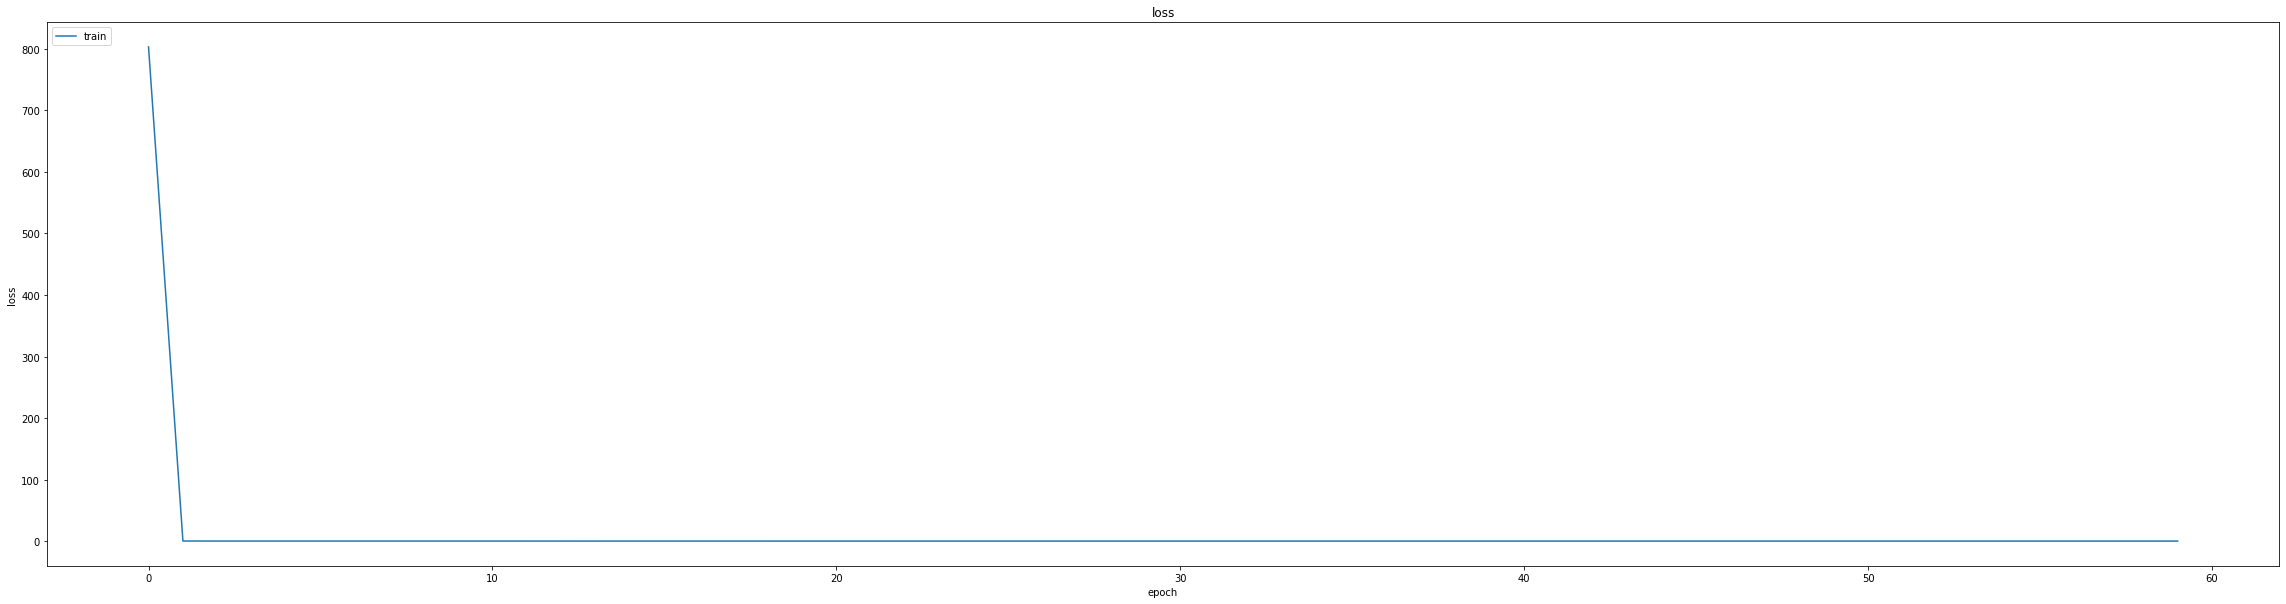

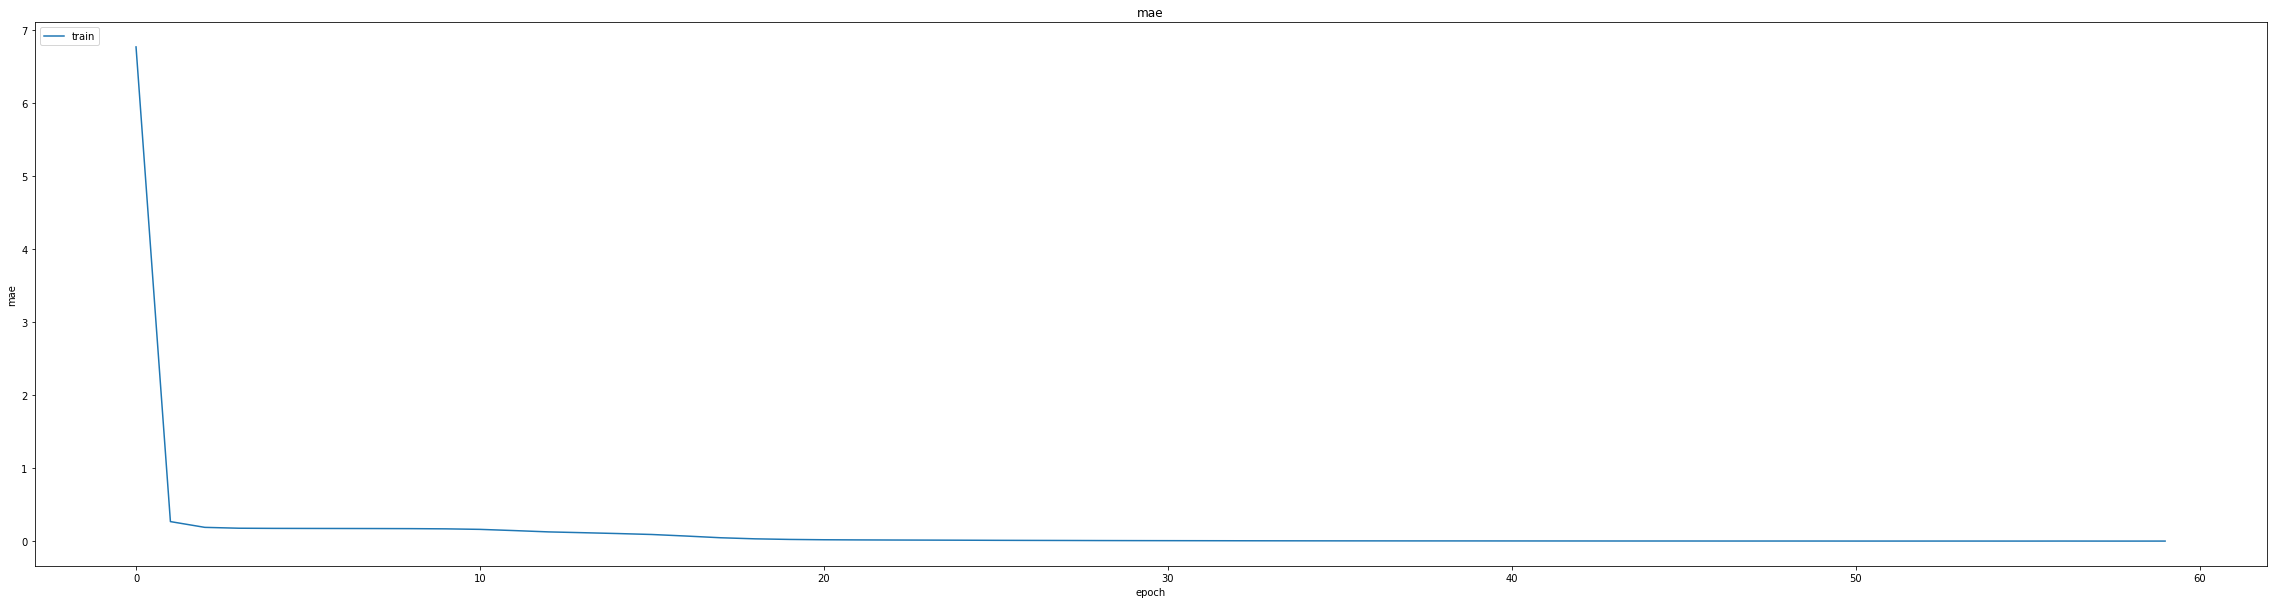

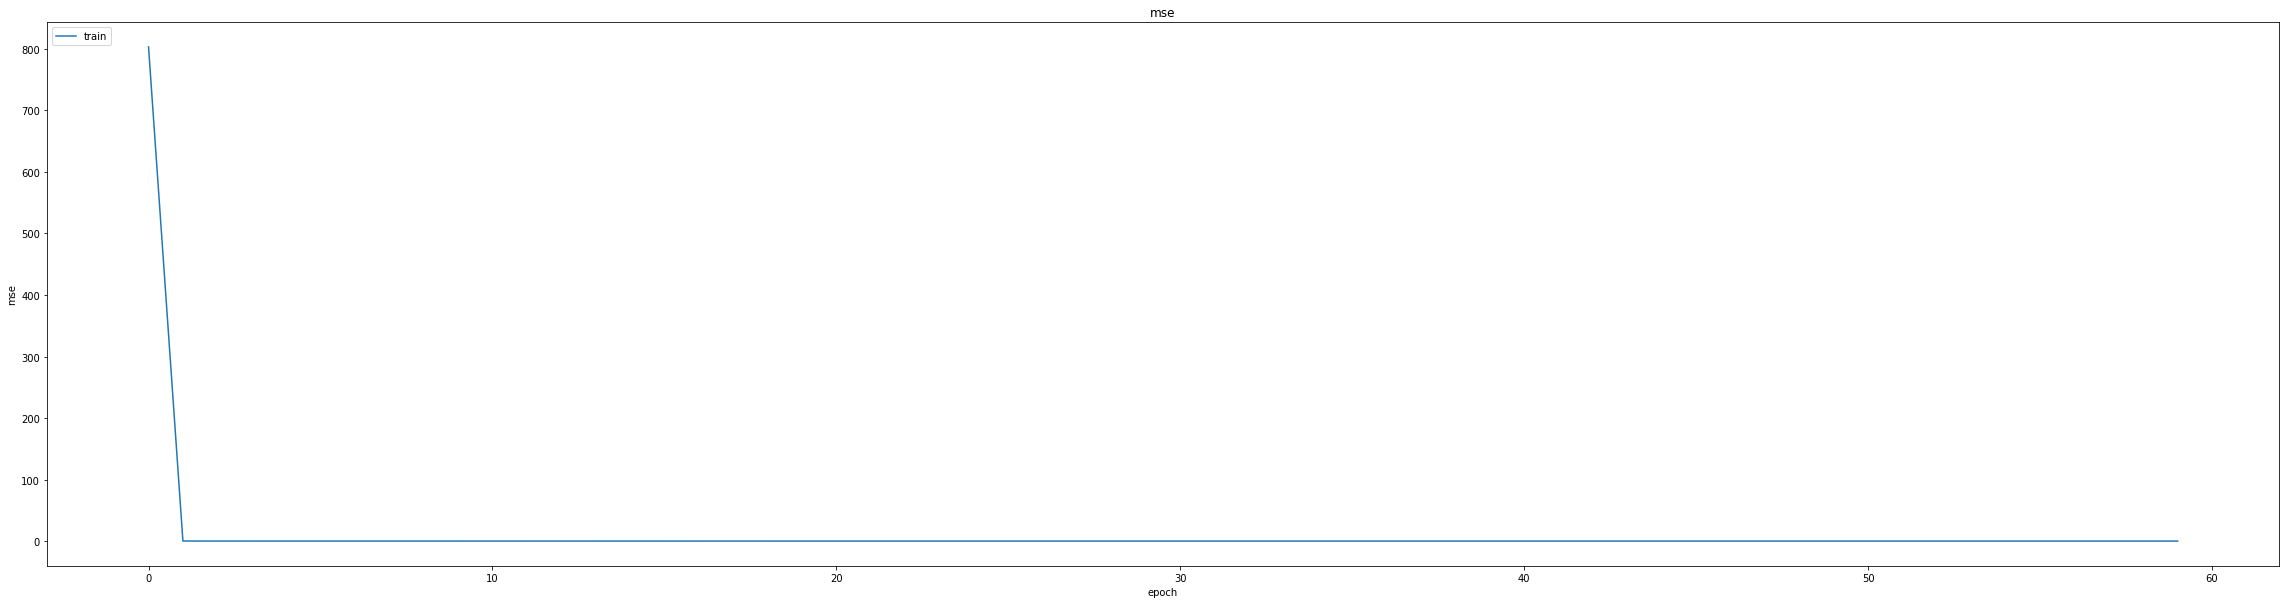

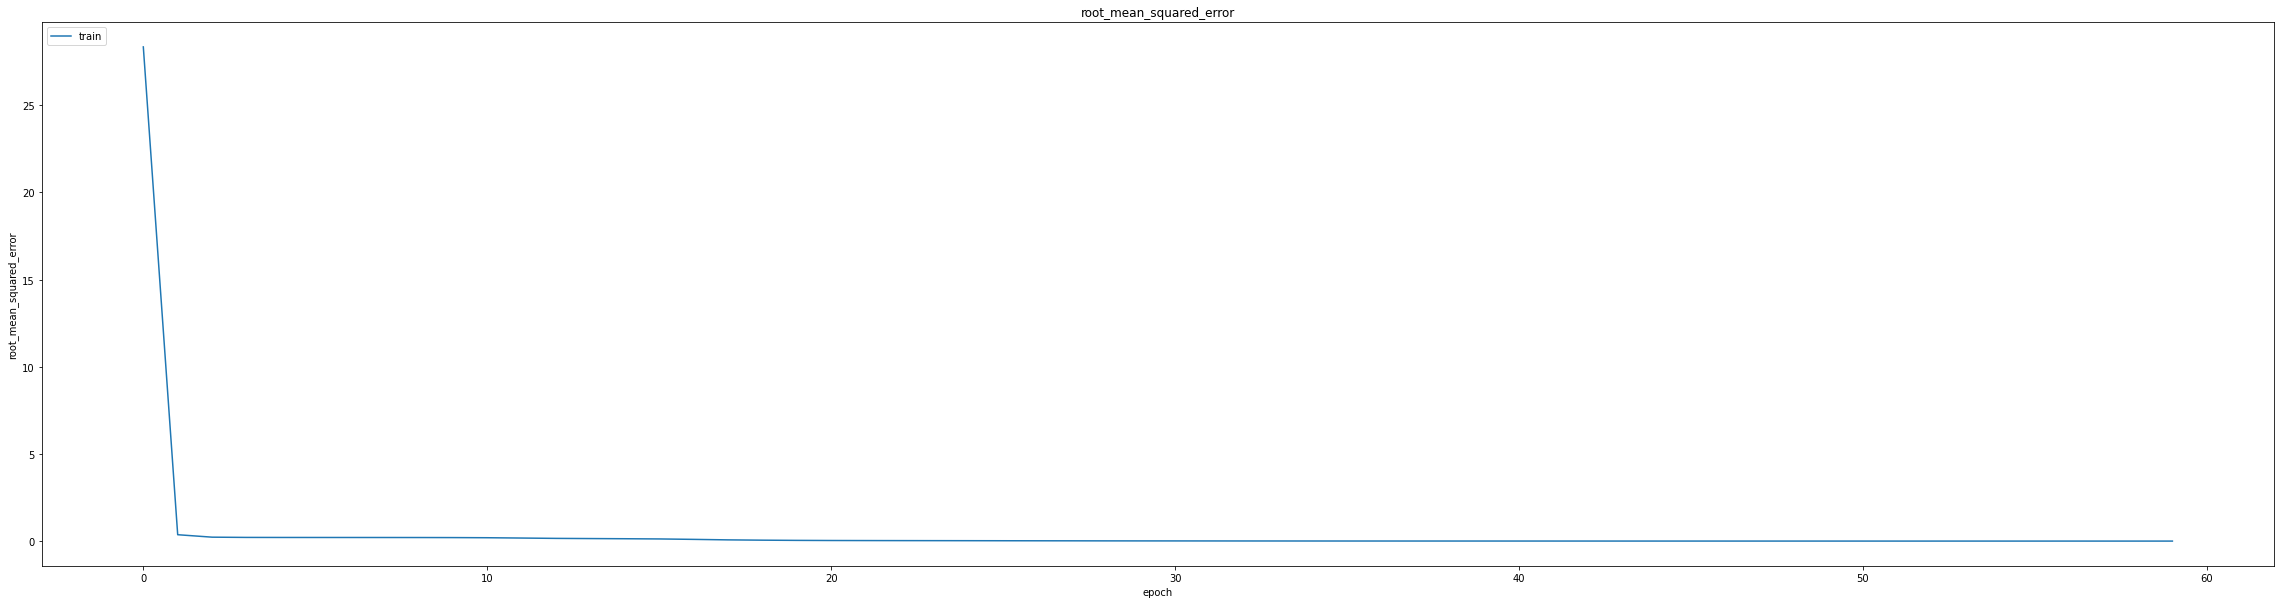

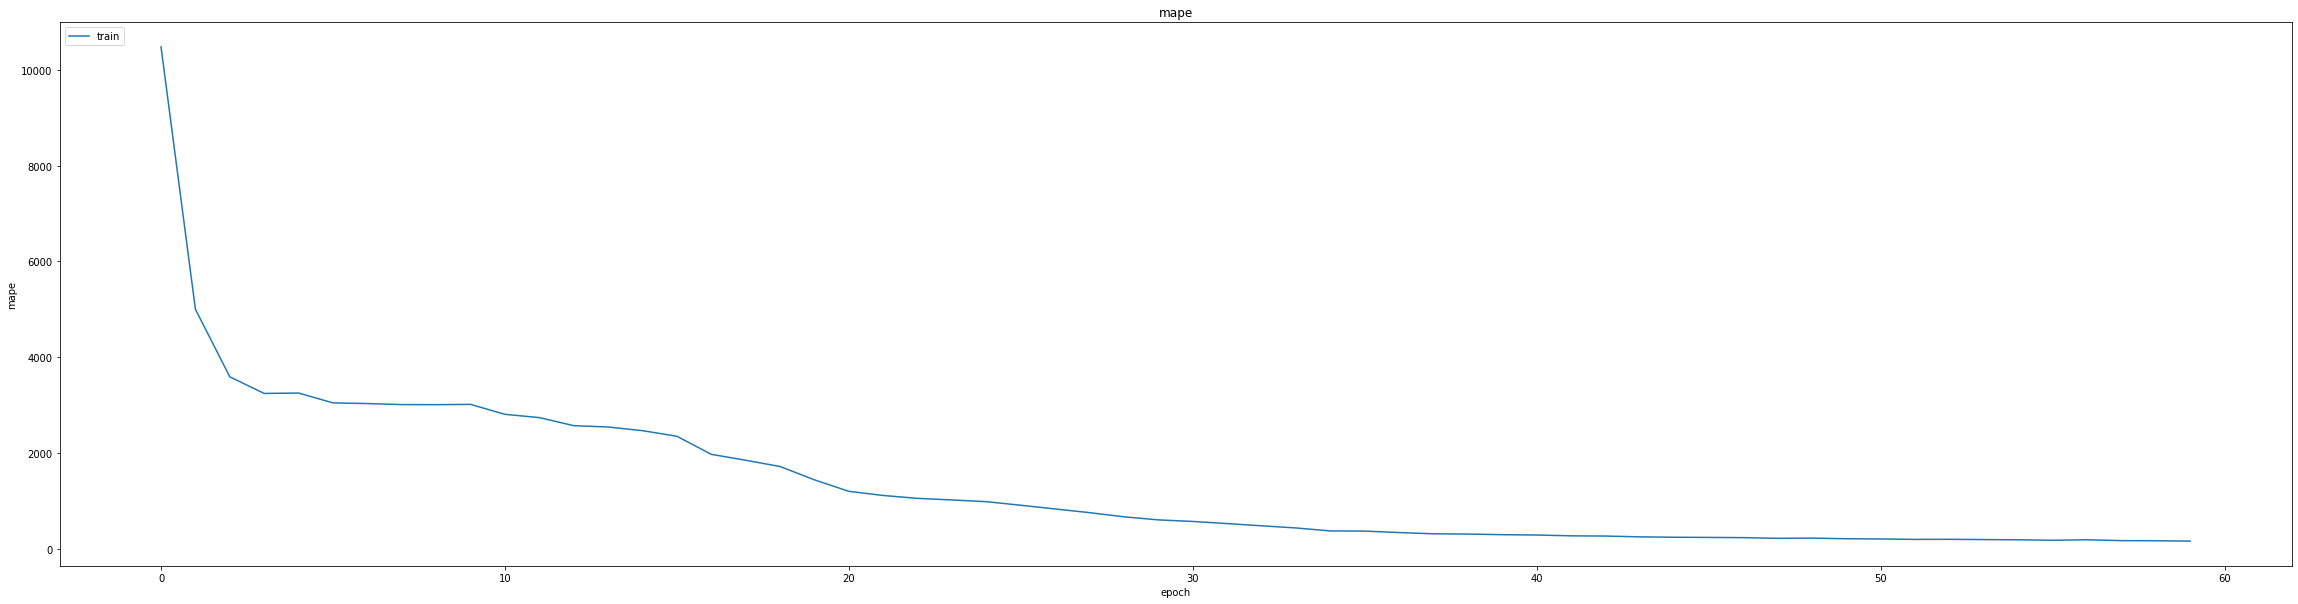

In [71]:
thesis.SummarizeHistory(history)

In [72]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008364743553102016
0.012008974328637123
1391/1391 [==============================] - 5s 3ms/step
0.9961246176795454


In [73]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [74]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


343/347 [============================>.] - ETA: 0s - loss: 2.1282e-04 - mae: 0.0064 - mse: 2.1282e-04 - root_mean_squared_error: 0.0146 - mape: 150.7839
Epoch 1: val_mse did not improve from 0.00014
347/347 [==============================] - 9s 16ms/step - loss: 2.1065e-04 - mae: 0.0064 - mse: 2.1065e-04 - root_mean_squared_error: 0.0145 - mape: 149.1027 - val_loss: 1.6691e-04 - val_mae: 0.0093 - val_mse: 1.6691e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 711.7519 - lr: 0.0010
Epoch 2/20
345/347 [============================>.] - ETA: 0s - loss: 2.0987e-05 - mae: 0.0034 - mse: 2.0987e-05 - root_mean_squared_error: 0.0046 - mape: 136.0174
Epoch 2: val_mse did not improve from 0.00014
347/347 [==============================] - 5s 14ms/step - loss: 2.0968e-05 - mae: 0.0034 - mse: 2.0968e-05 - root_mean_squared_error: 0.0046 - mape: 135.2742 - val_loss: 1.4977e-04 - val_mae: 0.0088 - val_mse: 1.4977e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 764.2315 - lr: 0.0010
lr ch

347/347 [==============================] - 15s 44ms/step - loss: 1.9956e-05 - mae: 0.0033 - mse: 1.9956e-05 - root_mean_squared_error: 0.0045 - mape: 108.7549 - val_loss: 1.3689e-04 - val_mae: 0.0085 - val_mse: 1.3689e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 738.7026 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
345/347 [============================>.] - ETA: 0s - loss: 2.2118e-05 - mae: 0.0035 - mse: 2.2118e-05 - root_mean_squared_error: 0.0047 - mape: 98.5197
Epoch 5: val_mse improved from 0.00014 to 0.00013, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 36ms/step - loss: 2.2072e-05 - mae: 0.0035 - mse: 2.2072e-05 - root_mean_squared_error: 0.0047 - mape: 97.9822 - val_loss: 1.2540e-04 - val_mae: 0.0081 - val_mse: 1.2540e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 740.1917 - lr: 8.1000e-04
Epoch 6/20
345/347 [============================>.] - ETA: 0s - loss: 2.6937e-05 - mae: 0.0038 - mse: 2.6937e-05 - root_mean_squared_error: 0.0052 - mape: 99.2440 
Epoch 6: val_mse improved from 0.00013 to 0.00012, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 2.6897e-05 - mae: 0.0038 - mse: 2.6897e-05 - root_mean_squared_error: 0.0052 - mape: 98.7028 - val_loss: 1.2327e-04 - val_mae: 0.0081 - val_mse: 1.2327e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 726.5668 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
344/347 [============================>.] - ETA: 0s - loss: 2.0576e-05 - mae: 0.0034 - mse: 2.0576e-05 - root_mean_squared_error: 0.0045 - mape: 98.9925 
Epoch 7: val_mse did not improve from 0.00012
347/347 [==============================] - 5s 15ms/step - loss: 2.0812e-05 - mae: 0.0034 - mse: 2.0812e-05 - root_mean_squared_error: 0.0046 - mape: 98.1759 - val_loss: 1.7432e-04 - val_mae: 0.0101 - val_mse: 1.7432e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 606.0988 - lr: 7.2900e-04
Epoch 8/20
343/347 [============================>.] - ETA: 0s - loss: 2.1772e-05 - mae: 0.0035 - mse: 2.1772e-05 - root_mean_squared_error: 0.0047 - mape: 94.477

347/347 [==============================] - 12s 35ms/step - loss: 1.7838e-05 - mae: 0.0031 - mse: 1.7838e-05 - root_mean_squared_error: 0.0042 - mape: 96.3588 - val_loss: 1.1499e-04 - val_mae: 0.0078 - val_mse: 1.1499e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 602.5192 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
344/347 [============================>.] - ETA: 0s - loss: 1.5431e-05 - mae: 0.0029 - mse: 1.5431e-05 - root_mean_squared_error: 0.0039 - mape: 90.4335
Epoch 13: val_mse improved from 0.00011 to 0.00011, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 1.5476e-05 - mae: 0.0029 - mse: 1.5476e-05 - root_mean_squared_error: 0.0039 - mape: 89.6855 - val_loss: 1.0642e-04 - val_mae: 0.0075 - val_mse: 1.0642e-04 - val_root_mean_squared_error: 0.0103 - val_mape: 625.3168 - lr: 5.3144e-04
Epoch 14/20
346/347 [============================>.] - ETA: 0s - loss: 1.6738e-05 - mae: 0.0031 - mse: 1.6738e-05 - root_mean_squared_error: 0.0041 - mape: 89.3127
Epoch 14: val_mse improved from 0.00011 to 0.00010, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 1.6719e-05 - mae: 0.0031 - mse: 1.6719e-05 - root_mean_squared_error: 0.0041 - mape: 89.0793 - val_loss: 1.0376e-04 - val_mae: 0.0074 - val_mse: 1.0376e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 589.2363 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
344/347 [============================>.] - ETA: 0s - loss: 1.3937e-05 - mae: 0.0027 - mse: 1.3937e-05 - root_mean_squared_error: 0.0037 - mape: 98.8514 
Epoch 15: val_mse did not improve from 0.00010
347/347 [==============================] - 5s 15ms/step - loss: 1.3921e-05 - mae: 0.0027 - mse: 1.3921e-05 - root_mean_squared_error: 0.0037 - mape: 98.0299 - val_loss: 1.1197e-04 - val_mae: 0.0077 - val_mse: 1.1197e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 600.2022 - lr: 4.7830e-04
Epoch 16/20
344/347 [============================>.] - ETA: 0s - loss: 1.4906e-05 - mae: 0.0029 - mse: 1.4906e-05 - root_mean_squared_error: 0.0039 - mape: 94

347/347 [==============================] - 12s 33ms/step - loss: 1.4202e-05 - mae: 0.0028 - mse: 1.4202e-05 - root_mean_squared_error: 0.0038 - mape: 85.8557 - val_loss: 9.9942e-05 - val_mae: 0.0072 - val_mse: 9.9942e-05 - val_root_mean_squared_error: 0.0100 - val_mape: 582.1724 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/20
347/347 [==============================] - ETA: 0s - loss: 1.2092e-05 - mae: 0.0026 - mse: 1.2092e-05 - root_mean_squared_error: 0.0035 - mape: 84.8235
Epoch 19: val_mse improved from 0.00010 to 0.00010, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 1.2092e-05 - mae: 0.0026 - mse: 1.2092e-05 - root_mean_squared_error: 0.0035 - mape: 84.8235 - val_loss: 9.5234e-05 - val_mae: 0.0070 - val_mse: 9.5234e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 594.0139 - lr: 3.8742e-04
Epoch 20/20
345/347 [============================>.] - ETA: 0s - loss: 1.1823e-05 - mae: 0.0025 - mse: 1.1823e-05 - root_mean_squared_error: 0.0034 - mape: 88.3565
Epoch 20: val_mse did not improve from 0.00010
347/347 [==============================] - 5s 15ms/step - loss: 1.1838e-05 - mae: 0.0025 - mse: 1.1838e-05 - root_mean_squared_error: 0.0034 - mape: 87.8740 - val_loss: 1.0186e-04 - val_mae: 0.0073 - val_mse: 1.0186e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 553.9037 - lr: 3.8742e-04


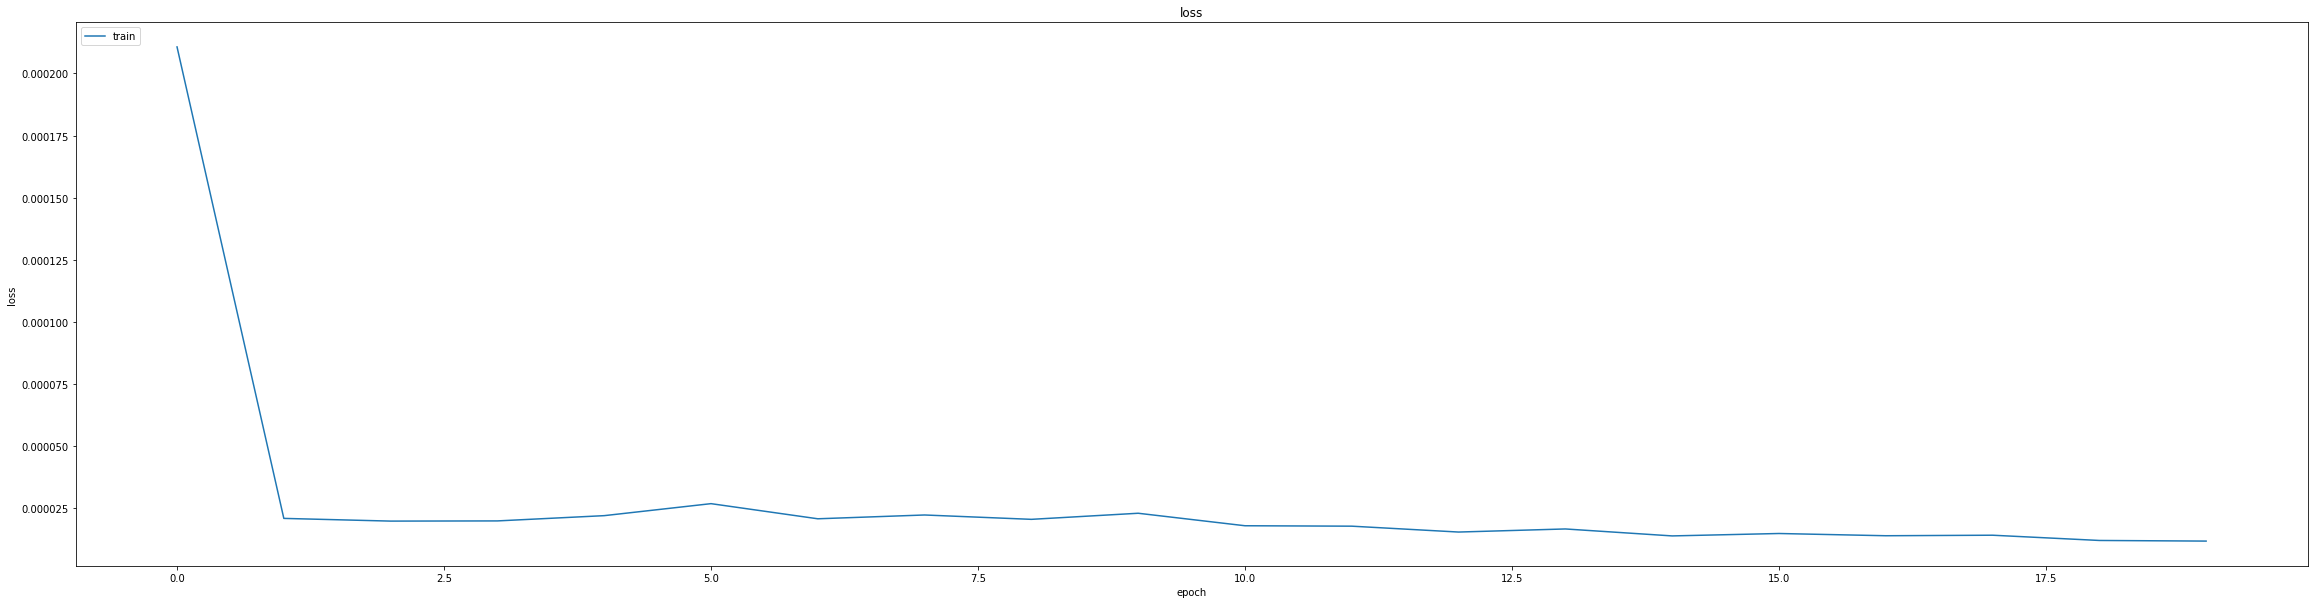

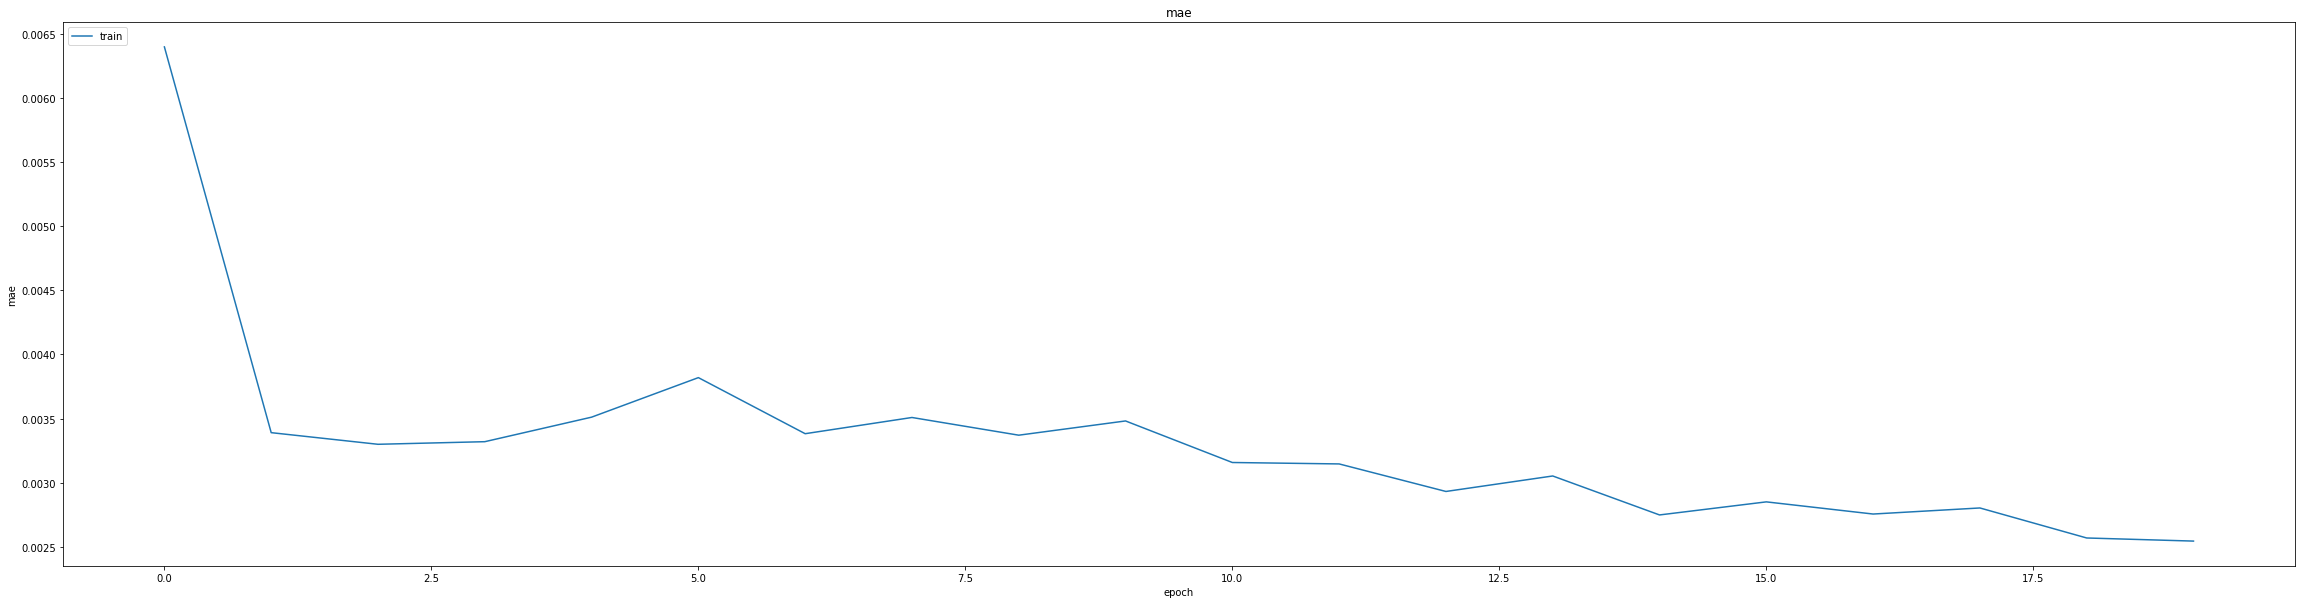

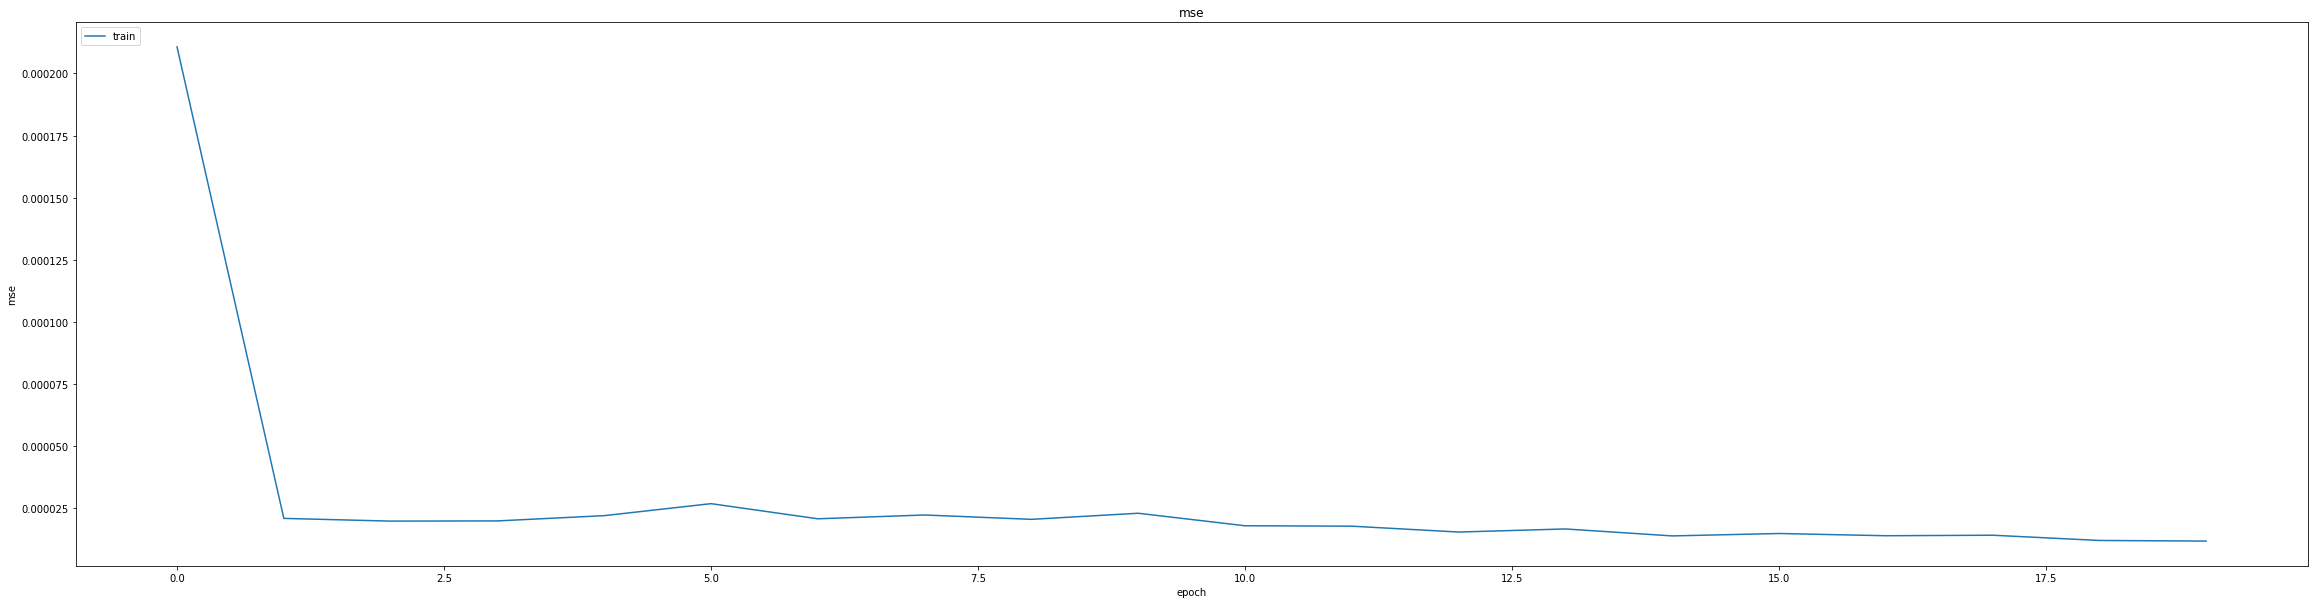

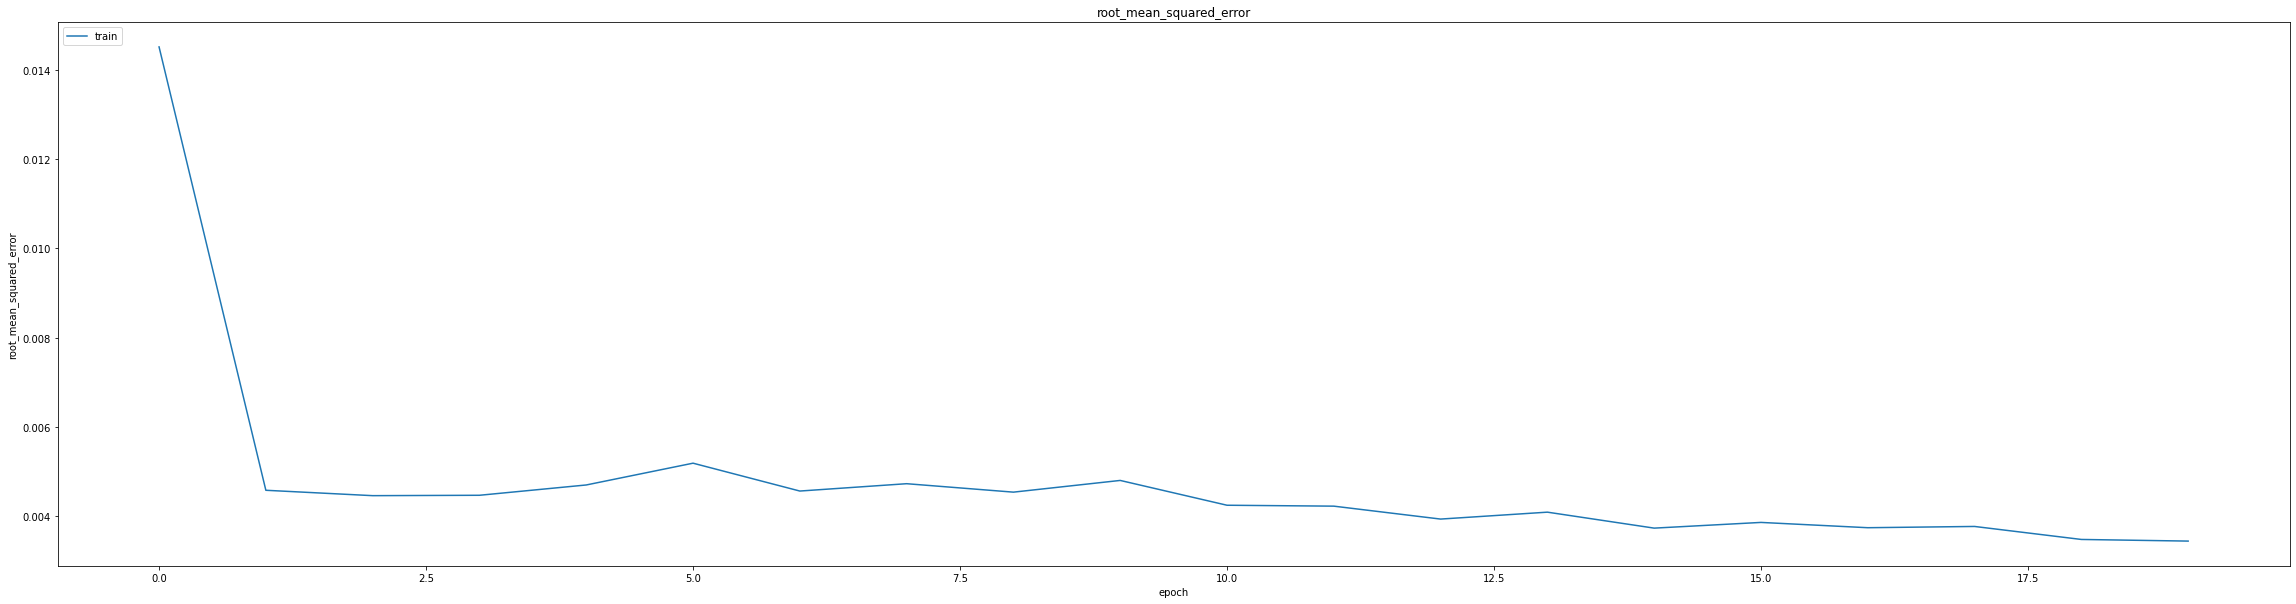

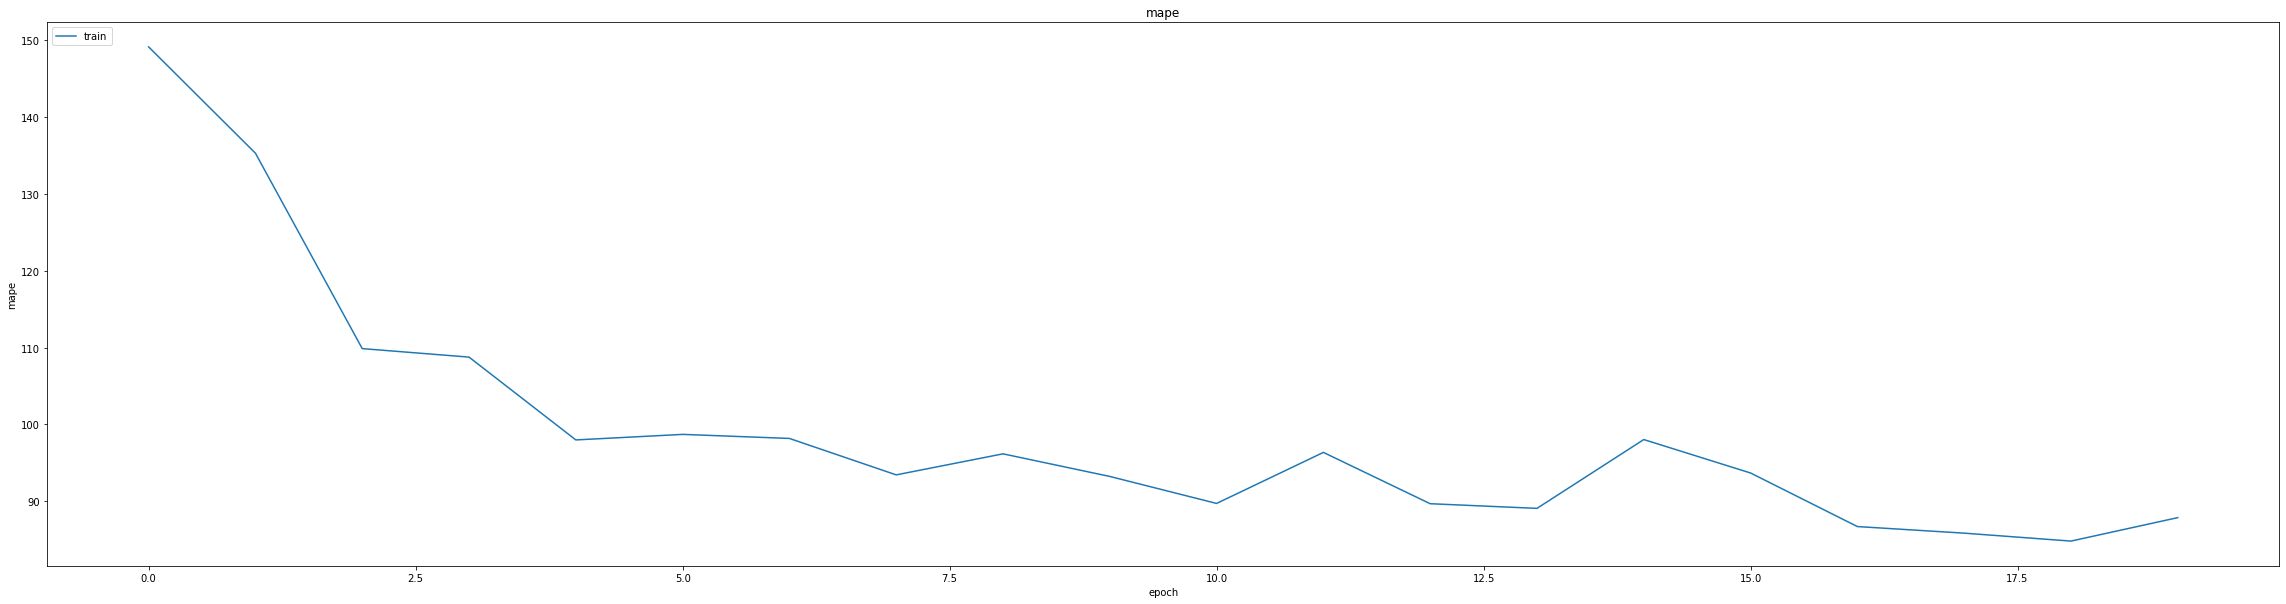

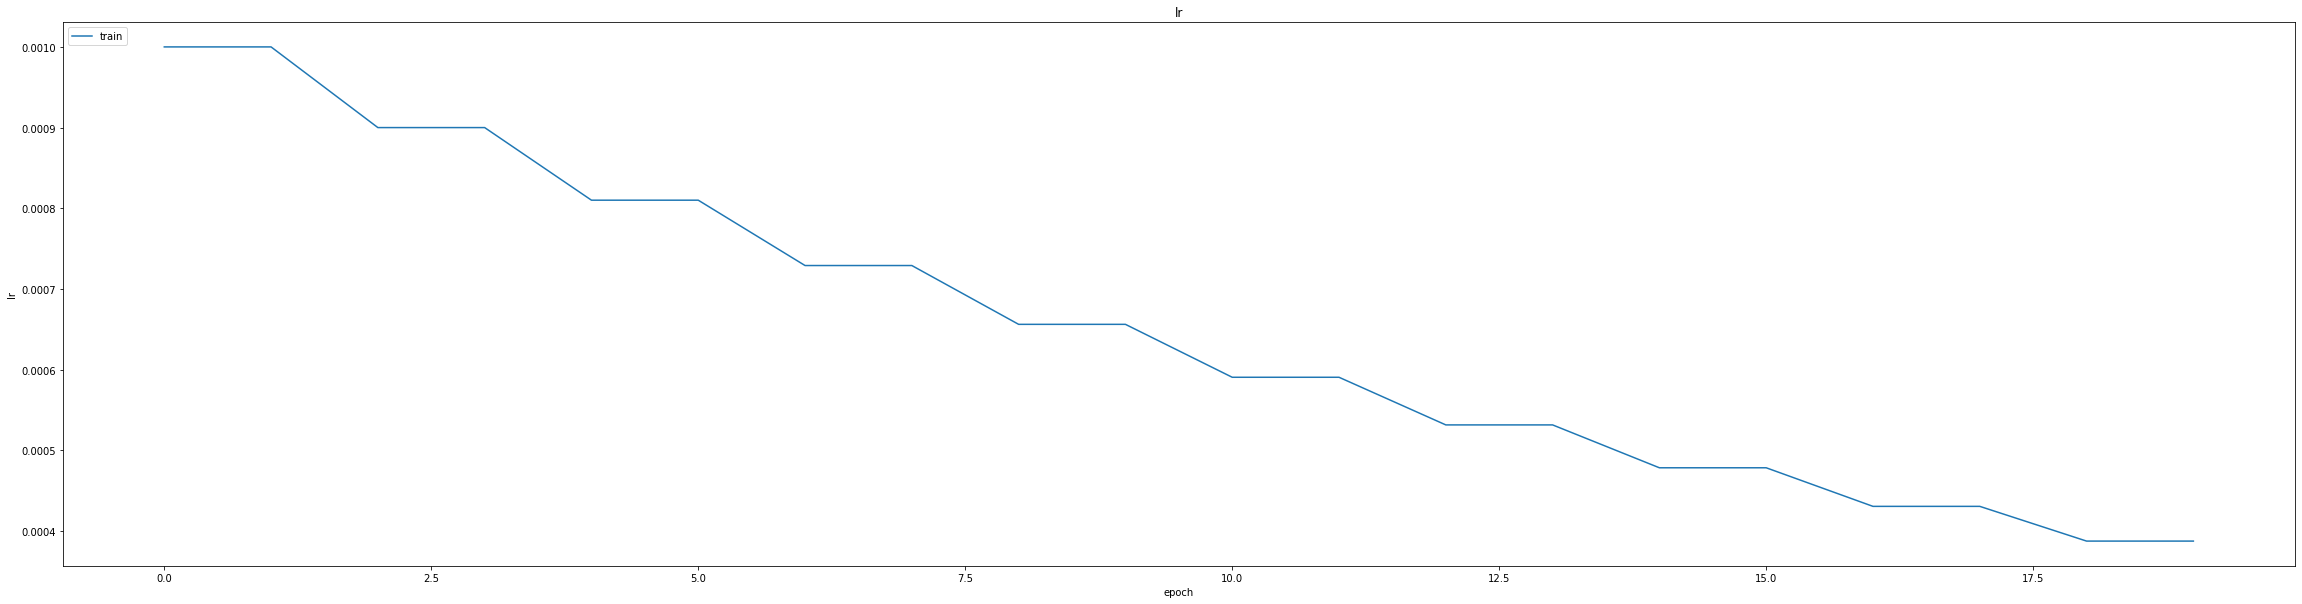

In [75]:
thesis.SummarizeHistory(history)

In [76]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00699631916359067
0.00975879281759262
1391/1391 [==============================] - 5s 3ms/step
0.9974358675646727


1391/1391 [==============================] - 4s 3ms/step


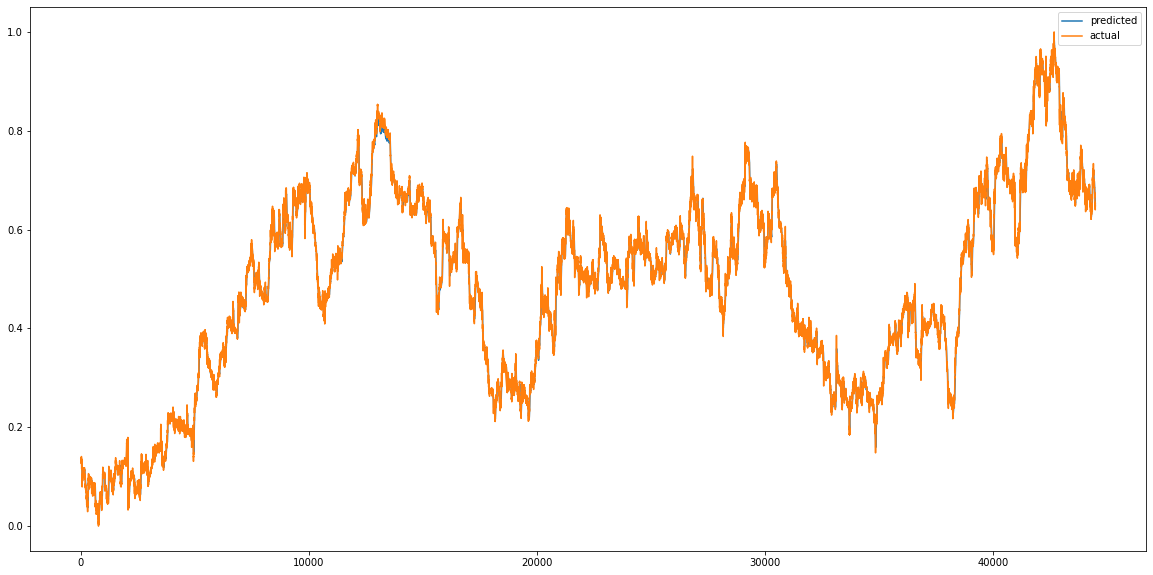

In [77]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_CNN_GRU(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


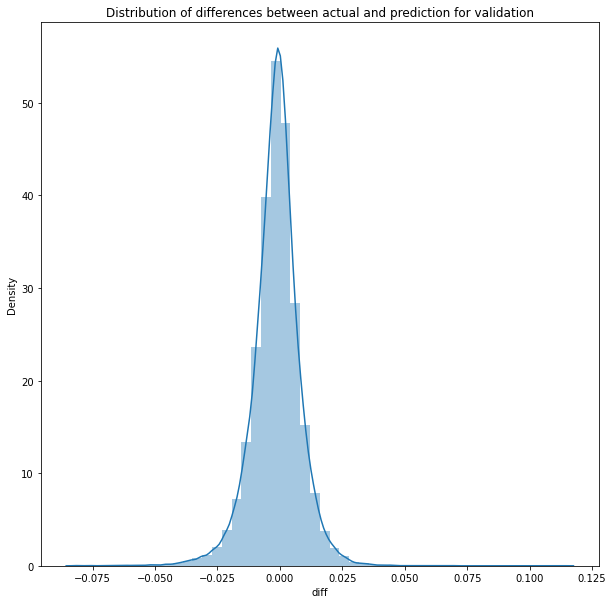

In [78]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 4s 3ms/step


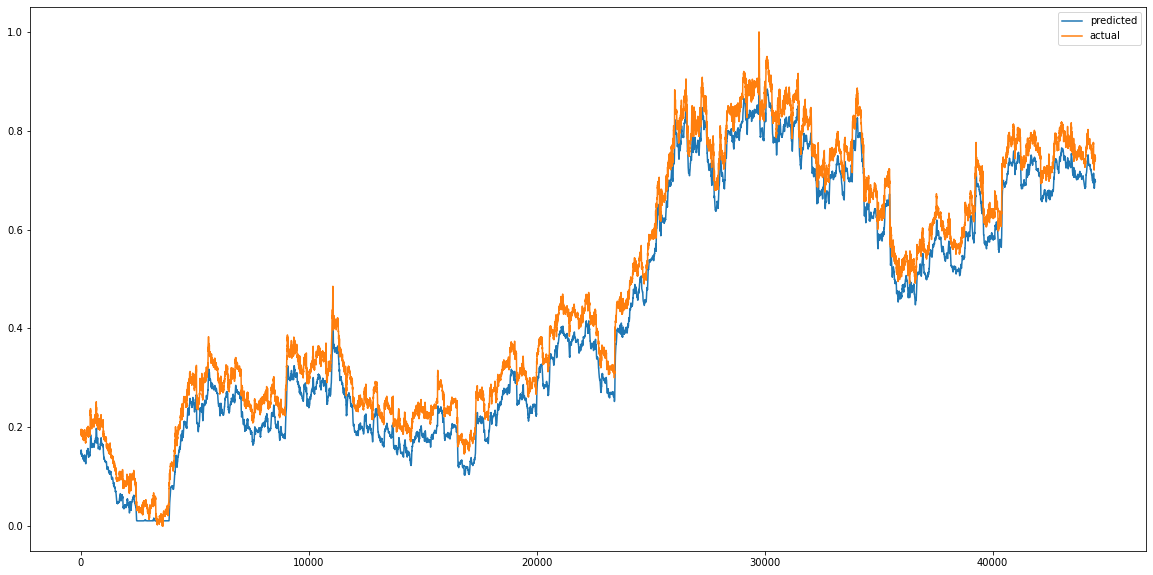

In [79]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


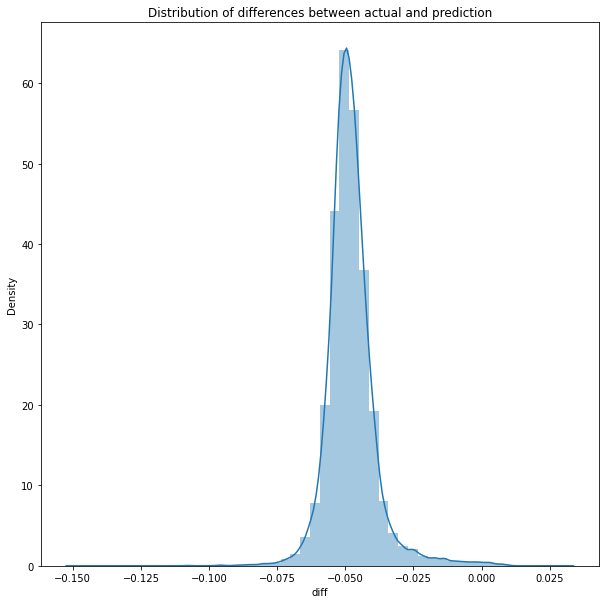

In [80]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0023820789304608288
RMSE :  0.04880654597962069
MAE :  0.047966438776221705
1391/1391 [==============================] - 4s 3ms/step
R2_Score  : 0.9621072444239288


count    44506.000000
mean        -0.047938
std          0.009168
min         -0.149181
25%         -0.052743
50%         -0.048793
75%         -0.044284
max          0.030477
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [82]:
model= thesis.BiLSTM_Model(x_train)


In [83]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/347 [==============================] - ETA: 0s - loss: 1494.5427 - mae: 14.4013 - mse: 1494.5427 - root_mean_squared_error: 38.6593 - mape: 49860.6289
Epoch 1: val_mse improved from inf to 0.78932, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 50s 118ms/step - loss: 1494.5427 - mae: 14.4013 - mse: 1494.5427 - root_mean_squared_error: 38.6593 - mape: 49860.6289 - val_loss: 0.7893 - val_mae: 0.8656 - val_mse: 0.7893 - val_root_mean_squared_error: 0.8884 - val_mape: 30602.5352
Epoch 2/60
347/347 [==============================] - ETA: 0s - loss: 0.4414 - mae: 0.6073 - mse: 0.4414 - root_mean_squared_error: 0.6643 - mape: 9955.2266 
Epoch 2: val_mse improved from 0.78932 to 0.10784, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 114ms/step - loss: 0.4414 - mae: 0.6073 - mse: 0.4414 - root_mean_squared_error: 0.6643 - mape: 9955.2266 - val_loss: 0.1078 - val_mae: 0.2741 - val_mse: 0.1078 - val_root_mean_squared_error: 0.3284 - val_mape: 16815.4609
Epoch 3/60
345/347 [============================>.] - ETA: 0s - loss: 0.1177 - mae: 0.2977 - mse: 0.1177 - root_mean_squared_error: 0.3431 - mape: 5108.4092
Epoch 3: val_mse improved from 0.10784 to 0.04528, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 118ms/step - loss: 0.1175 - mae: 0.2974 - mse: 0.1175 - root_mean_squared_error: 0.3427 - mape: 5081.1768 - val_loss: 0.0453 - val_mae: 0.1668 - val_mse: 0.0453 - val_root_mean_squared_error: 0.2128 - val_mape: 12561.8467
Epoch 4/60
347/347 [==============================] - ETA: 0s - loss: 0.0633 - mae: 0.2127 - mse: 0.0633 - root_mean_squared_error: 0.2516 - mape: 4351.8774
Epoch 4: val_mse improved from 0.04528 to 0.04002, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0633 - mae: 0.2127 - mse: 0.0633 - root_mean_squared_error: 0.2516 - mape: 4351.8774 - val_loss: 0.0400 - val_mae: 0.1649 - val_mse: 0.0400 - val_root_mean_squared_error: 0.2000 - val_mape: 10609.7012
Epoch 5/60
346/347 [============================>.] - ETA: 0s - loss: 0.0495 - mae: 0.1856 - mse: 0.0495 - root_mean_squared_error: 0.2226 - mape: 3579.6165
Epoch 5: val_mse did not improve from 0.04002
347/347 [==============================] - 8s 22ms/step - loss: 0.0495 - mae: 0.1856 - mse: 0.0495 - root_mean_squared_error: 0.2226 - mape: 3570.4551 - val_loss: 0.0433 - val_mae: 0.1744 - val_mse: 0.0433 - val_root_mean_squared_error: 0.2080 - val_mape: 9575.8320
Epoch 6/60
346/347 [============================>.] - ETA: 0s - loss: 0.0457 - mae: 0.1780 - mse: 0.0457 - root_mean_squared_error: 0.2137 - mape: 3207.9072
Epoch 6: val_mse did not improve from 0.04002
347/347 [==============================] - 7s 22ms/step - l

347/347 [==============================] - 41s 117ms/step - loss: 0.0376 - mae: 0.1601 - mse: 0.0376 - root_mean_squared_error: 0.1938 - mape: 2849.7107 - val_loss: 0.0295 - val_mae: 0.1424 - val_mse: 0.0295 - val_root_mean_squared_error: 0.1718 - val_mape: 7969.5234
Epoch 24/60
345/347 [============================>.] - ETA: 0s - loss: 0.0130 - mae: 0.0877 - mse: 0.0130 - root_mean_squared_error: 0.1139 - mape: 2355.1748
Epoch 24: val_mse improved from 0.02950 to 0.00274, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0129 - mae: 0.0875 - mse: 0.0129 - root_mean_squared_error: 0.1137 - mape: 2342.4983 - val_loss: 0.0027 - val_mae: 0.0345 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0524 - val_mape: 4834.7002
Epoch 25/60
347/347 [==============================] - ETA: 0s - loss: 0.0050 - mae: 0.0539 - mse: 0.0050 - root_mean_squared_error: 0.0709 - mape: 1307.3030
Epoch 25: val_mse improved from 0.00274 to 0.00251, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0050 - mae: 0.0539 - mse: 0.0050 - root_mean_squared_error: 0.0709 - mape: 1307.3030 - val_loss: 0.0025 - val_mae: 0.0349 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0501 - val_mape: 4107.5649
Epoch 26/60
345/347 [============================>.] - ETA: 0s - loss: 0.0039 - mae: 0.0481 - mse: 0.0039 - root_mean_squared_error: 0.0626 - mape: 1245.3057
Epoch 26: val_mse did not improve from 0.00251
347/347 [==============================] - 8s 22ms/step - loss: 0.0039 - mae: 0.0480 - mse: 0.0039 - root_mean_squared_error: 0.0626 - mape: 1238.6149 - val_loss: 0.0025 - val_mae: 0.0343 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 3700.9282
Epoch 27/60
346/347 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0441 - mse: 0.0033 - root_mean_squared_error: 0.0573 - mape: 1102.6105
Epoch 27: val_mse improved from 0.00251 to 0.00189, saving model to /content/drive/MyDrive/modelweights

347/347 [==============================] - 40s 115ms/step - loss: 0.0033 - mae: 0.0441 - mse: 0.0033 - root_mean_squared_error: 0.0573 - mape: 1099.7902 - val_loss: 0.0019 - val_mae: 0.0304 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0435 - val_mape: 3474.9995
Epoch 28/60
345/347 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0409 - mse: 0.0028 - root_mean_squared_error: 0.0530 - mape: 1071.8605
Epoch 28: val_mse did not improve from 0.00189
347/347 [==============================] - 8s 22ms/step - loss: 0.0028 - mae: 0.0409 - mse: 0.0028 - root_mean_squared_error: 0.0530 - mape: 1066.1478 - val_loss: 0.0020 - val_mae: 0.0293 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0443 - val_mape: 3214.2915
Epoch 29/60
345/347 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0380 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 975.8061
Epoch 29: val_mse improved from 0.00189 to 0.00181, saving model to /content/drive/MyDrive/modelweights/

347/347 [==============================] - 41s 117ms/step - loss: 0.0024 - mae: 0.0380 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 970.5745 - val_loss: 0.0018 - val_mae: 0.0281 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0426 - val_mape: 3007.5552
Epoch 30/60
346/347 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0351 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 981.3954
Epoch 30: val_mse improved from 0.00181 to 0.00144, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0021 - mae: 0.0351 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 978.8635 - val_loss: 0.0014 - val_mae: 0.0260 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0379 - val_mape: 2795.7898
Epoch 31/60
346/347 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0324 - mse: 0.0018 - root_mean_squared_error: 0.0420 - mape: 793.0541
Epoch 31: val_mse did not improve from 0.00144
347/347 [==============================] - 8s 22ms/step - loss: 0.0018 - mae: 0.0324 - mse: 0.0018 - root_mean_squared_error: 0.0420 - mape: 791.0254 - val_loss: 0.0017 - val_mae: 0.0282 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0407 - val_mape: 2638.5833
Epoch 32/60
347/347 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0298 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 872.1450
Epoch 32: val_mse did not improve from 0.00144
347/347 [==============================] - 8s 22ms/step - lo

347/347 [==============================] - 40s 114ms/step - loss: 0.0013 - mae: 0.0274 - mse: 0.0013 - root_mean_squared_error: 0.0355 - mape: 691.5745 - val_loss: 9.4294e-04 - val_mae: 0.0215 - val_mse: 9.4294e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 2286.8203
Epoch 34/60
345/347 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0256 - mse: 0.0011 - root_mean_squared_error: 0.0330 - mape: 637.3760
Epoch 34: val_mse did not improve from 0.00094
347/347 [==============================] - 8s 22ms/step - loss: 0.0011 - mae: 0.0256 - mse: 0.0011 - root_mean_squared_error: 0.0330 - mape: 633.9468 - val_loss: 9.4833e-04 - val_mae: 0.0213 - val_mse: 9.4833e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 2090.0906
Epoch 35/60
347/347 [==============================] - ETA: 0s - loss: 9.5697e-04 - mae: 0.0240 - mse: 9.5697e-04 - root_mean_squared_error: 0.0309 - mape: 605.2637
Epoch 35: val_mse improved from 0.00094 to 0.00063, saving model to /content/drive/

347/347 [==============================] - 40s 115ms/step - loss: 9.5697e-04 - mae: 0.0240 - mse: 9.5697e-04 - root_mean_squared_error: 0.0309 - mape: 605.2637 - val_loss: 6.3487e-04 - val_mae: 0.0184 - val_mse: 6.3487e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 1972.6646
Epoch 36/60
346/347 [============================>.] - ETA: 0s - loss: 8.3093e-04 - mae: 0.0225 - mse: 8.3093e-04 - root_mean_squared_error: 0.0288 - mape: 603.2474
Epoch 36: val_mse improved from 0.00063 to 0.00048, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 8.3079e-04 - mae: 0.0225 - mse: 8.3079e-04 - root_mean_squared_error: 0.0288 - mape: 601.6969 - val_loss: 4.8156e-04 - val_mae: 0.0164 - val_mse: 4.8156e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 1869.7767
Epoch 37/60
346/347 [============================>.] - ETA: 0s - loss: 7.5453e-04 - mae: 0.0215 - mse: 7.5453e-04 - root_mean_squared_error: 0.0275 - mape: 570.2502
Epoch 37: val_mse did not improve from 0.00048
347/347 [==============================] - 8s 22ms/step - loss: 7.5472e-04 - mae: 0.0215 - mse: 7.5472e-04 - root_mean_squared_error: 0.0275 - mape: 568.7794 - val_loss: 6.8391e-04 - val_mae: 0.0199 - val_mse: 6.8391e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 1710.2822
Epoch 38/60
345/347 [============================>.] - ETA: 0s - loss: 6.5123e-04 - mae: 0.0200 - mse: 6.5123e-04 - root_mean_squared_error: 0.0255 - mape: 513.4722
Epoch 38: val_mse improved from 0.00048 to 0.00033, saving 

347/347 [==============================] - 40s 115ms/step - loss: 6.5148e-04 - mae: 0.0200 - mse: 6.5148e-04 - root_mean_squared_error: 0.0255 - mape: 510.7111 - val_loss: 3.3124e-04 - val_mae: 0.0134 - val_mse: 3.3124e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 1653.0656
Epoch 39/60
346/347 [============================>.] - ETA: 0s - loss: 5.8837e-04 - mae: 0.0190 - mse: 5.8837e-04 - root_mean_squared_error: 0.0243 - mape: 543.5016
Epoch 39: val_mse did not improve from 0.00033
347/347 [==============================] - 8s 22ms/step - loss: 5.8843e-04 - mae: 0.0190 - mse: 5.8843e-04 - root_mean_squared_error: 0.0243 - mape: 542.1000 - val_loss: 5.6441e-04 - val_mae: 0.0174 - val_mse: 5.6441e-04 - val_root_mean_squared_error: 0.0238 - val_mape: 1549.7415
Epoch 40/60
345/347 [============================>.] - ETA: 0s - loss: 5.2549e-04 - mae: 0.0180 - mse: 5.2549e-04 - root_mean_squared_error: 0.0229 - mape: 447.2751
Epoch 40: val_mse did not improve from 0.00033
347/347 [===

347/347 [==============================] - 40s 115ms/step - loss: 3.9534e-04 - mae: 0.0156 - mse: 3.9534e-04 - root_mean_squared_error: 0.0199 - mape: 388.0565 - val_loss: 3.1651e-04 - val_mae: 0.0128 - val_mse: 3.1651e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 1196.8083
Epoch 44/60
345/347 [============================>.] - ETA: 0s - loss: 3.6927e-04 - mae: 0.0151 - mse: 3.6927e-04 - root_mean_squared_error: 0.0192 - mape: 367.1769
Epoch 44: val_mse improved from 0.00032 to 0.00027, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 114ms/step - loss: 3.6902e-04 - mae: 0.0151 - mse: 3.6902e-04 - root_mean_squared_error: 0.0192 - mape: 365.1882 - val_loss: 2.7164e-04 - val_mae: 0.0127 - val_mse: 2.7164e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 1158.5797
Epoch 45/60
345/347 [============================>.] - ETA: 0s - loss: 3.3418e-04 - mae: 0.0143 - mse: 3.3418e-04 - root_mean_squared_error: 0.0183 - mape: 365.8081
Epoch 45: val_mse did not improve from 0.00027
347/347 [==============================] - 8s 22ms/step - loss: 3.3370e-04 - mae: 0.0143 - mse: 3.3370e-04 - root_mean_squared_error: 0.0183 - mape: 363.8409 - val_loss: 3.0453e-04 - val_mae: 0.0122 - val_mse: 3.0453e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 1108.9064
Epoch 46/60
346/347 [============================>.] - ETA: 0s - loss: 3.0472e-04 - mae: 0.0137 - mse: 3.0472e-04 - root_mean_squared_error: 0.0175 - mape: 341.5764
Epoch 46: val_mse did not improve from 0.00027
347/347 [===

347/347 [==============================] - 40s 117ms/step - loss: 2.5636e-04 - mae: 0.0125 - mse: 2.5636e-04 - root_mean_squared_error: 0.0160 - mape: 330.9332 - val_loss: 2.6807e-04 - val_mae: 0.0116 - val_mse: 2.6807e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 977.2548
Epoch 49/60
345/347 [============================>.] - ETA: 0s - loss: 2.5035e-04 - mae: 0.0123 - mse: 2.5035e-04 - root_mean_squared_error: 0.0158 - mape: 328.7055
Epoch 49: val_mse did not improve from 0.00027
347/347 [==============================] - 8s 22ms/step - loss: 2.5006e-04 - mae: 0.0123 - mse: 2.5006e-04 - root_mean_squared_error: 0.0158 - mape: 326.9272 - val_loss: 2.9373e-04 - val_mae: 0.0121 - val_mse: 2.9373e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 974.6163
Epoch 50/60
346/347 [============================>.] - ETA: 0s - loss: 2.0918e-04 - mae: 0.0113 - mse: 2.0918e-04 - root_mean_squared_error: 0.0145 - mape: 305.0270
Epoch 50: val_mse improved from 0.00027 to 0.00025, saving mo

347/347 [==============================] - 40s 115ms/step - loss: 2.0911e-04 - mae: 0.0113 - mse: 2.0911e-04 - root_mean_squared_error: 0.0145 - mape: 304.2350 - val_loss: 2.5486e-04 - val_mae: 0.0113 - val_mse: 2.5486e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 909.6063
Epoch 51/60
346/347 [============================>.] - ETA: 0s - loss: 1.9215e-04 - mae: 0.0108 - mse: 1.9215e-04 - root_mean_squared_error: 0.0139 - mape: 296.5924
Epoch 51: val_mse improved from 0.00025 to 0.00022, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 1.9219e-04 - mae: 0.0108 - mse: 1.9219e-04 - root_mean_squared_error: 0.0139 - mape: 295.8243 - val_loss: 2.2431e-04 - val_mae: 0.0107 - val_mse: 2.2431e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 890.2147
Epoch 52/60
346/347 [============================>.] - ETA: 0s - loss: 1.8690e-04 - mae: 0.0107 - mse: 1.8690e-04 - root_mean_squared_error: 0.0137 - mape: 308.0621
Epoch 52: val_mse did not improve from 0.00022
347/347 [==============================] - 8s 22ms/step - loss: 1.8690e-04 - mae: 0.0107 - mse: 1.8690e-04 - root_mean_squared_error: 0.0137 - mape: 307.2623 - val_loss: 2.9698e-04 - val_mae: 0.0125 - val_mse: 2.9698e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 865.7943
Epoch 53/60
345/347 [============================>.] - ETA: 0s - loss: 1.8158e-04 - mae: 0.0105 - mse: 1.8158e-04 - root_mean_squared_error: 0.0135 - mape: 295.0761
Epoch 53: val_mse improved from 0.00022 to 0.00021, saving mo

347/347 [==============================] - 40s 115ms/step - loss: 1.8142e-04 - mae: 0.0105 - mse: 1.8142e-04 - root_mean_squared_error: 0.0135 - mape: 293.4807 - val_loss: 2.0938e-04 - val_mae: 0.0103 - val_mse: 2.0938e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 870.3224
Epoch 54/60
347/347 [==============================] - ETA: 0s - loss: 1.5331e-04 - mae: 0.0096 - mse: 1.5331e-04 - root_mean_squared_error: 0.0124 - mape: 287.6253
Epoch 54: val_mse did not improve from 0.00021
347/347 [==============================] - 8s 22ms/step - loss: 1.5331e-04 - mae: 0.0096 - mse: 1.5331e-04 - root_mean_squared_error: 0.0124 - mape: 287.6253 - val_loss: 2.5041e-04 - val_mae: 0.0119 - val_mse: 2.5041e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 824.9907
Epoch 55/60
346/347 [============================>.] - ETA: 0s - loss: 1.4160e-04 - mae: 0.0092 - mse: 1.4160e-04 - root_mean_squared_error: 0.0119 - mape: 272.2296
Epoch 55: val_mse did not improve from 0.00021
347/347 [=====

347/347 [==============================] - 40s 116ms/step - loss: 1.3469e-04 - mae: 0.0090 - mse: 1.3469e-04 - root_mean_squared_error: 0.0116 - mape: 257.6555 - val_loss: 1.6617e-04 - val_mae: 0.0096 - val_mse: 1.6617e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 826.9952
Epoch 57/60
346/347 [============================>.] - ETA: 0s - loss: 1.1817e-04 - mae: 0.0084 - mse: 1.1817e-04 - root_mean_squared_error: 0.0109 - mape: 256.1636
Epoch 57: val_mse did not improve from 0.00017
347/347 [==============================] - 8s 22ms/step - loss: 1.1816e-04 - mae: 0.0084 - mse: 1.1816e-04 - root_mean_squared_error: 0.0109 - mape: 255.4996 - val_loss: 2.2475e-04 - val_mae: 0.0113 - val_mse: 2.2475e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 781.4745
Epoch 58/60
345/347 [============================>.] - ETA: 0s - loss: 1.1252e-04 - mae: 0.0082 - mse: 1.1252e-04 - root_mean_squared_error: 0.0106 - mape: 261.6665
Epoch 58: val_mse did not improve from 0.00017
347/347 [=====

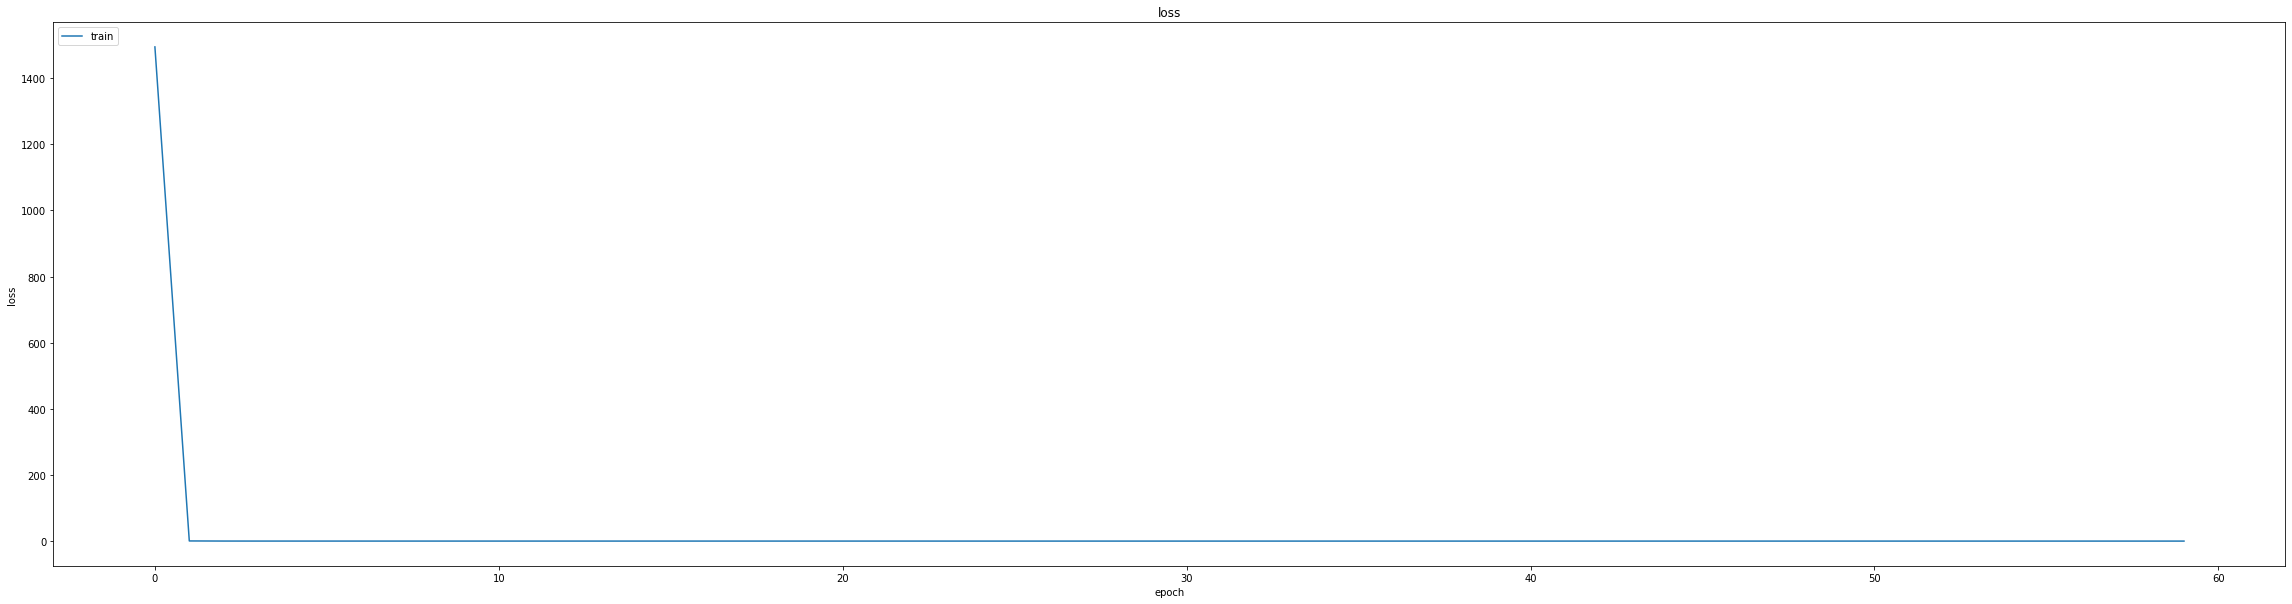

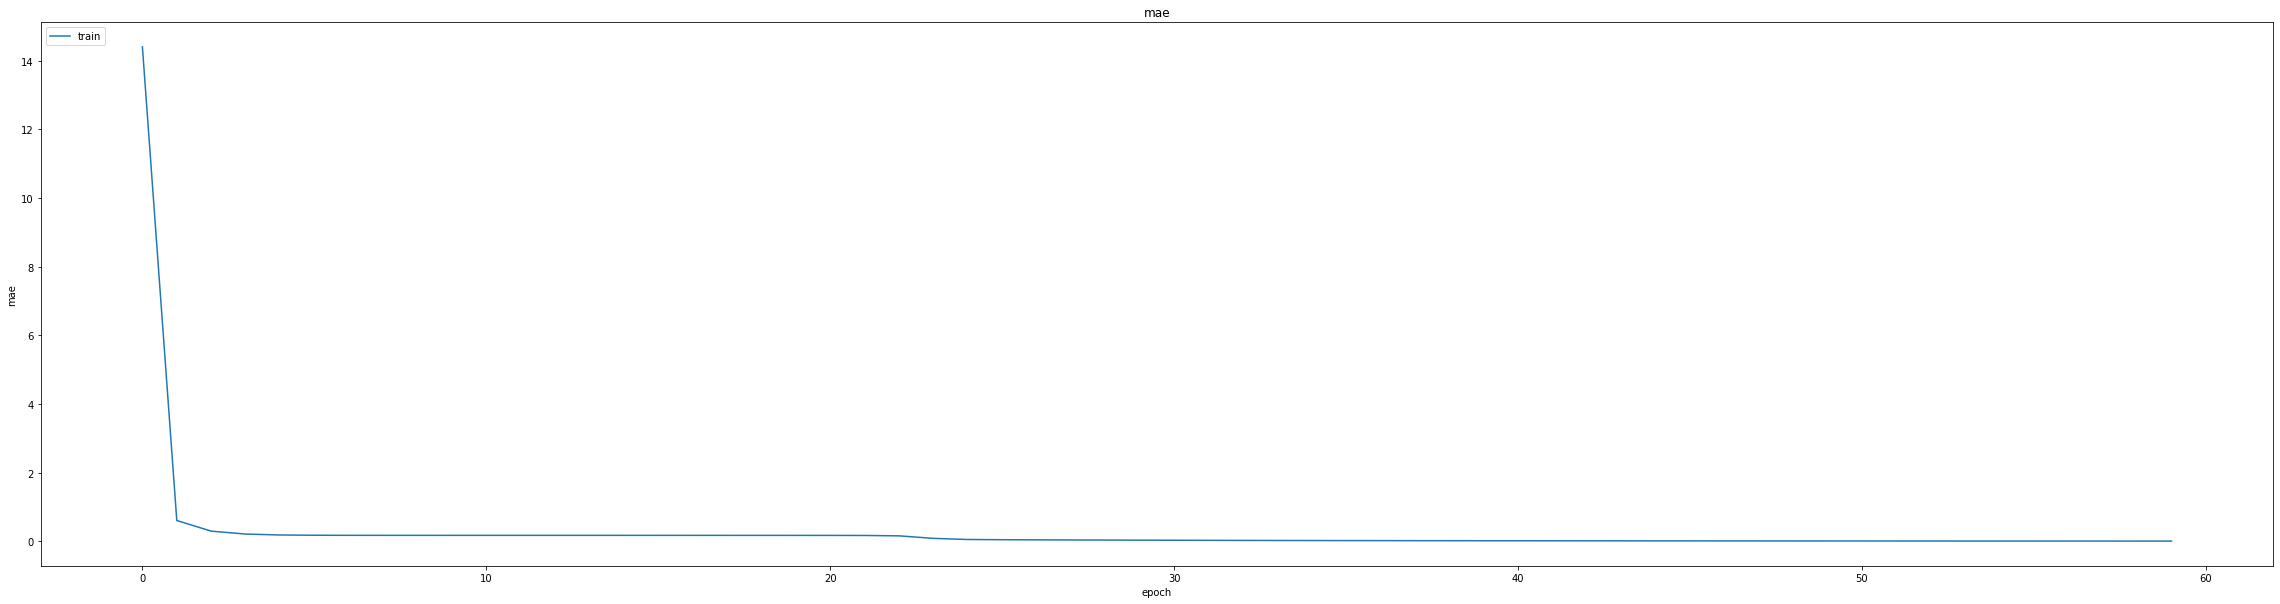

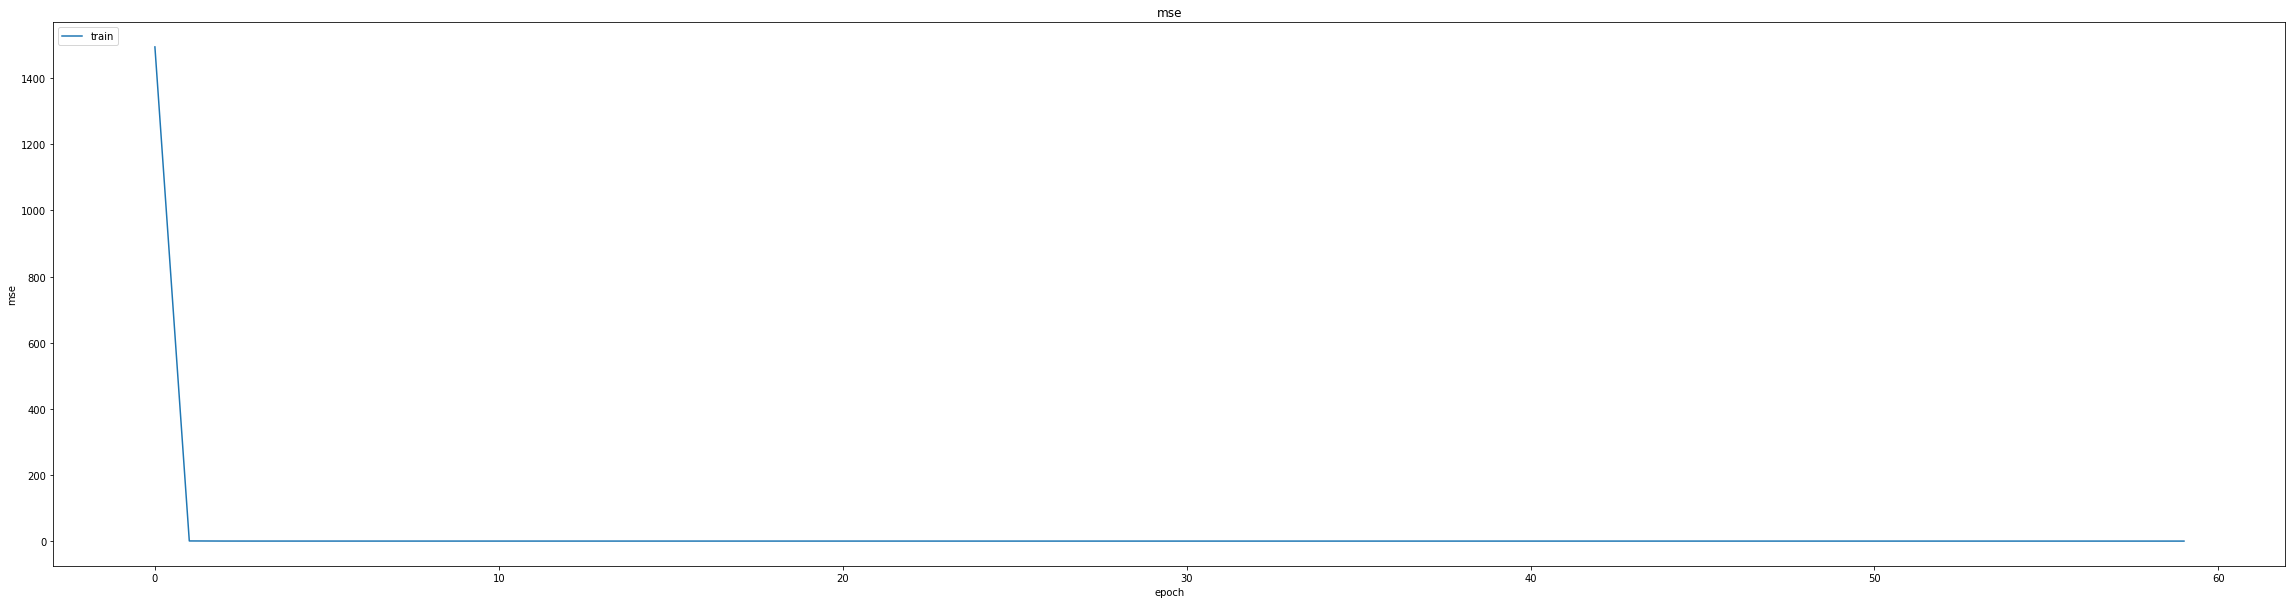

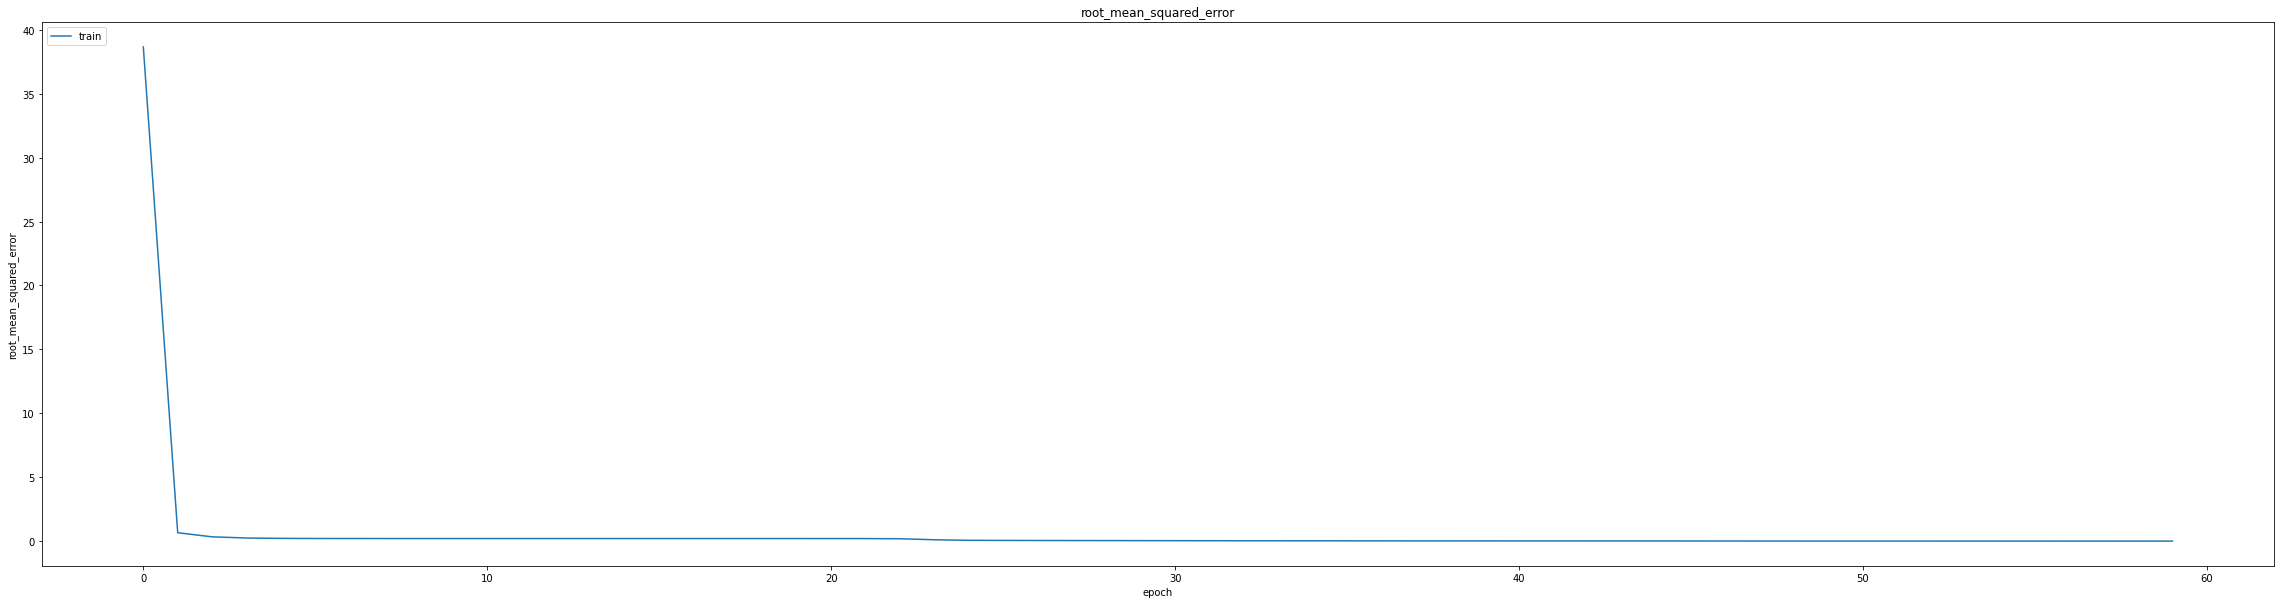

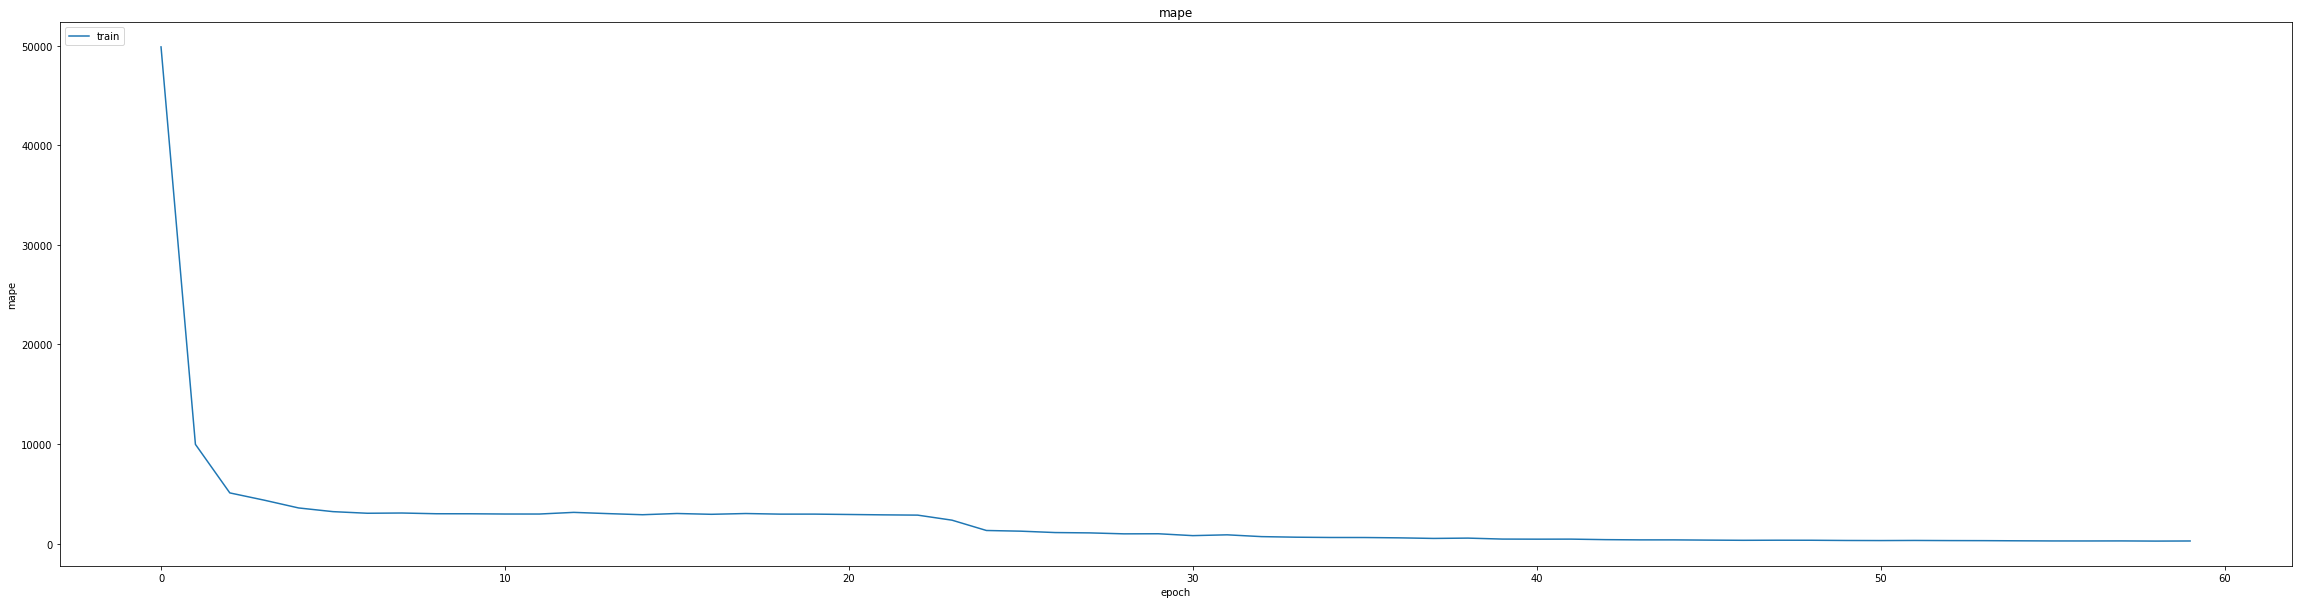

In [84]:
thesis.SummarizeHistory(history)

In [85]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009454101324081421
0.012890757992863655
1391/1391 [==============================] - 13s 8ms/step
0.9956481927840624


In [86]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [87]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


345/347 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0145 - mse: 0.0010 - root_mean_squared_error: 0.0318 - mape: 288.6583
Epoch 1: val_mse did not improve from 0.00017
347/347 [==============================] - 20s 33ms/step - loss: 0.0010 - mae: 0.0145 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 287.0868 - val_loss: 1.6840e-04 - val_mae: 0.0092 - val_mse: 1.6840e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 857.2066 - lr: 0.0010
Epoch 2/20
346/347 [============================>.] - ETA: 0s - loss: 8.7739e-05 - mae: 0.0072 - mse: 8.7739e-05 - root_mean_squared_error: 0.0094 - mape: 269.2249
Epoch 2: val_mse improved from 0.00017 to 0.00015, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 42s 122ms/step - loss: 8.7704e-05 - mae: 0.0072 - mse: 8.7704e-05 - root_mean_squared_error: 0.0094 - mape: 268.5241 - val_loss: 1.5375e-04 - val_mae: 0.0090 - val_mse: 1.5375e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 789.2141 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
347/347 [==============================] - ETA: 0s - loss: 6.9406e-05 - mae: 0.0064 - mse: 6.9406e-05 - root_mean_squared_error: 0.0083 - mape: 256.9822
Epoch 3: val_mse did not improve from 0.00015
347/347 [==============================] - 7s 22ms/step - loss: 6.9406e-05 - mae: 0.0064 - mse: 6.9406e-05 - root_mean_squared_error: 0.0083 - mape: 256.9822 - val_loss: 1.6573e-04 - val_mae: 0.0100 - val_mse: 1.6573e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 810.0173 - lr: 9.0000e-04
Epoch 4/20
345/347 [============================>.] - ETA: 0s - loss: 6.8481e-05 - mae: 0.0064 - mse: 6.8481e-05 - root_mean_squared_error: 0.0083 - mape: 245.129

347/347 [==============================] - 39s 114ms/step - loss: 6.8562e-05 - mae: 0.0064 - mse: 6.8562e-05 - root_mean_squared_error: 0.0083 - mape: 243.7986 - val_loss: 1.3087e-04 - val_mae: 0.0081 - val_mse: 1.3087e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 903.9665 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
345/347 [============================>.] - ETA: 0s - loss: 5.8523e-05 - mae: 0.0059 - mse: 5.8523e-05 - root_mean_squared_error: 0.0077 - mape: 217.3005
Epoch 5: val_mse did not improve from 0.00013
347/347 [==============================] - 8s 22ms/step - loss: 5.8462e-05 - mae: 0.0059 - mse: 5.8462e-05 - root_mean_squared_error: 0.0076 - mape: 216.1138 - val_loss: 1.5346e-04 - val_mae: 0.0095 - val_mse: 1.5346e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 899.7520 - lr: 8.1000e-04
Epoch 6/20
345/347 [============================>.] - ETA: 0s - loss: 5.7152e-05 - mae: 0.0058 - mse: 5.7152e-05 - root_mean_squared_error: 0.0076 - mape: 203

347/347 [==============================] - 41s 119ms/step - loss: 3.9839e-05 - mae: 0.0048 - mse: 3.9839e-05 - root_mean_squared_error: 0.0063 - mape: 183.8420 - val_loss: 1.2982e-04 - val_mae: 0.0087 - val_mse: 1.2982e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 837.7320 - lr: 6.5610e-04
Epoch 10/20
346/347 [============================>.] - ETA: 0s - loss: 3.8066e-05 - mae: 0.0047 - mse: 3.8066e-05 - root_mean_squared_error: 0.0062 - mape: 186.3499
Epoch 10: val_mse improved from 0.00013 to 0.00011, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 3.8068e-05 - mae: 0.0047 - mse: 3.8068e-05 - root_mean_squared_error: 0.0062 - mape: 185.8621 - val_loss: 1.1336e-04 - val_mae: 0.0076 - val_mse: 1.1336e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 699.9080 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
345/347 [============================>.] - ETA: 0s - loss: 3.1377e-05 - mae: 0.0043 - mse: 3.1377e-05 - root_mean_squared_error: 0.0056 - mape: 189.3090
Epoch 11: val_mse did not improve from 0.00011
347/347 [==============================] - 8s 22ms/step - loss: 3.1319e-05 - mae: 0.0042 - mse: 3.1319e-05 - root_mean_squared_error: 0.0056 - mape: 188.2715 - val_loss: 1.1485e-04 - val_mae: 0.0085 - val_mse: 1.1485e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 735.3403 - lr: 5.9049e-04
Epoch 12/20
345/347 [============================>.] - ETA: 0s - loss: 3.1339e-05 - mae: 0.0043 - mse: 3.1339e-05 - root_mean_squared_error: 0.0056 - mape: 

347/347 [==============================] - 41s 117ms/step - loss: 2.9299e-05 - mae: 0.0041 - mse: 2.9299e-05 - root_mean_squared_error: 0.0054 - mape: 179.9198 - val_loss: 6.8299e-05 - val_mae: 0.0060 - val_mse: 6.8299e-05 - val_root_mean_squared_error: 0.0083 - val_mape: 552.6450 - lr: 5.3144e-04
Epoch 14/20
347/347 [==============================] - ETA: 0s - loss: 2.8055e-05 - mae: 0.0039 - mse: 2.8055e-05 - root_mean_squared_error: 0.0053 - mape: 175.6964
Epoch 14: val_mse did not improve from 0.00007
347/347 [==============================] - 8s 22ms/step - loss: 2.8055e-05 - mae: 0.0039 - mse: 2.8055e-05 - root_mean_squared_error: 0.0053 - mape: 175.6964 - val_loss: 2.3186e-04 - val_mae: 0.0126 - val_mse: 2.3186e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 556.9464 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
347/347 [==============================] - ETA: 0s - loss: 2.0096e-05 - mae: 0.0034 - mse: 2.0096e-05 - root_mean_squared_error: 0.0045 - mape:

347/347 [==============================] - 40s 115ms/step - loss: 2.7498e-05 - mae: 0.0040 - mse: 2.7498e-05 - root_mean_squared_error: 0.0052 - mape: 179.8611 - val_loss: 6.4811e-05 - val_mae: 0.0059 - val_mse: 6.4811e-05 - val_root_mean_squared_error: 0.0081 - val_mape: 518.5962 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
346/347 [============================>.] - ETA: 0s - loss: 1.7159e-05 - mae: 0.0031 - mse: 1.7159e-05 - root_mean_squared_error: 0.0041 - mape: 169.3042
Epoch 17: val_mse did not improve from 0.00006
347/347 [==============================] - 8s 23ms/step - loss: 1.7155e-05 - mae: 0.0031 - mse: 1.7155e-05 - root_mean_squared_error: 0.0041 - mape: 168.8644 - val_loss: 9.7770e-05 - val_mae: 0.0078 - val_mse: 9.7770e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 538.1615 - lr: 4.3047e-04
Epoch 18/20
347/347 [==============================] - ETA: 0s - loss: 2.0405e-05 - mae: 0.0034 - mse: 2.0405e-05 - root_mean_squared_error: 0.0045 - mape: 

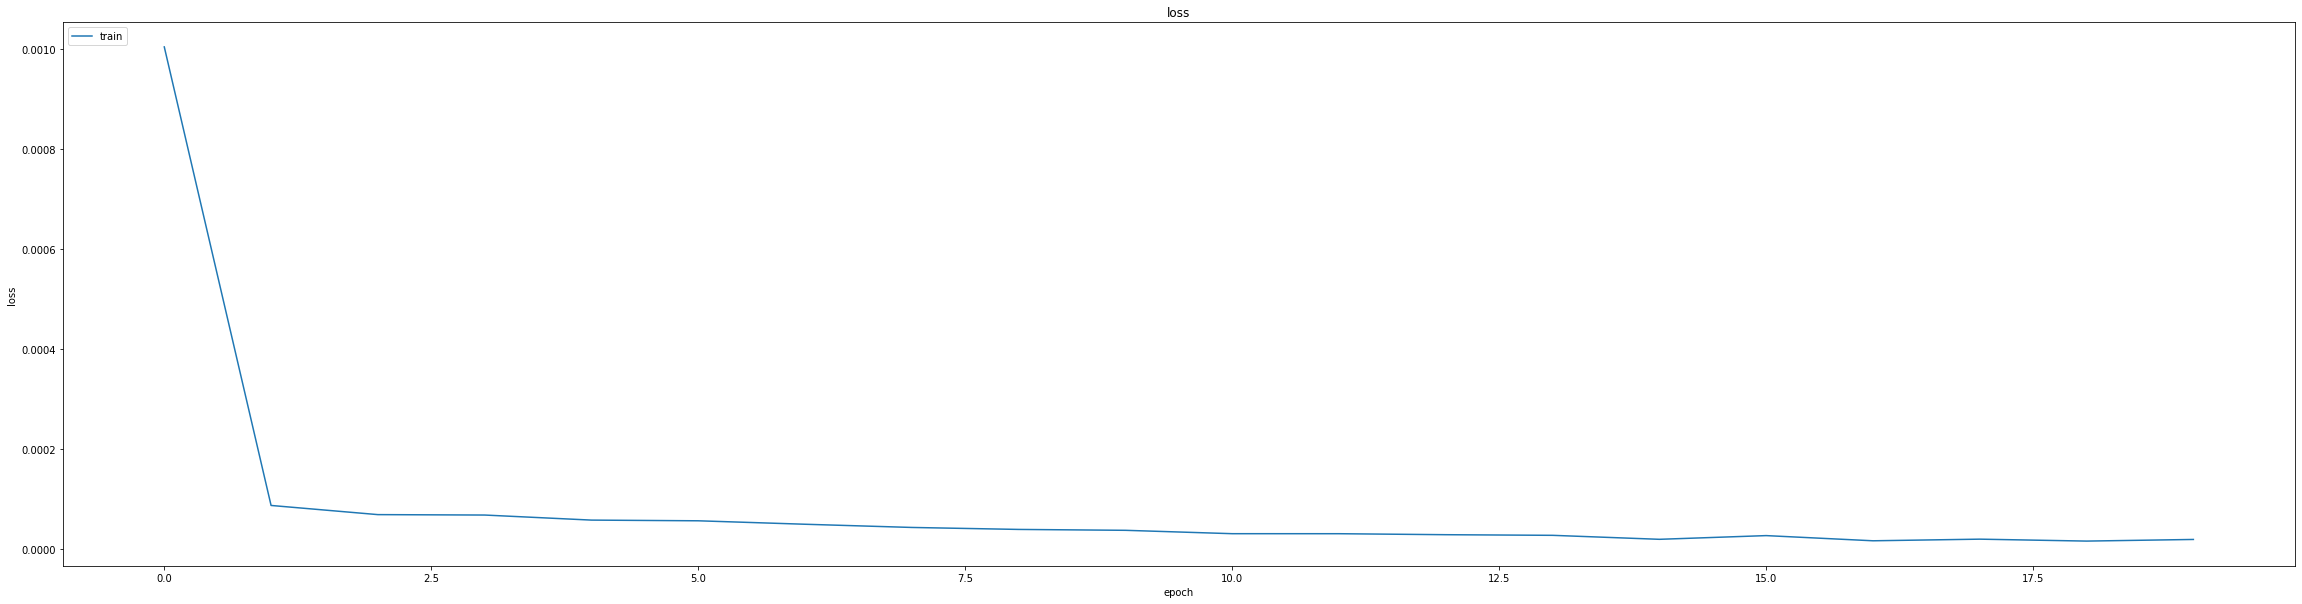

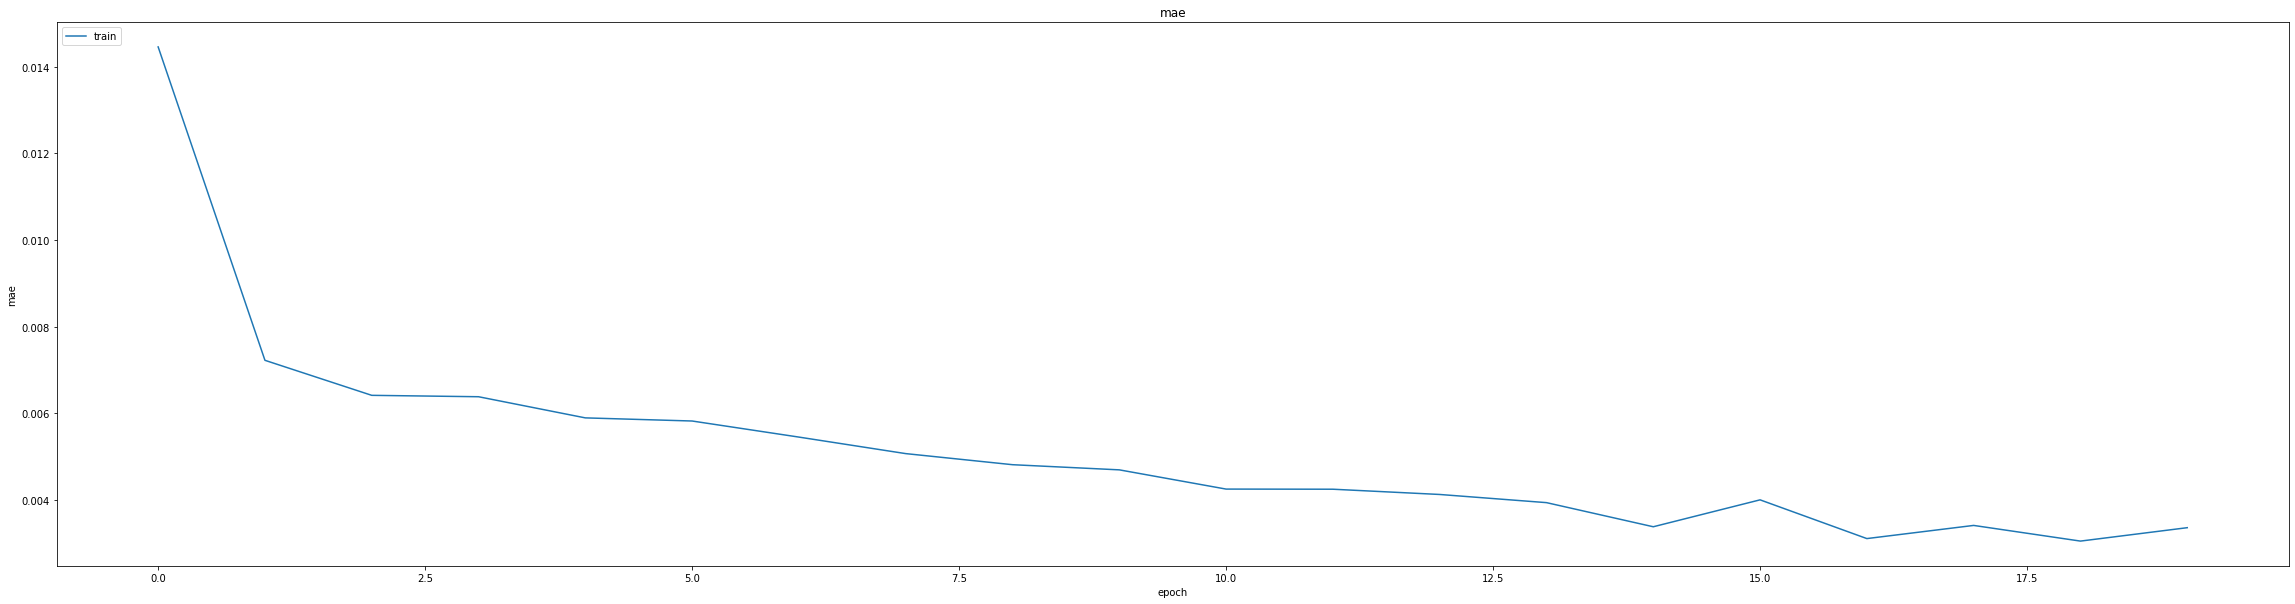

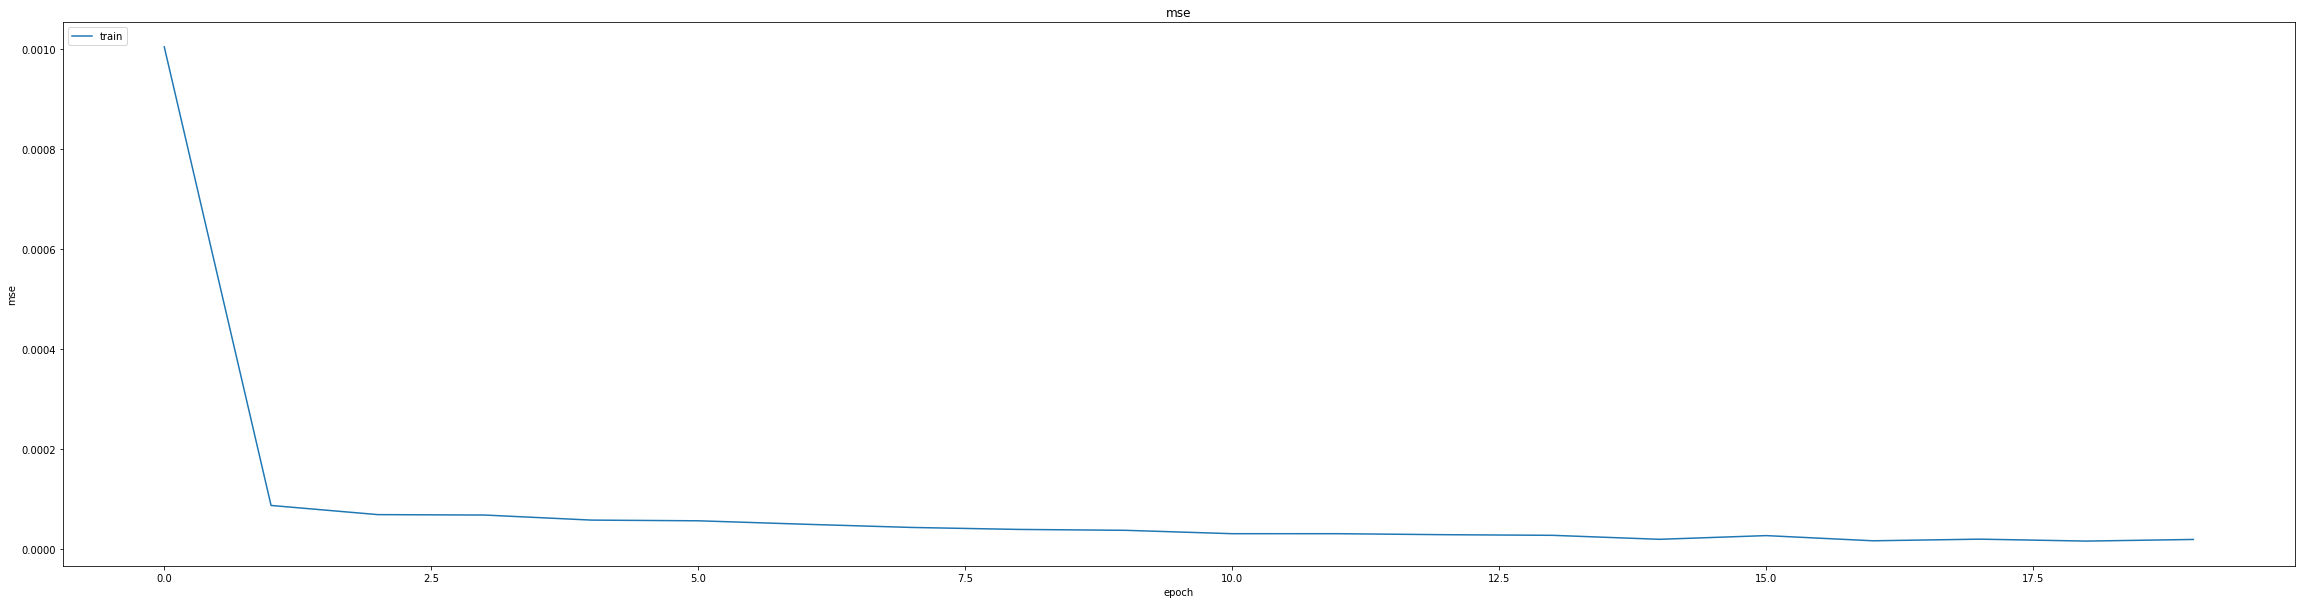

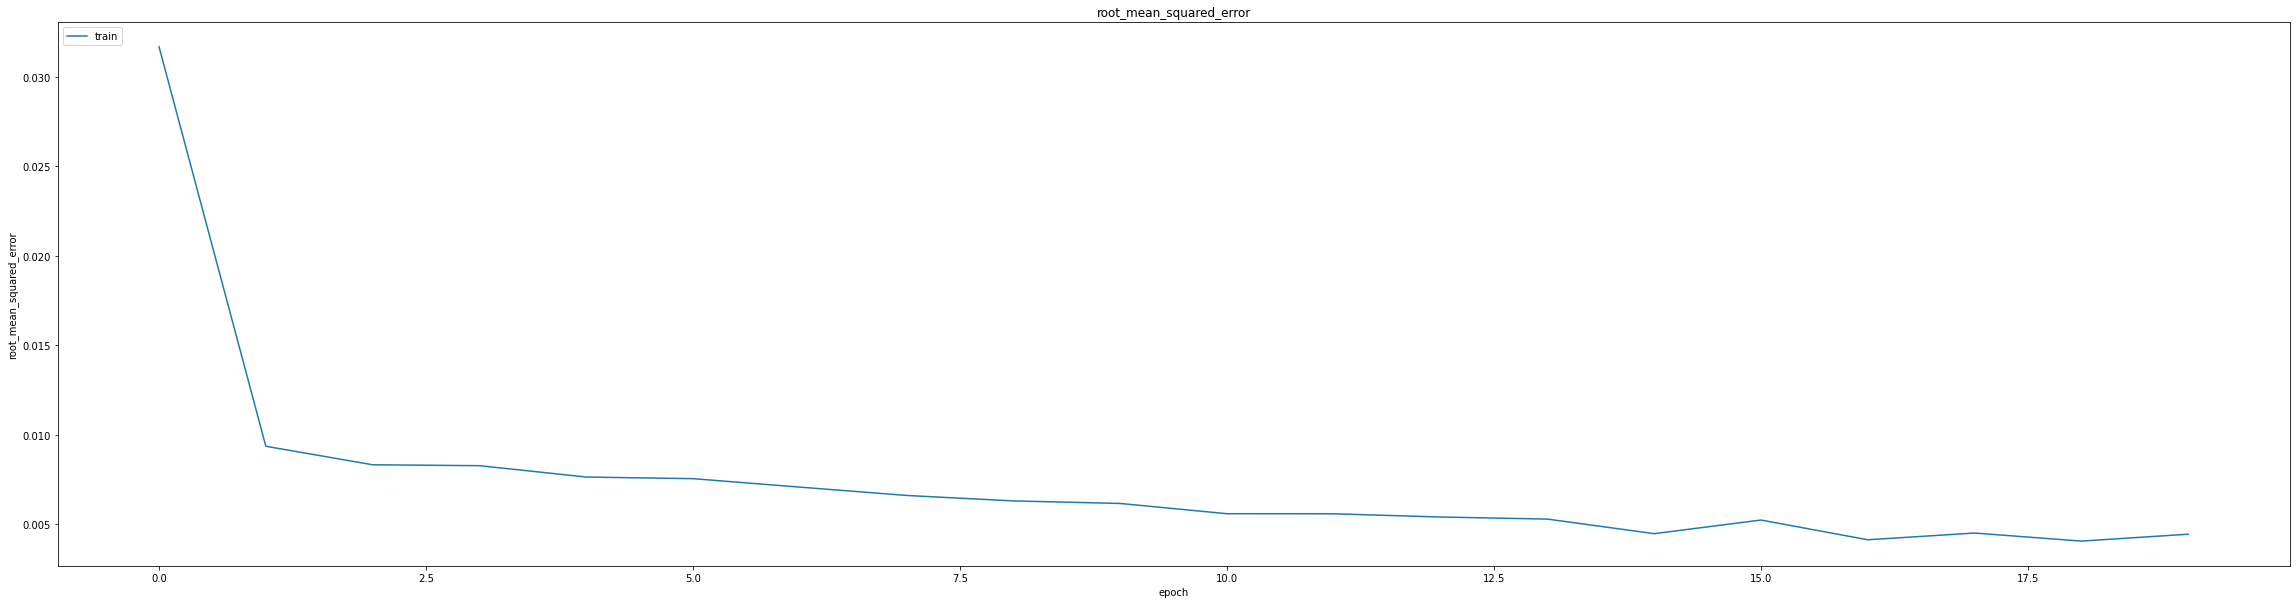

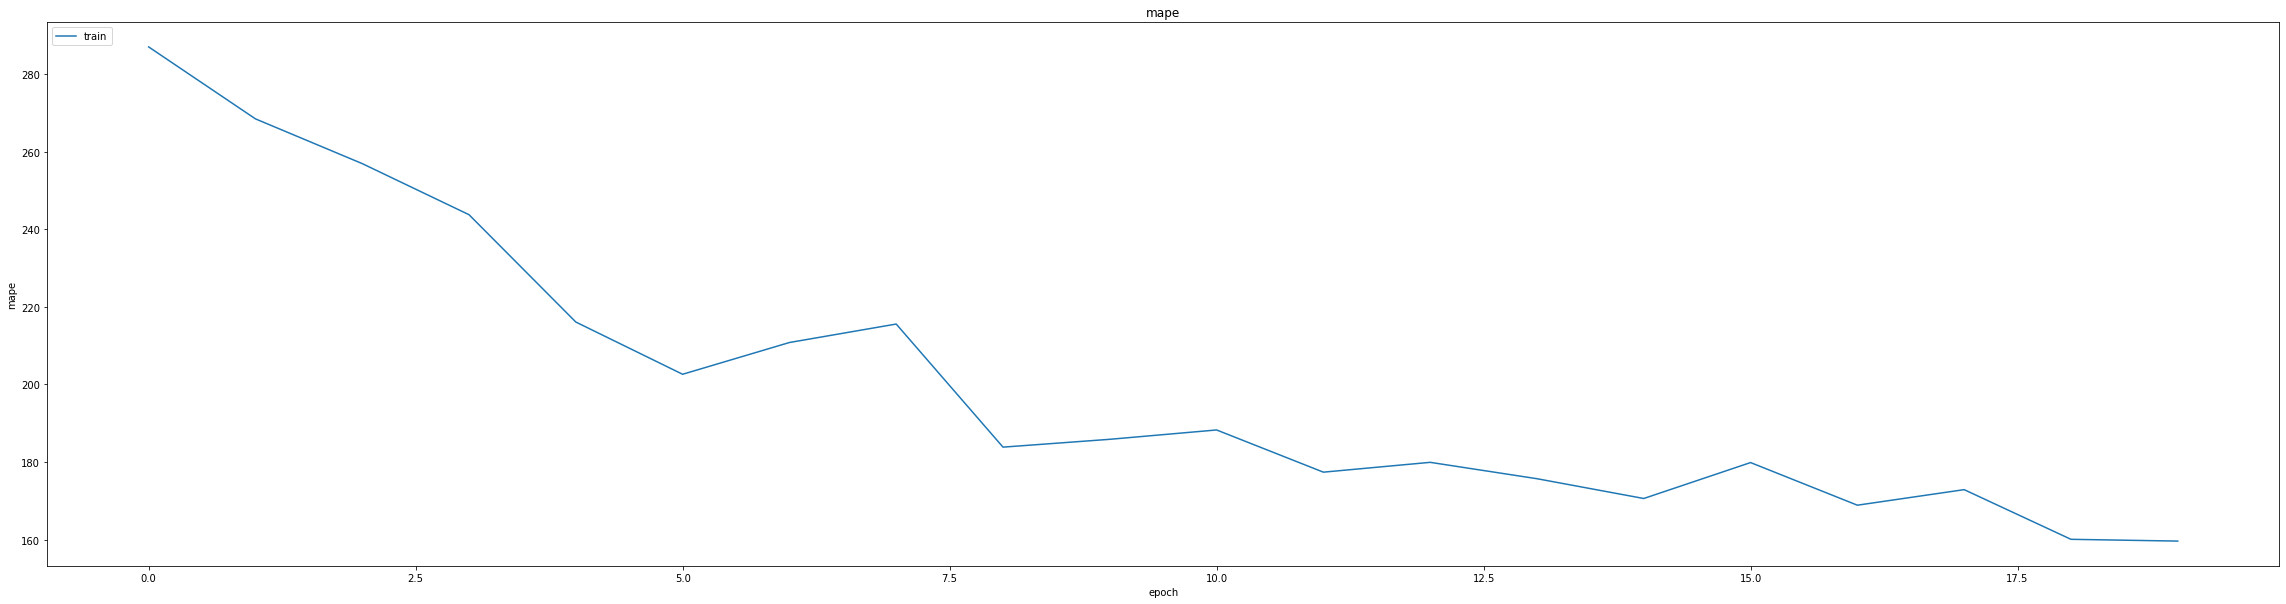

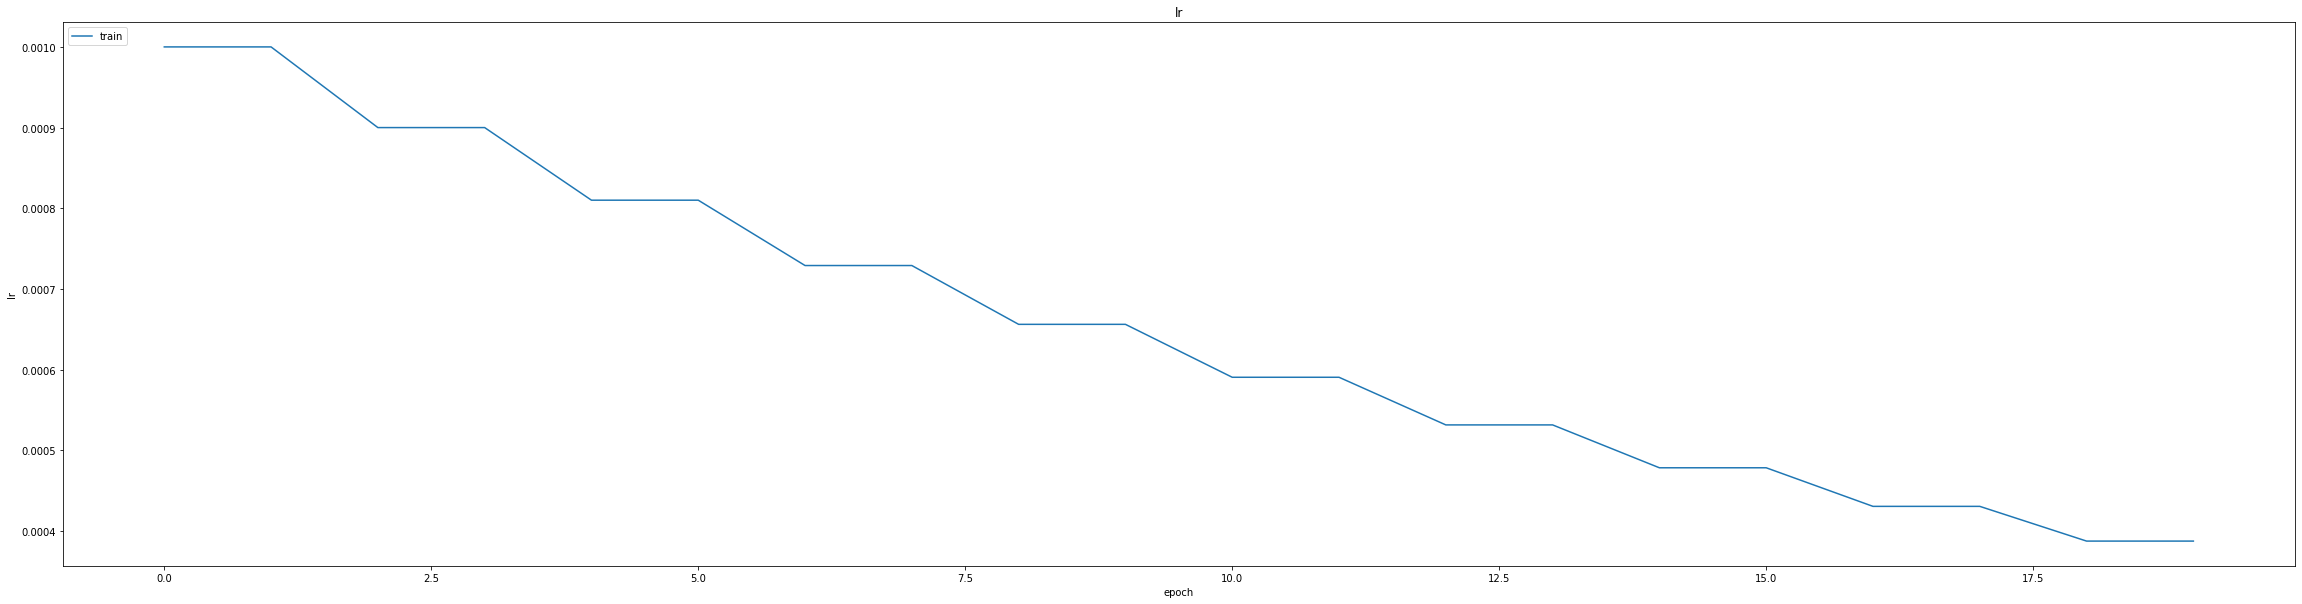

In [88]:
thesis.SummarizeHistory(history)

In [89]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005905826576054096
0.008050530217587948
1391/1391 [==============================] - 10s 6ms/step
0.9976044588216176


1391/1391 [==============================] - 9s 6ms/step


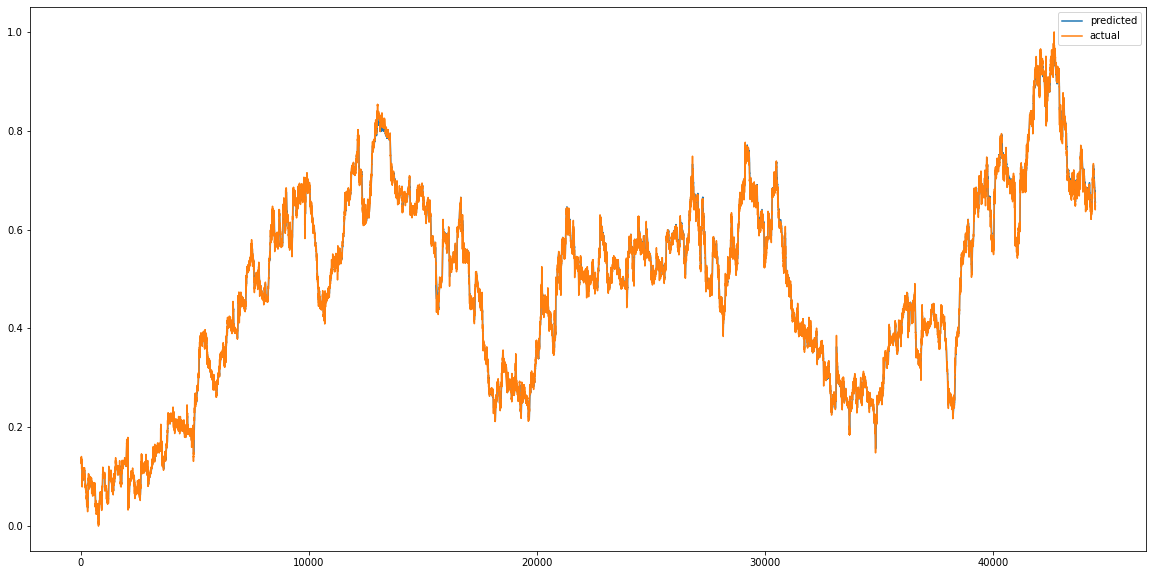

In [90]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


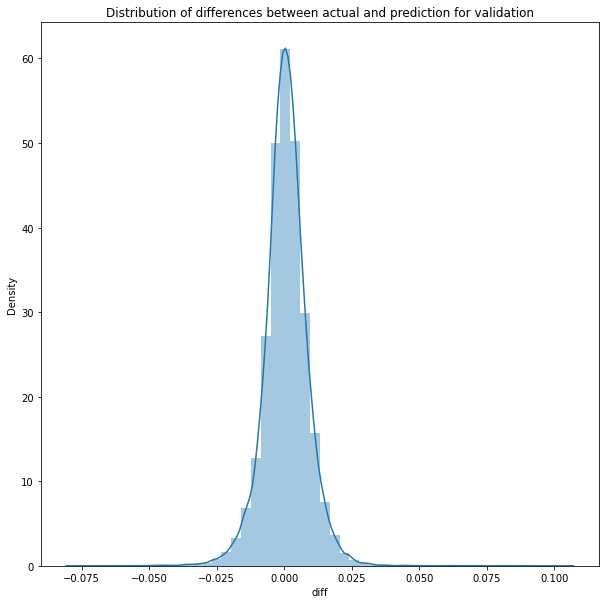

In [91]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 9s 6ms/step


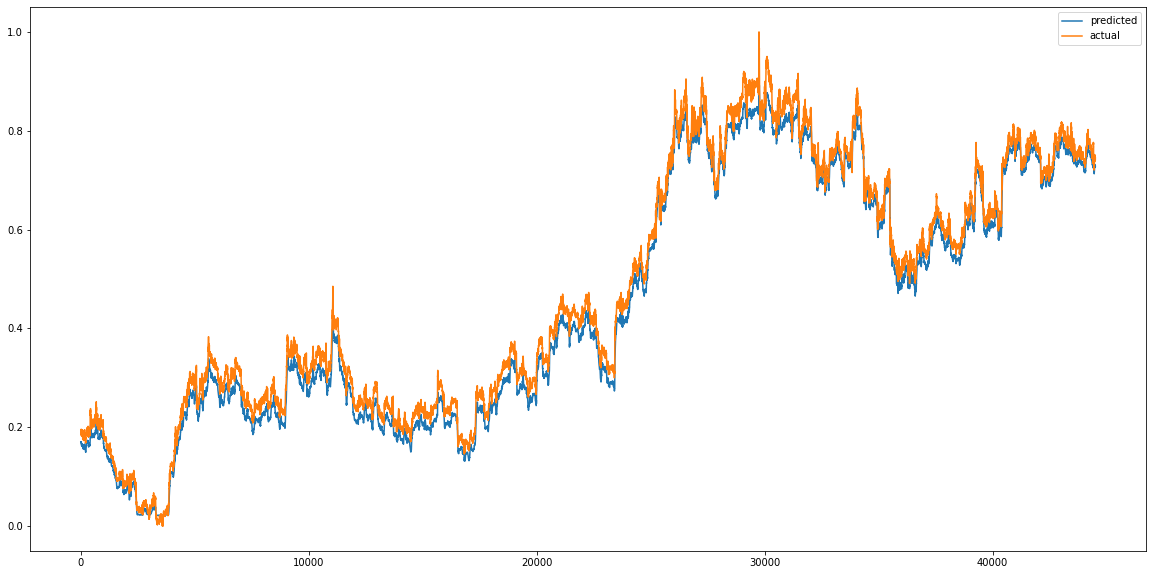

In [92]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


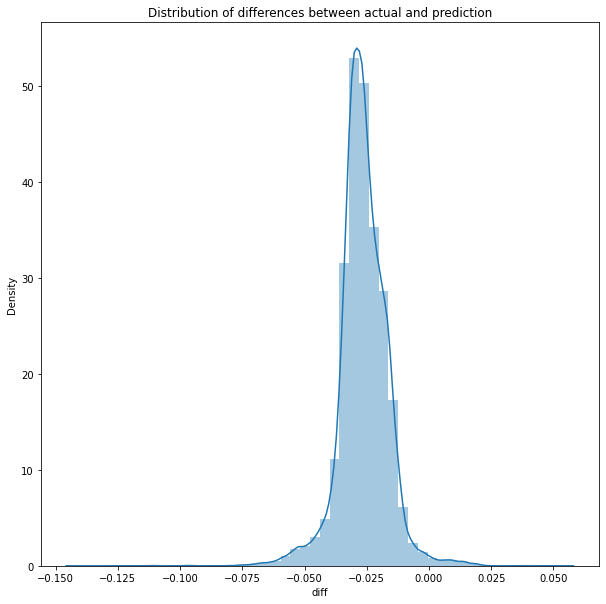

In [93]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0007912622483569575
RMSE :  0.02812938407354412
MAE :  0.026589214338198695
1391/1391 [==============================] - 9s 6ms/step
R2_Score  : 0.9874130505944975


count    44506.000000
mean        -0.026408
std          0.009691
min         -0.142299
25%         -0.031479
50%         -0.026880
75%         -0.020832
max          0.054607
Name: diff, dtype: float64

**LSTM_MODEL**

In [95]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_12 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_6 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 16)                5184      
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [96]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
345/347 [============================>.] - ETA: 0s - loss: 3887.4385 - mae: 36.4742 - mse: 3887.4385 - root_mean_squared_error: 62.3493 - mape: 1493881.7500
Epoch 1: val_mse improved from inf to 42.31834, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 22s 53ms/step - loss: 3866.1755 - mae: 36.3093 - mse: 3866.1755 - root_mean_squared_error: 62.1786 - mape: 1485636.0000 - val_loss: 42.3183 - val_mae: 6.5022 - val_mse: 42.3183 - val_root_mean_squared_error: 6.5053 - val_mape: 158945.6094
Epoch 2/60
344/347 [============================>.] - ETA: 0s - loss: 21.7655 - mae: 4.5615 - mse: 21.7655 - root_mean_squared_error: 4.6654 - mape: 33729.9805
Epoch 2: val_mse improved from 42.31834 to 9.67071, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 21.6708 - mae: 4.5503 - mse: 21.6708 - root_mean_squared_error: 4.6552 - mape: 33460.0000 - val_loss: 9.6707 - val_mae: 3.1034 - val_mse: 9.6707 - val_root_mean_squared_error: 3.1098 - val_mape: 81540.7188
Epoch 3/60
345/347 [============================>.] - ETA: 0s - loss: 6.7945 - mae: 2.5770 - mse: 6.7945 - root_mean_squared_error: 2.6066 - mape: 23968.3594
Epoch 3: val_mse improved from 9.67071 to 3.86320, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 6.7808 - mae: 2.5741 - mse: 6.7808 - root_mean_squared_error: 2.6040 - mape: 23842.2598 - val_loss: 3.8632 - val_mae: 1.9554 - val_mse: 3.8632 - val_root_mean_squared_error: 1.9655 - val_mape: 55395.8320
Epoch 4/60
345/347 [============================>.] - ETA: 0s - loss: 3.1417 - mae: 1.7515 - mse: 3.1417 - root_mean_squared_error: 1.7725 - mape: 18873.0020
Epoch 4: val_mse improved from 3.86320 to 1.91518, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 3.1368 - mae: 1.7501 - mse: 3.1368 - root_mean_squared_error: 1.7711 - mape: 18773.8008 - val_loss: 1.9152 - val_mae: 1.3695 - val_mse: 1.9152 - val_root_mean_squared_error: 1.3839 - val_mape: 42052.6094
Epoch 5/60
346/347 [============================>.] - ETA: 0s - loss: 1.7191 - mae: 1.2897 - mse: 1.7191 - root_mean_squared_error: 1.3111 - mape: 14012.4189
Epoch 5: val_mse improved from 1.91518 to 1.06156, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 1.7180 - mae: 1.2893 - mse: 1.7180 - root_mean_squared_error: 1.3107 - mape: 13977.5234 - val_loss: 1.0616 - val_mae: 1.0109 - val_mse: 1.0616 - val_root_mean_squared_error: 1.0303 - val_mape: 33885.5117
Epoch 6/60
346/347 [============================>.] - ETA: 0s - loss: 1.0344 - mae: 0.9924 - mse: 1.0344 - root_mean_squared_error: 1.0170 - mape: 10207.1211
Epoch 6: val_mse improved from 1.06156 to 0.62896, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 1.0338 - mae: 0.9921 - mse: 1.0338 - root_mean_squared_error: 1.0167 - mape: 10181.4834 - val_loss: 0.6290 - val_mae: 0.7676 - val_mse: 0.6290 - val_root_mean_squared_error: 0.7931 - val_mape: 28345.9316
Epoch 7/60
345/347 [============================>.] - ETA: 0s - loss: 0.6622 - mae: 0.7843 - mse: 0.6622 - root_mean_squared_error: 0.8137 - mape: 8931.3438
Epoch 7: val_mse improved from 0.62896 to 0.38926, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 18s 51ms/step - loss: 0.6615 - mae: 0.7839 - mse: 0.6615 - root_mean_squared_error: 0.8133 - mape: 8884.8848 - val_loss: 0.3893 - val_mae: 0.5912 - val_mse: 0.3893 - val_root_mean_squared_error: 0.6239 - val_mape: 24328.5078
Epoch 8/60
345/347 [============================>.] - ETA: 0s - loss: 0.4423 - mae: 0.6296 - mse: 0.4423 - root_mean_squared_error: 0.6651 - mape: 8042.3384
Epoch 8: val_mse improved from 0.38926 to 0.24893, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.4419 - mae: 0.6293 - mse: 0.4419 - root_mean_squared_error: 0.6648 - mape: 7999.9702 - val_loss: 0.2489 - val_mae: 0.4576 - val_mse: 0.2489 - val_root_mean_squared_error: 0.4989 - val_mape: 21280.8750
Epoch 9/60
344/347 [============================>.] - ETA: 0s - loss: 0.3059 - mae: 0.5113 - mse: 0.3059 - root_mean_squared_error: 0.5530 - mape: 6883.6216
Epoch 9: val_mse improved from 0.24893 to 0.16398, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.3055 - mae: 0.5109 - mse: 0.3055 - root_mean_squared_error: 0.5527 - mape: 6828.9062 - val_loss: 0.1640 - val_mae: 0.3567 - val_mse: 0.1640 - val_root_mean_squared_error: 0.4049 - val_mape: 18892.5547
Epoch 10/60
347/347 [==============================] - ETA: 0s - loss: 0.2175 - mae: 0.4197 - mse: 0.2175 - root_mean_squared_error: 0.4664 - mape: 5934.8511
Epoch 10: val_mse improved from 0.16398 to 0.11169, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 0.2175 - mae: 0.4197 - mse: 0.2175 - root_mean_squared_error: 0.4664 - mape: 5934.8511 - val_loss: 0.1117 - val_mae: 0.2806 - val_mse: 0.1117 - val_root_mean_squared_error: 0.3342 - val_mape: 16975.1289
Epoch 11/60
347/347 [==============================] - ETA: 0s - loss: 0.1595 - mae: 0.3535 - mse: 0.1595 - root_mean_squared_error: 0.3993 - mape: 5597.4033
Epoch 11: val_mse improved from 0.11169 to 0.07949, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.1595 - mae: 0.3535 - mse: 0.1595 - root_mean_squared_error: 0.3993 - mape: 5597.4033 - val_loss: 0.0795 - val_mae: 0.2246 - val_mse: 0.0795 - val_root_mean_squared_error: 0.2819 - val_mape: 15408.5107
Epoch 12/60
346/347 [============================>.] - ETA: 0s - loss: 0.1206 - mae: 0.3046 - mse: 0.1206 - root_mean_squared_error: 0.3472 - mape: 4993.7109
Epoch 12: val_mse improved from 0.07949 to 0.06001, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.1205 - mae: 0.3045 - mse: 0.1205 - root_mean_squared_error: 0.3472 - mape: 4981.1040 - val_loss: 0.0600 - val_mae: 0.1914 - val_mse: 0.0600 - val_root_mean_squared_error: 0.2450 - val_mape: 14113.8447
Epoch 13/60
345/347 [============================>.] - ETA: 0s - loss: 0.0944 - mae: 0.2660 - mse: 0.0944 - root_mean_squared_error: 0.3072 - mape: 4538.0972
Epoch 13: val_mse improved from 0.06001 to 0.04873, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0943 - mae: 0.2659 - mse: 0.0943 - root_mean_squared_error: 0.3071 - mape: 4514.0654 - val_loss: 0.0487 - val_mae: 0.1720 - val_mse: 0.0487 - val_root_mean_squared_error: 0.2207 - val_mape: 13035.4199
Epoch 14/60
345/347 [============================>.] - ETA: 0s - loss: 0.0766 - mae: 0.2372 - mse: 0.0766 - root_mean_squared_error: 0.2767 - mape: 4359.5137
Epoch 14: val_mse improved from 0.04873 to 0.04275, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0765 - mae: 0.2371 - mse: 0.0765 - root_mean_squared_error: 0.2766 - mape: 4336.3364 - val_loss: 0.0427 - val_mae: 0.1634 - val_mse: 0.0427 - val_root_mean_squared_error: 0.2068 - val_mape: 12131.0947
Epoch 15/60
345/347 [============================>.] - ETA: 0s - loss: 0.0647 - mae: 0.2157 - mse: 0.0647 - root_mean_squared_error: 0.2543 - mape: 4169.1626
Epoch 15: val_mse improved from 0.04275 to 0.04018, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 0.0646 - mae: 0.2156 - mse: 0.0646 - root_mean_squared_error: 0.2542 - mape: 4147.0947 - val_loss: 0.0402 - val_mae: 0.1617 - val_mse: 0.0402 - val_root_mean_squared_error: 0.2005 - val_mape: 11372.7715
Epoch 16/60
346/347 [============================>.] - ETA: 0s - loss: 0.0567 - mae: 0.2001 - mse: 0.0567 - root_mean_squared_error: 0.2382 - mape: 3930.1277
Epoch 16: val_mse improved from 0.04018 to 0.03977, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 0.0567 - mae: 0.2001 - mse: 0.0567 - root_mean_squared_error: 0.2381 - mape: 3920.1221 - val_loss: 0.0398 - val_mae: 0.1639 - val_mse: 0.0398 - val_root_mean_squared_error: 0.1994 - val_mape: 10737.6846
Epoch 17/60
346/347 [============================>.] - ETA: 0s - loss: 0.0516 - mae: 0.1898 - mse: 0.0516 - root_mean_squared_error: 0.2272 - mape: 3610.8901
Epoch 17: val_mse did not improve from 0.03977
347/347 [==============================] - 6s 16ms/step - loss: 0.0516 - mae: 0.1898 - mse: 0.0516 - root_mean_squared_error: 0.2272 - mape: 3601.6714 - val_loss: 0.0406 - val_mae: 0.1675 - val_mse: 0.0406 - val_root_mean_squared_error: 0.2016 - val_mape: 10209.0771
Epoch 18/60
346/347 [============================>.] - ETA: 0s - loss: 0.0484 - mae: 0.1832 - mse: 0.0484 - root_mean_squared_error: 0.2199 - mape: 3403.4280
Epoch 18: val_mse did not improve from 0.03977
347/347 [==============================] - 6s 16ms/step

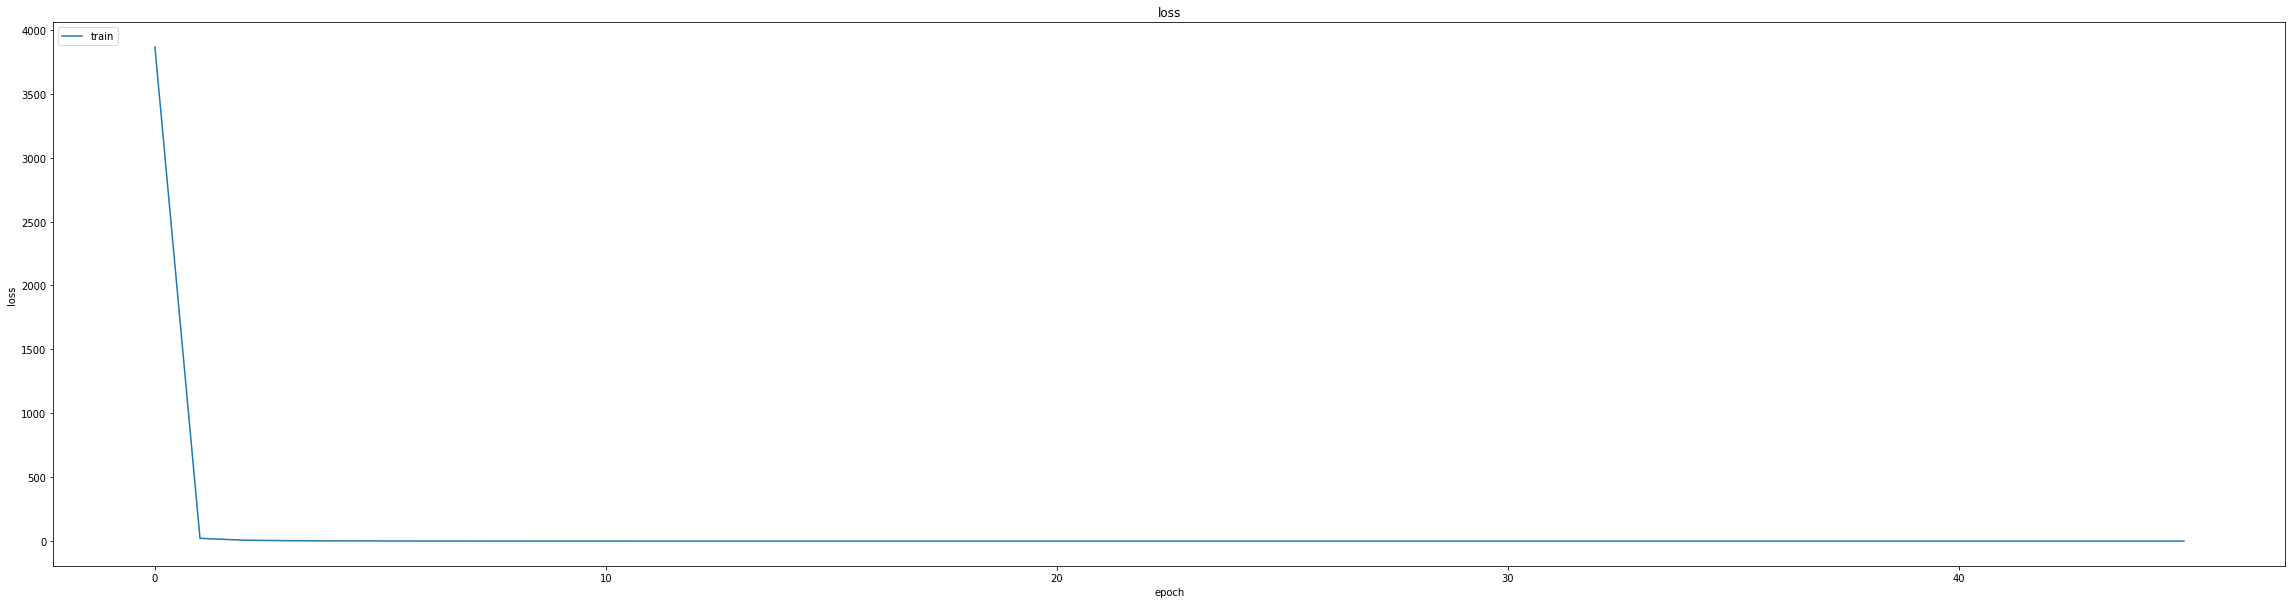

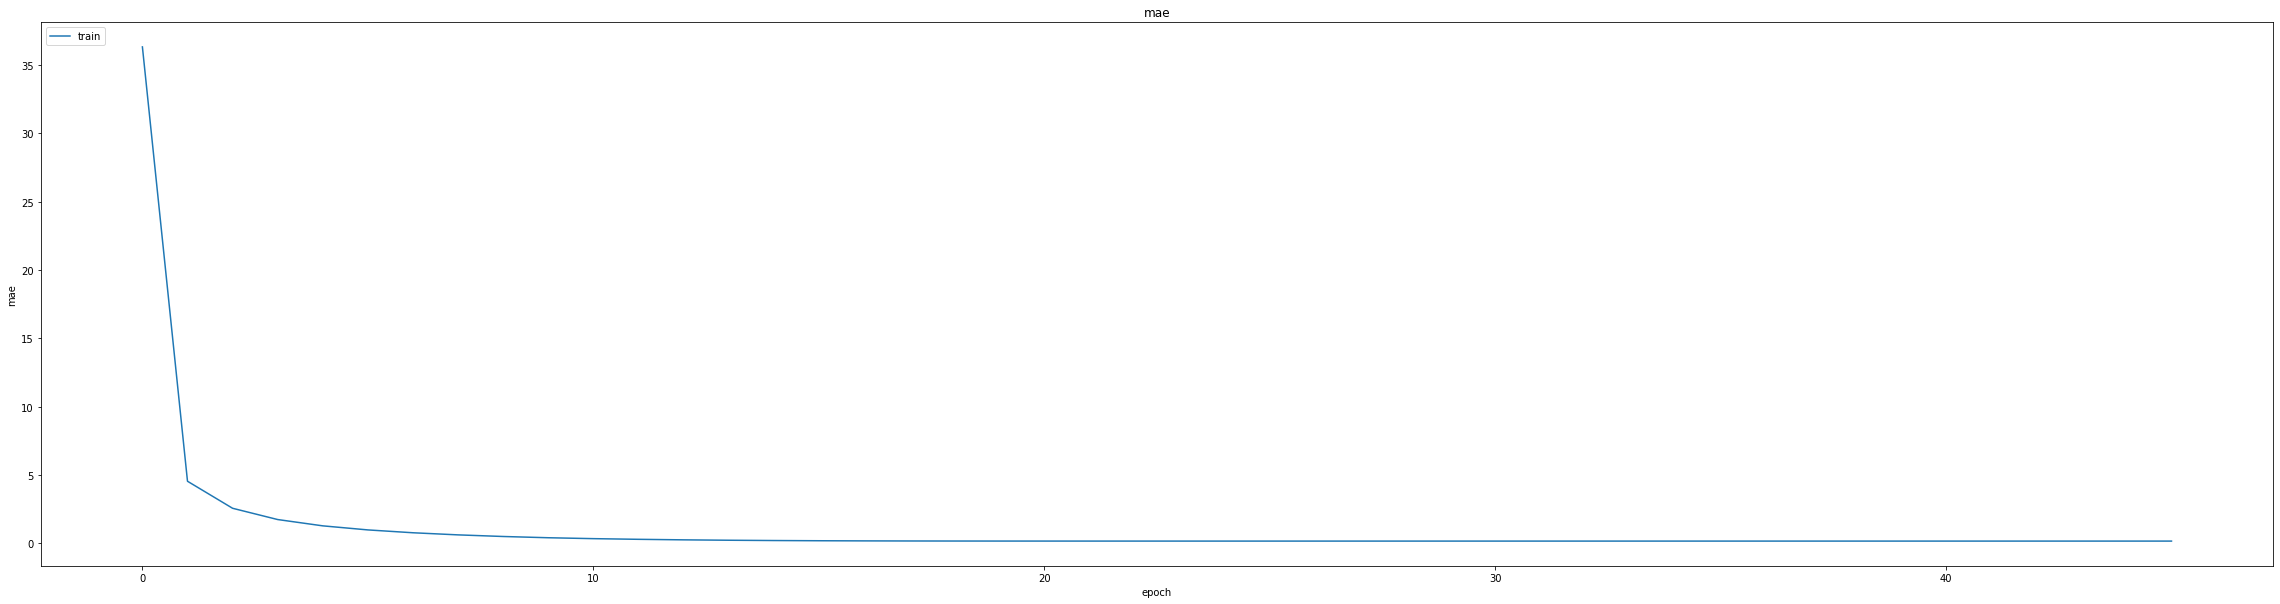

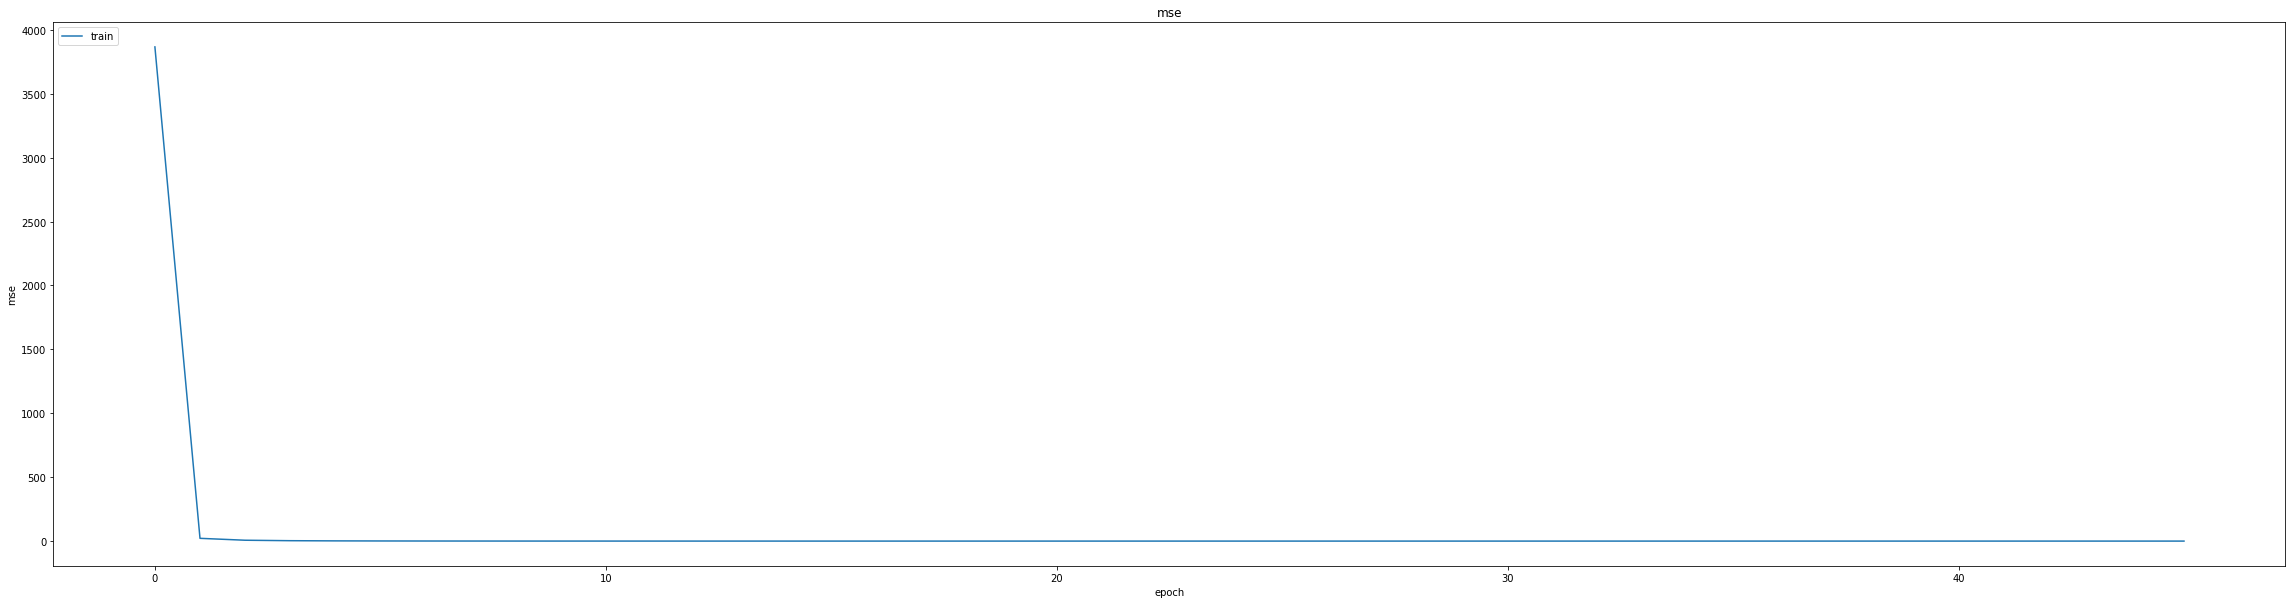

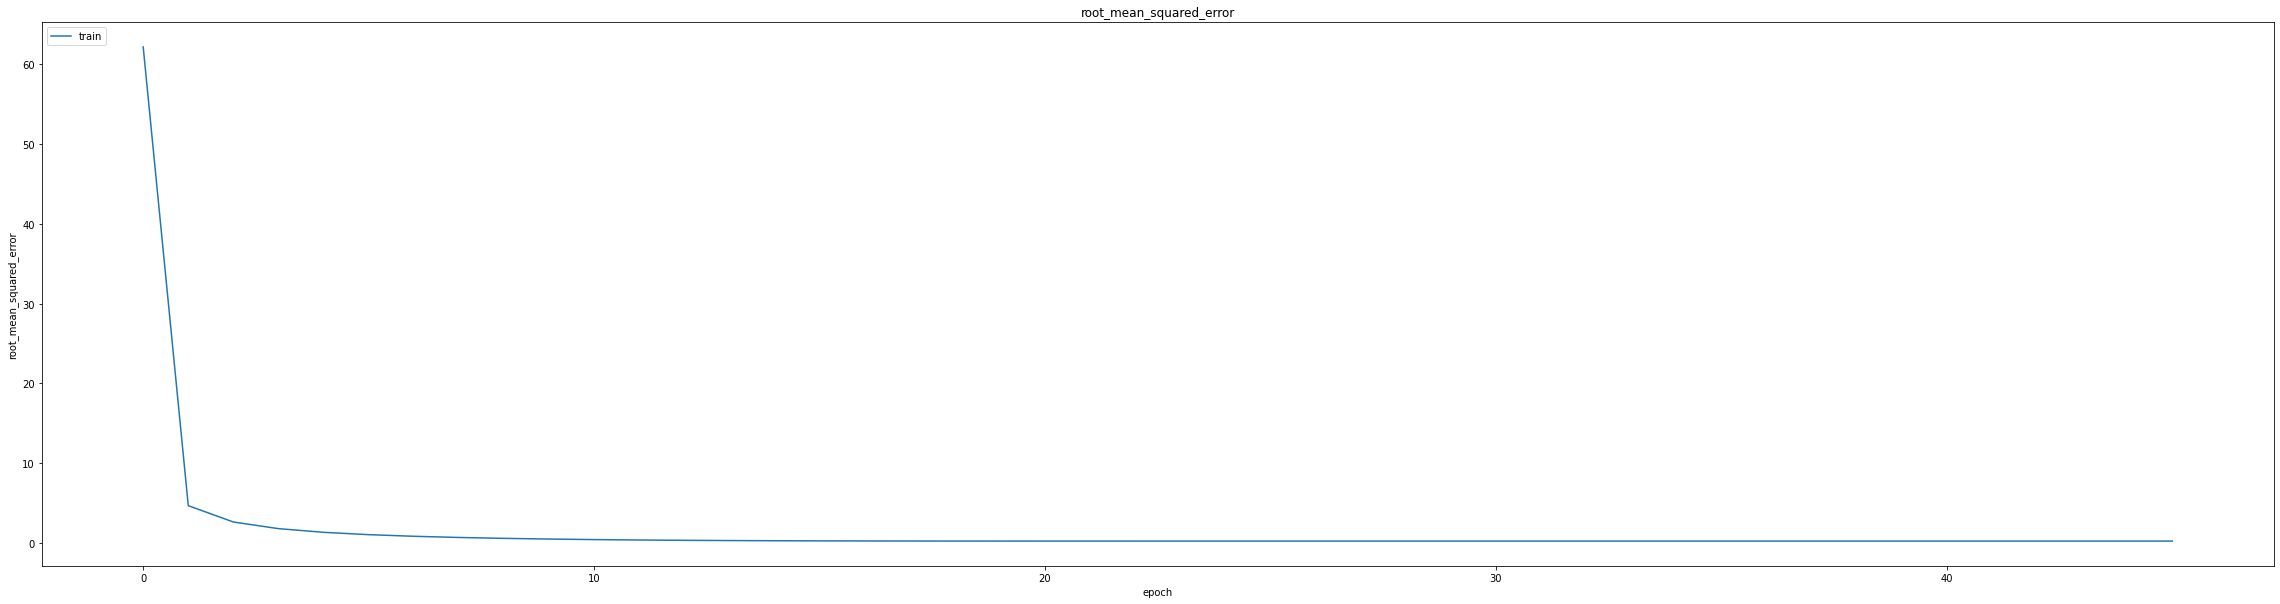

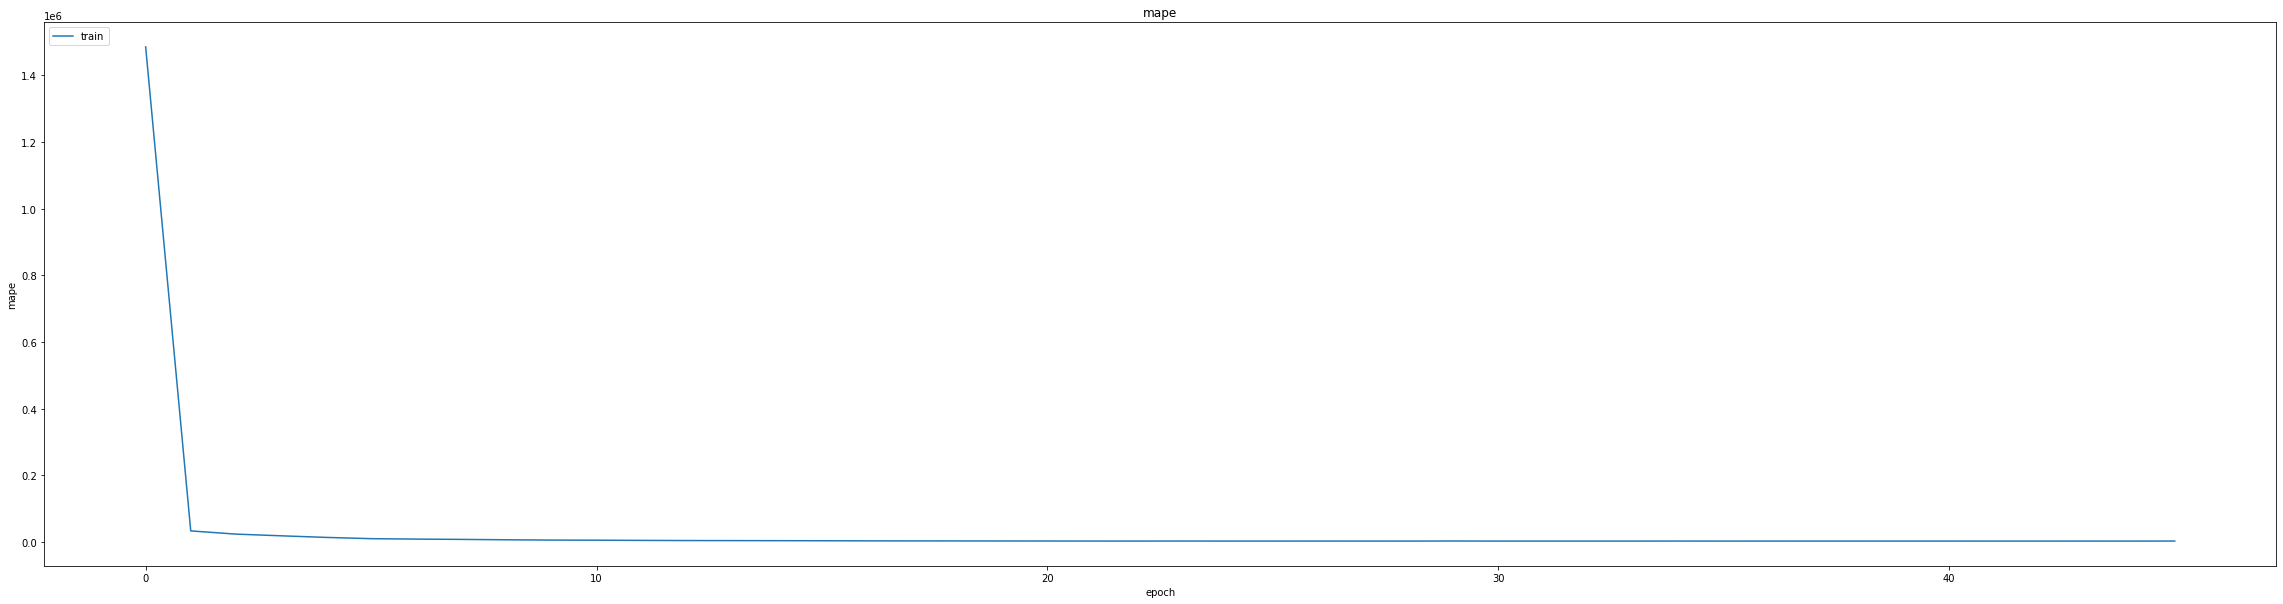

In [97]:
thesis.SummarizeHistory(history)

In [98]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.1617068350315094
0.19942186772823334
1391/1391 [==============================] - 7s 4ms/step
-0.2701373831081608


In [99]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [100]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


344/347 [============================>.] - ETA: 0s - loss: 0.0159 - mae: 0.0786 - mse: 0.0159 - root_mean_squared_error: 0.1262 - mape: 2935.9138
Epoch 1: val_mse improved from 0.03977 to 0.00050, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 23s 50ms/step - loss: 0.0158 - mae: 0.0781 - mse: 0.0158 - root_mean_squared_error: 0.1257 - mape: 2911.4006 - val_loss: 5.0002e-04 - val_mae: 0.0166 - val_mse: 5.0002e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 2138.8918 - lr: 0.0010
Epoch 2/20
347/347 [==============================] - ETA: 0s - loss: 4.3933e-04 - mae: 0.0154 - mse: 4.3933e-04 - root_mean_squared_error: 0.0210 - mape: 552.7474
Epoch 2: val_mse improved from 0.00050 to 0.00046, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 4.3933e-04 - mae: 0.0154 - mse: 4.3933e-04 - root_mean_squared_error: 0.0210 - mape: 552.7474 - val_loss: 4.5504e-04 - val_mae: 0.0155 - val_mse: 4.5504e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 1451.0999 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
347/347 [==============================] - ETA: 0s - loss: 2.2182e-04 - mae: 0.0112 - mse: 2.2182e-04 - root_mean_squared_error: 0.0149 - mape: 473.9213
Epoch 3: val_mse improved from 0.00046 to 0.00035, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 2.2182e-04 - mae: 0.0112 - mse: 2.2182e-04 - root_mean_squared_error: 0.0149 - mape: 473.9213 - val_loss: 3.5373e-04 - val_mae: 0.0139 - val_mse: 3.5373e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 1155.8020 - lr: 9.0000e-04
Epoch 4/20
347/347 [==============================] - ETA: 0s - loss: 1.5545e-04 - mae: 0.0094 - mse: 1.5545e-04 - root_mean_squared_error: 0.0125 - mape: 360.5299
Epoch 4: val_mse did not improve from 0.00035
347/347 [==============================] - 6s 18ms/step - loss: 1.5545e-04 - mae: 0.0094 - mse: 1.5545e-04 - root_mean_squared_error: 0.0125 - mape: 360.5299 - val_loss: 4.9142e-04 - val_mae: 0.0166 - val_mse: 4.9142e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 1139.5470 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
344/347 [============================>.] - ETA: 0s - loss: 1.1838e-04 - mae: 0.0082 - mse: 1.1838e-04 - root_mean_squared_error: 0.0109 - mape: 30

347/347 [==============================] - 17s 48ms/step - loss: 7.7696e-05 - mae: 0.0066 - mse: 7.7696e-05 - root_mean_squared_error: 0.0088 - mape: 237.3362 - val_loss: 3.3057e-04 - val_mae: 0.0133 - val_mse: 3.3057e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 965.3806 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
345/347 [============================>.] - ETA: 0s - loss: 6.7666e-05 - mae: 0.0061 - mse: 6.7666e-05 - root_mean_squared_error: 0.0082 - mape: 233.9169
Epoch 11: val_mse did not improve from 0.00033
347/347 [==============================] - 7s 20ms/step - loss: 6.7624e-05 - mae: 0.0061 - mse: 6.7624e-05 - root_mean_squared_error: 0.0082 - mape: 232.6428 - val_loss: 3.8631e-04 - val_mae: 0.0146 - val_mse: 3.8631e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 929.7620 - lr: 5.9049e-04
Epoch 12/20
344/347 [============================>.] - ETA: 0s - loss: 6.6497e-05 - mae: 0.0061 - mse: 6.6497e-05 - root_mean_squared_error: 0.0082 - mape: 2

347/347 [==============================] - 17s 48ms/step - loss: 5.8449e-05 - mae: 0.0057 - mse: 5.8449e-05 - root_mean_squared_error: 0.0076 - mape: 220.5365 - val_loss: 3.1519e-04 - val_mae: 0.0130 - val_mse: 3.1519e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 901.6479 - lr: 5.3144e-04
Epoch 14/20
344/347 [============================>.] - ETA: 0s - loss: 5.8411e-05 - mae: 0.0057 - mse: 5.8411e-05 - root_mean_squared_error: 0.0076 - mape: 221.9452
Epoch 14: val_mse improved from 0.00032 to 0.00030, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 5.8365e-05 - mae: 0.0057 - mse: 5.8365e-05 - root_mean_squared_error: 0.0076 - mape: 220.1028 - val_loss: 3.0049e-04 - val_mae: 0.0129 - val_mse: 3.0049e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 887.9500 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
344/347 [============================>.] - ETA: 0s - loss: 5.3494e-05 - mae: 0.0054 - mse: 5.3494e-05 - root_mean_squared_error: 0.0073 - mape: 211.1797
Epoch 15: val_mse did not improve from 0.00030
347/347 [==============================] - 6s 17ms/step - loss: 5.3561e-05 - mae: 0.0054 - mse: 5.3561e-05 - root_mean_squared_error: 0.0073 - mape: 209.4324 - val_loss: 3.0978e-04 - val_mae: 0.0130 - val_mse: 3.0978e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 792.5966 - lr: 4.7830e-04
Epoch 16/20
346/347 [============================>.] - ETA: 0s - loss: 4.8119e-05 - mae: 0.0051 - mse: 4.8119e-05 - root_mean_squared_error: 0.0069 - mape: 

347/347 [==============================] - 17s 48ms/step - loss: 4.6909e-05 - mae: 0.0051 - mse: 4.6909e-05 - root_mean_squared_error: 0.0068 - mape: 198.5905 - val_loss: 2.4030e-04 - val_mae: 0.0114 - val_mse: 2.4030e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 799.3724 - lr: 4.3047e-04
Epoch 18/20
347/347 [==============================] - ETA: 0s - loss: 4.5248e-05 - mae: 0.0050 - mse: 4.5248e-05 - root_mean_squared_error: 0.0067 - mape: 198.1206
Epoch 18: val_mse improved from 0.00024 to 0.00022, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 4.5248e-05 - mae: 0.0050 - mse: 4.5248e-05 - root_mean_squared_error: 0.0067 - mape: 198.1206 - val_loss: 2.1887e-04 - val_mae: 0.0108 - val_mse: 2.1887e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 593.3348 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/20
344/347 [============================>.] - ETA: 0s - loss: 4.0292e-05 - mae: 0.0047 - mse: 4.0292e-05 - root_mean_squared_error: 0.0063 - mape: 193.2792
Epoch 19: val_mse improved from 0.00022 to 0.00022, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 4.0335e-05 - mae: 0.0047 - mse: 4.0335e-05 - root_mean_squared_error: 0.0064 - mape: 191.6759 - val_loss: 2.1659e-04 - val_mae: 0.0109 - val_mse: 2.1659e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 767.0670 - lr: 3.8742e-04
Epoch 20/20
344/347 [============================>.] - ETA: 0s - loss: 4.0824e-05 - mae: 0.0048 - mse: 4.0824e-05 - root_mean_squared_error: 0.0064 - mape: 192.3475
Epoch 20: val_mse improved from 0.00022 to 0.00020, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 4.0845e-05 - mae: 0.0048 - mse: 4.0845e-05 - root_mean_squared_error: 0.0064 - mape: 190.7478 - val_loss: 1.9978e-04 - val_mae: 0.0103 - val_mse: 1.9978e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 712.0654 - lr: 3.8742e-04


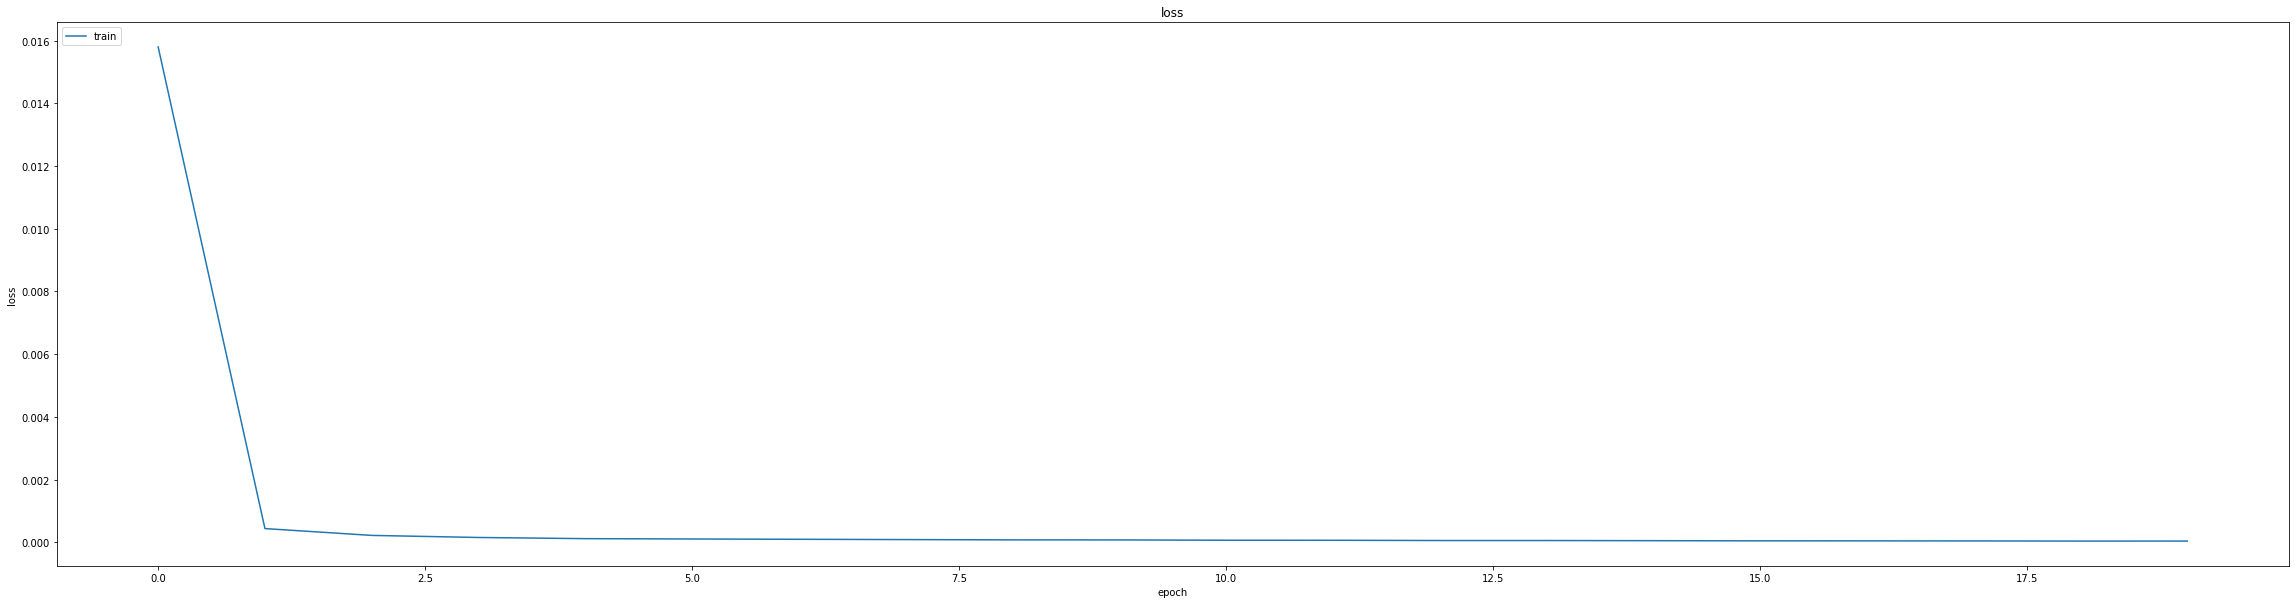

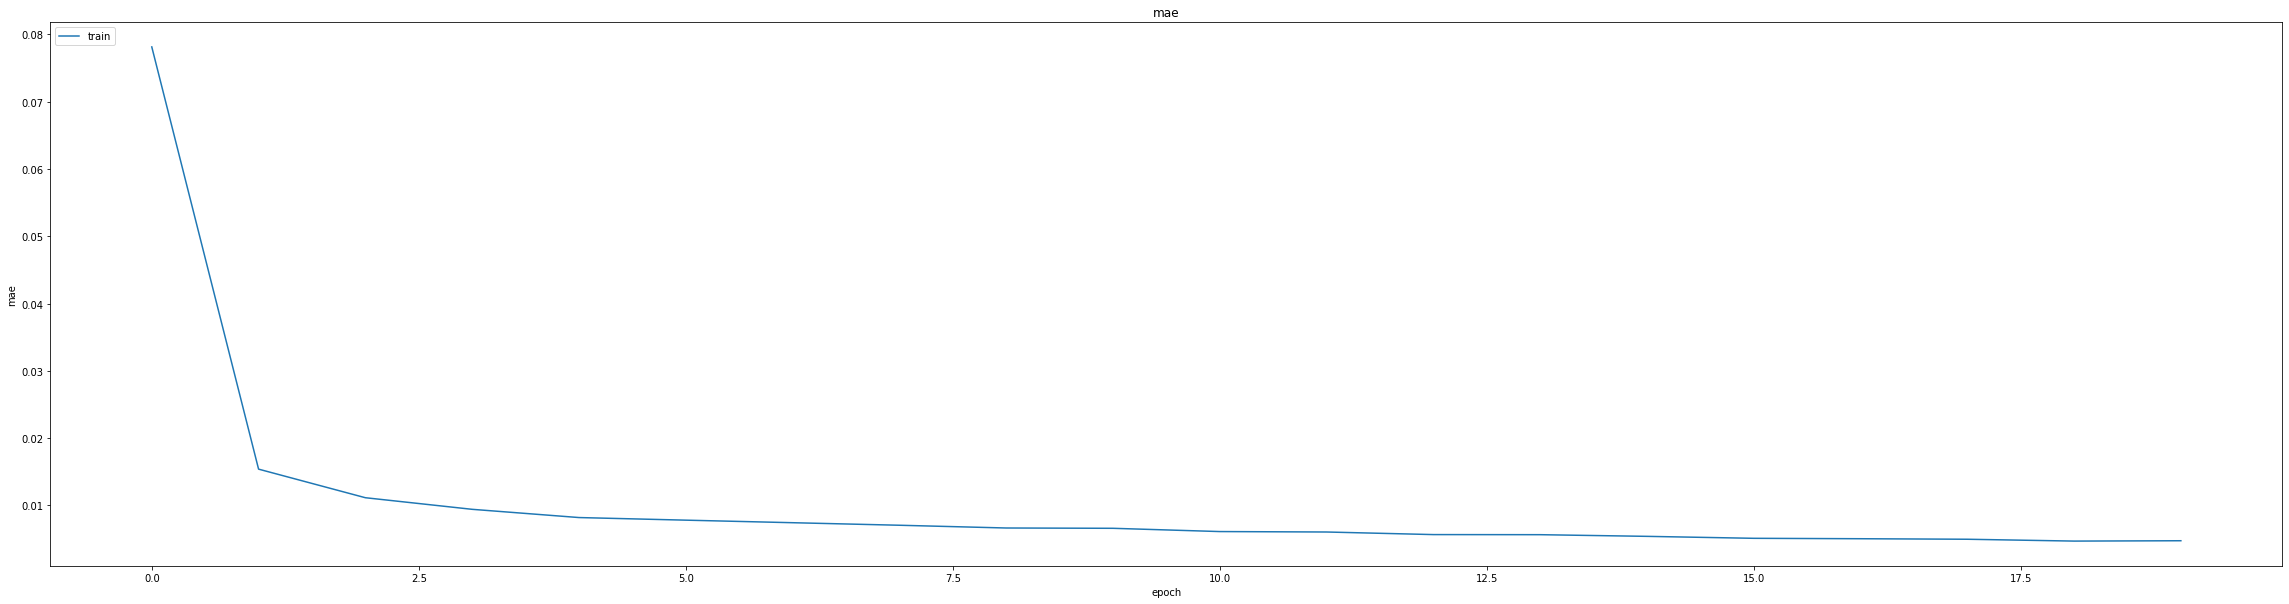

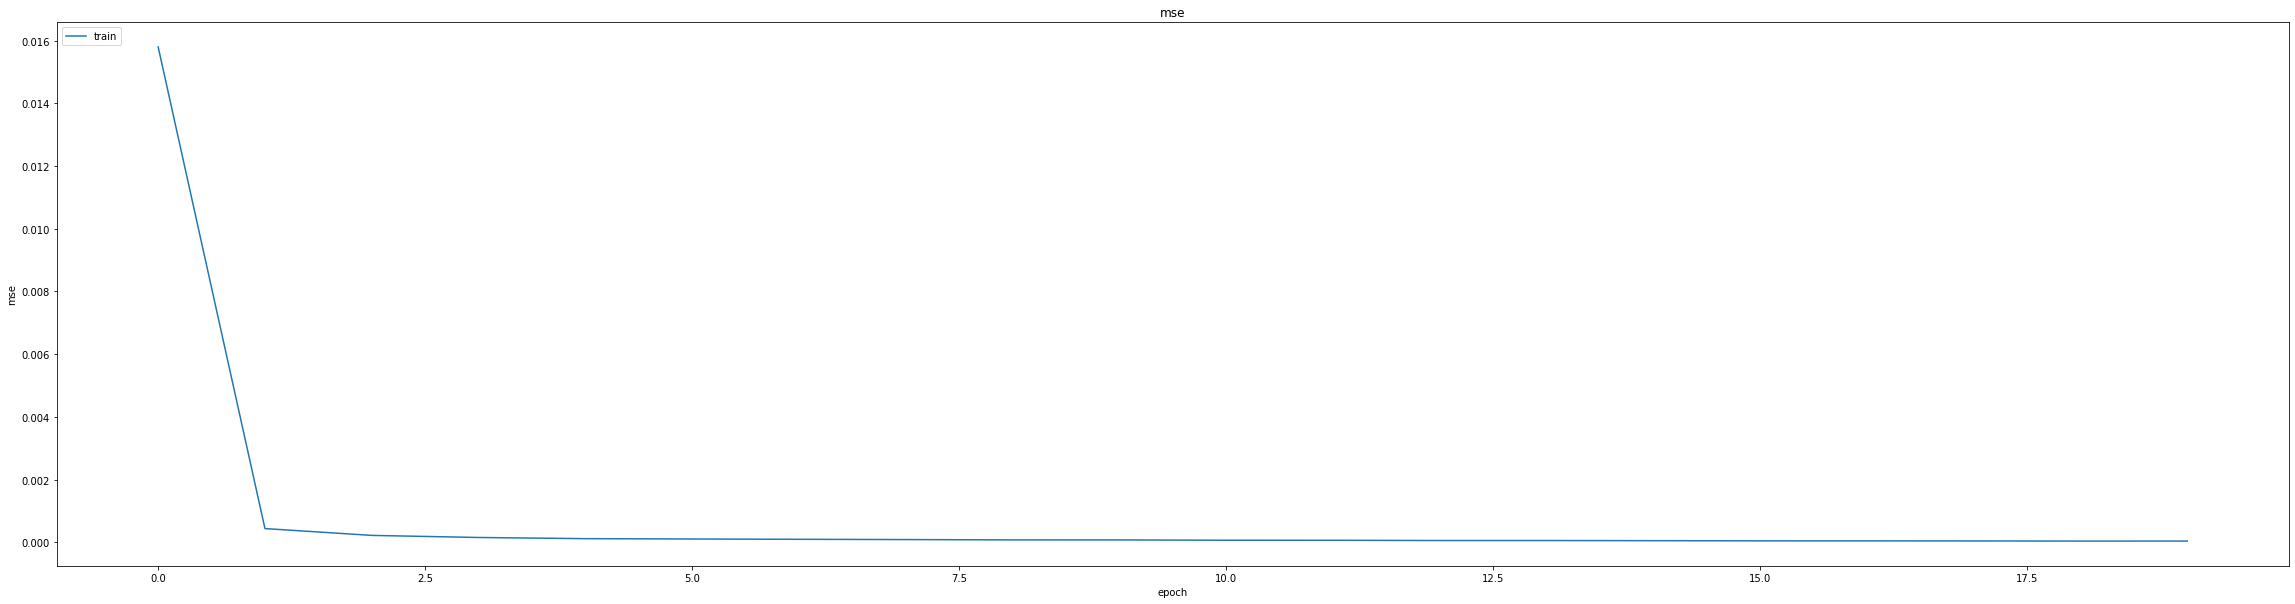

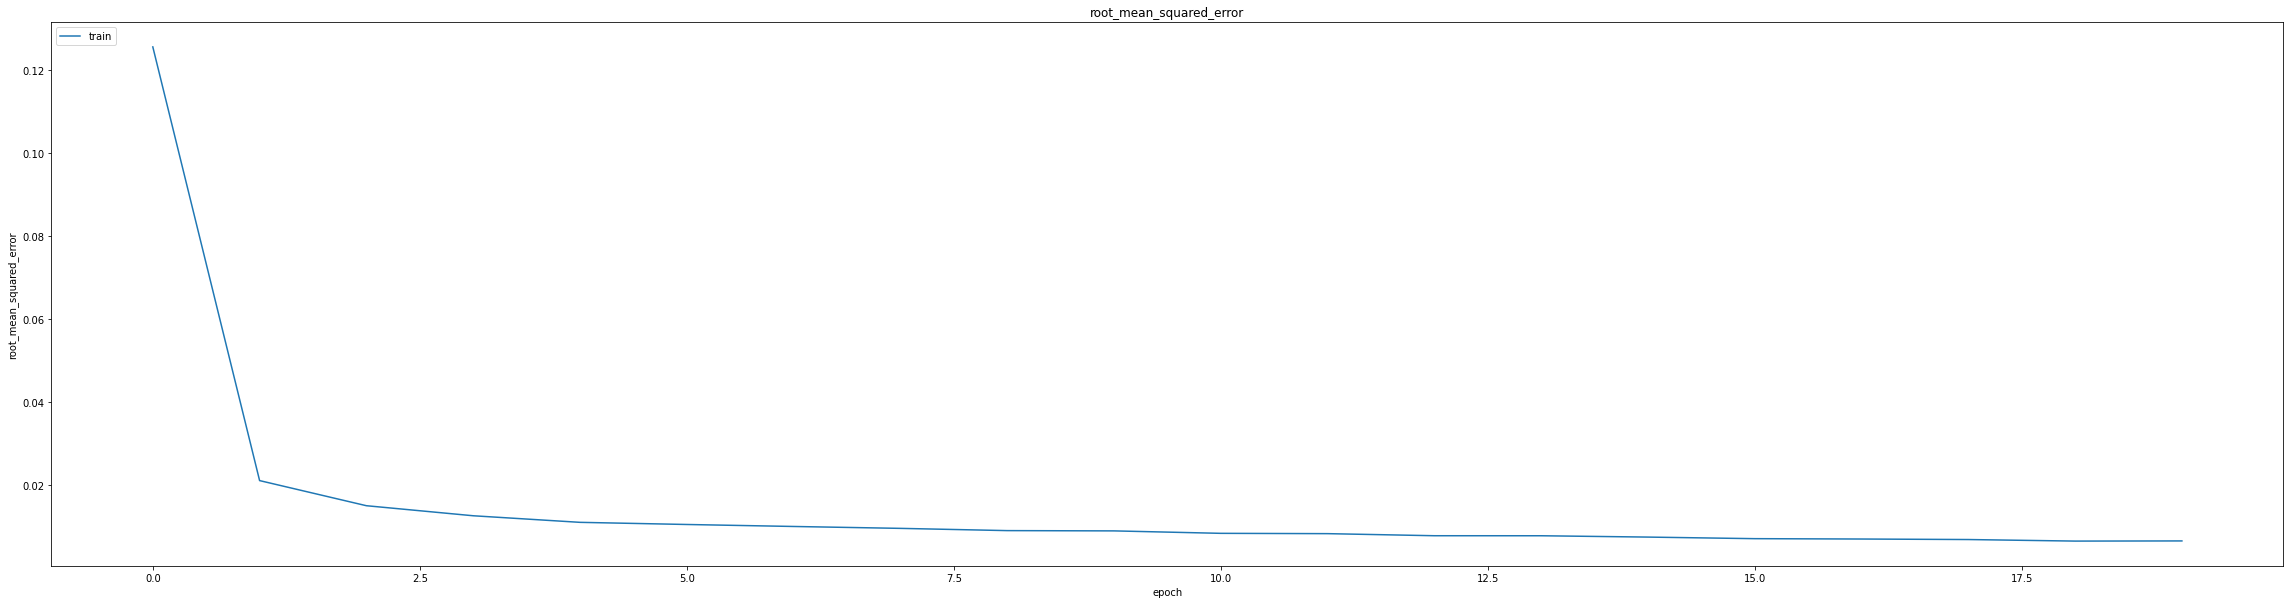

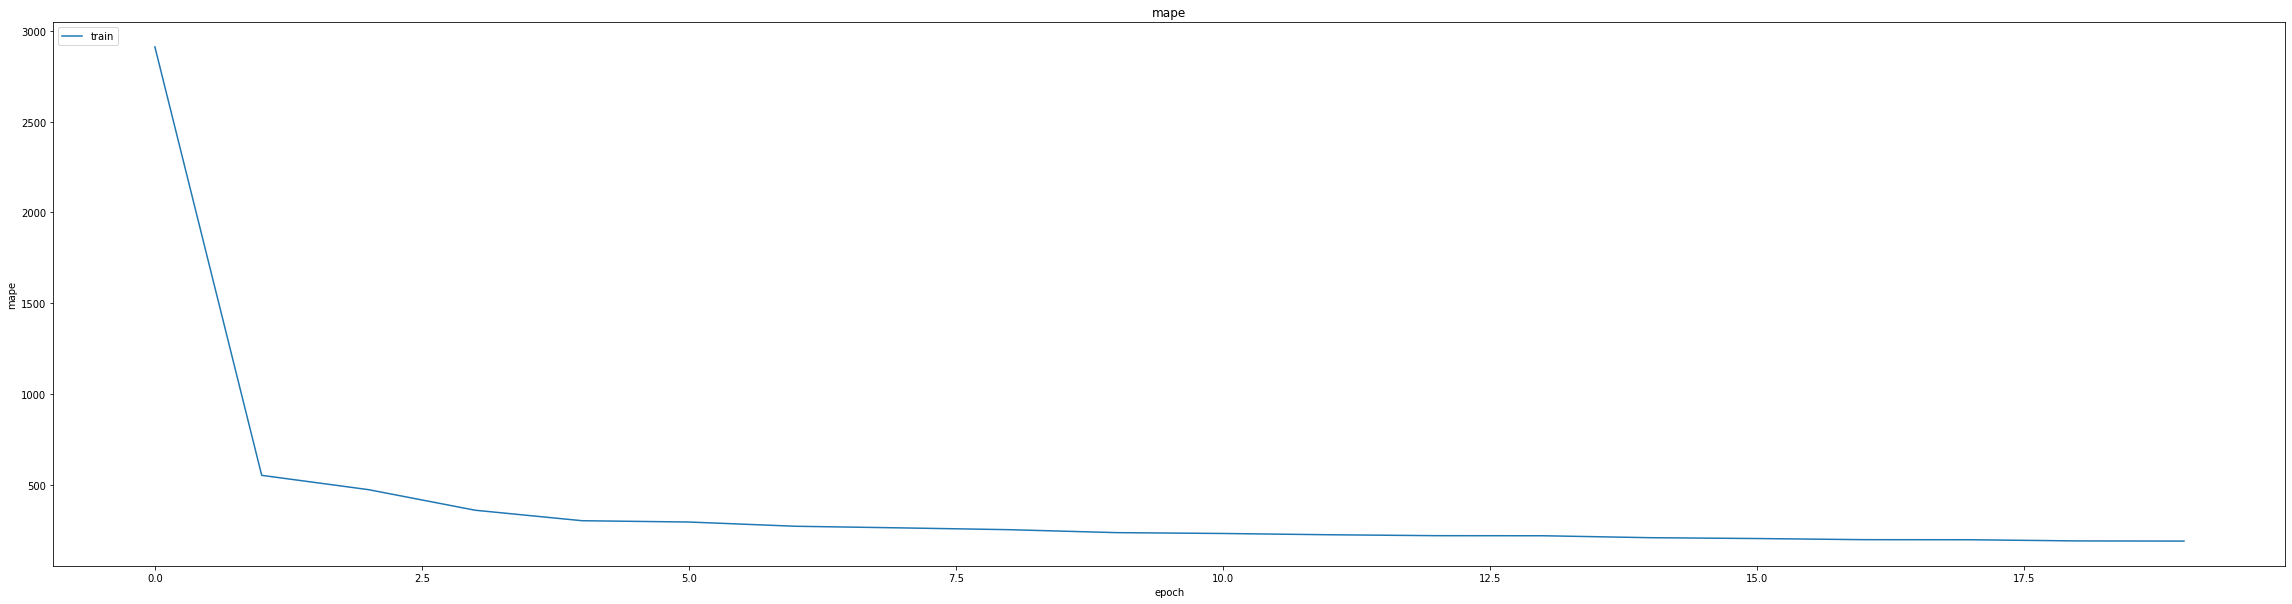

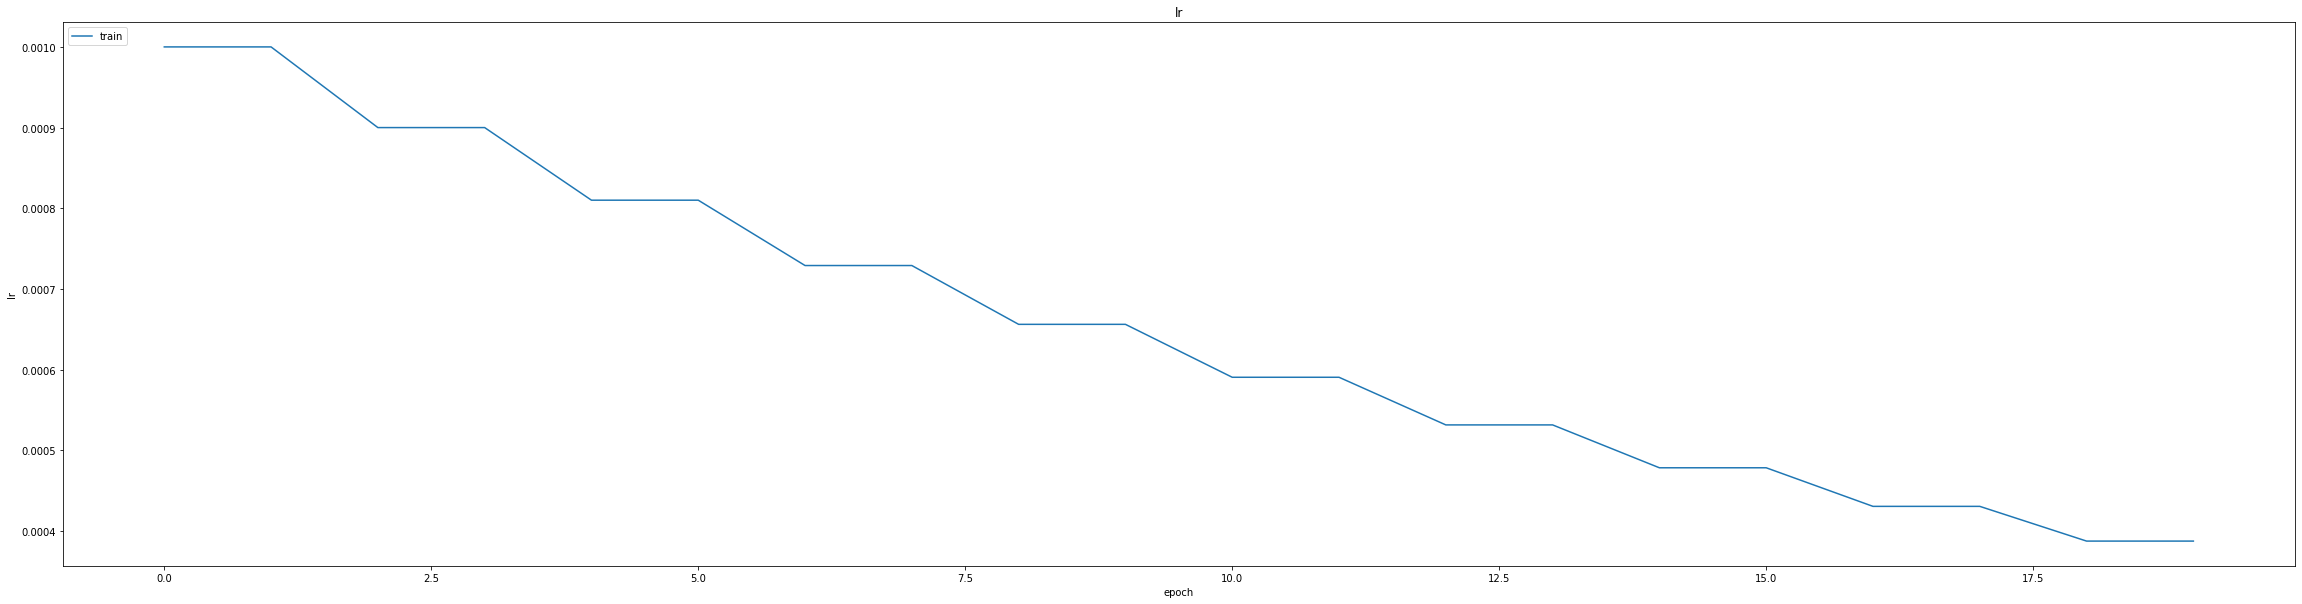

In [101]:
thesis.SummarizeHistory(history)

In [102]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010262691415846348
0.014134490862488747
1391/1391 [==============================] - 6s 4ms/step
0.9949707138521328


1391/1391 [==============================] - 5s 4ms/step


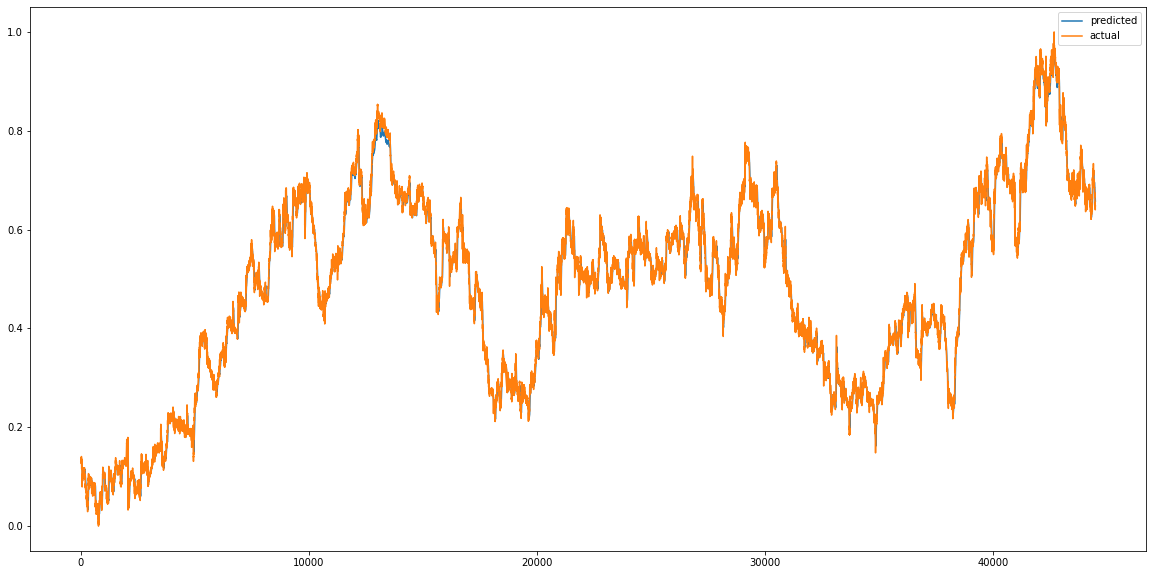

In [103]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


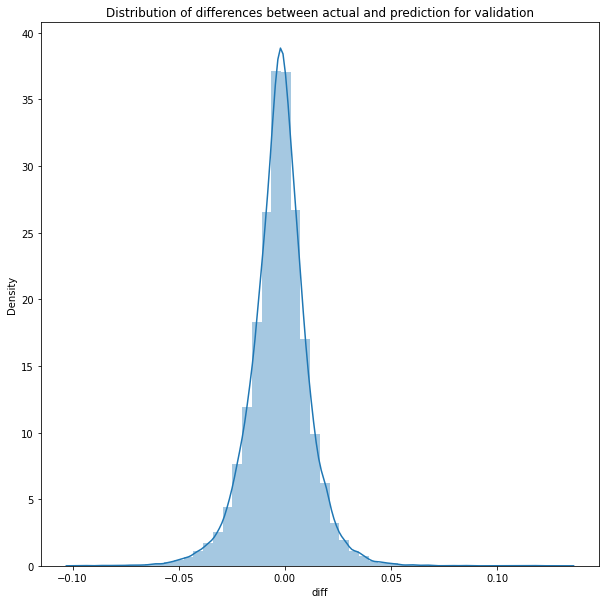

In [104]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 6s 4ms/step


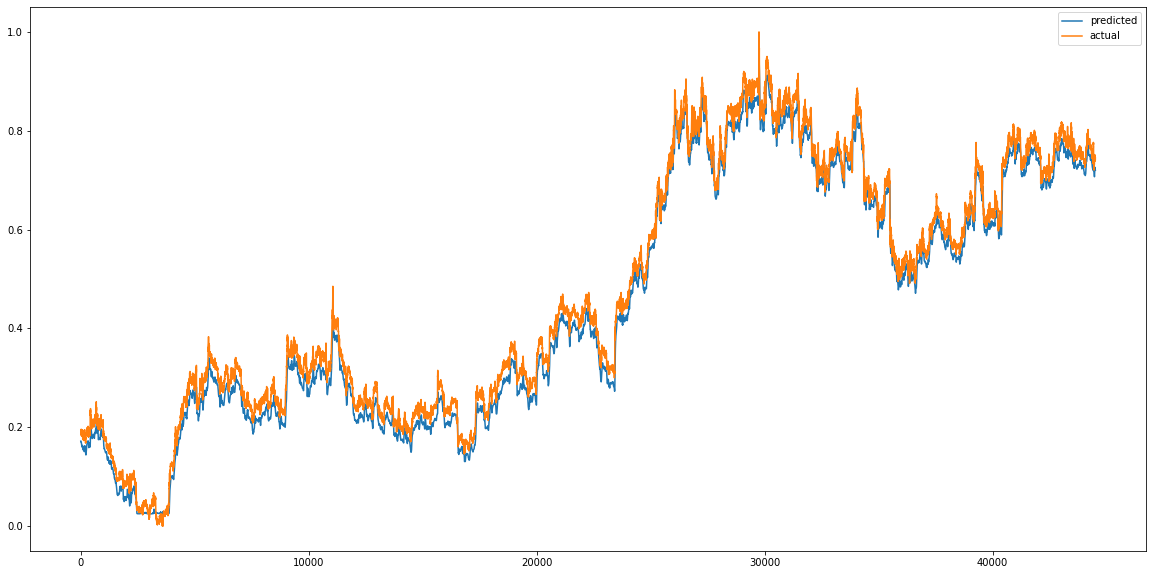

In [105]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


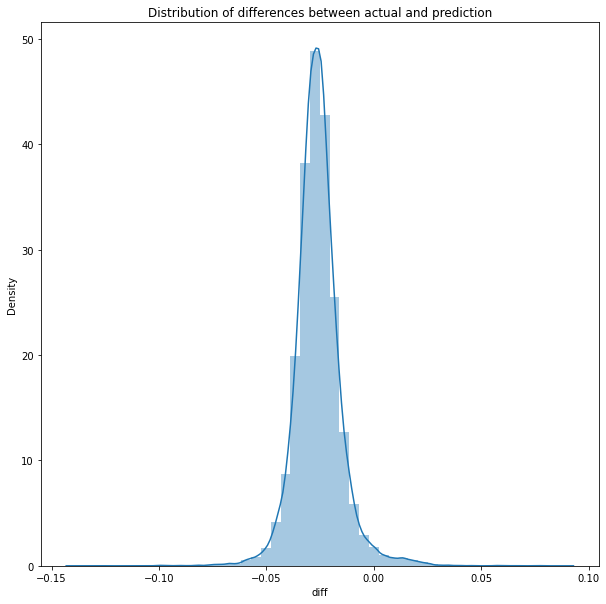

In [106]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00079148719208602
RMSE :  0.02813338216578341
MAE :  0.026455612737282495
1391/1391 [==============================] - 5s 4ms/step
R2_Score  : 0.9874094723117822


count    44506.000000
mean        -0.025991
std          0.010769
min         -0.139374
25%         -0.031790
50%         -0.026435
75%         -0.020884
max          0.089160
Name: diff, dtype: float64

**GRU_MODEL**



In [108]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_5 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_7 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_6 (GRU)                 (None, 16)                3936      
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                

In [109]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [110]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [111]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/347 [==============================] - ETA: 0s - loss: 539.2297 - mae: 8.2797 - mse: 539.2297 - root_mean_squared_error: 23.2213 - mape: 20984.7188
Epoch 1: val_mse improved from inf to 0.16201, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(60-40)


347/347 [==============================] - 20s 45ms/step - loss: 539.2297 - mae: 8.2797 - mse: 539.2297 - root_mean_squared_error: 23.2213 - mape: 20984.7188 - val_loss: 0.1620 - val_mae: 0.3537 - val_mse: 0.1620 - val_root_mean_squared_error: 0.4025 - val_mape: 18857.7246
Epoch 2/60
344/347 [============================>.] - ETA: 0s - loss: 0.1252 - mae: 0.3017 - mse: 0.1252 - root_mean_squared_error: 0.3538 - mape: 4326.8423
Epoch 2: val_mse improved from 0.16201 to 0.03997, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.1246 - mae: 0.3009 - mse: 0.1246 - root_mean_squared_error: 0.3530 - mape: 4292.1265 - val_loss: 0.0400 - val_mae: 0.1644 - val_mse: 0.0400 - val_root_mean_squared_error: 0.1999 - val_mape: 10728.8848
Epoch 3/60
346/347 [============================>.] - ETA: 0s - loss: 0.0510 - mae: 0.1885 - mse: 0.0510 - root_mean_squared_error: 0.2258 - mape: 3852.4331
Epoch 3: val_mse did not improve from 0.03997
347/347 [==============================] - 5s 15ms/step - loss: 0.0510 - mae: 0.1885 - mse: 0.0510 - root_mean_squared_error: 0.2257 - mape: 3842.5393 - val_loss: 0.0481 - val_mae: 0.1846 - val_mse: 0.0481 - val_root_mean_squared_error: 0.2194 - val_mape: 8853.4385
Epoch 4/60
347/347 [==============================] - ETA: 0s - loss: 0.0451 - mae: 0.1768 - mse: 0.0451 - root_mean_squared_error: 0.2124 - mape: 3202.0142
Epoch 4: val_mse did not improve from 0.03997
347/347 [==============================] - 5s 15ms/step - lo

347/347 [==============================] - 15s 43ms/step - loss: 0.0298 - mae: 0.1406 - mse: 0.0298 - root_mean_squared_error: 0.1727 - mape: 2619.0349 - val_loss: 0.0221 - val_mae: 0.1203 - val_mse: 0.0221 - val_root_mean_squared_error: 0.1485 - val_mape: 6943.1104
Epoch 16/60
344/347 [============================>.] - ETA: 0s - loss: 0.0093 - mae: 0.0707 - mse: 0.0093 - root_mean_squared_error: 0.0965 - mape: 2120.8721
Epoch 16: val_mse improved from 0.02205 to 0.00625, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0093 - mae: 0.0705 - mse: 0.0093 - root_mean_squared_error: 0.0963 - mape: 2103.4304 - val_loss: 0.0062 - val_mae: 0.0646 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0790 - val_mape: 4578.6855
Epoch 17/60
347/347 [==============================] - ETA: 0s - loss: 0.0041 - mae: 0.0453 - mse: 0.0041 - root_mean_squared_error: 0.0639 - mape: 1420.5747
Epoch 17: val_mse improved from 0.00625 to 0.00462, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0041 - mae: 0.0453 - mse: 0.0041 - root_mean_squared_error: 0.0639 - mape: 1420.5747 - val_loss: 0.0046 - val_mae: 0.0549 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0680 - val_mape: 3945.7368
Epoch 18/60
345/347 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0394 - mse: 0.0031 - root_mean_squared_error: 0.0554 - mape: 1302.5569
Epoch 18: val_mse did not improve from 0.00462
347/347 [==============================] - 5s 15ms/step - loss: 0.0031 - mae: 0.0394 - mse: 0.0031 - root_mean_squared_error: 0.0554 - mape: 1295.5746 - val_loss: 0.0052 - val_mae: 0.0612 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0724 - val_mape: 3508.5901
Epoch 19/60
344/347 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0356 - mse: 0.0025 - root_mean_squared_error: 0.0495 - mape: 1194.9059
Epoch 19: val_mse improved from 0.00462 to 0.00331, saving model to /content/drive/MyDrive/modelweights/

347/347 [==============================] - 14s 41ms/step - loss: 0.0025 - mae: 0.0356 - mse: 0.0025 - root_mean_squared_error: 0.0495 - mape: 1185.0972 - val_loss: 0.0033 - val_mae: 0.0471 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0575 - val_mape: 3281.0916
Epoch 20/60
345/347 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0322 - mse: 0.0020 - root_mean_squared_error: 0.0446 - mape: 1044.2764
Epoch 20: val_mse improved from 0.00331 to 0.00235, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(60-40)


347/347 [==============================] - 16s 45ms/step - loss: 0.0020 - mae: 0.0322 - mse: 0.0020 - root_mean_squared_error: 0.0446 - mape: 1038.6926 - val_loss: 0.0024 - val_mae: 0.0386 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0485 - val_mape: 3051.3105
Epoch 21/60
347/347 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0297 - mse: 0.0017 - root_mean_squared_error: 0.0407 - mape: 1045.6290
Epoch 21: val_mse did not improve from 0.00235
347/347 [==============================] - 5s 16ms/step - loss: 0.0017 - mae: 0.0297 - mse: 0.0017 - root_mean_squared_error: 0.0407 - mape: 1045.6290 - val_loss: 0.0026 - val_mae: 0.0420 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0513 - val_mape: 2793.0085
Epoch 22/60
346/347 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0275 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 933.1540
Epoch 22: val_mse did not improve from 0.00235
347/347 [==============================] - 5s 15ms/step - 

347/347 [==============================] - 15s 43ms/step - loss: 0.0012 - mae: 0.0255 - mse: 0.0012 - root_mean_squared_error: 0.0345 - mape: 835.9647 - val_loss: 0.0016 - val_mae: 0.0315 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0401 - val_mape: 2389.3350
Epoch 24/60
344/347 [============================>.] - ETA: 0s - loss: 9.7722e-04 - mae: 0.0233 - mse: 9.7722e-04 - root_mean_squared_error: 0.0313 - mape: 764.8143
Epoch 24: val_mse did not improve from 0.00161
347/347 [==============================] - 5s 15ms/step - loss: 9.7645e-04 - mae: 0.0233 - mse: 9.7645e-04 - root_mean_squared_error: 0.0312 - mape: 758.5463 - val_loss: 0.0019 - val_mae: 0.0348 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0432 - val_mape: 2201.1133
Epoch 25/60
346/347 [============================>.] - ETA: 0s - loss: 8.4831e-04 - mae: 0.0219 - mse: 8.4831e-04 - root_mean_squared_error: 0.0291 - mape: 693.6809
Epoch 25: val_mse improved from 0.00161 to 0.00155, saving model to /content/drive/M

347/347 [==============================] - 15s 43ms/step - loss: 8.4807e-04 - mae: 0.0219 - mse: 8.4807e-04 - root_mean_squared_error: 0.0291 - mape: 691.8788 - val_loss: 0.0015 - val_mae: 0.0310 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0394 - val_mape: 2074.6838
Epoch 26/60
344/347 [============================>.] - ETA: 0s - loss: 7.7627e-04 - mae: 0.0211 - mse: 7.7627e-04 - root_mean_squared_error: 0.0279 - mape: 637.6649
Epoch 26: val_mse improved from 0.00155 to 0.00132, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 7.7573e-04 - mae: 0.0210 - mse: 7.7573e-04 - root_mean_squared_error: 0.0279 - mape: 632.4375 - val_loss: 0.0013 - val_mae: 0.0286 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 1964.7397
Epoch 27/60
344/347 [============================>.] - ETA: 0s - loss: 6.8730e-04 - mae: 0.0199 - mse: 6.8730e-04 - root_mean_squared_error: 0.0262 - mape: 618.5267
Epoch 27: val_mse improved from 0.00132 to 0.00077, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 6.8694e-04 - mae: 0.0199 - mse: 6.8694e-04 - root_mean_squared_error: 0.0262 - mape: 613.4742 - val_loss: 7.7079e-04 - val_mae: 0.0207 - val_mse: 7.7079e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 1880.1123
Epoch 28/60
345/347 [============================>.] - ETA: 0s - loss: 6.1888e-04 - mae: 0.0190 - mse: 6.1888e-04 - root_mean_squared_error: 0.0249 - mape: 584.8410
Epoch 28: val_mse did not improve from 0.00077
347/347 [==============================] - 5s 15ms/step - loss: 6.1871e-04 - mae: 0.0190 - mse: 6.1871e-04 - root_mean_squared_error: 0.0249 - mape: 581.6892 - val_loss: 9.3022e-04 - val_mae: 0.0232 - val_mse: 9.3022e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 1734.5592
Epoch 29/60
347/347 [==============================] - ETA: 0s - loss: 5.7313e-04 - mae: 0.0184 - mse: 5.7313e-04 - root_mean_squared_error: 0.0239 - mape: 511.0570
Epoch 29: val_mse did not improve from 0.00077
347/347 [====

347/347 [==============================] - 15s 43ms/step - loss: 5.0868e-04 - mae: 0.0173 - mse: 5.0868e-04 - root_mean_squared_error: 0.0226 - mape: 495.9651 - val_loss: 5.6343e-04 - val_mae: 0.0172 - val_mse: 5.6343e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 1571.1825
Epoch 31/60
344/347 [============================>.] - ETA: 0s - loss: 4.7101e-04 - mae: 0.0167 - mse: 4.7101e-04 - root_mean_squared_error: 0.0217 - mape: 515.2441
Epoch 31: val_mse did not improve from 0.00056
347/347 [==============================] - 5s 15ms/step - loss: 4.7127e-04 - mae: 0.0167 - mse: 4.7127e-04 - root_mean_squared_error: 0.0217 - mape: 511.0262 - val_loss: 8.0929e-04 - val_mae: 0.0215 - val_mse: 8.0929e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 1474.9098
Epoch 32/60
344/347 [============================>.] - ETA: 0s - loss: 4.1907e-04 - mae: 0.0158 - mse: 4.1907e-04 - root_mean_squared_error: 0.0205 - mape: 493.1227
Epoch 32: val_mse improved from 0.00056 to 0.00052, saving m

347/347 [==============================] - 15s 43ms/step - loss: 4.1872e-04 - mae: 0.0158 - mse: 4.1872e-04 - root_mean_squared_error: 0.0205 - mape: 489.0639 - val_loss: 5.1924e-04 - val_mae: 0.0166 - val_mse: 5.1924e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 1392.4497
Epoch 33/60
344/347 [============================>.] - ETA: 0s - loss: 3.8596e-04 - mae: 0.0152 - mse: 3.8596e-04 - root_mean_squared_error: 0.0196 - mape: 427.2972
Epoch 33: val_mse did not improve from 0.00052
347/347 [==============================] - 5s 15ms/step - loss: 3.8577e-04 - mae: 0.0152 - mse: 3.8577e-04 - root_mean_squared_error: 0.0196 - mape: 423.7964 - val_loss: 7.0268e-04 - val_mae: 0.0198 - val_mse: 7.0268e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 1342.0787
Epoch 34/60
344/347 [============================>.] - ETA: 0s - loss: 3.5978e-04 - mae: 0.0147 - mse: 3.5978e-04 - root_mean_squared_error: 0.0190 - mape: 440.0619
Epoch 34: val_mse did not improve from 0.00052
347/347 [====

347/347 [==============================] - 15s 43ms/step - loss: 3.2427e-04 - mae: 0.0139 - mse: 3.2427e-04 - root_mean_squared_error: 0.0180 - mape: 457.8047 - val_loss: 5.0556e-04 - val_mae: 0.0162 - val_mse: 5.0556e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 1250.3633
Epoch 36/60
344/347 [============================>.] - ETA: 0s - loss: 3.0517e-04 - mae: 0.0135 - mse: 3.0517e-04 - root_mean_squared_error: 0.0175 - mape: 406.7794
Epoch 36: val_mse did not improve from 0.00051
347/347 [==============================] - 5s 15ms/step - loss: 3.0487e-04 - mae: 0.0135 - mse: 3.0487e-04 - root_mean_squared_error: 0.0175 - mape: 403.4483 - val_loss: 5.7391e-04 - val_mae: 0.0176 - val_mse: 5.7391e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 1191.8768
Epoch 37/60
347/347 [==============================] - ETA: 0s - loss: 2.7447e-04 - mae: 0.0128 - mse: 2.7447e-04 - root_mean_squared_error: 0.0166 - mape: 387.3827
Epoch 37: val_mse did not improve from 0.00051
347/347 [====

347/347 [==============================] - 14s 41ms/step - loss: 2.0767e-04 - mae: 0.0111 - mse: 2.0767e-04 - root_mean_squared_error: 0.0144 - mape: 328.1845 - val_loss: 3.9030e-04 - val_mae: 0.0147 - val_mse: 3.9030e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 1018.6602
Epoch 42/60
345/347 [============================>.] - ETA: 0s - loss: 1.9916e-04 - mae: 0.0109 - mse: 1.9916e-04 - root_mean_squared_error: 0.0141 - mape: 313.0312
Epoch 42: val_mse did not improve from 0.00039
347/347 [==============================] - 5s 15ms/step - loss: 1.9906e-04 - mae: 0.0109 - mse: 1.9906e-04 - root_mean_squared_error: 0.0141 - mape: 311.3438 - val_loss: 4.7281e-04 - val_mae: 0.0161 - val_mse: 4.7281e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 983.8690
Epoch 43/60
344/347 [============================>.] - ETA: 0s - loss: 1.8348e-04 - mae: 0.0104 - mse: 1.8348e-04 - root_mean_squared_error: 0.0135 - mape: 320.9359
Epoch 43: val_mse did not improve from 0.00039
347/347 [=====

347/347 [==============================] - 15s 44ms/step - loss: 1.3169e-04 - mae: 0.0088 - mse: 1.3169e-04 - root_mean_squared_error: 0.0115 - mape: 263.3844 - val_loss: 3.5862e-04 - val_mae: 0.0140 - val_mse: 3.5862e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 915.8586
Epoch 49/60
346/347 [============================>.] - ETA: 0s - loss: 1.4044e-04 - mae: 0.0091 - mse: 1.4044e-04 - root_mean_squared_error: 0.0119 - mape: 287.9115
Epoch 49: val_mse did not improve from 0.00036
347/347 [==============================] - 5s 15ms/step - loss: 1.4039e-04 - mae: 0.0091 - mse: 1.4039e-04 - root_mean_squared_error: 0.0118 - mape: 287.1595 - val_loss: 5.1699e-04 - val_mae: 0.0171 - val_mse: 5.1699e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 863.2908
Epoch 50/60
347/347 [==============================] - ETA: 0s - loss: 1.2565e-04 - mae: 0.0085 - mse: 1.2565e-04 - root_mean_squared_error: 0.0112 - mape: 265.7369
Epoch 50: val_mse did not improve from 0.00036
347/347 [======

347/347 [==============================] - 15s 43ms/step - loss: 1.0708e-04 - mae: 0.0078 - mse: 1.0708e-04 - root_mean_squared_error: 0.0103 - mape: 244.0516 - val_loss: 3.5184e-04 - val_mae: 0.0139 - val_mse: 3.5184e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 918.8473
Epoch 55/60
346/347 [============================>.] - ETA: 0s - loss: 1.1196e-04 - mae: 0.0081 - mse: 1.1196e-04 - root_mean_squared_error: 0.0106 - mape: 232.5649
Epoch 55: val_mse did not improve from 0.00035
347/347 [==============================] - 6s 17ms/step - loss: 1.1192e-04 - mae: 0.0080 - mse: 1.1192e-04 - root_mean_squared_error: 0.0106 - mape: 231.9600 - val_loss: 5.3407e-04 - val_mae: 0.0174 - val_mse: 5.3407e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 928.8765
Epoch 56/60
346/347 [============================>.] - ETA: 0s - loss: 1.0209e-04 - mae: 0.0077 - mse: 1.0209e-04 - root_mean_squared_error: 0.0101 - mape: 235.1010
Epoch 56: val_mse did not improve from 0.00035
347/347 [======

347/347 [==============================] - 15s 43ms/step - loss: 1.0760e-04 - mae: 0.0078 - mse: 1.0760e-04 - root_mean_squared_error: 0.0104 - mape: 218.3842 - val_loss: 3.4951e-04 - val_mae: 0.0137 - val_mse: 3.4951e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 876.6085
Epoch 59/60
347/347 [==============================] - ETA: 0s - loss: 1.0147e-04 - mae: 0.0076 - mse: 1.0147e-04 - root_mean_squared_error: 0.0101 - mape: 214.8895
Epoch 59: val_mse did not improve from 0.00035
347/347 [==============================] - 5s 15ms/step - loss: 1.0147e-04 - mae: 0.0076 - mse: 1.0147e-04 - root_mean_squared_error: 0.0101 - mape: 214.8895 - val_loss: 3.6630e-04 - val_mae: 0.0141 - val_mse: 3.6630e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 904.7899
Epoch 60/60
344/347 [============================>.] - ETA: 0s - loss: 9.4049e-05 - mae: 0.0073 - mse: 9.4049e-05 - root_mean_squared_error: 0.0097 - mape: 212.8734
Epoch 60: val_mse did not improve from 0.00035
347/347 [======

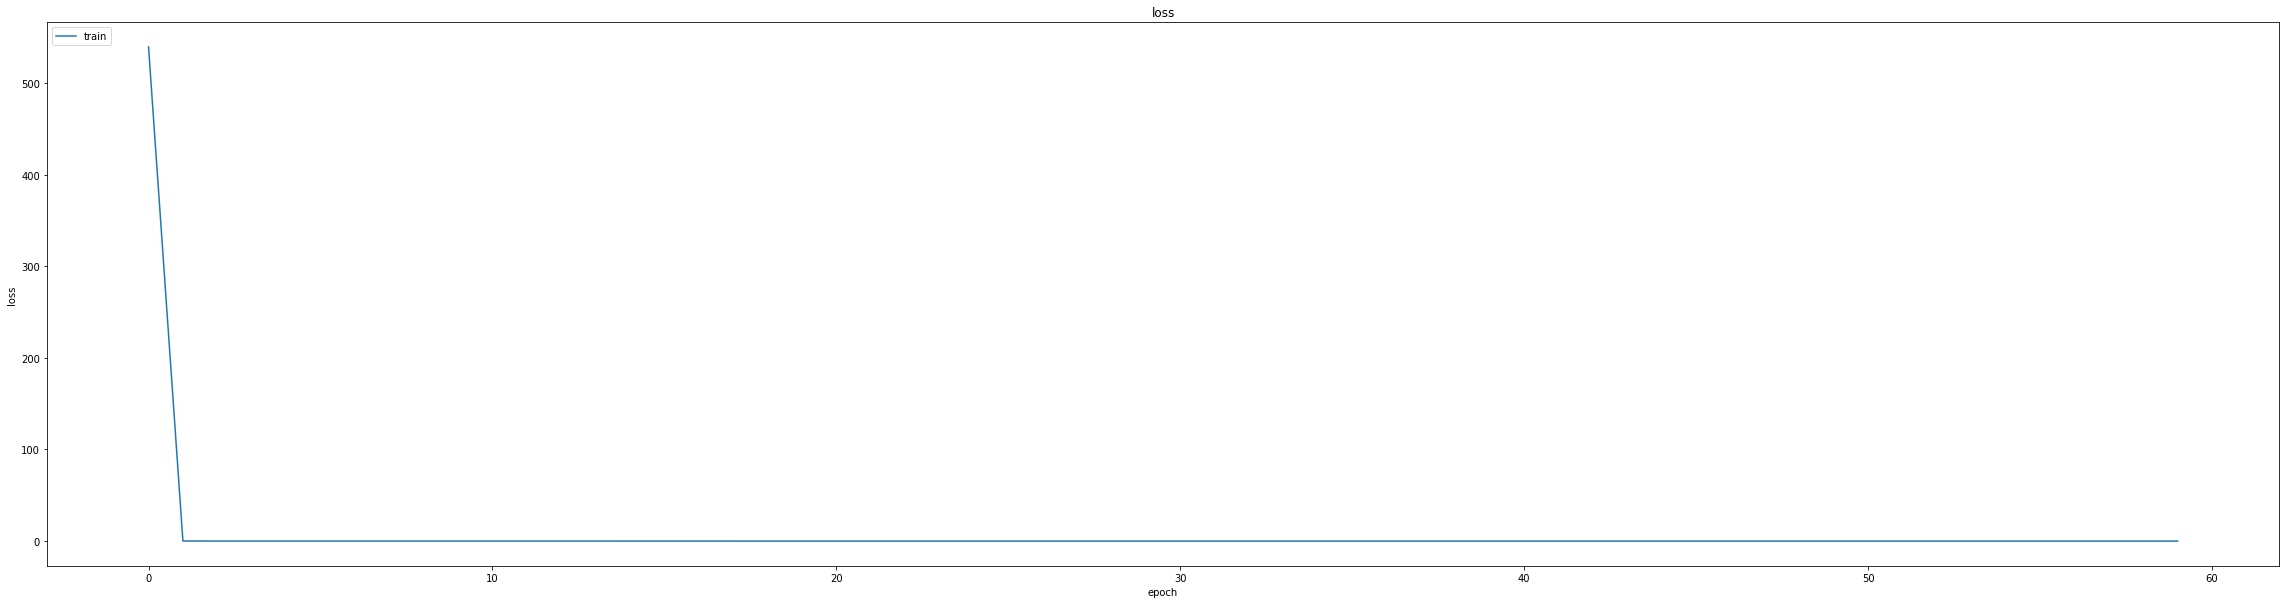

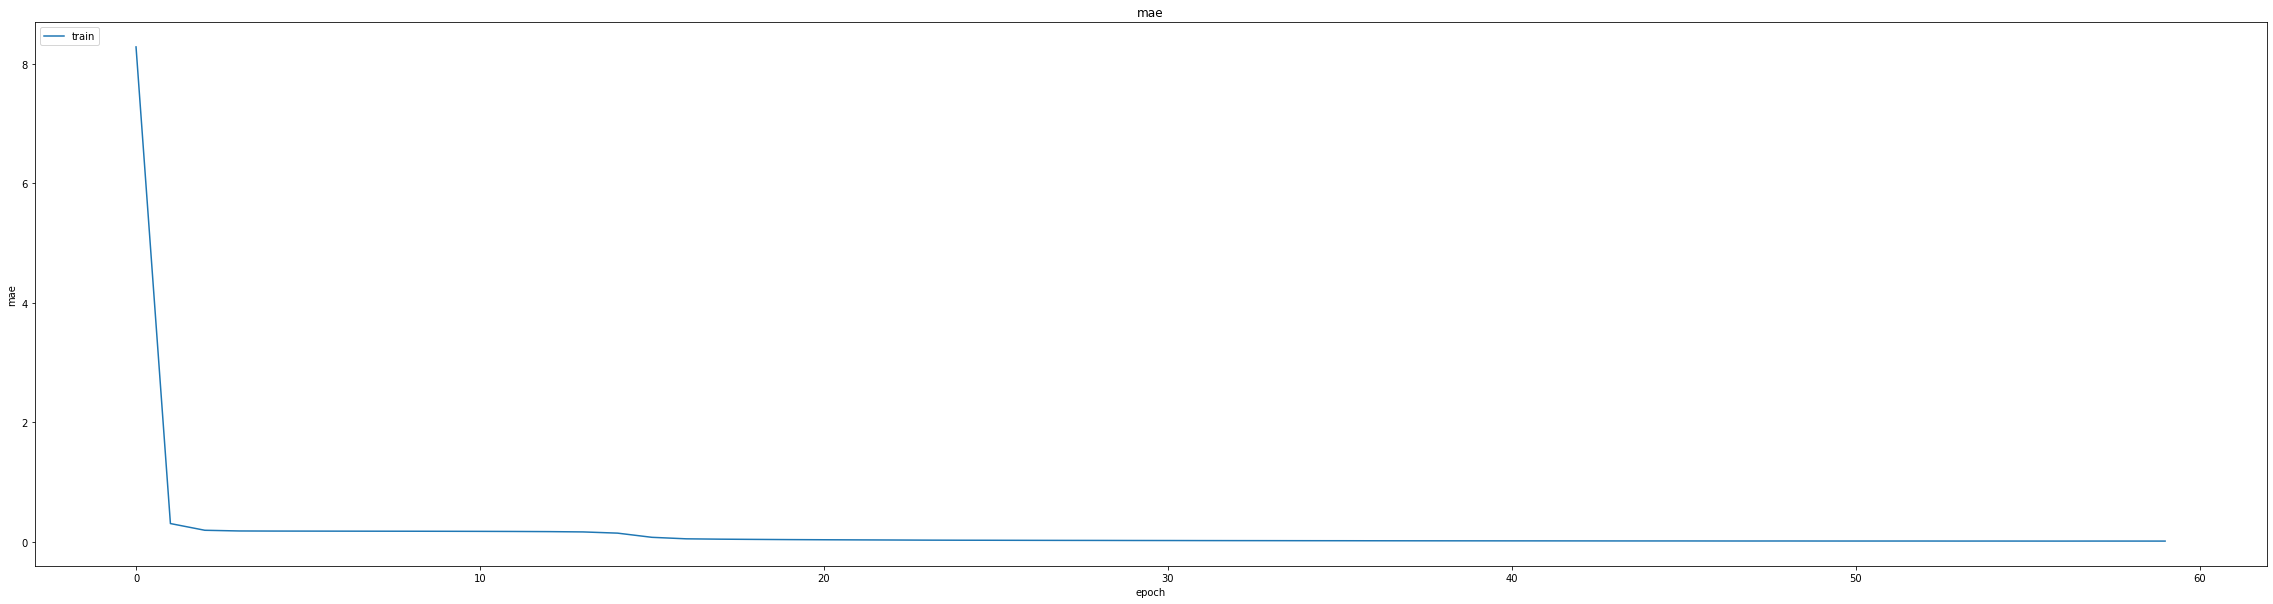

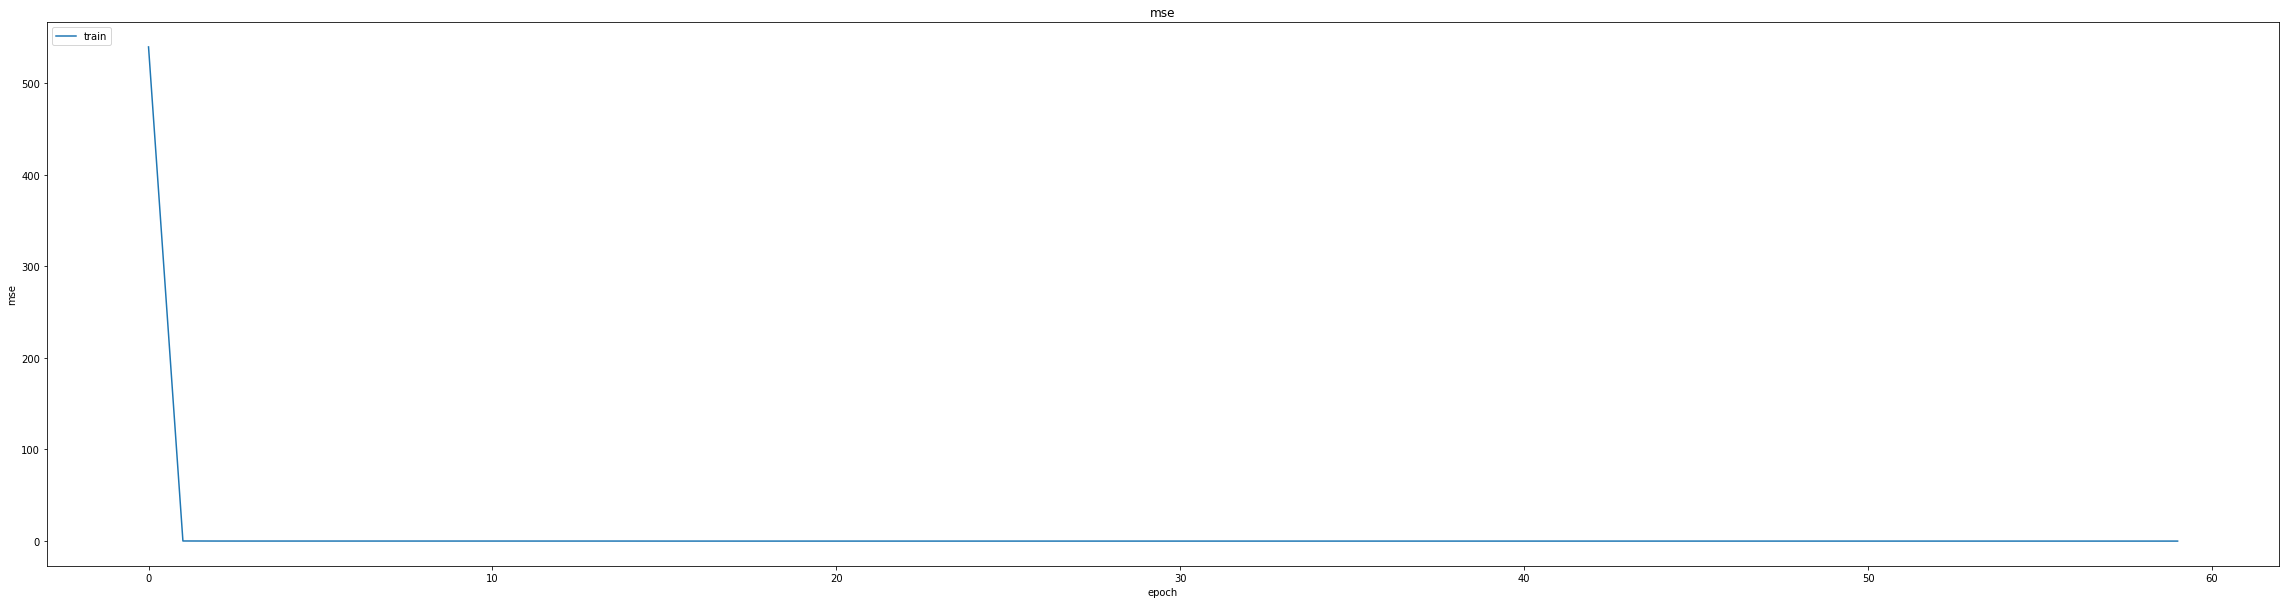

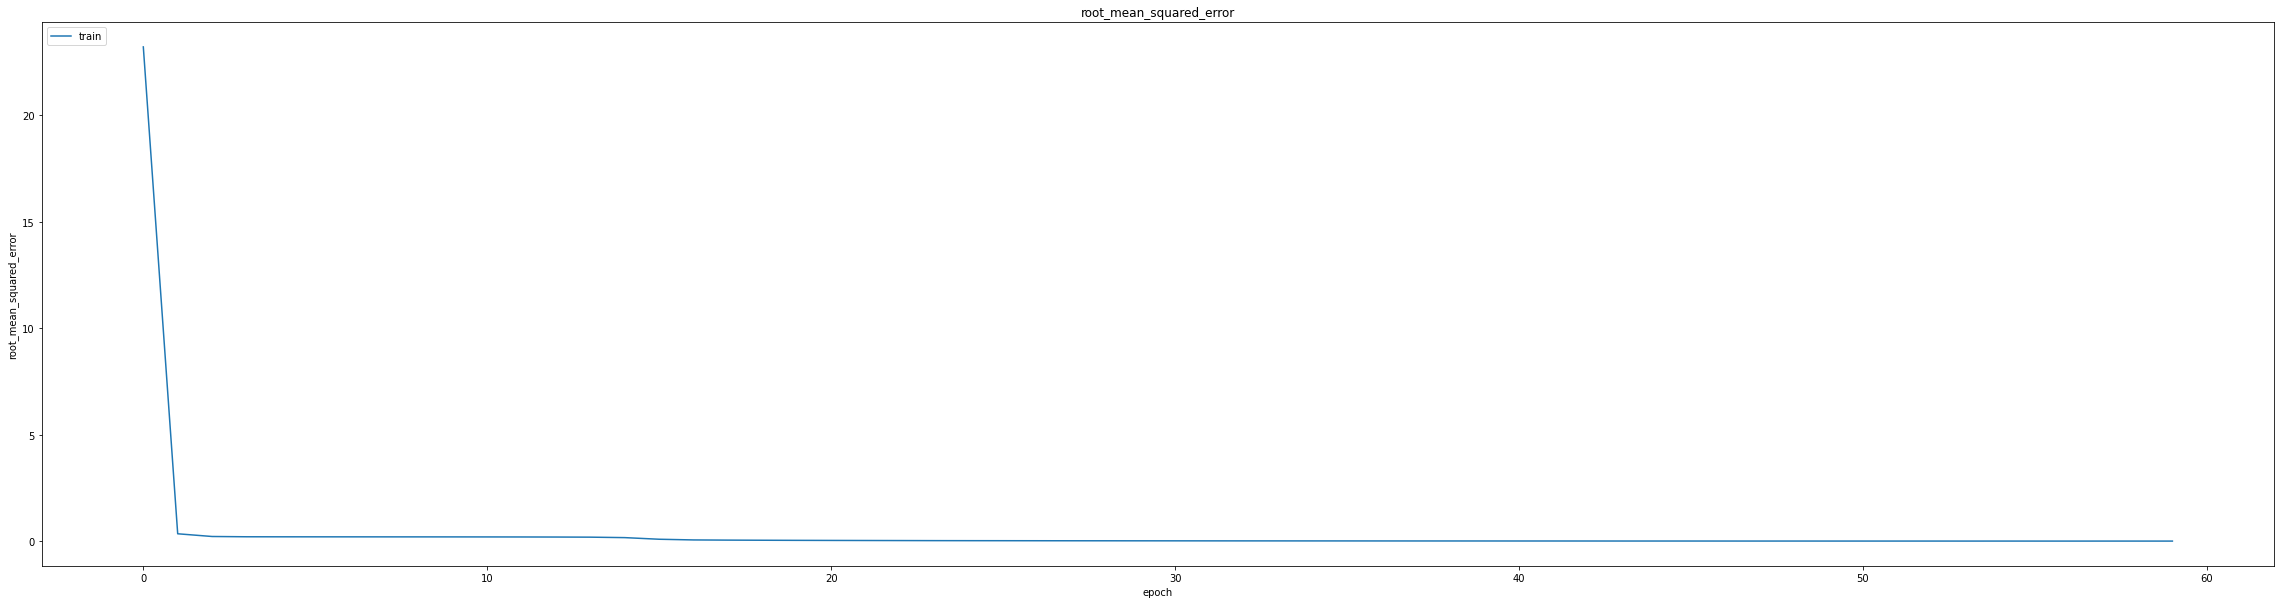

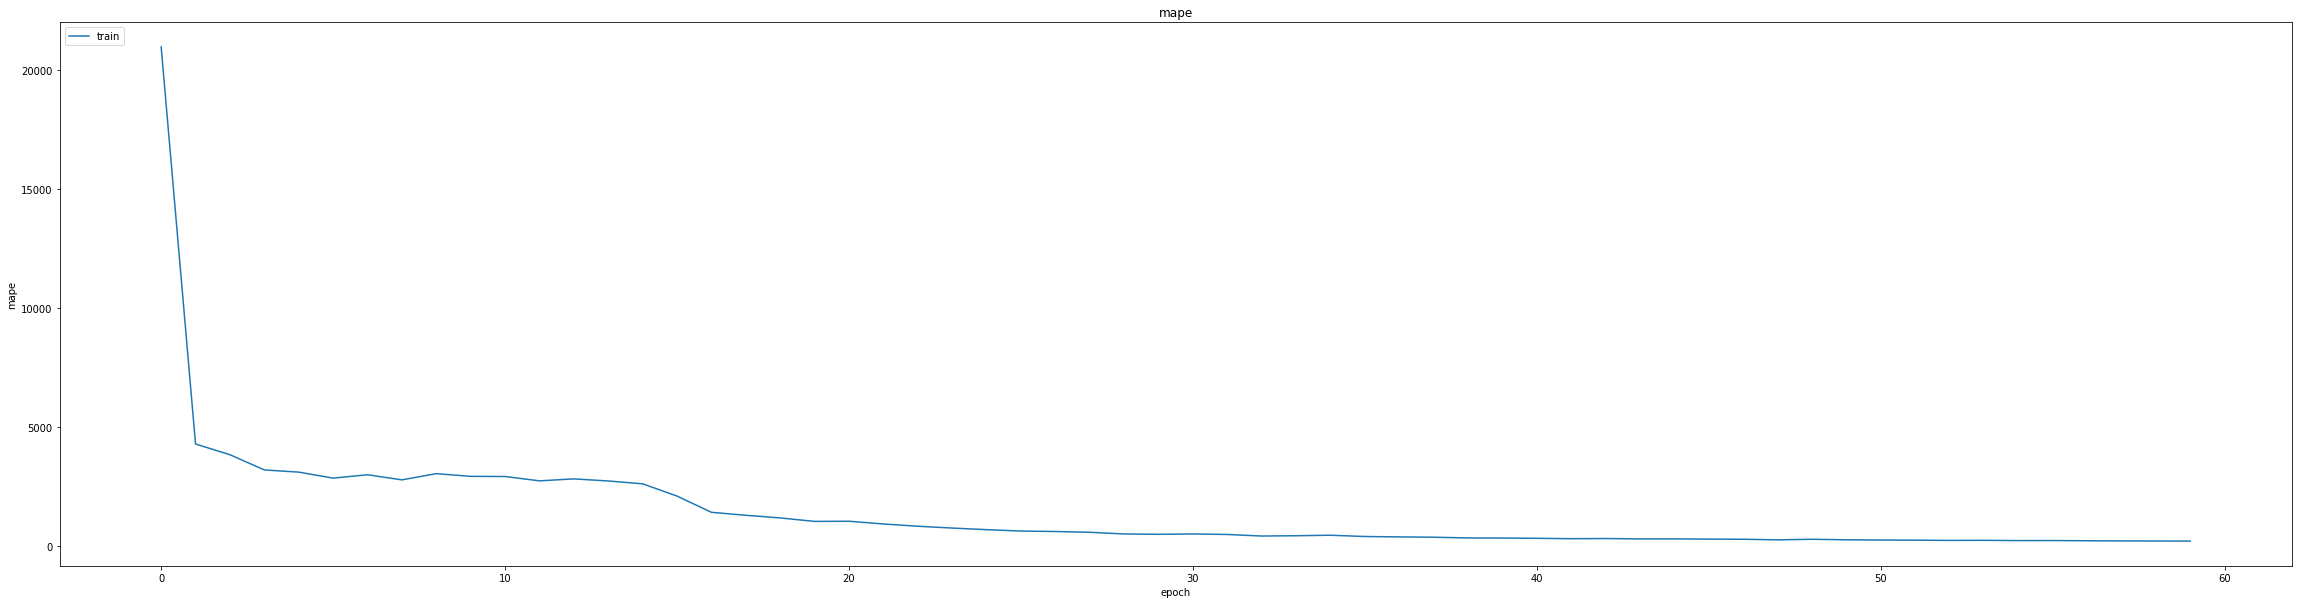

In [112]:
thesis.SummarizeHistory(history)

In [113]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.013739231042563915
0.013739231042563915
0.018695073202252388
1391/1391 [==============================] - 7s 4ms/step
0.990837490372638


In [114]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [115]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


347/347 [==============================] - ETA: 0s - loss: 4.1696e-04 - mae: 0.0106 - mse: 4.1696e-04 - root_mean_squared_error: 0.0204 - mape: 249.8913
Epoch 1: val_mse did not improve from 0.00035
347/347 [==============================] - 12s 21ms/step - loss: 4.1696e-04 - mae: 0.0106 - mse: 4.1696e-04 - root_mean_squared_error: 0.0204 - mape: 249.8913 - val_loss: 3.7165e-04 - val_mae: 0.0142 - val_mse: 3.7165e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 982.3217 - lr: 0.0010
Epoch 2/20
344/347 [============================>.] - ETA: 0s - loss: 7.7753e-05 - mae: 0.0066 - mse: 7.7753e-05 - root_mean_squared_error: 0.0088 - mape: 218.8601
Epoch 2: val_mse did not improve from 0.00035
347/347 [==============================] - 6s 16ms/step - loss: 7.7881e-05 - mae: 0.0067 - mse: 7.7881e-05 - root_mean_squared_error: 0.0088 - mape: 217.0492 - val_loss: 3.5128e-04 - val_mae: 0.0138 - val_mse: 3.5128e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 919.7704 - lr: 0.0010
lr c

347/347 [==============================] - 15s 43ms/step - loss: 7.6388e-05 - mae: 0.0066 - mse: 7.6388e-05 - root_mean_squared_error: 0.0087 - mape: 211.1570 - val_loss: 3.4195e-04 - val_mae: 0.0136 - val_mse: 3.4195e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 979.0750 - lr: 9.0000e-04
Epoch 4/20
346/347 [============================>.] - ETA: 0s - loss: 7.4276e-05 - mae: 0.0065 - mse: 7.4276e-05 - root_mean_squared_error: 0.0086 - mape: 201.1933
Epoch 4: val_mse improved from 0.00034 to 0.00034, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 7.4234e-05 - mae: 0.0065 - mse: 7.4234e-05 - root_mean_squared_error: 0.0086 - mape: 200.6686 - val_loss: 3.3999e-04 - val_mae: 0.0135 - val_mse: 3.3999e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 943.6695 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
347/347 [==============================] - ETA: 0s - loss: 7.8600e-05 - mae: 0.0067 - mse: 7.8600e-05 - root_mean_squared_error: 0.0089 - mape: 202.9834
Epoch 5: val_mse did not improve from 0.00034
347/347 [==============================] - 6s 16ms/step - loss: 7.8600e-05 - mae: 0.0067 - mse: 7.8600e-05 - root_mean_squared_error: 0.0089 - mape: 202.9834 - val_loss: 3.7001e-04 - val_mae: 0.0142 - val_mse: 3.7001e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 1000.3965 - lr: 8.1000e-04
Epoch 6/20
347/347 [==============================] - ETA: 0s - loss: 7.7216e-05 - mae: 0.0066 - mse: 7.7216e-05 - root_mean_squared_error: 0.0088 - mape: 207

347/347 [==============================] - 14s 41ms/step - loss: 7.3990e-05 - mae: 0.0064 - mse: 7.3990e-05 - root_mean_squared_error: 0.0086 - mape: 191.2185 - val_loss: 3.3724e-04 - val_mae: 0.0137 - val_mse: 3.3724e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 1035.9738 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
346/347 [============================>.] - ETA: 0s - loss: 6.2952e-05 - mae: 0.0059 - mse: 6.2952e-05 - root_mean_squared_error: 0.0079 - mape: 193.7378
Epoch 11: val_mse did not improve from 0.00034
347/347 [==============================] - 5s 15ms/step - loss: 6.2931e-05 - mae: 0.0059 - mse: 6.2931e-05 - root_mean_squared_error: 0.0079 - mape: 193.2346 - val_loss: 3.3904e-04 - val_mae: 0.0135 - val_mse: 3.3904e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 964.2018 - lr: 5.9049e-04
Epoch 12/20
344/347 [============================>.] - ETA: 0s - loss: 6.6563e-05 - mae: 0.0061 - mse: 6.6563e-05 - root_mean_squared_error: 0.0082 - mape: 

347/347 [==============================] - 16s 46ms/step - loss: 6.6600e-05 - mae: 0.0061 - mse: 6.6600e-05 - root_mean_squared_error: 0.0082 - mape: 190.0645 - val_loss: 3.0938e-04 - val_mae: 0.0129 - val_mse: 3.0938e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 992.4070 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
346/347 [============================>.] - ETA: 0s - loss: 5.8273e-05 - mae: 0.0057 - mse: 5.8273e-05 - root_mean_squared_error: 0.0076 - mape: 182.9474
Epoch 13: val_mse did not improve from 0.00031
347/347 [==============================] - 5s 15ms/step - loss: 5.8262e-05 - mae: 0.0057 - mse: 5.8262e-05 - root_mean_squared_error: 0.0076 - mape: 182.4725 - val_loss: 3.7545e-04 - val_mae: 0.0143 - val_mse: 3.7545e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 979.7225 - lr: 5.3144e-04
Epoch 14/20
345/347 [============================>.] - ETA: 0s - loss: 5.8594e-05 - mae: 0.0057 - mse: 5.8594e-05 - root_mean_squared_error: 0.0077 - mape: 1

347/347 [==============================] - 15s 43ms/step - loss: 5.5729e-05 - mae: 0.0056 - mse: 5.5729e-05 - root_mean_squared_error: 0.0075 - mape: 179.6180 - val_loss: 3.0289e-04 - val_mae: 0.0128 - val_mse: 3.0289e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 918.5671 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/20
346/347 [============================>.] - ETA: 0s - loss: 4.7955e-05 - mae: 0.0051 - mse: 4.7955e-05 - root_mean_squared_error: 0.0069 - mape: 177.3956
Epoch 19: val_mse improved from 0.00030 to 0.00029, saving model to /content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 4.7921e-05 - mae: 0.0051 - mse: 4.7921e-05 - root_mean_squared_error: 0.0069 - mape: 176.9339 - val_loss: 2.8994e-04 - val_mae: 0.0125 - val_mse: 2.8994e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 952.2975 - lr: 3.8742e-04
Epoch 20/20
346/347 [============================>.] - ETA: 0s - loss: 4.8442e-05 - mae: 0.0052 - mse: 4.8442e-05 - root_mean_squared_error: 0.0070 - mape: 179.2653
Epoch 20: val_mse did not improve from 0.00029
347/347 [==============================] - 5s 15ms/step - loss: 4.8420e-05 - mae: 0.0052 - mse: 4.8420e-05 - root_mean_squared_error: 0.0070 - mape: 178.7953 - val_loss: 3.0174e-04 - val_mae: 0.0128 - val_mse: 3.0174e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 933.9501 - lr: 3.8742e-04


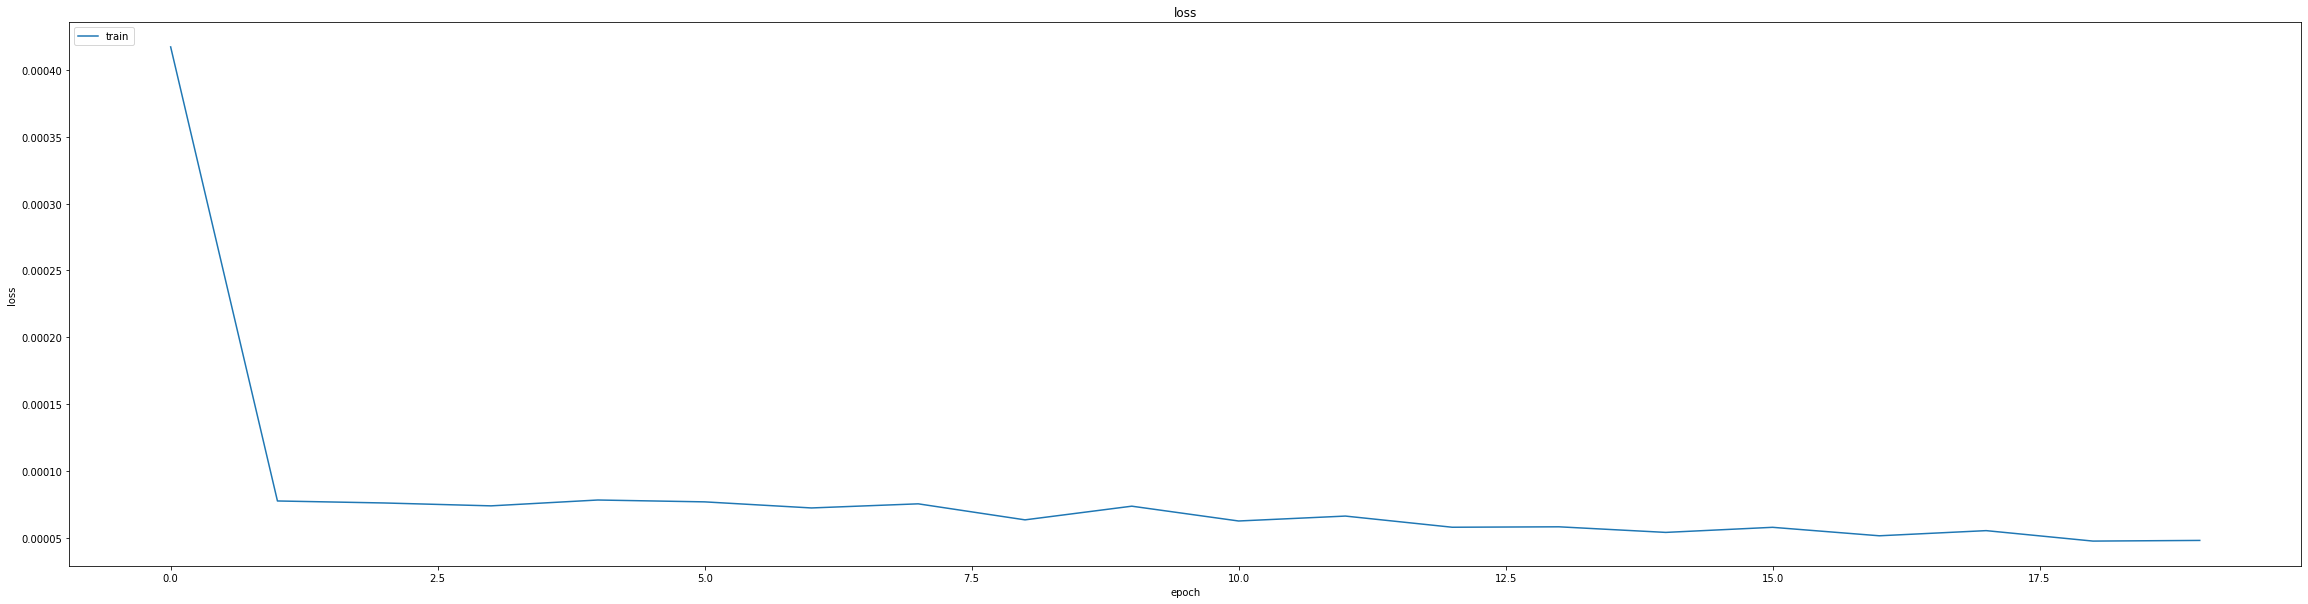

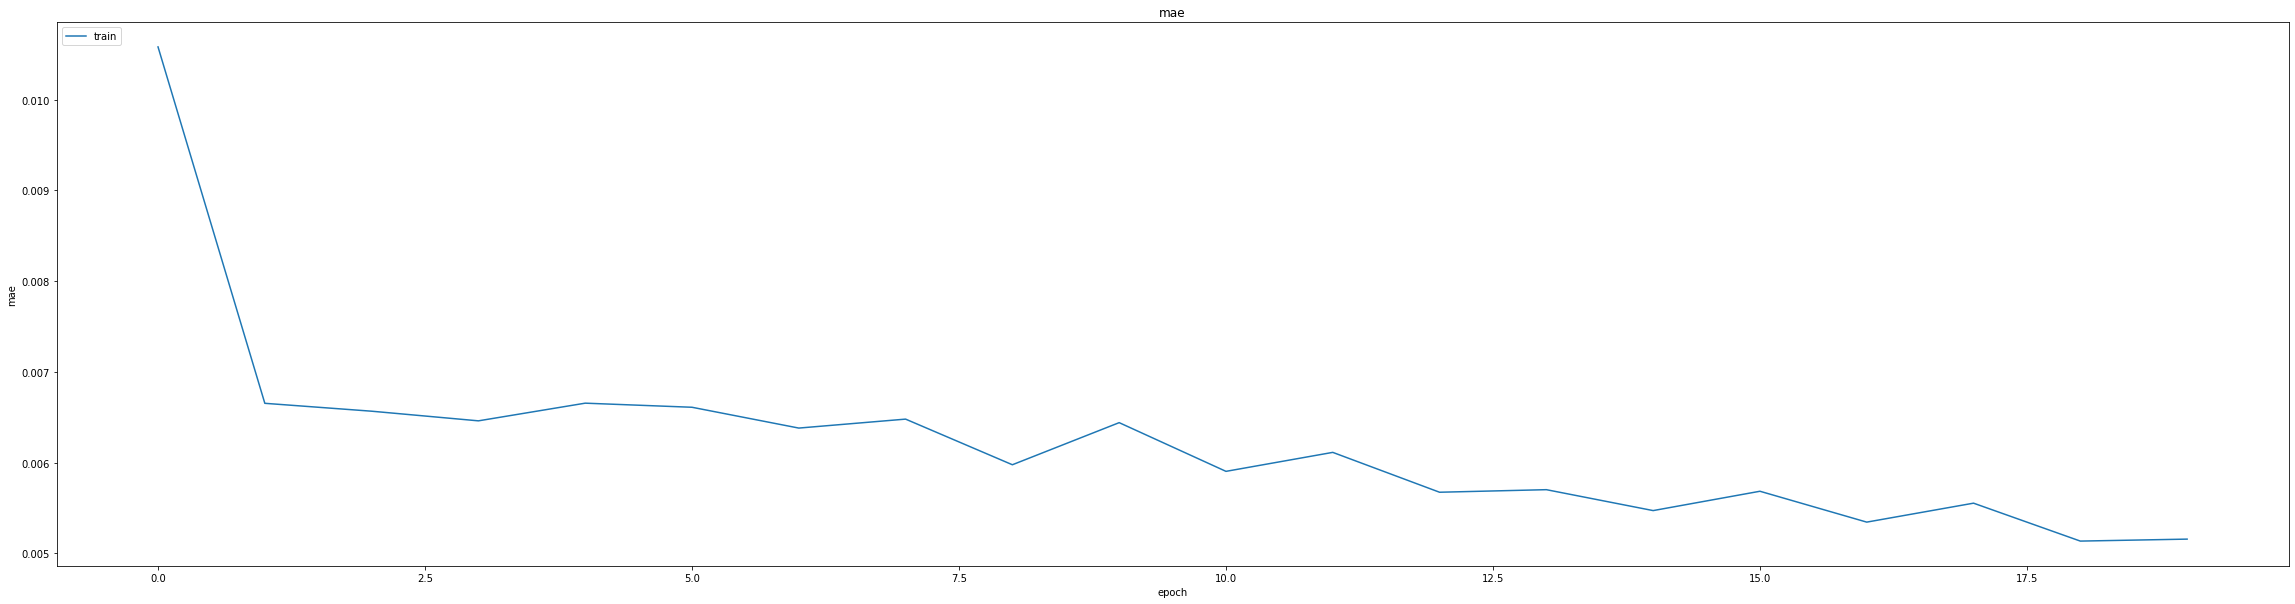

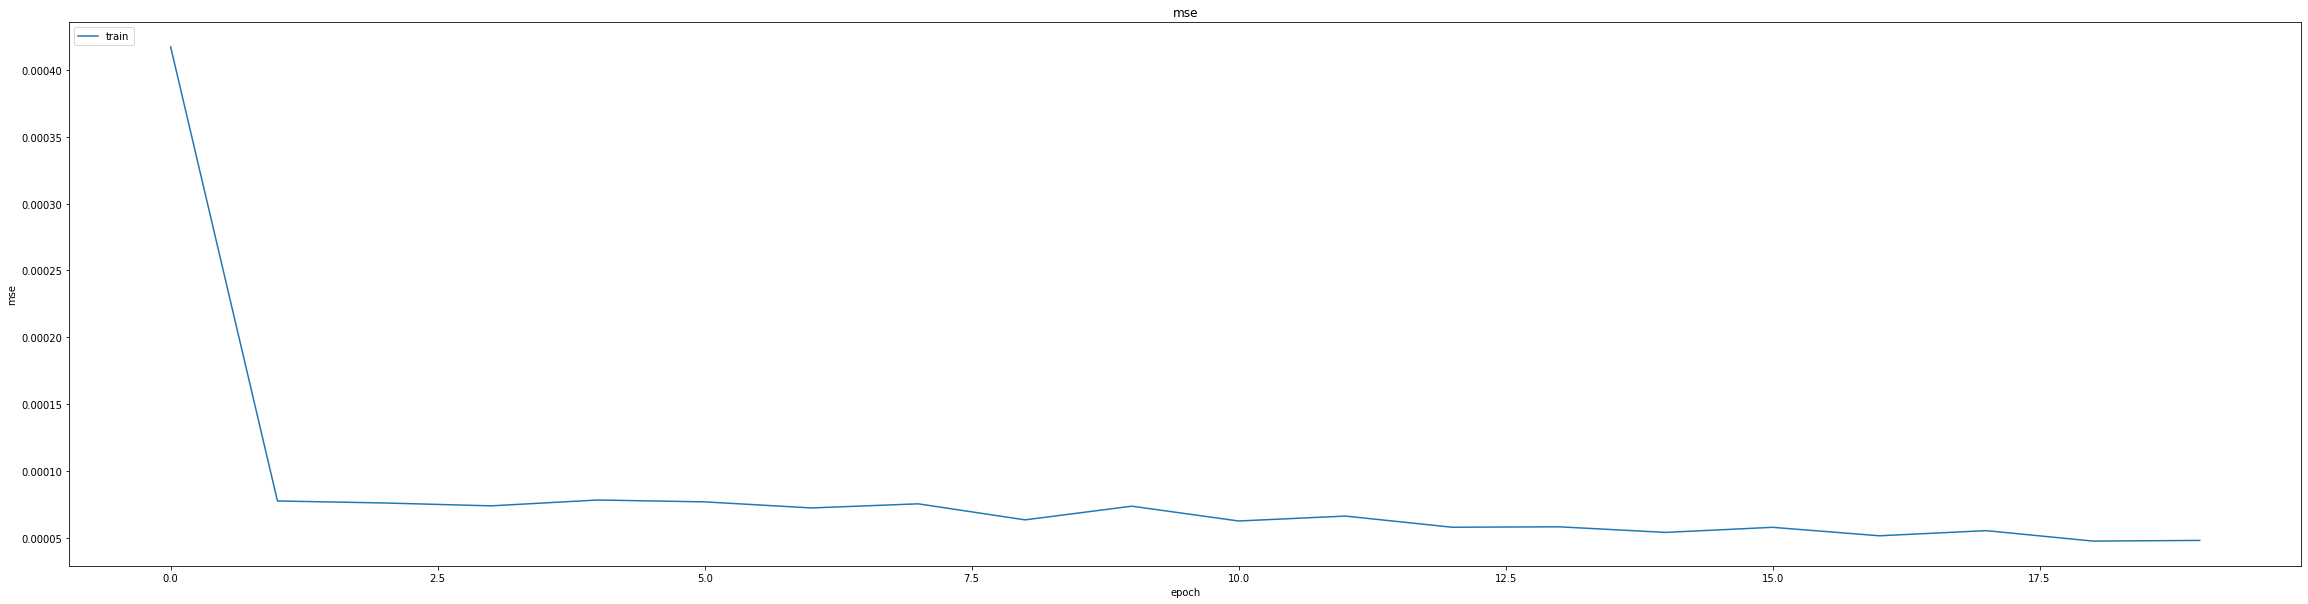

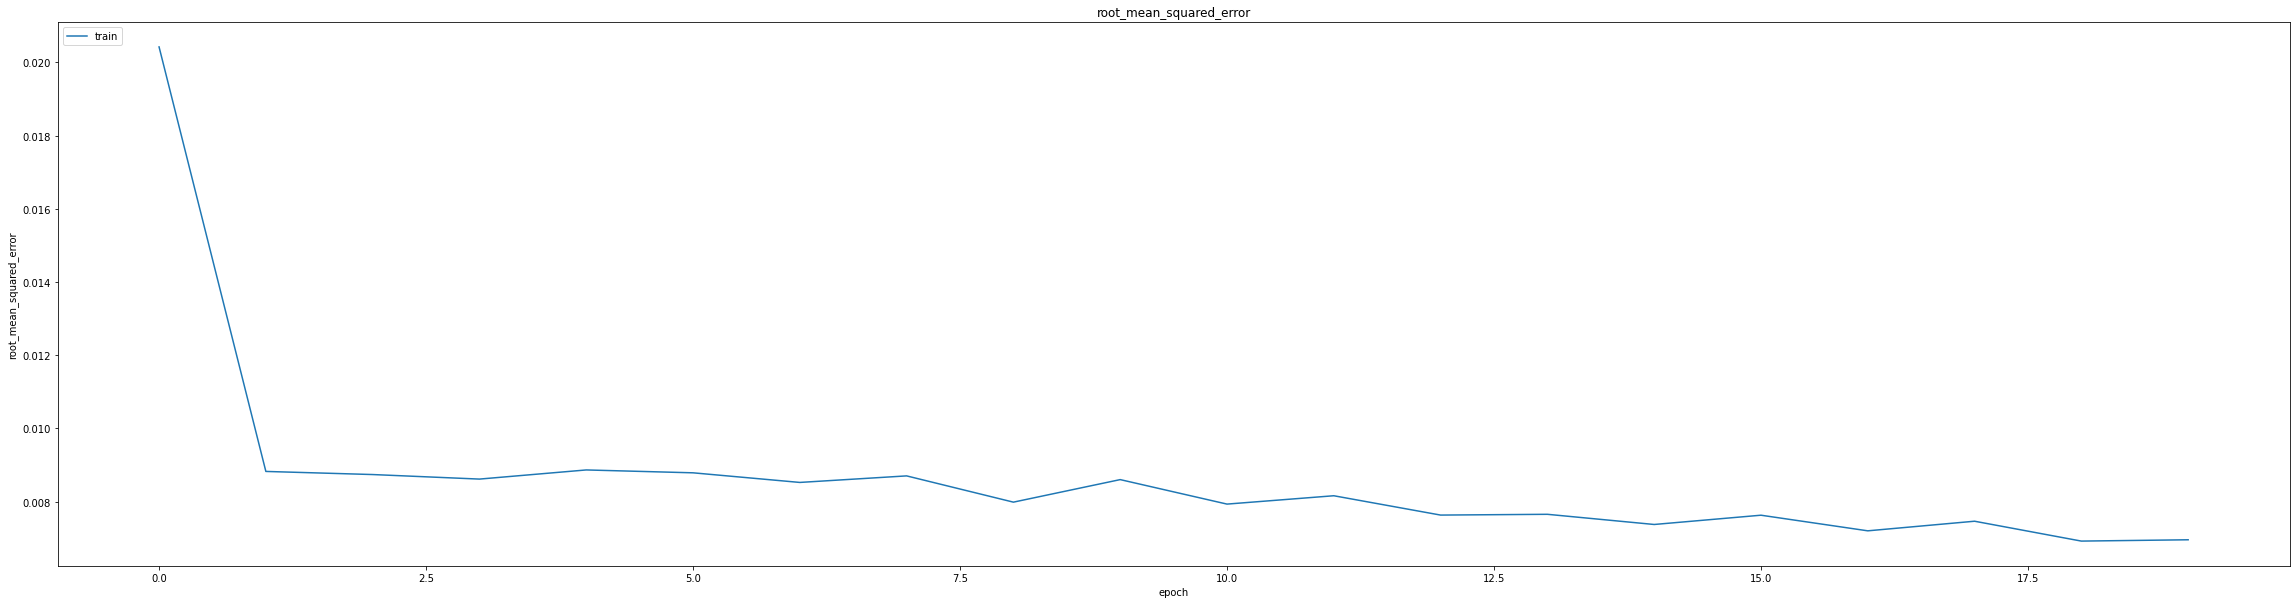

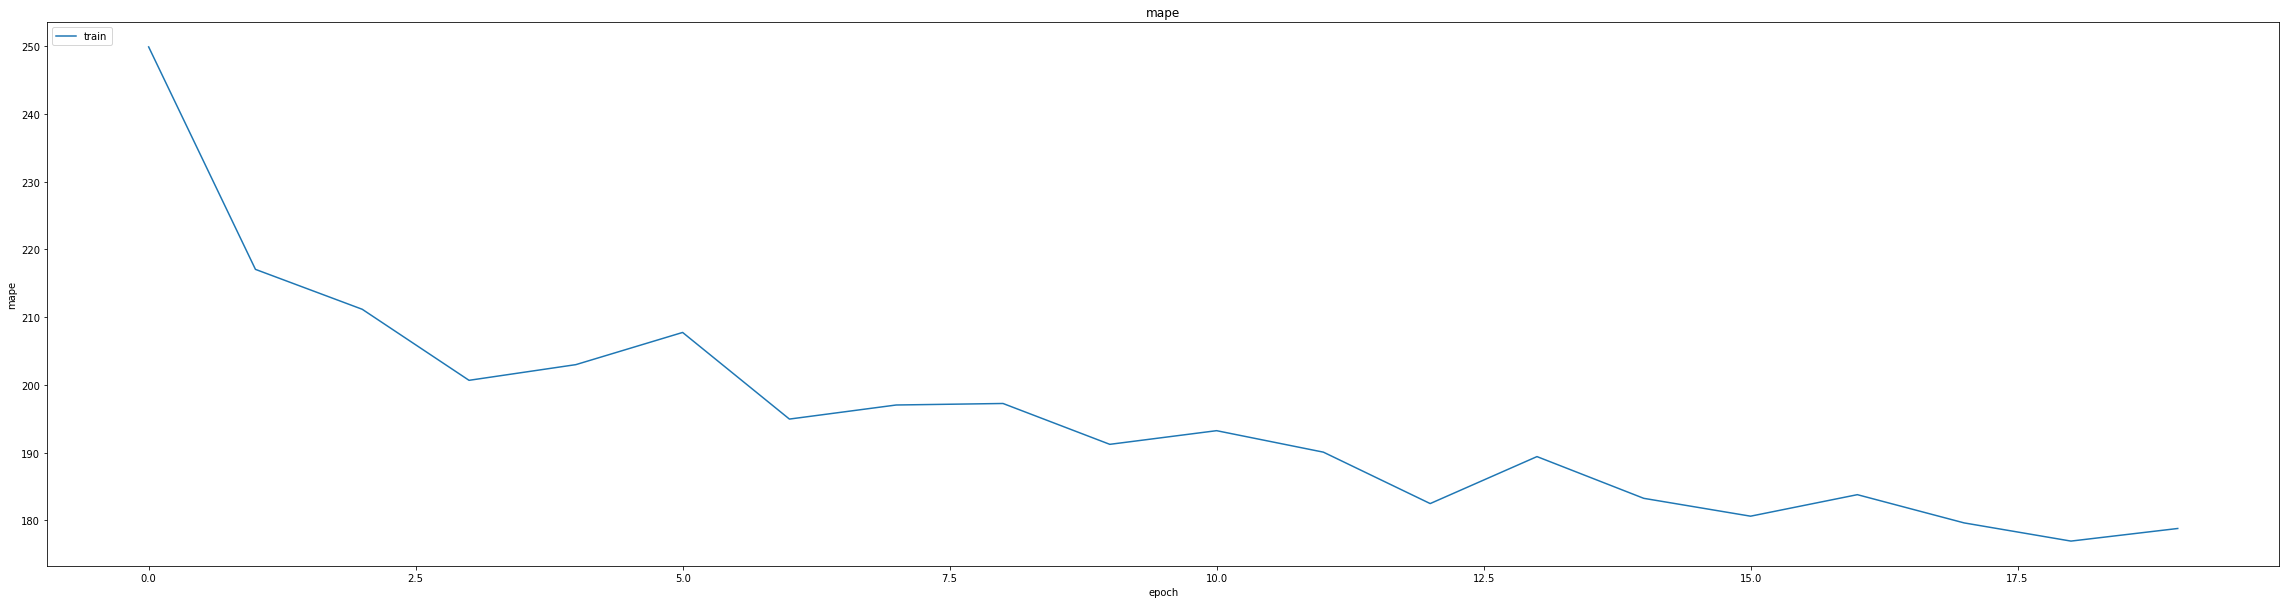

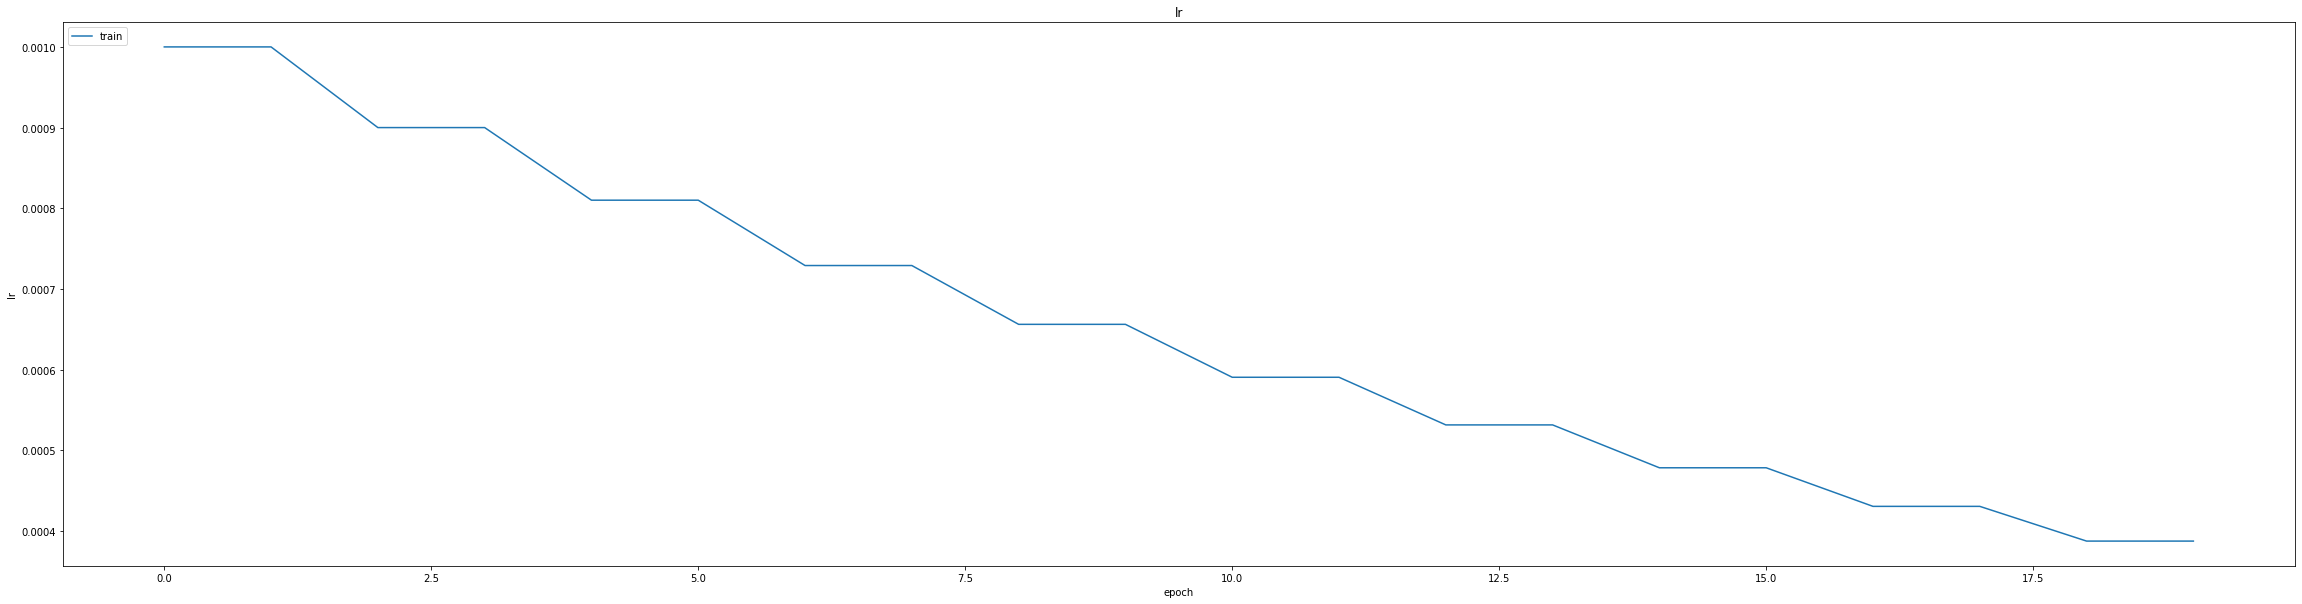

In [116]:
thesis.SummarizeHistory(history)

In [117]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.012459201738238335
0.012459201738238335
0.01702774316072464
1391/1391 [==============================] - 6s 4ms/step
0.99240415050151


In [118]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_5min_GRU(60-40)")

1391/1391 [==============================] - 5s 4ms/step


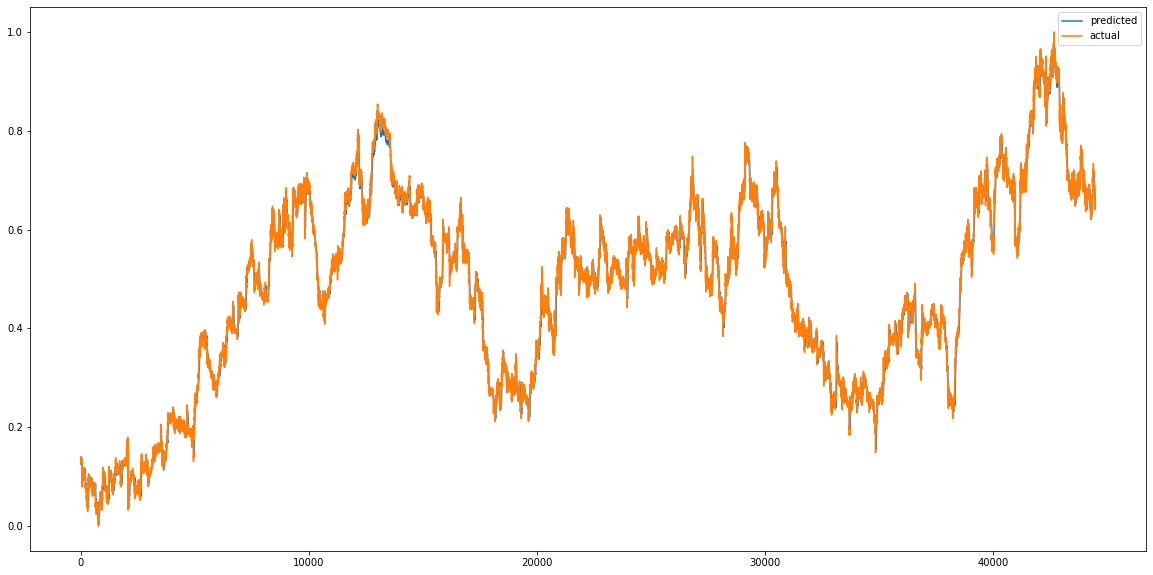

In [119]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


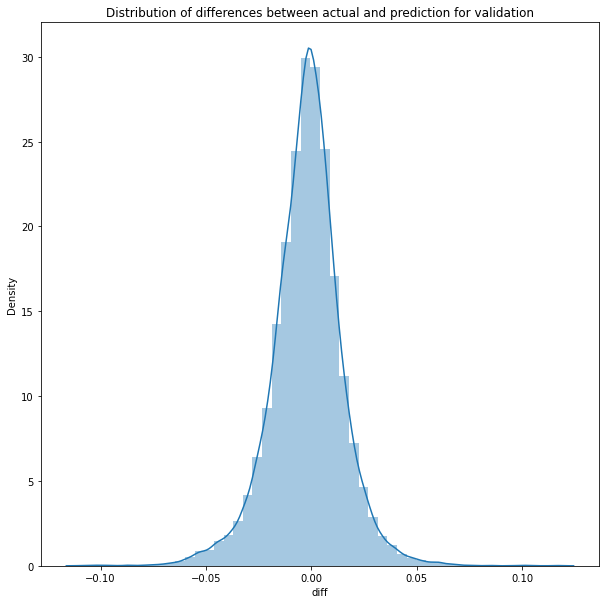

In [120]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 5s 3ms/step


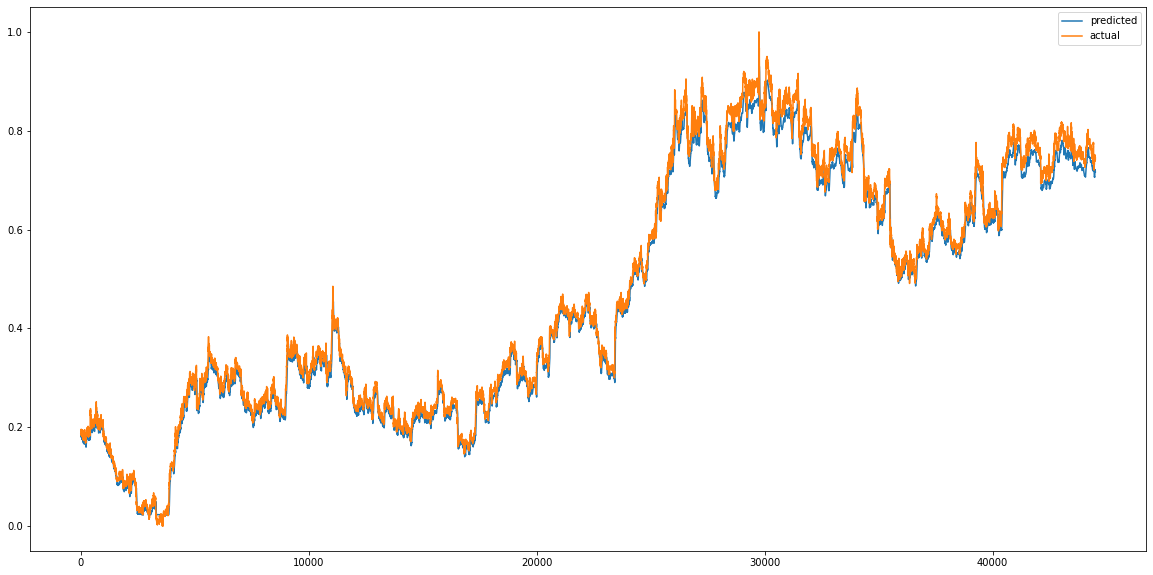

In [121]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


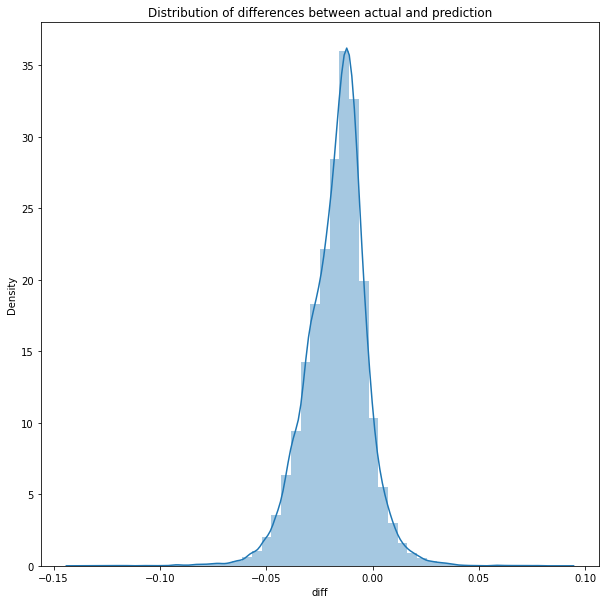

In [122]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0004867143296444234
RMSE :  0.02206160306152804
MAE :  0.01819322393707496
1391/1391 [==============================] - 5s 3ms/step
R2_Score  : 0.9922576255146668


count    44506.000000
mean        -0.016879
std          0.014207
min         -0.139027
25%         -0.025157
50%         -0.015298
75%         -0.008305
max          0.089580
Name: diff, dtype: float64